In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
D003_df = pd.read_csv('./../../../../../Data/SensorsData/interpolated_D003_data.csv')
D003_df = pd.DataFrame(D003_df)
D003_df['time'] =  pd.to_datetime(D003_df['time'], format='%Y-%m-%d %H:%M:%S')
D003_df.index = D003_df['time']
D003_df = D003_df.drop(['time'],axis = 1)

In [3]:
def df_to_X_y(df,hoursToPredict, windowSize):
        hoursToPredict = hoursToPredict - 1
        df_as_np = df.to_numpy() # converts the dataframe to a numpy array
        #Initialized  arrays to append X and Y values 
        X = []
        y = []
        for i in range(len(df_as_np)):
            if((i + hoursToPredict + windowSize)< len(df_as_np)):
                #Takes values from i to i + win size
                row =  [r for r in df_as_np[i:i+windowSize]]
                X.append(row)
                label = df_as_np[i + hoursToPredict + windowSize ][1]
                y.append(label)
        return np.array(X), np.array(y)

In [4]:
def DataHandler(hoursToPredict,windowSize):
    X1, y1 = df_to_X_y(D003_df,hoursToPredict,windowSize)

    return X1, y1

In [5]:
plt.style.use('seaborn')

In [6]:
def Trainer(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        model = Sequential()
        model.add(InputLayer((windowSize, 5)))
        model.add(LSTM(64))
        model.add(Dense(8, 'relu'))
        model.add(Dense(1, 'linear'))

        model.summary()
        X, y = DataHandler(time,windowSize)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle= False) 

        X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
        
        cp1= ModelCheckpoint(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/", save_best_only=True)
        model.compile(loss=MeanSquaredError(), 
                   optimizer=Adam(learning_rate=0.0001), 
                   metrics=[MeanAbsoluteError()])
    
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
        windowSize += 1
        print()
        print("-----------------------------------------------------------------------------------------------------------")
        print()

In [7]:
def modelsEvaluator(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        X, y = DataHandler(time,windowSize)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
       
        print("Loading: "+ str(time)+"H_Forecast/" + str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model = load_model(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model.evaluate(X_test,y_test)
        
        test_predictions = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions '+str(time) + ' hour model':test_predictions, 'Actuals':y_test})
        
        windowSize += 1

In [8]:
%%time

Trainer(1,6,12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 8s 10ms/step - loss: 251355.8125 - mean_absolute_error: 411.4597 - val_loss: 365555.2188 - val_mean_absolute_error: 490.9683
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 246953.8906 - mean_absolute_error: 406.0601 - val_loss: 358670.0312 - val_mean_absolute_error: 483.8995
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 7ms/step - loss: 240454.4688 - mean_absolute_error: 398.4456 - val_loss: 350513.7500 - val_mean_absolute_error: 475.7830
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 234044.0312 - mean_absolute_error: 390.9968 - val_loss: 343193.9062 - val_mean_absolute_error: 468.5446
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 228006.2188 - mean_absolute_error: 384.1504 - val_loss: 335664.1875 - val_mean_absolute_error: 461.2649
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 221657.2344 - mean_absolute_error: 376.9771 - val_loss: 327840.6250 - val_mean_absolute_error: 453.6931
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 7ms/step - loss: 215082.3750 - mean_absolute_error: 369.4762 - val_loss: 319641.0938 - val_mean_absolute_error: 445.8091
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 208238.6094 - mean_absolute_error: 361.6176 - val_loss: 311105.2500 - val_mean_absolute_error: 437.6367
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 201157.1094 - mean_absolute_error: 353.4778 - val_loss: 302257.3750 - val_mean_absolute_error: 429.1495
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 193863.9844 - mean_absolute_error: 344.9899 - val_loss: 293117.1562 - val_mean_absolute_error: 420.2430
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 186406.0000 - mean_absolute_error: 336.1719 - val_loss: 283761.8438 - val_mean_absolute_error: 411.0625
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 178840.6875 - mean_absolute_error: 327.1821 - val_loss: 274246.5312 - val_mean_absolute_error: 401.2776
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 171201.1875 - mean_absolute_error: 317.7307 - val_loss: 264601.6875 - val_mean_absolute_error: 391.4973
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 163506.6562 - mean_absolute_error: 308.1434 - val_loss: 254843.3906 - val_mean_absolute_error: 381.1748
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 155803.9688 - mean_absolute_error: 298.2491 - val_loss: 245049.8438 - val_mean_absolute_error: 370.7950
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 148118.6250 - mean_absolute_error: 288.2470 - val_loss: 235224.5625 - val_mean_absolute_error: 360.2894
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 140507.0312 - mean_absolute_error: 278.3492 - val_loss: 225459.7812 - val_mean_absolute_error: 349.5645
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 132973.4531 - mean_absolute_error: 268.2819 - val_loss: 215713.2656 - val_mean_absolute_error: 338.5420
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 125550.3594 - mean_absolute_error: 258.0242 - val_loss: 206077.0000 - val_mean_absolute_error: 327.5353
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 118278.5625 - mean_absolute_error: 247.8696 - val_loss: 196564.1719 - val_mean_absolute_error: 316.2459
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 111167.0156 - mean_absolute_error: 237.7685 - val_loss: 187207.0312 - val_mean_absolute_error: 305.2007
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 104104.7422 - mean_absolute_error: 227.4647 - val_loss: 177663.9844 - val_mean_absolute_error: 293.6035
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 97195.4922 - mean_absolute_error: 217.1242 - val_loss: 168486.7656 - val_mean_absolute_error: 282.4609
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 90624.0938 - mean_absolute_error: 207.2941 - val_loss: 159622.0469 - val_mean_absolute_error: 271.6850
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 84306.8516 - mean_absolute_error: 197.7144 - val_loss: 151025.4375 - val_mean_absolute_error: 261.0586
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 78262.7500 - mean_absolute_error: 188.2855 - val_loss: 142690.7969 - val_mean_absolute_error: 250.7317
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 72498.2969 - mean_absolute_error: 178.9572 - val_loss: 134627.8906 - val_mean_absolute_error: 240.5236
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 67005.1406 - mean_absolute_error: 169.8856 - val_loss: 126860.3984 - val_mean_absolute_error: 230.5190
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 61791.0742 - mean_absolute_error: 161.0323 - val_loss: 119378.5625 - val_mean_absolute_error: 220.7155
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 56869.3398 - mean_absolute_error: 152.5503 - val_loss: 112229.4766 - val_mean_absolute_error: 211.1559
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 52250.1367 - mean_absolute_error: 144.5141 - val_loss: 105373.5859 - val_mean_absolute_error: 202.0761
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 47928.3008 - mean_absolute_error: 136.7467 - val_loss: 98866.9688 - val_mean_absolute_error: 192.9906
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 43898.1172 - mean_absolute_error: 129.3769 - val_loss: 92679.6094 - val_mean_absolute_error: 184.7571
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 40159.5273 - mean_absolute_error: 122.2854 - val_loss: 86801.9062 - val_mean_absolute_error: 176.5958
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 36697.1641 - mean_absolute_error: 115.8017 - val_loss: 81246.5781 - val_mean_absolute_error: 168.7651
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 7ms/step - loss: 33519.8203 - mean_absolute_error: 109.4773 - val_loss: 76019.5156 - val_mean_absolute_error: 161.5471
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 7ms/step - loss: 30598.3359 - mean_absolute_error: 103.6349 - val_loss: 71047.3750 - val_mean_absolute_error: 154.5110
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 27936.9082 - mean_absolute_error: 98.1458 - val_loss: 66468.6016 - val_mean_absolute_error: 148.1898
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 25515.3301 - mean_absolute_error: 93.0839 - val_loss: 62078.5195 - val_mean_absolute_error: 141.5398
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 23321.2891 - mean_absolute_error: 88.3559 - val_loss: 58004.0234 - val_mean_absolute_error: 135.5837
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 21359.5898 - mean_absolute_error: 84.0997 - val_loss: 54220.7461 - val_mean_absolute_error: 130.4291
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 19585.4277 - mean_absolute_error: 80.3917 - val_loss: 50686.8281 - val_mean_absolute_error: 125.5181
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 17995.8555 - mean_absolute_error: 76.8945 - val_loss: 47451.9258 - val_mean_absolute_error: 120.8348
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 16577.2559 - mean_absolute_error: 73.7634 - val_loss: 44412.6445 - val_mean_absolute_error: 116.0677
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 15307.0059 - mean_absolute_error: 70.9146 - val_loss: 41524.1992 - val_mean_absolute_error: 111.0496
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 14171.2373 - mean_absolute_error: 68.3958 - val_loss: 38922.3633 - val_mean_absolute_error: 107.0149
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 13161.2061 - mean_absolute_error: 65.9965 - val_loss: 36544.1016 - val_mean_absolute_error: 103.7158
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 12255.3594 - mean_absolute_error: 63.9281 - val_loss: 34309.8164 - val_mean_absolute_error: 100.0289
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 7ms/step - loss: 11462.5615 - mean_absolute_error: 61.8923 - val_loss: 32269.1777 - val_mean_absolute_error: 97.3507
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 10728.0234 - mean_absolute_error: 59.8238 - val_loss: 30325.0645 - val_mean_absolute_error: 93.4183
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 10075.8584 - mean_absolute_error: 58.1968 - val_loss: 28560.0762 - val_mean_absolute_error: 90.8761
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 9501.5137 - mean_absolute_error: 56.6121 - val_loss: 26858.9297 - val_mean_absolute_error: 87.7126
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 9000.4414 - mean_absolute_error: 55.5034 - val_loss: 25371.7715 - val_mean_absolute_error: 85.6337.7734 - mean_absolute_error: 5
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 8566.6768 - mean_absolute_error: 54.4249 - val_loss: 23994.1992 - val_mean_absolute_error: 83.5717
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 6ms/step - loss: 8174.2700 - mean_absolute_error: 53.6339 - val_loss: 22761.7285 - val_mean_absolute_error: 81.8390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 7ms/step - loss: 7840.6011 - mean_absolute_error: 52.8135 - val_loss: 21599.8242 - val_mean_absolute_error: 79.6831
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 7520.2109 - mean_absolute_error: 52.0727 - val_loss: 20509.8906 - val_mean_absolute_error: 77.9212
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 7253.3521 - mean_absolute_error: 51.5429 - val_loss: 19533.8945 - val_mean_absolute_error: 76.4396
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 6ms/step - loss: 6996.1284 - mean_absolute_error: 50.8573 - val_loss: 18698.5020 - val_mean_absolute_error: 75.2888
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 2s 6ms/step - loss: 6766.2661 - mean_absolute_error: 50.3657 - val_loss: 17858.8281 - val_mean_absolute_error: 73.4522
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 6574.3394 - mean_absolute_error: 49.8528 - val_loss: 17085.9414 - val_mean_absolute_error: 72.6538
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 6395.9893 - mean_absolute_error: 49.2941 - val_loss: 16369.0537 - val_mean_absolute_error: 71.4350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 5ms/step - loss: 6237.9658 - mean_absolute_error: 49.0011 - val_loss: 15746.0107 - val_mean_absolute_error: 70.1835
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 6099.0527 - mean_absolute_error: 48.5711 - val_loss: 15118.0195 - val_mean_absolute_error: 68.7170
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 5963.7969 - mean_absolute_error: 48.2556 - val_loss: 14643.6240 - val_mean_absolute_error: 68.6531
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 5859.2554 - mean_absolute_error: 48.0483 - val_loss: 14133.4502 - val_mean_absolute_error: 67.4084
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 5755.2451 - mean_absolute_error: 47.7673 - val_loss: 13756.8545 - val_mean_absolute_error: 67.3679
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 7ms/step - loss: 5661.2729 - mean_absolute_error: 47.3667 - val_loss: 13261.5840 - val_mean_absolute_error: 65.7896
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 6ms/step - loss: 5581.1318 - mean_absolute_error: 47.3456 - val_loss: 12940.3291 - val_mean_absolute_error: 66.3721
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 5498.2134 - mean_absolute_error: 46.9483 - val_loss: 12573.8545 - val_mean_absolute_error: 64.5316
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 5444.8472 - mean_absolute_error: 47.0201 - val_loss: 12357.9033 - val_mean_absolute_error: 64.3423
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 5381.1099 - mean_absolute_error: 46.7576 - val_loss: 12049.1914 - val_mean_absolute_error: 63.6153
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 5318.2603 - mean_absolute_error: 46.5641 - val_loss: 11769.7529 - val_mean_absolute_error: 63.0117
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 5267.9595 - mean_absolute_error: 46.3358 - val_loss: 11398.5264 - val_mean_absolute_error: 62.6282
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 2s 6ms/step - loss: 5233.0425 - mean_absolute_error: 46.2830 - val_loss: 11239.4521 - val_mean_absolute_error: 63.0020
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 5195.2114 - mean_absolute_error: 46.1566 - val_loss: 10998.7246 - val_mean_absolute_error: 62.2992
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 5164.8311 - mean_absolute_error: 46.1833 - val_loss: 10813.0479 - val_mean_absolute_error: 61.6577
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 6ms/step - loss: 5115.3320 - mean_absolute_error: 45.9425 - val_loss: 10624.8711 - val_mean_absolute_error: 61.6090
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 7ms/step - loss: 5115.0728 - mean_absolute_error: 46.0858 - val_loss: 10418.0244 - val_mean_absolute_error: 60.9377
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 5068.0615 - mean_absolute_error: 45.7573 - val_loss: 10304.5244 - val_mean_absolute_error: 60.8666
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 5029.0493 - mean_absolute_error: 45.7133 - val_loss: 10207.7168 - val_mean_absolute_error: 60.5080
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 2s 6ms/step - loss: 5023.6958 - mean_absolute_error: 45.6523 - val_loss: 10504.9854 - val_mean_absolute_error: 60.7114
Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 4991.9492 - mean_absolute_error: 45.6323 - val_loss: 10401.6768 - val_mean_absolute_error: 60.4306
Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 4991.7271 - mean_absolute_error: 45.5350 - val_loss: 9831.1357 - val_mean_absolute_error: 59.6716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 2s 6ms/step - loss: 4943.4380 - mean_absolute_error: 45.5351 - val_loss: 9706.8975 - val_mean_absolute_error: 59.6355
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 4927.3354 - mean_absolute_error: 45.3133 - val_loss: 9621.3633 - val_mean_absolute_error: 59.3499
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 4905.8027 - mean_absolute_error: 45.4013 - val_loss: 9539.5430 - val_mean_absolute_error: 58.9582
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 4900.1626 - mean_absolute_error: 45.3130 - val_loss: 9614.7100 - val_mean_absolute_error: 60.4896ss: 5066.6943 - mean_absolute_er
Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 4883.6353 - mean_absolute_error: 45.2365 - val_loss: 9378.9961 - val_mean_absolute_error: 59.5711
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 4855.7095 - mean_absolute_error: 45.2265 - val_loss: 9338.0615 - val_mean_absolute_error: 59.6187 loss: 4834.2939 - mean_absol
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 4845.5713 - mean_absolute_error: 45.2461 - val_loss: 9374.3223 - val_mean_absolute_error: 58.7615
Epoch 92/100
376/376 [==============================] - 2s 6ms/step - loss: 4815.8071 - mean_absolute_error: 44.9323 - val_loss: 9229.8711 - val_mean_absolute_error: 59.1865
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 4819.5864 - mean_absolute_error: 45.0044 - val_loss: 9100.6748 - val_mean_absolute_error: 58.3926
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 2s 7ms/step - loss: 4800.9111 - mean_absolute_error: 45.0998 - val_loss: 8997.1191 - val_mean_absolute_error: 58.1304s - loss: 4784.8110 - mean_absolute_er
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 6ms/step - loss: 4803.7290 - mean_absolute_error: 44.9671 - val_loss: 9028.7578 - val_mean_absolute_error: 58.2439
Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 4778.5898 - mean_absolute_error: 44.9770 - val_loss: 8975.6855 - val_mean_absolute_error: 59.2785
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 4774.8359 - mean_absolute_error: 44.8664 - val_loss: 8928.0732 - val_mean_absolute_error: 58.4000
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 4751.3687 - mean_absolute_error: 44.8597 - val_loss: 8781.3779 - val_mean_absolute_error: 58.0824
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 2s 6ms/step - loss: 4741.2271 - mean_absolute_error: 44.6938 - val_loss: 8767.1797 - val_mean_absolute_error: 57.7647
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 4721.5166 - mean_absolute_error: 44.7244 - val_loss: 8688.0020 - val_mean_absolute_error: 57.8567
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 11ms/step - loss: 251949.8125 - mean_absolute_error: 411.9060 - val_loss: 365910.2188 - val_mean_absolute_error: 491.0634
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 247927.4688 - mean_absolute_error: 407.1957 - val_loss: 361271.6562 - val_mean_absolute_error: 486.4799
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 244155.1094 - mean_absolute_error: 402.7897 - val_loss: 356543.7188 - val_mean_absolute_error: 481.7664
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 240236.9688 - mean_absolute_error: 398.1772 - val_loss: 352121.8125 - val_mean_absolute_error: 477.3321
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 236599.4688 - mean_absolute_error: 393.9660 - val_loss: 347727.8125 - val_mean_absolute_error: 473.0045
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 232934.5625 - mean_absolute_error: 389.7533 - val_loss: 343048.2812 - val_mean_absolute_error: 468.3398
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 228749.7031 - mean_absolute_error: 384.9765 - val_loss: 337902.0000 - val_mean_absolute_error: 463.3985
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 224655.7656 - mean_absolute_error: 380.3373 - val_loss: 332925.1250 - val_mean_absolute_error: 458.5858
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 220499.9688 - mean_absolute_error: 375.5831 - val_loss: 327794.3438 - val_mean_absolute_error: 453.6400
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 216222.6250 - mean_absolute_error: 370.7484 - val_loss: 322505.1250 - val_mean_absolute_error: 448.5488
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 211822.4844 - mean_absolute_error: 365.6443 - val_loss: 317033.8750 - val_mean_absolute_error: 443.2794
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 207241.5469 - mean_absolute_error: 360.3734 - val_loss: 311180.8750 - val_mean_absolute_error: 437.6714
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 202401.4844 - mean_absolute_error: 354.8267 - val_loss: 305255.5000 - val_mean_absolute_error: 432.0463
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 7ms/step - loss: 197202.8750 - mean_absolute_error: 348.7962 - val_loss: 298454.4375 - val_mean_absolute_error: 425.4525
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 191953.0625 - mean_absolute_error: 342.6503 - val_loss: 292177.3750 - val_mean_absolute_error: 419.3210
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 186867.3750 - mean_absolute_error: 336.6532 - val_loss: 285816.5938 - val_mean_absolute_error: 413.0590
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 181735.4375 - mean_absolute_error: 330.5606 - val_loss: 279386.2812 - val_mean_absolute_error: 406.4879
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 176444.5469 - mean_absolute_error: 324.1062 - val_loss: 272394.3750 - val_mean_absolute_error: 399.3763
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 6ms/step - loss: 170877.6094 - mean_absolute_error: 317.1914 - val_loss: 265481.0000 - val_mean_absolute_error: 392.1560
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 165219.4062 - mean_absolute_error: 310.0647 - val_loss: 258418.2344 - val_mean_absolute_error: 384.9213
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 159764.0625 - mean_absolute_error: 303.2344 - val_loss: 251514.5156 - val_mean_absolute_error: 377.6071
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 6ms/step - loss: 154339.7344 - mean_absolute_error: 296.3253 - val_loss: 244611.7500 - val_mean_absolute_error: 370.2118
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 148930.8125 - mean_absolute_error: 289.3332 - val_loss: 237689.4688 - val_mean_absolute_error: 362.7268
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 143548.1250 - mean_absolute_error: 282.2244 - val_loss: 230773.3281 - val_mean_absolute_error: 355.2345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 138183.5156 - mean_absolute_error: 274.9179 - val_loss: 223878.0312 - val_mean_absolute_error: 347.5142
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 132871.4844 - mean_absolute_error: 267.7746 - val_loss: 217005.7031 - val_mean_absolute_error: 339.8156
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 127605.2422 - mean_absolute_error: 260.5746 - val_loss: 210161.5469 - val_mean_absolute_error: 331.7949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 122404.8359 - mean_absolute_error: 253.1938 - val_loss: 203359.9062 - val_mean_absolute_error: 324.0626
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 117265.9062 - mean_absolute_error: 246.1525 - val_loss: 196611.0000 - val_mean_absolute_error: 315.9625
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 112209.7969 - mean_absolute_error: 238.8272 - val_loss: 189919.8906 - val_mean_absolute_error: 308.0346
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 107232.1484 - mean_absolute_error: 231.5838 - val_loss: 183301.6875 - val_mean_absolute_error: 300.0655
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 7ms/step - loss: 102345.2578 - mean_absolute_error: 224.4176 - val_loss: 176783.2656 - val_mean_absolute_error: 292.1159
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 97558.1875 - mean_absolute_error: 217.1347 - val_loss: 170344.3281 - val_mean_absolute_error: 284.4328
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 92874.5078 - mean_absolute_error: 210.1747 - val_loss: 163990.8594 - val_mean_absolute_error: 276.5154
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 7ms/step - loss: 88301.1250 - mean_absolute_error: 203.2457 - val_loss: 157748.8281 - val_mean_absolute_error: 268.8350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 83843.2422 - mean_absolute_error: 196.3998 - val_loss: 151614.2344 - val_mean_absolute_error: 261.2122
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 7ms/step - loss: 79512.8125 - mean_absolute_error: 189.6731 - val_loss: 145617.5781 - val_mean_absolute_error: 253.7553
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 75315.0938 - mean_absolute_error: 182.9478 - val_loss: 139746.8281 - val_mean_absolute_error: 246.3069
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 71254.6094 - mean_absolute_error: 176.4320 - val_loss: 134022.1094 - val_mean_absolute_error: 239.1221
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 7ms/step - loss: 67321.6875 - mean_absolute_error: 170.0193 - val_loss: 128424.0625 - val_mean_absolute_error: 231.9779
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 7ms/step - loss: 63531.5352 - mean_absolute_error: 163.5912 - val_loss: 122978.1797 - val_mean_absolute_error: 225.1362
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 59890.5430 - mean_absolute_error: 157.4907 - val_loss: 117674.4453 - val_mean_absolute_error: 218.1096
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 56393.5273 - mean_absolute_error: 151.5189 - val_loss: 112510.6719 - val_mean_absolute_error: 211.2382
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 7ms/step - loss: 53038.2422 - mean_absolute_error: 145.7251 - val_loss: 107523.7109 - val_mean_absolute_error: 204.4607
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 7ms/step - loss: 49833.1953 - mean_absolute_error: 139.8800 - val_loss: 102681.3438 - val_mean_absolute_error: 198.0231
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 7ms/step - loss: 46775.7539 - mean_absolute_error: 134.4588 - val_loss: 97999.5625 - val_mean_absolute_error: 191.4123
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 43865.4727 - mean_absolute_error: 129.1145 - val_loss: 93472.2031 - val_mean_absolute_error: 185.1925
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 7ms/step - loss: 41096.7891 - mean_absolute_error: 123.8381 - val_loss: 89125.3125 - val_mean_absolute_error: 179.3106
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 38467.7266 - mean_absolute_error: 118.8965 - val_loss: 84911.1484 - val_mean_absolute_error: 173.3203
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 35991.5508 - mean_absolute_error: 114.1061 - val_loss: 80864.8750 - val_mean_absolute_error: 167.6102
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 7ms/step - loss: 33651.2344 - mean_absolute_error: 109.4608 - val_loss: 76993.8438 - val_mean_absolute_error: 162.1678
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 7ms/step - loss: 31454.5156 - mean_absolute_error: 105.0266 - val_loss: 73301.6328 - val_mean_absolute_error: 157.3403
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 29398.2012 - mean_absolute_error: 100.9083 - val_loss: 69700.4219 - val_mean_absolute_error: 151.9211
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 27474.0938 - mean_absolute_error: 96.9035 - val_loss: 66291.2891 - val_mean_absolute_error: 146.9360
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 7ms/step - loss: 25675.8203 - mean_absolute_error: 93.0675 - val_loss: 63046.1250 - val_mean_absolute_error: 142.4303
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 24005.5527 - mean_absolute_error: 89.5544 - val_loss: 59954.7539 - val_mean_absolute_error: 137.9117
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 22451.2461 - mean_absolute_error: 86.2459 - val_loss: 56968.8281 - val_mean_absolute_error: 133.7225
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 21000.1602 - mean_absolute_error: 83.1080 - val_loss: 54200.9023 - val_mean_absolute_error: 130.0034
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 19677.8535 - mean_absolute_error: 80.3011 - val_loss: 51462.3008 - val_mean_absolute_error: 125.7740
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 18426.0371 - mean_absolute_error: 77.4647 - val_loss: 48887.1914 - val_mean_absolute_error: 121.7856
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 7ms/step - loss: 17280.4414 - mean_absolute_error: 74.9670 - val_loss: 46500.0898 - val_mean_absolute_error: 118.2018
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 16235.5908 - mean_absolute_error: 72.6017 - val_loss: 44228.2031 - val_mean_absolute_error: 114.5045
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 7ms/step - loss: 15271.9248 - mean_absolute_error: 70.5553 - val_loss: 42074.2656 - val_mean_absolute_error: 111.8434
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 14389.7334 - mean_absolute_error: 68.5677 - val_loss: 40034.5703 - val_mean_absolute_error: 108.1375
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 7ms/step - loss: 13584.6768 - mean_absolute_error: 66.6441 - val_loss: 38110.3242 - val_mean_absolute_error: 105.3383
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 7ms/step - loss: 12840.4395 - mean_absolute_error: 64.8535 - val_loss: 36567.7500 - val_mean_absolute_error: 102.5769
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 12169.0225 - mean_absolute_error: 63.4309 - val_loss: 34598.5508 - val_mean_absolute_error: 99.8692
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 7ms/step - loss: 11553.7471 - mean_absolute_error: 61.9016 - val_loss: 33047.2891 - val_mean_absolute_error: 97.4226
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 10979.6826 - mean_absolute_error: 60.6821 - val_loss: 31475.2285 - val_mean_absolute_error: 94.8801
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 10466.2393 - mean_absolute_error: 59.4013 - val_loss: 30088.4512 - val_mean_absolute_error: 93.1255
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 10000.2969 - mean_absolute_error: 58.3199 - val_loss: 28707.4883 - val_mean_absolute_error: 90.7350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 9566.5762 - mean_absolute_error: 57.2580 - val_loss: 27490.6504 - val_mean_absolute_error: 89.0873
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 7ms/step - loss: 9177.7637 - mean_absolute_error: 56.2547 - val_loss: 26374.0547 - val_mean_absolute_error: 86.9962
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 7ms/step - loss: 8810.9834 - mean_absolute_error: 55.2674 - val_loss: 25228.6367 - val_mean_absolute_error: 85.5148
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 2s 7ms/step - loss: 8472.9004 - mean_absolute_error: 54.2987 - val_loss: 24261.0723 - val_mean_absolute_error: 84.1164
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 8167.2578 - mean_absolute_error: 53.5187 - val_loss: 23197.7910 - val_mean_absolute_error: 82.2346
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 7879.0781 - mean_absolute_error: 52.9360 - val_loss: 22336.6309 - val_mean_absolute_error: 80.9488
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 7620.3589 - mean_absolute_error: 52.2917 - val_loss: 21492.1445 - val_mean_absolute_error: 79.9375
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 7ms/step - loss: 7395.4541 - mean_absolute_error: 51.7815 - val_loss: 20596.7539 - val_mean_absolute_error: 77.9327
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 7185.8638 - mean_absolute_error: 51.2587 - val_loss: 19904.4883 - val_mean_absolute_error: 77.6543
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 7003.2617 - mean_absolute_error: 50.8207 - val_loss: 19204.5684 - val_mean_absolute_error: 76.0414
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 6819.9185 - mean_absolute_error: 50.4237 - val_loss: 18576.7031 - val_mean_absolute_error: 74.8281
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 7ms/step - loss: 6655.5410 - mean_absolute_error: 50.1010 - val_loss: 18011.7793 - val_mean_absolute_error: 74.4301
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 6518.6191 - mean_absolute_error: 49.6814 - val_loss: 17332.9336 - val_mean_absolute_error: 73.0498
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 6378.1885 - mean_absolute_error: 49.3861 - val_loss: 16887.0762 - val_mean_absolute_error: 72.1009
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 6258.0640 - mean_absolute_error: 49.0228 - val_loss: 16359.1924 - val_mean_absolute_error: 71.5625
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 6149.6870 - mean_absolute_error: 48.6826 - val_loss: 15845.4082 - val_mean_absolute_error: 70.1928
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 6037.7769 - mean_absolute_error: 48.4724 - val_loss: 15492.2910 - val_mean_absolute_error: 70.2062
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 5924.5757 - mean_absolute_error: 48.1760 - val_loss: 15057.4521 - val_mean_absolute_error: 68.8021
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 5838.5757 - mean_absolute_error: 48.0672 - val_loss: 14718.2227 - val_mean_absolute_error: 68.3861
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 5766.7310 - mean_absolute_error: 47.6654 - val_loss: 14295.3701 - val_mean_absolute_error: 67.6785
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 5686.3140 - mean_absolute_error: 47.4856 - val_loss: 13960.3379 - val_mean_absolute_error: 67.1699
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 5619.5571 - mean_absolute_error: 47.3970 - val_loss: 13723.2803 - val_mean_absolute_error: 66.5663
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 2s 7ms/step - loss: 5554.7979 - mean_absolute_error: 47.3424 - val_loss: 13376.1514 - val_mean_absolute_error: 65.8111
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 5506.8711 - mean_absolute_error: 47.0510 - val_loss: 13092.6826 - val_mean_absolute_error: 66.1877
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 5434.9946 - mean_absolute_error: 46.9221 - val_loss: 12744.6465 - val_mean_absolute_error: 64.8091
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 5381.8159 - mean_absolute_error: 46.6238 - val_loss: 12596.2471 - val_mean_absolute_error: 65.4036
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 7ms/step - loss: 5343.7231 - mean_absolute_error: 46.7359 - val_loss: 12356.7324 - val_mean_absolute_error: 64.4107
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 5304.8027 - mean_absolute_error: 46.5456 - val_loss: 12218.4121 - val_mean_absolute_error: 64.1216
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 5253.3745 - mean_absolute_error: 46.4088 - val_loss: 11961.6582 - val_mean_absolute_error: 64.3056
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 251455.6250 - mean_absolute_error: 411.1775 - val_loss: 364232.0312 - val_mean_absolute_error: 489.2295
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 7ms/step - loss: 244055.6094 - mean_absolute_error: 402.2592 - val_loss: 352668.8750 - val_mean_absolute_error: 477.9155
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 235675.7031 - mean_absolute_error: 392.8080 - val_loss: 344605.0000 - val_mean_absolute_error: 469.9659
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 229350.2344 - mean_absolute_error: 385.6054 - val_loss: 336752.8438 - val_mean_absolute_error: 462.3474
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 222599.1719 - mean_absolute_error: 377.8832 - val_loss: 328311.8438 - val_mean_absolute_error: 454.1899
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 215655.8750 - mean_absolute_error: 369.9613 - val_loss: 319723.4688 - val_mean_absolute_error: 445.9261
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 208486.8281 - mean_absolute_error: 361.7251 - val_loss: 310817.6562 - val_mean_absolute_error: 437.4289
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 201017.7031 - mean_absolute_error: 353.1382 - val_loss: 301336.8438 - val_mean_absolute_error: 428.3054
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 193220.9688 - mean_absolute_error: 344.0433 - val_loss: 291660.1875 - val_mean_absolute_error: 418.7181
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 185335.0469 - mean_absolute_error: 334.5920 - val_loss: 281794.6562 - val_mean_absolute_error: 409.1021
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 177374.9844 - mean_absolute_error: 325.2393 - val_loss: 271785.2812 - val_mean_absolute_error: 398.9761
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 169344.1875 - mean_absolute_error: 315.3649 - val_loss: 261679.3125 - val_mean_absolute_error: 388.7309
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 161268.7500 - mean_absolute_error: 305.4013 - val_loss: 251443.1875 - val_mean_absolute_error: 377.9068
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 153212.7656 - mean_absolute_error: 295.2024 - val_loss: 241207.7656 - val_mean_absolute_error: 367.1328
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 145189.5469 - mean_absolute_error: 284.6789 - val_loss: 230958.1562 - val_mean_absolute_error: 355.9398
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 137265.6094 - mean_absolute_error: 274.2077 - val_loss: 220791.0312 - val_mean_absolute_error: 344.5881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 129460.1562 - mean_absolute_error: 263.6743 - val_loss: 210709.9375 - val_mean_absolute_error: 333.2456
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 121814.1562 - mean_absolute_error: 253.2593 - val_loss: 200752.7500 - val_mean_absolute_error: 321.8584
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 7ms/step - loss: 114344.6328 - mean_absolute_error: 242.8766 - val_loss: 190971.7656 - val_mean_absolute_error: 310.4188
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 107056.7422 - mean_absolute_error: 232.3684 - val_loss: 181337.1875 - val_mean_absolute_error: 298.7390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 99993.3047 - mean_absolute_error: 221.9149 - val_loss: 171932.5000 - val_mean_absolute_error: 287.5569
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 93193.1094 - mean_absolute_error: 211.9189 - val_loss: 162772.0000 - val_mean_absolute_error: 276.2518
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 7ms/step - loss: 86617.7344 - mean_absolute_error: 201.6653 - val_loss: 153859.8125 - val_mean_absolute_error: 265.1785
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 80328.6406 - mean_absolute_error: 192.0729 - val_loss: 145215.9844 - val_mean_absolute_error: 254.5550
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 74344.9844 - mean_absolute_error: 182.5815 - val_loss: 136906.2500 - val_mean_absolute_error: 244.3176
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 68636.2969 - mean_absolute_error: 173.4597 - val_loss: 128864.8125 - val_mean_absolute_error: 234.1148
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 63227.8320 - mean_absolute_error: 164.4430 - val_loss: 121133.8594 - val_mean_absolute_error: 224.1335
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 58104.3320 - mean_absolute_error: 155.5768 - val_loss: 113754.6328 - val_mean_absolute_error: 214.5750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 53311.4688 - mean_absolute_error: 147.1759 - val_loss: 106676.7422 - val_mean_absolute_error: 204.7953
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 48830.8008 - mean_absolute_error: 139.1239 - val_loss: 99931.6094 - val_mean_absolute_error: 195.6389
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 44652.0430 - mean_absolute_error: 131.4389 - val_loss: 93540.9141 - val_mean_absolute_error: 186.7127
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 40758.9727 - mean_absolute_error: 123.8855 - val_loss: 87450.3984 - val_mean_absolute_error: 178.2185
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 37182.0547 - mean_absolute_error: 117.1241 - val_loss: 81731.5000 - val_mean_absolute_error: 170.7662
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 33824.2031 - mean_absolute_error: 110.6943 - val_loss: 76197.5078 - val_mean_absolute_error: 162.7500
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 30784.4336 - mean_absolute_error: 104.4097 - val_loss: 71078.3828 - val_mean_absolute_error: 155.2575
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 28003.7793 - mean_absolute_error: 98.3757 - val_loss: 66254.6406 - val_mean_absolute_error: 148.2923
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 25514.0195 - mean_absolute_error: 93.2813 - val_loss: 61756.4023 - val_mean_absolute_error: 141.5876
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 7ms/step - loss: 23267.7969 - mean_absolute_error: 88.4787 - val_loss: 57594.0117 - val_mean_absolute_error: 135.5951
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 21250.8770 - mean_absolute_error: 84.1571 - val_loss: 53710.6445 - val_mean_absolute_error: 130.2301
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 19438.1582 - mean_absolute_error: 80.2921 - val_loss: 50138.8203 - val_mean_absolute_error: 125.2502
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 17838.2109 - mean_absolute_error: 76.8250 - val_loss: 46811.7383 - val_mean_absolute_error: 120.1145
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 16413.5293 - mean_absolute_error: 73.6441 - val_loss: 43722.2812 - val_mean_absolute_error: 115.2173
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 15137.6494 - mean_absolute_error: 70.8901 - val_loss: 40880.7656 - val_mean_absolute_error: 110.9987
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 14020.6592 - mean_absolute_error: 68.2899 - val_loss: 38288.9492 - val_mean_absolute_error: 106.8260
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 13017.1328 - mean_absolute_error: 65.9054 - val_loss: 35862.4062 - val_mean_absolute_error: 103.0162
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 12118.9600 - mean_absolute_error: 63.8212 - val_loss: 33644.4844 - val_mean_absolute_error: 99.6530
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 11325.4941 - mean_absolute_error: 61.8803 - val_loss: 31679.9219 - val_mean_absolute_error: 96.5622
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 10614.6973 - mean_absolute_error: 60.1477 - val_loss: 29701.9941 - val_mean_absolute_error: 93.3310
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 9977.7900 - mean_absolute_error: 58.3949 - val_loss: 27923.8652 - val_mean_absolute_error: 89.9115
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 9418.0469 - mean_absolute_error: 56.7592 - val_loss: 26286.4004 - val_mean_absolute_error: 87.6853
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 8926.5986 - mean_absolute_error: 55.6337 - val_loss: 24788.7402 - val_mean_absolute_error: 85.5168
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 8492.1367 - mean_absolute_error: 54.7848 - val_loss: 23507.9473 - val_mean_absolute_error: 84.2678
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 8122.6675 - mean_absolute_error: 53.9600 - val_loss: 22243.8652 - val_mean_absolute_error: 81.5824
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 7781.4639 - mean_absolute_error: 53.2035 - val_loss: 21186.8008 - val_mean_absolute_error: 79.9994
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 7503.6255 - mean_absolute_error: 52.5626 - val_loss: 20094.5449 - val_mean_absolute_error: 78.7519
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 7225.2949 - mean_absolute_error: 51.9831 - val_loss: 19161.5020 - val_mean_absolute_error: 76.9931
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 6988.4922 - mean_absolute_error: 51.3715 - val_loss: 18252.6992 - val_mean_absolute_error: 75.0566
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 6786.1572 - mean_absolute_error: 50.8342 - val_loss: 17450.5684 - val_mean_absolute_error: 73.9141
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 6587.6953 - mean_absolute_error: 50.3564 - val_loss: 16728.4551 - val_mean_absolute_error: 72.7244
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 6424.3877 - mean_absolute_error: 49.9146 - val_loss: 16109.5332 - val_mean_absolute_error: 72.0800
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 6257.2852 - mean_absolute_error: 49.4331 - val_loss: 15552.0176 - val_mean_absolute_error: 70.9967mean_absol
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 6126.6230 - mean_absolute_error: 49.1047 - val_loss: 14944.3193 - val_mean_absolute_error: 69.8688
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 5996.6265 - mean_absolute_error: 48.7879 - val_loss: 14473.1504 - val_mean_absolute_error: 68.8116
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 5883.7627 - mean_absolute_error: 48.3865 - val_loss: 13934.2119 - val_mean_absolute_error: 68.03328.5674 - mean_abso
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 5798.5171 - mean_absolute_error: 48.2396 - val_loss: 13527.1504 - val_mean_absolute_error: 66.9001
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 5694.2959 - mean_absolute_error: 47.9755 - val_loss: 13220.9902 - val_mean_absolute_error: 67.0117
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 5617.1118 - mean_absolute_error: 47.8227 - val_loss: 12827.5557 - val_mean_absolute_error: 66.2289
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 5550.0601 - mean_absolute_error: 47.5522 - val_loss: 12498.5830 - val_mean_absolute_error: 65.2729
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 5482.1040 - mean_absolute_error: 47.3093 - val_loss: 12141.9756 - val_mean_absolute_error: 64.4665
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 5413.0024 - mean_absolute_error: 47.0784 - val_loss: 11961.5977 - val_mean_absolute_error: 64.1725
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 5362.7427 - mean_absolute_error: 46.8574 - val_loss: 11668.7832 - val_mean_absolute_error: 63.8706
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 5333.1089 - mean_absolute_error: 46.8780 - val_loss: 11411.3564 - val_mean_absolute_error: 63.2211
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 5273.6406 - mean_absolute_error: 46.5227 - val_loss: 11213.8828 - val_mean_absolute_error: 63.6685
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 5225.4590 - mean_absolute_error: 46.4173 - val_loss: 10990.0547 - val_mean_absolute_error: 62.3227
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 5211.2534 - mean_absolute_error: 46.3914 - val_loss: 10812.3018 - val_mean_absolute_error: 62.5375
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 5158.1040 - mean_absolute_error: 46.1854 - val_loss: 10608.7871 - val_mean_absolute_error: 62.0617
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 5130.5850 - mean_absolute_error: 46.0979 - val_loss: 10577.6279 - val_mean_absolute_error: 62.7548
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 5094.5186 - mean_absolute_error: 45.9703 - val_loss: 10315.5586 - val_mean_absolute_error: 61.5508
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 5070.6006 - mean_absolute_error: 45.9663 - val_loss: 10152.6504 - val_mean_absolute_error: 61.1464
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 5053.3232 - mean_absolute_error: 45.8448 - val_loss: 10051.2441 - val_mean_absolute_error: 60.8345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 5024.8506 - mean_absolute_error: 45.6927 - val_loss: 9946.2334 - val_mean_absolute_error: 61.1982
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 5014.2148 - mean_absolute_error: 45.8665 - val_loss: 9913.9385 - val_mean_absolute_error: 60.4434
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 4996.9365 - mean_absolute_error: 45.6044 - val_loss: 9701.8896 - val_mean_absolute_error: 60.1422
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 4955.7207 - mean_absolute_error: 45.5418 - val_loss: 9626.3350 - val_mean_absolute_error: 60.4941
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 4945.2275 - mean_absolute_error: 45.5274 - val_loss: 9568.0283 - val_mean_absolute_error: 59.7477
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 4929.5415 - mean_absolute_error: 45.3729 - val_loss: 9373.8682 - val_mean_absolute_error: 59.3727
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 4919.0522 - mean_absolute_error: 45.3018 - val_loss: 9397.1260 - val_mean_absolute_error: 59.6179
Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 4896.0835 - mean_absolute_error: 45.2729 - val_loss: 9259.3047 - val_mean_absolute_error: 58.9869
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 4894.2690 - mean_absolute_error: 45.3257 - val_loss: 9126.0576 - val_mean_absolute_error: 58.8846
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 4869.2861 - mean_absolute_error: 45.2046 - val_loss: 9109.9395 - val_mean_absolute_error: 59.0454
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 7ms/step - loss: 4852.7593 - mean_absolute_error: 45.1264 - val_loss: 9033.9199 - val_mean_absolute_error: 58.9558
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 2s 7ms/step - loss: 4852.2700 - mean_absolute_error: 45.1606 - val_loss: 8964.1055 - val_mean_absolute_error: 59.3069
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 4834.8677 - mean_absolute_error: 44.9891 - val_loss: 8888.7207 - val_mean_absolute_error: 58.4425
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 4819.7085 - mean_absolute_error: 45.0478 - val_loss: 8884.5938 - val_mean_absolute_error: 58.4762
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 4807.7100 - mean_absolute_error: 44.9304 - val_loss: 8760.1660 - val_mean_absolute_error: 58.7312
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 7ms/step - loss: 4805.6562 - mean_absolute_error: 44.8861 - val_loss: 8740.3027 - val_mean_absolute_error: 58.4155
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 4802.9150 - mean_absolute_error: 44.8976 - val_loss: 8646.4844 - val_mean_absolute_error: 58.4781
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 4784.4629 - mean_absolute_error: 44.7509 - val_loss: 8635.2256 - val_mean_absolute_error: 59.1347
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 4781.0317 - mean_absolute_error: 44.8965 - val_loss: 8571.9111 - val_mean_absolute_error: 57.7081
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 4774.6738 - mean_absolute_error: 44.8013 - val_loss: 8542.1084 - val_mean_absolute_error: 58.1044
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 9ms/step - loss: 251283.6875 - mean_absolute_error: 411.3187 - val_loss: 364198.1562 - val_mean_absolute_error: 489.7087
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 246578.1406 - mean_absolute_error: 405.5258 - val_loss: 358087.3125 - val_mean_absolute_error: 483.4275
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 241331.3906 - mean_absolute_error: 399.3541 - val_loss: 351462.4375 - val_mean_absolute_error: 476.9249
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 236289.5938 - mean_absolute_error: 393.5587 - val_loss: 345923.2500 - val_mean_absolute_error: 471.4160
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 231735.7031 - mean_absolute_error: 388.3073 - val_loss: 340361.5000 - val_mean_absolute_error: 465.9695
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 226931.7031 - mean_absolute_error: 382.8457 - val_loss: 334268.2188 - val_mean_absolute_error: 460.0417
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 221826.7812 - mean_absolute_error: 377.0040 - val_loss: 327940.2188 - val_mean_absolute_error: 453.9182
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 216417.3750 - mean_absolute_error: 370.8328 - val_loss: 321258.4688 - val_mean_absolute_error: 447.5056
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 210892.4062 - mean_absolute_error: 364.5042 - val_loss: 314454.5312 - val_mean_absolute_error: 440.9250
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 205242.7344 - mean_absolute_error: 357.9390 - val_loss: 307455.7500 - val_mean_absolute_error: 434.2209
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 199454.5938 - mean_absolute_error: 351.1923 - val_loss: 300260.5000 - val_mean_absolute_error: 427.1455
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 193477.8750 - mean_absolute_error: 344.1553 - val_loss: 292574.1875 - val_mean_absolute_error: 419.6542
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 187198.3125 - mean_absolute_error: 336.6771 - val_loss: 284900.5000 - val_mean_absolute_error: 411.9539
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 181000.6094 - mean_absolute_error: 329.2196 - val_loss: 277149.4375 - val_mean_absolute_error: 404.3337
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 174758.2812 - mean_absolute_error: 321.6247 - val_loss: 269318.6250 - val_mean_absolute_error: 396.2560
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 168476.4531 - mean_absolute_error: 313.7663 - val_loss: 261400.2969 - val_mean_absolute_error: 387.9286
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 162174.0000 - mean_absolute_error: 305.8125 - val_loss: 253415.5469 - val_mean_absolute_error: 379.6409
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 155853.8438 - mean_absolute_error: 297.8218 - val_loss: 245398.9219 - val_mean_absolute_error: 370.9993
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 149549.3438 - mean_absolute_error: 289.6460 - val_loss: 237376.3594 - val_mean_absolute_error: 362.3355
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 143278.7656 - mean_absolute_error: 281.4095 - val_loss: 229339.3438 - val_mean_absolute_error: 353.4576
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 137050.3594 - mean_absolute_error: 272.9744 - val_loss: 221331.6406 - val_mean_absolute_error: 344.4036
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 130881.3906 - mean_absolute_error: 264.5280 - val_loss: 213359.8594 - val_mean_absolute_error: 335.4213
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 124788.2422 - mean_absolute_error: 256.2580 - val_loss: 205447.6562 - val_mean_absolute_error: 326.2475
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 118795.6797 - mean_absolute_error: 247.8762 - val_loss: 197608.5156 - val_mean_absolute_error: 317.0905
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 112916.2734 - mean_absolute_error: 239.5614 - val_loss: 189854.2812 - val_mean_absolute_error: 307.7903
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 107155.3984 - mean_absolute_error: 231.1796 - val_loss: 182215.0156 - val_mean_absolute_error: 298.8075
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 101523.1406 - mean_absolute_error: 223.0524 - val_loss: 174695.7812 - val_mean_absolute_error: 289.7401
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 96039.5547 - mean_absolute_error: 214.9386 - val_loss: 167292.2344 - val_mean_absolute_error: 280.8900
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 90698.9531 - mean_absolute_error: 207.0172 - val_loss: 160072.2344 - val_mean_absolute_error: 271.9995
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 85513.2500 - mean_absolute_error: 198.9999 - val_loss: 152978.5469 - val_mean_absolute_error: 263.2770
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 80491.2188 - mean_absolute_error: 191.2328 - val_loss: 146005.3125 - val_mean_absolute_error: 254.5491
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 75647.5234 - mean_absolute_error: 183.5710 - val_loss: 139279.7656 - val_mean_absolute_error: 246.1267
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 70976.0312 - mean_absolute_error: 175.9777 - val_loss: 132709.1250 - val_mean_absolute_error: 238.0137
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 66492.2344 - mean_absolute_error: 168.6695 - val_loss: 126338.8906 - val_mean_absolute_error: 229.8677
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 62202.5977 - mean_absolute_error: 161.5049 - val_loss: 120156.5000 - val_mean_absolute_error: 221.8519
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 58108.1406 - mean_absolute_error: 154.6077 - val_loss: 114183.6719 - val_mean_absolute_error: 214.0850
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 54210.9648 - mean_absolute_error: 147.8361 - val_loss: 108437.5703 - val_mean_absolute_error: 206.2573
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 50508.3125 - mean_absolute_error: 141.2352 - val_loss: 102878.7812 - val_mean_absolute_error: 198.5398
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 46993.0742 - mean_absolute_error: 134.7715 - val_loss: 97513.6172 - val_mean_absolute_error: 191.1751
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 43674.7383 - mean_absolute_error: 128.6699 - val_loss: 92415.3594 - val_mean_absolute_error: 184.3053
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 40558.7930 - mean_absolute_error: 122.7629 - val_loss: 87478.7344 - val_mean_absolute_error: 177.2053
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 37623.7188 - mean_absolute_error: 117.2486 - val_loss: 82783.1484 - val_mean_absolute_error: 170.6183
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 34877.0195 - mean_absolute_error: 111.8930 - val_loss: 78321.8125 - val_mean_absolute_error: 164.4007
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 32318.9160 - mean_absolute_error: 106.8768 - val_loss: 74060.7344 - val_mean_absolute_error: 158.4946
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 29946.0586 - mean_absolute_error: 102.0573 - val_loss: 69980.0547 - val_mean_absolute_error: 152.8732
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 27747.2090 - mean_absolute_error: 97.6063 - val_loss: 66130.0625 - val_mean_absolute_error: 147.2468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 25719.1660 - mean_absolute_error: 93.3532 - val_loss: 62493.5703 - val_mean_absolute_error: 142.3121
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 23840.8262 - mean_absolute_error: 89.4149 - val_loss: 58999.1328 - val_mean_absolute_error: 137.0838
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 22129.3418 - mean_absolute_error: 85.7678 - val_loss: 55728.1211 - val_mean_absolute_error: 132.3543:
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 20553.6855 - mean_absolute_error: 82.3709 - val_loss: 52691.4219 - val_mean_absolute_error: 128.2625
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 19110.9746 - mean_absolute_error: 79.1784 - val_loss: 49795.3438 - val_mean_absolute_error: 123.6377
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 17783.5254 - mean_absolute_error: 76.0854 - val_loss: 47019.9062 - val_mean_absolute_error: 118.6568
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 16562.6289 - mean_absolute_error: 73.0648 - val_loss: 44453.6445 - val_mean_absolute_error: 115.3757
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 15457.5117 - mean_absolute_error: 70.5951 - val_loss: 42018.0625 - val_mean_absolute_error: 111.6458
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 11ms/step - loss: 14454.8691 - mean_absolute_error: 68.1395 - val_loss: 39760.7539 - val_mean_absolute_error: 107.5708
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 13542.6826 - mean_absolute_error: 66.0020 - val_loss: 37880.0938 - val_mean_absolute_error: 104.4077
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 12712.1191 - mean_absolute_error: 64.1101 - val_loss: 35554.9648 - val_mean_absolute_error: 100.7150
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 11961.7949 - mean_absolute_error: 62.4387 - val_loss: 33818.9102 - val_mean_absolute_error: 98.4245
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 11302.6113 - mean_absolute_error: 60.8129 - val_loss: 31968.6406 - val_mean_absolute_error: 95.3813
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 10684.1240 - mean_absolute_error: 59.3254 - val_loss: 31224.7715 - val_mean_absolute_error: 93.8068
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 10135.1709 - mean_absolute_error: 58.0526 - val_loss: 28835.5059 - val_mean_absolute_error: 90.5277
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 9632.8750 - mean_absolute_error: 56.8480 - val_loss: 27599.6504 - val_mean_absolute_error: 88.4005
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 9176.0723 - mean_absolute_error: 55.8206 - val_loss: 26397.0137 - val_mean_absolute_error: 87.0188
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 8774.5938 - mean_absolute_error: 54.8711 - val_loss: 25031.3984 - val_mean_absolute_error: 84.7341
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 8409.3350 - mean_absolute_error: 54.0260 - val_loss: 24156.5098 - val_mean_absolute_error: 83.6699
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 8075.3496 - mean_absolute_error: 53.2217 - val_loss: 22967.3789 - val_mean_absolute_error: 81.8371
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 7783.4844 - mean_absolute_error: 52.4743 - val_loss: 21840.5254 - val_mean_absolute_error: 79.7395
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 7507.3696 - mean_absolute_error: 51.8260 - val_loss: 21061.2871 - val_mean_absolute_error: 78.6177
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 9ms/step - loss: 7259.4155 - mean_absolute_error: 51.1225 - val_loss: 20480.4883 - val_mean_absolute_error: 77.6173
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 7041.0464 - mean_absolute_error: 50.6858 - val_loss: 19077.9121 - val_mean_absolute_error: 75.2880
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 6834.5547 - mean_absolute_error: 50.1518 - val_loss: 18474.8457 - val_mean_absolute_error: 74.9680
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 6653.1177 - mean_absolute_error: 49.8662 - val_loss: 18154.3086 - val_mean_absolute_error: 73.3544 1s - loss: 6594.822
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 6477.8281 - mean_absolute_error: 49.2761 - val_loss: 17245.4648 - val_mean_absolute_error: 72.1860
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 6328.6748 - mean_absolute_error: 48.9153 - val_loss: 16603.0039 - val_mean_absolute_error: 71.0135
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 6192.2471 - mean_absolute_error: 48.5895 - val_loss: 16365.7764 - val_mean_absolute_error: 70.5599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 6068.6133 - mean_absolute_error: 48.3262 - val_loss: 15591.3105 - val_mean_absolute_error: 70.5383
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 5957.8091 - mean_absolute_error: 48.0712 - val_loss: 15125.0781 - val_mean_absolute_error: 68.5000
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 5835.9829 - mean_absolute_error: 47.7526 - val_loss: 15065.2139 - val_mean_absolute_error: 68.7506
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 5749.8794 - mean_absolute_error: 47.6156 - val_loss: 14144.8086 - val_mean_absolute_error: 67.1732
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 5641.3135 - mean_absolute_error: 47.2491 - val_loss: 13896.5703 - val_mean_absolute_error: 66.4739
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 5557.5830 - mean_absolute_error: 47.0845 - val_loss: 13663.0830 - val_mean_absolute_error: 66.0837
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 5495.5000 - mean_absolute_error: 46.8726 - val_loss: 13527.4170 - val_mean_absolute_error: 66.3776
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 5429.0410 - mean_absolute_error: 46.7366 - val_loss: 13763.4561 - val_mean_absolute_error: 65.7073
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 5364.1221 - mean_absolute_error: 46.5733 - val_loss: 12571.2354 - val_mean_absolute_error: 64.3559
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 5314.2998 - mean_absolute_error: 46.4206 - val_loss: 12794.2568 - val_mean_absolute_error: 64.6106
Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 5259.4507 - mean_absolute_error: 46.2155 - val_loss: 13538.4863 - val_mean_absolute_error: 65.2663
Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 5213.3291 - mean_absolute_error: 46.1688 - val_loss: 12298.5059 - val_mean_absolute_error: 64.0332
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 5185.0684 - mean_absolute_error: 46.1385 - val_loss: 12295.0146 - val_mean_absolute_error: 63.4845
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 5138.7163 - mean_absolute_error: 45.9988 - val_loss: 12643.1992 - val_mean_absolute_error: 63.5645
Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 5096.1714 - mean_absolute_error: 45.7916 - val_loss: 12032.2285 - val_mean_absolute_error: 63.2356
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 5079.9888 - mean_absolute_error: 45.8860 - val_loss: 11826.0254 - val_mean_absolute_error: 62.4858
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 5032.2378 - mean_absolute_error: 45.6265 - val_loss: 11610.2471 - val_mean_absolute_error: 62.1399
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 5029.9150 - mean_absolute_error: 45.6823 - val_loss: 13647.7178 - val_mean_absolute_error: 64.4169
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 4990.1460 - mean_absolute_error: 45.4460 - val_loss: 12687.1953 - val_mean_absolute_error: 62.7394
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 4968.5225 - mean_absolute_error: 45.3602 - val_loss: 15058.2080 - val_mean_absolute_error: 64.5263
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 4942.2295 - mean_absolute_error: 45.3524 - val_loss: 12124.1396 - val_mean_absolute_error: 62.2022
Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 4915.9448 - mean_absolute_error: 45.2743 - val_loss: 11775.3369 - val_mean_absolute_error: 61.3846
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 4910.5869 - mean_absolute_error: 45.2566 - val_lo

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 238649.1406 - mean_absolute_error: 395.7983 - val_loss: 342775.0000 - val_mean_absolute_error: 467.9834
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 225753.7812 - mean_absolute_error: 381.4592 - val_loss: 329629.9375 - val_mean_absolute_error: 455.4184
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 214992.7344 - mean_absolute_error: 369.1821 - val_loss: 316488.3438 - val_mean_absolute_error: 442.7613
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 204244.0781 - mean_absolute_error: 356.8249 - val_loss: 303423.0000 - val_mean_absolute_error: 430.2735
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 193408.8594 - mean_absolute_error: 344.1108 - val_loss: 289614.1250 - val_mean_absolute_error: 416.5357
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 181670.9688 - mean_absolute_error: 330.0701 - val_loss: 274975.7188 - val_mean_absolute_error: 401.8814
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 170097.6406 - mean_absolute_error: 315.9188 - val_loss: 260655.3438 - val_mean_absolute_error: 387.1212
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 158715.1094 - mean_absolute_error: 301.6879 - val_loss: 246370.4062 - val_mean_absolute_error: 371.9016
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 147462.5312 - mean_absolute_error: 287.0533 - val_loss: 232115.9062 - val_mean_absolute_error: 356.2771
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 136444.2656 - mean_absolute_error: 272.4536 - val_loss: 218113.0469 - val_mean_absolute_error: 340.5602
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 125774.0078 - mean_absolute_error: 257.8683 - val_loss: 204424.7969 - val_mean_absolute_error: 324.5912
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 115455.4062 - mean_absolute_error: 243.1996 - val_loss: 191049.2500 - val_mean_absolute_error: 308.7834
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 105567.0547 - mean_absolute_error: 228.8945 - val_loss: 178124.2969 - val_mean_absolute_error: 293.3199
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 96139.2266 - mean_absolute_error: 214.9790 - val_loss: 165626.4219 - val_mean_absolute_error: 278.1918
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 87235.7422 - mean_absolute_error: 201.5681 - val_loss: 153687.6719 - val_mean_absolute_error: 263.6157
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 78885.2578 - mean_absolute_error: 188.6618 - val_loss: 142330.0469 - val_mean_absolute_error: 249.4901
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 71085.8438 - mean_absolute_error: 176.1136 - val_loss: 131502.2344 - val_mean_absolute_error: 235.9156
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 63836.3398 - mean_absolute_error: 164.2490 - val_loss: 121311.6094 - val_mean_absolute_error: 222.8373
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 57169.8906 - mean_absolute_error: 152.9745 - val_loss: 111710.1172 - val_mean_absolute_error: 210.2344
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 51037.5039 - mean_absolute_error: 142.3005 - val_loss: 102645.1719 - val_mean_absolute_error: 197.9895
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 45483.2227 - mean_absolute_error: 132.2655 - val_loss: 94309.1406 - val_mean_absolute_error: 186.7143
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 40449.2422 - mean_absolute_error: 122.8772 - val_loss: 86570.2500 - val_mean_absolute_error: 176.2980
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 35817.6328 - mean_absolute_error: 113.9854 - val_loss: 78895.8906 - val_mean_absolute_error: 165.2610
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 9ms/step - loss: 31657.4199 - mean_absolute_error: 105.7888 - val_loss: 72228.5000 - val_mean_absolute_error: 156.0378
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 28082.1660 - mean_absolute_error: 98.4531 - val_loss: 66124.5703 - val_mean_absolute_error: 147.2034
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 24956.1660 - mean_absolute_error: 91.9069 - val_loss: 60562.3672 - val_mean_absolute_error: 139.1443
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 22216.2402 - mean_absolute_error: 85.7501 - val_loss: 55450.8203 - val_mean_absolute_error: 131.7298
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 19856.8086 - mean_absolute_error: 80.7527 - val_loss: 50874.8047 - val_mean_absolute_error: 125.0224
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 17806.4941 - mean_absolute_error: 76.2567 - val_loss: 46711.9531 - val_mean_absolute_error: 118.7599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 16053.3408 - mean_absolute_error: 72.4338 - val_loss: 42995.4727 - val_mean_absolute_error: 113.6860
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 14533.8311 - mean_absolute_error: 69.1322 - val_loss: 39565.5820 - val_mean_absolute_error: 108.2397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 13224.6387 - mean_absolute_error: 66.0342 - val_loss: 36446.7617 - val_mean_absolute_error: 103.4852
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 12092.0303 - mean_absolute_error: 63.4894 - val_loss: 33680.1797 - val_mean_absolute_error: 98.7935
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 11109.9189 - mean_absolute_error: 61.1484 - val_loss: 31203.0566 - val_mean_absolute_error: 95.0250
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 10264.7852 - mean_absolute_error: 58.9901 - val_loss: 29072.3242 - val_mean_absolute_error: 91.6883
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 9525.0762 - mean_absolute_error: 56.9987 - val_loss: 26846.0176 - val_mean_absolute_error: 88.3021
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 8902.3096 - mean_absolute_error: 55.6127 - val_loss: 24897.1465 - val_mean_absolute_error: 85.0931
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 8351.9551 - mean_absolute_error: 54.1160 - val_loss: 23089.6465 - val_mean_absolute_error: 82.2994
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 7868.5122 - mean_absolute_error: 53.0077 - val_loss: 21537.1523 - val_mean_absolute_error: 80.1835
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 7493.2456 - mean_absolute_error: 52.2137 - val_loss: 20295.9395 - val_mean_absolute_error: 78.3798
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 7118.0005 - mean_absolute_error: 51.0854 - val_loss: 19108.1484 - val_mean_absolute_error: 75.5735
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 6815.4883 - mean_absolute_error: 50.3843 - val_loss: 18022.4805 - val_mean_absolute_error: 74.5874
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 6535.1113 - mean_absolute_error: 49.7054 - val_loss: 16959.4453 - val_mean_absolute_error: 72.0910
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 6315.0234 - mean_absolute_error: 49.2296 - val_loss: 16064.3193 - val_mean_absolute_error: 70.3334
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 6113.0879 - mean_absolute_error: 48.6697 - val_loss: 15876.8184 - val_mean_absolute_error: 70.3081
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 5941.5869 - mean_absolute_error: 48.2775 - val_loss: 14815.2783 - val_mean_absolute_error: 68.4382
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 5784.5664 - mean_absolute_error: 47.9425 - val_loss: 14171.5098 - val_mean_absolute_error: 67.3891
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 5658.0195 - mean_absolute_error: 47.4527 - val_loss: 13759.1768 - val_mean_absolute_error: 67.0312
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 5564.4868 - mean_absolute_error: 47.4030 - val_loss: 12996.0703 - val_mean_absolute_error: 65.5717
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 5478.3110 - mean_absolute_error: 47.1512 - val_loss: 12647.7314 - val_mean_absolute_error: 64.7995
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 5368.2461 - mean_absolute_error: 46.8430 - val_loss: 12464.3799 - val_mean_absolute_error: 64.1521loss: 4
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 5312.6548 - mean_absolute_error: 46.8372 - val_loss: 11830.6729 - val_mean_absolute_error: 63.9390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 5260.9692 - mean_absolute_error: 46.6072 - val_loss: 11409.8770 - val_mean_absolute_error: 62.5331
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 5184.9766 - mean_absolute_error: 46.3803 - val_loss: 11184.9541 - val_mean_absolute_error: 63.2301
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 5134.7383 - mean_absolute_error: 46.1805 - val_loss: 11240.1143 - val_mean_absolute_error: 63.0597
Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 5155.7295 - mean_absolute_error: 46.4617 - val_loss: 10616.1084 - val_mean_absolute_error: 61.3508
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 5072.9092 - mean_absolute_error: 46.0292 - val_loss: 10265.5693 - val_mean_absolute_error: 60.2908
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 5030.4233 - mean_absolute_error: 45.7756 - val_loss: 10155.3535 - val_mean_absolute_error: 60.5070
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 5013.8623 - mean_absolute_error: 45.8966 - val_loss: 9905.2168 - val_mean_absolute_error: 59.9482
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 4963.7227 - mean_absolute_error: 45.6384 - val_loss: 9840.2393 - val_mean_absolute_error: 60.5392
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 9ms/step - loss: 4968.8672 - mean_absolute_error: 45.7043 - val_loss: 9625.8857 - val_mean_absolute_error: 60.0237
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 4936.5625 - mean_absolute_error: 45.5818 - val_loss: 9479.0840 - val_mean_absolute_error: 59.4132
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 4913.0073 - mean_absolute_error: 45.4936 - val_loss: 9465.6396 - val_mean_absolute_error: 59.1754
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 4884.9741 - mean_absolute_error: 45.4561 - val_loss: 9353.7646 - val_mean_absolute_error: 59.0894
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 4867.0024 - mean_absolute_error: 45.1592 - val_loss: 9340.8975 - val_mean_absolute_error: 58.9422
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 4844.6523 - mean_absolute_error: 45.2717 - val_loss: 9171.1221 - val_mean_absolute_error: 58.4382
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 4820.9194 - mean_absolute_error: 45.2104 - val_loss: 8972.6152 - val_mean_absolute_error: 58.3023
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 4831.9951 - mean_absolute_error: 45.2143 - val_loss: 8998.6914 - val_mean_absolute_error: 58.9017
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 4800.0635 - mean_absolute_error: 45.1221 - val_loss: 9015.0957 - val_mean_absolute_error: 59.0663
Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 4774.9829 - mean_absolute_error: 45.0234 - val_loss: 8801.4551 - val_mean_absolute_error: 58.5113
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 4770.3726 - mean_absolute_error: 44.9270 - val_loss: 8868.6787 - val_mean_absolute_error: 58.1215
Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 4753.6733 - mean_absolute_error: 44.9299 - val_loss: 8708.5352 - val_mean_absolute_error: 58.3011
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 4743.5972 - mean_absolute_error: 44.8973 - val_loss: 8563.3750 - val_mean_absolute_error: 57.6502
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 4735.5020 - mean_absolute_error: 44.7708 - val_loss: 8586.4014 - val_mean_absolute_error: 57.6222
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 4729.7651 - mean_absolute_error: 44.8189 - val_loss: 8495.0293 - val_mean_absolute_error: 57.4857
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 4710.5171 - mean_absolute_error: 44.6669 - val_loss: 8506.0234 - val_mean_absolute_error: 57.6724
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 4706.8516 - mean_absolute_error: 44.7048 - val_loss: 8387.6758 - val_mean_absolute_error: 57.5708
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 4695.1074 - mean_absolute_error: 44.7149 - val_loss: 8372.4473 - val_mean_absolute_error: 57.7950
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 4688.0361 - mean_absolute_error: 44.6996 - val_loss: 8318.5645 - val_mean_absolute_error: 57.2953
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 4689.6934 - mean_absolute_error: 44.7016 - val_loss: 8273.9258 - val_mean_absolute_error: 57.2107
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 4671.6455 - mean_absolute_error: 44.6376 - val_loss: 8400.3359 - val_mean_absolute_error: 57.5146
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 4666.7681 - mean_absolute_error: 44.6691 - val_loss: 8282.3896 - val_mean_absolute_error: 57.7409
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 4659.7271 - mean_absolute_error: 44.4895 - val_loss: 8410.2100 - val_mean_absolute_error: 57.8518
Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 4667.4072 - mean_absolute_error: 44.6926 - val_loss: 8871.5713 - val_mean_absolute_error: 57.9651
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 4639.5122 - mean_absolute_error: 44.3972 - val_loss: 8280.1807 - val_mean_absolute_error: 57.8458
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 4637.6133 - mean_absolute_error: 44.5233 - val_loss: 8

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 4643.2681 - mean_absolute_error: 44.5069 - val_loss: 8199.0518 - val_mean_absolute_error: 57.7380
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 4630.8140 - mean_absolute_error: 44.3965 - val_loss: 8070.3896 - val_mean_absolute_error: 57.2477
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 4633.8306 - mean_absolute_error: 44.4588 - val_loss: 8050.7778 - val_mean_absolute_error: 56.9699
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 4602.7314 - mean_absolute_error: 44.3576 - val_loss: 8136.3037 - val_mean_absolute_error: 57.6523
Epoch 92/100
376/376 [==============================] - 3s 9ms/step - loss: 4607.3408 - mean_absolute_error: 44.2148 - val_loss: 7959.4243 - val_mean_absolute_error: 56.6152
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 4595.3525 - mean_absolute_error: 44.3094 - val_loss: 8234.3057 - val_mean_absolute_error: 57.2815
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 4595.1250 - mean_absolute_error: 44.3099 - val_loss: 8183.7026 - val_mean_absolute_error: 57.4629
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 4588.6841 - mean_absolute_error: 44.2698 - val_loss: 7981.3516 - val_mean_absolute_error: 56.5619
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 4597.6143 - mean_absolute_error: 44.3177 - val_loss: 7733.3960 - val_mean_absolute_error: 56.4700
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 4570.1270 - mean_absolute_error: 44.2270 - val_loss: 7715.9375 - val_mean_absolute_error: 56.6814
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 4629.2500 - mean_absolute_error: 44.3505 - val_loss: 8374.2119 - val_mean_absolute_error: 57.5987
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 4604.6577 - mean_absolute_error: 44.1252 - val_loss: 8328.1230 - val_mean_absolute_error: 57.2745
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 4616.7236 - mean_absolute_error: 44.3569 - val_loss: 7746.0938 - val_mean_absolute_error: 56.2518

-----------------------------------------------------------------------------------------------------------

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_______________

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 246577.4688 - mean_absolute_error: 405.4755 - val_loss: 357364.6250 - val_mean_absolute_error: 482.7284
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 241105.9219 - mean_absolute_error: 399.0831 - val_loss: 351778.9375 - val_mean_absolute_error: 477.2028
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 236977.9844 - mean_absolute_error: 394.3168 - val_loss: 347166.9062 - val_mean_absolute_error: 472.5991
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 232898.7500 - mean_absolute_error: 389.6073 - val_loss: 342141.0625 - val_mean_absolute_error: 467.6455
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 228867.1406 - mean_absolute_error: 385.0063 - val_loss: 337240.4062 - val_mean_absolute_error: 462.8541
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 224727.5781 - mean_absolute_error: 380.2373 - val_loss: 332156.2188 - val_mean_absolute_error: 457.9310
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 220437.0469 - mean_absolute_error: 375.3401 - val_loss: 326877.3438 - val_mean_absolute_error: 452.7974
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 216005.2188 - mean_absolute_error: 370.2478 - val_loss: 321414.2188 - val_mean_absolute_error: 447.5505
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 211439.7812 - mean_absolute_error: 365.0539 - val_loss: 315780.1875 - val_mean_absolute_error: 442.1599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 9ms/step - loss: 206747.8594 - mean_absolute_error: 359.6171 - val_loss: 309990.8125 - val_mean_absolute_error: 436.5467
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 201946.8594 - mean_absolute_error: 353.9729 - val_loss: 304041.5625 - val_mean_absolute_error: 430.8161
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 197051.7656 - mean_absolute_error: 348.2529 - val_loss: 297978.6875 - val_mean_absolute_error: 424.8699
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 192066.5469 - mean_absolute_error: 342.3541 - val_loss: 291776.4688 - val_mean_absolute_error: 418.7424
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 187004.9375 - mean_absolute_error: 336.3190 - val_loss: 285453.7188 - val_mean_absolute_error: 412.5729
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 181887.8438 - mean_absolute_error: 330.2331 - val_loss: 279064.7500 - val_mean_absolute_error: 406.1261
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 176716.0312 - mean_absolute_error: 323.9915 - val_loss: 272575.6875 - val_mean_absolute_error: 399.4999
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 171493.6094 - mean_absolute_error: 317.6286 - val_loss: 265992.1562 - val_mean_absolute_error: 392.7604
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 166245.2031 - mean_absolute_error: 311.0118 - val_loss: 259381.2344 - val_mean_absolute_error: 385.8782
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 160978.0469 - mean_absolute_error: 304.3640 - val_loss: 252657.5156 - val_mean_absolute_error: 378.8293
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 155375.4688 - mean_absolute_error: 297.1895 - val_loss: 245462.9062 - val_mean_absolute_error: 371.1477
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 9ms/step - loss: 149937.4375 - mean_absolute_error: 290.1000 - val_loss: 238593.9688 - val_mean_absolute_error: 363.7338
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 144583.2500 - mean_absolute_error: 283.0580 - val_loss: 231753.6406 - val_mean_absolute_error: 356.1649
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 139269.7656 - mean_absolute_error: 275.9462 - val_loss: 224922.4531 - val_mean_absolute_error: 348.6548
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 133998.2344 - mean_absolute_error: 268.8490 - val_loss: 218131.0625 - val_mean_absolute_error: 340.9157
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 128504.5625 - mean_absolute_error: 261.2705 - val_loss: 210900.8125 - val_mean_absolute_error: 332.6085
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 123236.1875 - mean_absolute_error: 253.9705 - val_loss: 204087.1094 - val_mean_absolute_error: 324.6515
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 118082.0547 - mean_absolute_error: 246.7922 - val_loss: 197339.3438 - val_mean_absolute_error: 316.7127
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 9ms/step - loss: 113023.0547 - mean_absolute_error: 239.5765 - val_loss: 190667.9844 - val_mean_absolute_error: 308.9355
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 108045.6484 - mean_absolute_error: 232.3383 - val_loss: 184067.8438 - val_mean_absolute_error: 301.0823
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 103152.3203 - mean_absolute_error: 225.2056 - val_loss: 177515.9062 - val_mean_absolute_error: 293.0803
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 98359.2734 - mean_absolute_error: 218.0890 - val_loss: 171100.5781 - val_mean_absolute_error: 285.2106
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 93668.2969 - mean_absolute_error: 211.0500 - val_loss: 164622.0938 - val_mean_absolute_error: 277.2991
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 89093.5312 - mean_absolute_error: 204.1230 - val_loss: 158440.2969 - val_mean_absolute_error: 269.8346
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 84638.1797 - mean_absolute_error: 197.4041 - val_loss: 152267.0625 - val_mean_absolute_error: 262.1092
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 9ms/step - loss: 80304.5156 - mean_absolute_error: 190.5660 - val_loss: 146141.2188 - val_mean_absolute_error: 254.7296
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 76102.5938 - mean_absolute_error: 183.9153 - val_loss: 140295.6250 - val_mean_absolute_error: 247.3856
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 72029.7656 - mean_absolute_error: 177.3728 - val_loss: 134592.3594 - val_mean_absolute_error: 239.9662
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 9ms/step - loss: 68094.9453 - mean_absolute_error: 170.8198 - val_loss: 129011.6328 - val_mean_absolute_error: 232.8570
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 64284.3906 - mean_absolute_error: 164.4467 - val_loss: 123554.6719 - val_mean_absolute_error: 225.8154
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 60611.5078 - mean_absolute_error: 158.2653 - val_loss: 118264.4922 - val_mean_absolute_error: 218.8264
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 57093.3789 - mean_absolute_error: 152.1712 - val_loss: 113098.7891 - val_mean_absolute_error: 212.0948
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 53716.6914 - mean_absolute_error: 146.3577 - val_loss: 108114.2109 - val_mean_absolute_error: 205.2590
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 50494.8711 - mean_absolute_error: 140.5600 - val_loss: 103261.9062 - val_mean_absolute_error: 198.9977
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 47414.8906 - mean_absolute_error: 135.0873 - val_loss: 98569.1406 - val_mean_absolute_error: 192.3635
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 44482.5977 - mean_absolute_error: 129.7526 - val_loss: 94064.3125 - val_mean_absolute_error: 186.1334
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 9ms/step - loss: 41697.0664 - mean_absolute_error: 124.5177 - val_loss: 89713.4297 - val_mean_absolute_error: 180.3690
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 11ms/step - loss: 39067.9062 - mean_absolute_error: 119.5756 - val_loss: 85516.3047 - val_mean_absolute_error: 174.4192
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 9ms/step - loss: 36571.9219 - mean_absolute_error: 114.7473 - val_loss: 81489.7969 - val_mean_absolute_error: 168.5586
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 34218.0469 - mean_absolute_error: 110.0508 - val_loss: 77595.2422 - val_mean_absolute_error: 163.1073
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 31994.1504 - mean_absolute_error: 105.5525 - val_loss: 73873.8516 - val_mean_absolute_error: 157.9474
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 29910.7129 - mean_absolute_error: 101.3446 - val_loss: 70276.4609 - val_mean_absolute_error: 153.0679
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 27960.0156 - mean_absolute_error: 97.3577 - val_loss: 66850.0781 - val_mean_absolute_error: 147.8353
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 26134.7246 - mean_absolute_error: 93.5092 - val_loss: 63593.4375 - val_mean_absolute_error: 143.0353
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 24439.5098 - mean_absolute_error: 89.9037 - val_loss: 60479.2891 - val_mean_absolute_error: 138.8551
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 22857.5645 - mean_absolute_error: 86.5034 - val_loss: 57570.9023 - val_mean_absolute_error: 134.4603
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 21396.4648 - mean_absolute_error: 83.3015 - val_loss: 54752.2773 - val_mean_absolute_error: 130.3968
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 20031.4727 - mean_absolute_error: 80.2924 - val_loss: 51999.4375 - val_mean_absolute_error: 126.3728
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 18772.5645 - mean_absolute_error: 77.4821 - val_loss: 49409.4844 - val_mean_absolute_error: 122.0331
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 17613.2969 - mean_absolute_error: 74.8448 - val_loss: 47013.0195 - val_mean_absolute_error: 118.6096
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 16544.4121 - mean_absolute_error: 72.5850 - val_loss: 44752.3711 - val_mean_absolute_error: 115.3622
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15345.2549 - mean_absolute_error: 69.8154 - val_loss: 42051.7461 - val_mean_absolute_error: 110.9151
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 14422.6680 - mean_absolute_error: 67.6715 - val_loss: 40197.5117 - val_mean_absolute_error: 107.5709
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 13603.7676 - mean_absolute_error: 65.7792 - val_loss: 38715.5000 - val_mean_absolute_error: 105.4926
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 12847.4229 - mean_absolute_error: 64.0506 - val_loss: 36295.2188 - val_mean_absolute_error: 101.7869
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 12163.0381 - mean_absolute_error: 62.4235 - val_loss: 34689.9102 - val_mean_absolute_error: 99.8037
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 9ms/step - loss: 11529.3643 - mean_absolute_error: 60.9221 - val_loss: 33080.7461 - val_mean_absolute_error: 97.4870
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 10951.8389 - mean_absolute_error: 59.5109 - val_loss: 31737.9004 - val_mean_absolute_error: 94.8697
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 10423.5146 - mean_absolute_error: 58.3417 - val_loss: 30018.9277 - val_mean_absolute_error: 91.9282
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 9907.0234 - mean_absolute_error: 57.1091 - val_loss: 28913.2070 - val_mean_absolute_error: 90.1707
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 9444.2988 - mean_absolute_error: 55.8695 - val_loss: 27699.3730 - val_mean_absolute_error: 87.8999
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 9050.2139 - mean_absolute_error: 55.0541 - val_loss: 26464.2480 - val_mean_absolute_error: 86.2536
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 8667.6455 - mean_absolute_error: 54.1285 - val_loss: 25312.3633 - val_mean_absolute_error: 84.5679
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 8331.7236 - mean_absolute_error: 53.3621 - val_loss: 24050.0566 - val_mean_absolute_error: 83.1899
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 8011.8296 - mean_absolute_error: 52.4907 - val_loss: 23336.8477 - val_mean_absolute_error: 81.8803
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 7737.5986 - mean_absolute_error: 51.8747 - val_loss: 22723.7578 - val_mean_absolute_error: 80.6004
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 7472.4570 - mean_absolute_error: 51.2700 - val_loss: 21223.5684 - val_mean_absolute_error: 78.0490
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 7244.9355 - mean_absolute_error: 50.7383 - val_loss: 20534.5664 - val_mean_absolute_error: 76.9175
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 7013.8008 - mean_absolute_error: 50.1342 - val_loss: 19671.4727 - val_mean_absolute_error: 76.0442
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 6843.1567 - mean_absolute_error: 49.6293 - val_loss: 19018.6152 - val_mean_absolute_error: 74.6498
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 6652.4263 - mean_absolute_error: 49.2324 - val_loss: 18471.1504 - val_mean_absolute_error: 73.6028
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 6506.1421 - mean_absolute_error: 48.9285 - val_loss: 17810.3359 - val_mean_absolute_error: 72.9940
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 6351.8306 - mean_absolute_error: 48.4519 - val_loss: 17530.0820 - val_mean_absolute_error: 72.1906
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 6214.1802 - mean_absolute_error: 48.2040 - val_loss: 16716.4199 - val_mean_absolute_error: 70.5964
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 6087.8906 - mean_absolute_error: 47.8354 - val_loss: 16131.8643 - val_mean_absolute_error: 69.7567
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 9ms/step - loss: 5971.3545 - mean_absolute_error: 47.7032 - val_loss: 15859.1328 - val_mean_absolute_error: 69.1885
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 5s 12ms/step - loss: 5869.8418 - mean_absolute_error: 47.4260 - val_loss: 15572.5859 - val_mean_absolute_error: 68.7798
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 5785.8149 - mean_absolute_error: 47.2455 - val_loss: 14874.1885 - val_mean_absolute_error: 67.7602
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 5685.7080 - mean_absolute_error: 46.8828 - val_loss: 14828.1641 - val_mean_absolute_error: 67.4775
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 5611.8564 - mean_absolute_error: 46.8479 - val_loss: 14706.4082 - val_mean_absolute_error: 66.7158
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 5535.2759 - mean_absolute_error: 46.5872 - val_loss: 14911.1484 - val_mean_absolute_error: 66.6556
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 5463.5278 - mean_absolute_error: 46.4839 - val_loss: 14393.6748 - val_mean_absolute_error: 66.1900
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 5407.1011 - mean_absolute_error: 46.1890 - val_loss: 13634.2529 - val_mean_absolute_error: 65.1122
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 5349.4321 - mean_absolute_error: 46.1215 - val_loss: 13142.6299 - val_mean_absolute_error: 64.4307
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 5275.6216 - mean_absolute_error: 45.8010 - val_loss: 13271.0840 - val_mean_absolute_error: 64.7247
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 5231.2144 - mean_absolute_error: 45.8127 - val_loss: 13356.4697 - val_mean_absolute_error: 64.4151
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 5182.4033 - mean_absolute_error: 45.6257 - val_loss: 12958.8965 - val_mean_absolute_error: 64.1709
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 5146.1611 - mean_absolute_error: 45.5703 - val_loss: 12681.1924 - val_mean_absolute_error: 63.4306
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 4s 9ms/step - loss: 5096.2373 - mean_absolute_error: 45.4637 - val_loss: 12498.8574 - val_mean_absolute_error: 63.4326
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 5075.5625 - mean_absolute_error: 45.3123 - val_loss: 12227.1523 - val_mean_absolute_error: 62.7840
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 9s 16ms/step - loss: 253321.7656 - mean_absolute_error: 413.7242 - val_loss: 368150.8438 - val_mean_absolute_error: 493.8453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 251426.6719 - mean_absolute_error: 411.3164 - val_loss: 364530.2188 - val_mean_absolute_error: 490.1695
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 248023.8750 - mean_absolute_error: 407.3727 - val_loss: 360513.0625 - val_mean_absolute_error: 486.0733
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 244641.1406 - mean_absolute_error: 403.3128 - val_loss: 356394.0938 - val_mean_absolute_error: 481.8664
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 240926.5625 - mean_absolute_error: 398.9370 - val_loss: 351966.7188 - val_mean_absolute_error: 477.4149
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 237336.2656 - mean_absolute_error: 394.7480 - val_loss: 347687.8750 - val_mean_absolute_error: 473.1213
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 233676.3281 - mean_absolute_error: 390.5442 - val_loss: 343202.4688 - val_mean_absolute_error: 468.6850
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 12ms/step - loss: 229826.2031 - mean_absolute_error: 386.1633 - val_loss: 338470.9375 - val_mean_absolute_error: 464.0716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 225791.6875 - mean_absolute_error: 381.5411 - val_loss: 333503.9062 - val_mean_absolute_error: 459.2325
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 221572.9531 - mean_absolute_error: 376.6904 - val_loss: 328314.6562 - val_mean_absolute_error: 454.1736
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 217166.1719 - mean_absolute_error: 371.6155 - val_loss: 322854.0000 - val_mean_absolute_error: 448.8492
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 9ms/step - loss: 212452.1719 - mean_absolute_error: 366.2062 - val_loss: 316996.7812 - val_mean_absolute_error: 443.2786
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 207651.0312 - mean_absolute_error: 360.7251 - val_loss: 311096.5000 - val_mean_absolute_error: 437.5865
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 202748.8438 - mean_absolute_error: 355.0771 - val_loss: 305044.8750 - val_mean_absolute_error: 431.7172
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 197736.2188 - mean_absolute_error: 349.2303 - val_loss: 298836.3438 - val_mean_absolute_error: 425.8777
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 192630.9375 - mean_absolute_error: 343.3447 - val_loss: 292496.8125 - val_mean_absolute_error: 419.6599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 187431.0156 - mean_absolute_error: 337.2604 - val_loss: 286022.5000 - val_mean_absolute_error: 413.2769
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 9ms/step - loss: 182170.2500 - mean_absolute_error: 331.0486 - val_loss: 279454.7812 - val_mean_absolute_error: 406.8317
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 176836.4062 - mean_absolute_error: 324.7240 - val_loss: 272771.7500 - val_mean_absolute_error: 400.1950
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 171464.2500 - mean_absolute_error: 318.2531 - val_loss: 266032.9062 - val_mean_absolute_error: 393.3845
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 9ms/step - loss: 166050.3438 - mean_absolute_error: 311.5555 - val_loss: 259208.8438 - val_mean_absolute_error: 386.3190
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 160604.5781 - mean_absolute_error: 304.8130 - val_loss: 252320.9062 - val_mean_absolute_error: 379.0682
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 155134.7344 - mean_absolute_error: 297.8247 - val_loss: 245381.6250 - val_mean_absolute_error: 371.7240
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 149673.4219 - mean_absolute_error: 290.8201 - val_loss: 238436.9375 - val_mean_absolute_error: 364.3680
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 9ms/step - loss: 144223.3594 - mean_absolute_error: 283.7023 - val_loss: 231482.3125 - val_mean_absolute_error: 356.8433
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 138776.8438 - mean_absolute_error: 276.3053 - val_loss: 224479.0938 - val_mean_absolute_error: 348.8522
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 133324.9062 - mean_absolute_error: 268.8185 - val_loss: 217392.6406 - val_mean_absolute_error: 340.7783
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 12ms/step - loss: 127646.1719 - mean_absolute_error: 261.1114 - val_loss: 209889.0000 - val_mean_absolute_error: 332.4426
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 122249.5547 - mean_absolute_error: 253.6380 - val_loss: 202882.2188 - val_mean_absolute_error: 324.4572
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 116927.7031 - mean_absolute_error: 245.9614 - val_loss: 195886.7812 - val_mean_absolute_error: 315.8036
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 111699.3203 - mean_absolute_error: 238.3503 - val_loss: 188937.3438 - val_mean_absolute_error: 307.5112
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 106586.4062 - mean_absolute_error: 231.0572 - val_loss: 182141.0469 - val_mean_absolute_error: 299.3901
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 101577.7656 - mean_absolute_error: 223.7665 - val_loss: 175405.2344 - val_mean_absolute_error: 291.4811
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 96683.3906 - mean_absolute_error: 216.6564 - val_loss: 168792.0312 - val_mean_absolute_error: 283.5688
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 91896.8047 - mean_absolute_error: 209.5890 - val_loss: 162278.5938 - val_mean_absolute_error: 275.7487
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 87225.3594 - mean_absolute_error: 202.5978 - val_loss: 155899.1719 - val_mean_absolute_error: 267.8970
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 82669.0703 - mean_absolute_error: 195.4113 - val_loss: 149618.5000 - val_mean_absolute_error: 259.8107
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 78239.8047 - mean_absolute_error: 188.1477 - val_loss: 143490.7031 - val_mean_absolute_error: 252.0201
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 73957.7734 - mean_absolute_error: 181.2804 - val_loss: 137499.0156 - val_mean_absolute_error: 244.4793
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 12ms/step - loss: 69805.6172 - mean_absolute_error: 174.4671 - val_loss: 131417.7500 - val_mean_absolute_error: 236.9610
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 65808.1172 - mean_absolute_error: 167.9445 - val_loss: 125711.4531 - val_mean_absolute_error: 229.7784
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 9ms/step - loss: 61961.4414 - mean_absolute_error: 161.5765 - val_loss: 120149.6797 - val_mean_absolute_error: 222.6422
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 58266.6836 - mean_absolute_error: 155.3615 - val_loss: 114754.0781 - val_mean_absolute_error: 215.4912
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 54732.7344 - mean_absolute_error: 149.2043 - val_loss: 109534.6875 - val_mean_absolute_error: 208.6538
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 12ms/step - loss: 51347.3516 - mean_absolute_error: 143.3042 - val_loss: 104486.2266 - val_mean_absolute_error: 201.7656
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 48115.5000 - mean_absolute_error: 137.3400 - val_loss: 99562.6875 - val_mean_absolute_error: 194.8793
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 11ms/step - loss: 45044.1602 - mean_absolute_error: 131.6837 - val_loss: 94867.7188 - val_mean_absolute_error: 188.2722
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 42138.7891 - mean_absolute_error: 126.3571 - val_loss: 90327.7109 - val_mean_absolute_error: 181.8948
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 39391.3516 - mean_absolute_error: 121.0978 - val_loss: 86012.9766 - val_mean_absolute_error: 175.9652
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 36801.5156 - mean_absolute_error: 116.0513 - val_loss: 81889.3672 - val_mean_absolute_error: 169.9839
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 34359.9648 - mean_absolute_error: 111.2509 - val_loss: 77903.1562 - val_mean_absolute_error: 164.3523
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 32068.8223 - mean_absolute_error: 106.5767 - val_loss: 73831.3516 - val_mean_absolute_error: 158.8005
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 9ms/step - loss: 29910.4316 - mean_absolute_error: 102.2226 - val_loss: 69967.4609 - val_mean_absolute_error: 153.3100
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 27773.6758 - mean_absolute_error: 97.7517 - val_loss: 66347.4766 - val_mean_absolute_error: 148.3022
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 25874.9629 - mean_absolute_error: 93.8415 - val_loss: 62843.7617 - val_mean_absolute_error: 143.0403
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 9ms/step - loss: 24082.8164 - mean_absolute_error: 90.0605 - val_loss: 59552.1055 - val_mean_absolute_error: 138.4268
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 22431.6660 - mean_absolute_error: 86.5044 - val_loss: 56446.6797 - val_mean_absolute_error: 133.5881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 20926.9258 - mean_absolute_error: 83.0191 - val_loss: 53527.9844 - val_mean_absolute_error: 129.6523
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 19549.6797 - mean_absolute_error: 80.1391 - val_loss: 50746.0938 - val_mean_absolute_error: 125.0256
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 18272.2422 - mean_absolute_error: 77.2101 - val_loss: 48134.7852 - val_mean_absolute_error: 121.3593
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 17101.0254 - mean_absolute_error: 74.7371 - val_loss: 45766.2891 - val_mean_absolute_error: 117.9953
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 16038.8701 - mean_absolute_error: 72.4310 - val_loss: 44263.7031 - val_mean_absolute_error: 114.5407
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 15064.0830 - mean_absolute_error: 70.2772 - val_loss: 41503.2891 - val_mean_absolute_error: 110.8397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 14163.9326 - mean_absolute_error: 68.3036 - val_loss: 39414.2031 - val_mean_absolute_error: 107.5034
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 13344.2158 - mean_absolute_error: 66.3427 - val_loss: 37320.6719 - val_mean_absolute_error: 104.3541
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 12619.7959 - mean_absolute_error: 64.6399 - val_loss: 35514.2812 - val_mean_absolute_error: 101.7789
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 11947.9980 - mean_absolute_error: 63.0886 - val_loss: 33835.4844 - val_mean_absolute_error: 99.9349
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 11325.7148 - mean_absolute_error: 61.7248 - val_loss: 32179.3418 - val_mean_absolute_error: 96.5552
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 9ms/step - loss: 10763.2471 - mean_absolute_error: 60.3151 - val_loss: 30621.1953 - val_mean_absolute_error: 94.4413
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 10241.4990 - mean_absolute_error: 58.9864 - val_loss: 29208.4648 - val_mean_absolute_error: 92.2784
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 9761.7607 - mean_absolute_error: 57.7365 - val_loss: 27907.1055 - val_mean_absolute_error: 90.1289
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 10ms/step - loss: 9341.0430 - mean_absolute_error: 56.7262 - val_loss: 26630.9355 - val_mean_absolute_error: 88.4535
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 8959.9531 - mean_absolute_error: 55.7619 - val_loss: 25498.6992 - val_mean_absolute_error: 86.6612
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 8604.4980 - mean_absolute_error: 54.9889 - val_loss: 24424.0176 - val_mean_absolute_error: 84.5306
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 8288.3672 - mean_absolute_error: 54.1750 - val_loss: 23376.5820 - val_mean_absolute_error: 83.2159
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 7999.8247 - mean_absolute_error: 53.5731 - val_loss: 22464.2539 - val_mean_absolute_error: 81.5954
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 7734.1616 - mean_absolute_error: 52.9119 - val_loss: 21430.6602 - val_mean_absolute_error: 79.6093
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 9ms/step - loss: 7478.4395 - mean_absolute_error: 52.2171 - val_loss: 20590.8535 - val_mean_absolute_error: 78.3196
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 7269.1743 - mean_absolute_error: 51.7238 - val_loss: 19904.3848 - val_mean_absolute_error: 76.9961
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 7066.7788 - mean_absolute_error: 51.2706 - val_loss: 19168.1172 - val_mean_absolute_error: 76.3039
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 6879.8481 - mean_absolute_error: 50.8608 - val_loss: 18513.7539 - val_mean_absolute_error: 75.0155
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 4s 9ms/step - loss: 6696.0786 - mean_absolute_error: 50.4115 - val_loss: 17900.2734 - val_mean_absolute_error: 73.7608
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 6545.3555 - mean_absolute_error: 50.0400 - val_loss: 17381.0977 - val_mean_absolute_error: 72.8651
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 6410.3657 - mean_absolute_error: 49.6564 - val_loss: 16775.5430 - val_mean_absolute_error: 72.1200
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 6267.1846 - mean_absolute_error: 49.3204 - val_loss: 16352.6680 - val_mean_absolute_error: 71.4277
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 9ms/step - loss: 6158.3887 - mean_absolute_error: 49.1353 - val_loss: 15851.9443 - val_mean_absolute_error: 70.8360
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 6044.1099 - mean_absolute_error: 48.7389 - val_loss: 15393.4746 - val_mean_absolute_error: 69.5727
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 9ms/step - loss: 5940.5342 - mean_absolute_error: 48.3807 - val_loss: 14939.1318 - val_mean_absolute_error: 68.8989
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 5854.1821 - mean_absolute_error: 48.2282 - val_loss: 14498.4316 - val_mean_absolute_error: 68.0241
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 5747.2139 - mean_absolute_error: 47.8666 - val_loss: 14194.1768 - val_mean_absolute_error: 67.3583
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 4s 11ms/step - loss: 5669.0381 - mean_absolute_error: 47.6764 - val_loss: 13909.6768 - val_mean_absolute_error: 67.4597
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 5594.0088 - mean_absolute_error: 47.4473 - val_loss: 13451.7500 - val_mean_absolute_error: 66.4896
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 5528.5264 - mean_absolute_error: 47.3319 - val_loss: 13193.4766 - val_mean_absolute_error: 65.7875
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 5460.2236 - mean_absolute_error: 47.0854 - val_loss: 12895.1816 - val_mean_absolute_error: 65.2184
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 5406.0571 - mean_absolute_error: 46.9569 - val_loss: 12811.6113 - val_mean_absolute_error: 64.6721
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 5346.5513 - mean_absolute_error: 46.5715 - val_loss: 12416.1191 - val_mean_absolute_error: 64.9929
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 5289.2085 - mean_absolute_error: 46.3629 - val_loss: 12266.6387 - val_mean_absolute_error: 63.9866
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 4s 9ms/step - loss: 5244.9458 - mean_absolute_error: 46.2172 - val_loss: 12107.4160 - val_mean_absolute_error: 65.1405
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 5213.9756 - mean_absolute_error: 46.1399 - val_loss: 11745.9326 - val_mean_absolute_error: 62.8386
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 5176.2544 - mean_absolute_error: 45.9530 - val_loss: 11540.5713 - val_mean_absolute_error: 62.6410
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 4h 25min 54s
Wall time: 2h 15min 51s


In [9]:
%%time

modelsEvaluator(1,6,12)

(12010, 6, 5) (12010,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7174.5415 - mean_absolute_error: 52.3329
(12009, 7, 5) (12009,) (4004, 7, 5) (4004,) (4004, 7, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 8065.5376 - mean_absolute_error: 54.1411
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4004, 8, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7488.3066 - mean_absolute_error: 53.3644
(12009, 9, 5) (12009,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 1H_Forecast/1H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 7774.4097 - mean_absolute_error: 54.5218
(12008, 10, 5) (12008,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 1H_Forecast/1H_ForecastModel_10_SizeWin

126/126 [==============================] - 1s 3ms/step - loss: 7877.9688 - mean_absolute_error: 54.6059


,Test Predictions,Actuals
0,506.493164,443.681667
1,403.515778,452.508000
2,444.111023,354.636000
3,314.926178,308.158333
4,303.806610,252.036667
5,232.054596,234.740000
6,235.995636,188.511667
7,174.007858,136.190000
8,109.227509,150.125000
9,187.093384,151.265000


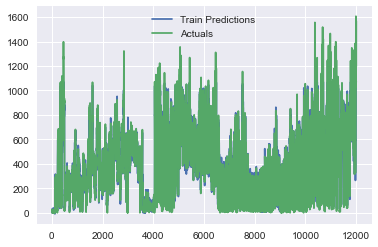

In [10]:
model = load_model('1H_Forecast/1H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(1,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)
train_predictions = model.predict(X_train).flatten()


train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 2 hours forecast

In [11]:
%%time

Trainer(2,6,12)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 252474.9219 - mean_absolute_error: 412.6790 - val_loss: 367558.0312 - val_mean_absolute_error: 492.8304
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 249644.7656 - mean_absolute_error: 409.2152 - val_loss: 363645.3750 - val_mean_absolute_error: 488.9566
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 246759.7031 - mean_absolute_error: 405.8717 - val_loss: 360745.1250 - val_mean_absolute_error: 486.0540
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 244622.9531 - mean_absolute_error: 403.3613 - val_loss: 358311.7500 - val_mean_absolute_error: 483.6387
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 242501.4375 - mean_absolute_error: 400.8590 - val_loss: 355568.8750 - val_mean_absolute_error: 480.8853
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 240315.9062 - mean_absolute_error: 398.2783 - val_loss: 352927.3750 - val_mean_absolute_error: 478.2317
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 7ms/step - loss: 238030.0781 - mean_absolute_error: 395.6063 - val_loss: 349956.8125 - val_mean_absolute_error: 475.2391
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 5ms/step - loss: 235480.6719 - mean_absolute_error: 392.6821 - val_loss: 346975.6562 - val_mean_absolute_error: 472.3066
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 233018.5625 - mean_absolute_error: 389.8781 - val_loss: 343933.3750 - val_mean_absolute_error: 469.3365: 0s - loss: 231717.
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 6ms/step - loss: 230475.3750 - mean_absolute_error: 386.9865 - val_loss: 340799.0312 - val_mean_absolute_error: 466.2937
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 227845.4531 - mean_absolute_error: 384.0386 - val_loss: 337552.5312 - val_mean_absolute_error: 463.1715
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 225125.5781 - mean_absolute_error: 380.9923 - val_loss: 334193.7812 - val_mean_absolute_error: 459.9581
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 222323.2812 - mean_absolute_error: 377.8616 - val_loss: 330735.0312 - val_mean_absolute_error: 456.6591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 6ms/step - loss: 219442.2656 - mean_absolute_error: 374.6840 - val_loss: 327169.4688 - val_mean_absolute_error: 453.2960
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 216489.2188 - mean_absolute_error: 371.4279 - val_loss: 323520.0625 - val_mean_absolute_error: 449.8739
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 213397.3125 - mean_absolute_error: 368.0497 - val_loss: 319583.2500 - val_mean_absolute_error: 446.2105
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 210127.2500 - mean_absolute_error: 364.4327 - val_loss: 315492.9688 - val_mean_absolute_error: 442.4322
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 206810.9688 - mean_absolute_error: 360.8548 - val_loss: 311478.1562 - val_mean_absolute_error: 438.7500
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 6ms/step - loss: 203529.0000 - mean_absolute_error: 357.2644 - val_loss: 307375.4688 - val_mean_absolute_error: 434.9816
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 200065.3281 - mean_absolute_error: 353.4820 - val_loss: 303035.5312 - val_mean_absolute_error: 431.0277
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 196616.2031 - mean_absolute_error: 349.6985 - val_loss: 298762.9375 - val_mean_absolute_error: 427.1070
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 193143.9531 - mean_absolute_error: 345.9129 - val_loss: 294424.9375 - val_mean_absolute_error: 423.1163
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 189638.2500 - mean_absolute_error: 342.0425 - val_loss: 290047.2812 - val_mean_absolute_error: 418.9851
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 186098.5938 - mean_absolute_error: 338.0578 - val_loss: 285613.1250 - val_mean_absolute_error: 414.8689
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 182516.2344 - mean_absolute_error: 334.0092 - val_loss: 281119.1250 - val_mean_absolute_error: 410.6247
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 7ms/step - loss: 178909.6094 - mean_absolute_error: 330.0002 - val_loss: 276581.7500 - val_mean_absolute_error: 406.3302
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 6ms/step - loss: 175287.0781 - mean_absolute_error: 325.9645 - val_loss: 272013.2812 - val_mean_absolute_error: 402.0381
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 6ms/step - loss: 171647.3438 - mean_absolute_error: 321.8754 - val_loss: 267406.9062 - val_mean_absolute_error: 397.5235
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 167986.9844 - mean_absolute_error: 317.6543 - val_loss: 262757.2188 - val_mean_absolute_error: 393.0248
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 164312.5469 - mean_absolute_error: 313.3979 - val_loss: 258084.6250 - val_mean_absolute_error: 388.6014
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 160640.2188 - mean_absolute_error: 309.2544 - val_loss: 253400.2812 - val_mean_absolute_error: 383.9582
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 6ms/step - loss: 156967.8281 - mean_absolute_error: 304.9163 - val_loss: 248680.0625 - val_mean_absolute_error: 379.4789
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 153299.1562 - mean_absolute_error: 300.7002 - val_loss: 243962.9844 - val_mean_absolute_error: 374.7841
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 7ms/step - loss: 149615.5625 - mean_absolute_error: 296.1870 - val_loss: 239211.1406 - val_mean_absolute_error: 369.7172
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 145907.3906 - mean_absolute_error: 291.3274 - val_loss: 234455.3125 - val_mean_absolute_error: 364.5612
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 2s 6ms/step - loss: 142228.2500 - mean_absolute_error: 286.4923 - val_loss: 229685.4688 - val_mean_absolute_error: 359.5765
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 138571.4375 - mean_absolute_error: 281.8906 - val_loss: 224934.5469 - val_mean_absolute_error: 354.6167
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 134926.2344 - mean_absolute_error: 277.1065 - val_loss: 220175.3906 - val_mean_absolute_error: 349.4579
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 131298.8438 - mean_absolute_error: 272.3737 - val_loss: 215436.8125 - val_mean_absolute_error: 344.3314
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 127705.8828 - mean_absolute_error: 267.6625 - val_loss: 210699.2500 - val_mean_absolute_error: 339.1819
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 124149.8984 - mean_absolute_error: 263.0735 - val_loss: 205992.0469 - val_mean_absolute_error: 333.9873
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 120619.1562 - mean_absolute_error: 258.2902 - val_loss: 201311.3281 - val_mean_absolute_error: 328.7727
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 6ms/step - loss: 117123.7812 - mean_absolute_error: 253.5342 - val_loss: 196672.1562 - val_mean_absolute_error: 323.4261
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 113631.4375 - mean_absolute_error: 248.5078 - val_loss: 191910.2188 - val_mean_absolute_error: 318.0359
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 110105.1250 - mean_absolute_error: 243.7053 - val_loss: 187202.6562 - val_mean_absolute_error: 312.7983
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 106664.8750 - mean_absolute_error: 239.0107 - val_loss: 182562.3750 - val_mean_absolute_error: 307.4418
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 103296.0391 - mean_absolute_error: 234.2877 - val_loss: 177973.3594 - val_mean_absolute_error: 302.2650
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 99979.6406 - mean_absolute_error: 229.8266 - val_loss: 173438.7031 - val_mean_absolute_error: 297.1046
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 96711.2656 - mean_absolute_error: 225.1335 - val_loss: 168941.1406 - val_mean_absolute_error: 291.8396
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 93487.7422 - mean_absolute_error: 220.3631 - val_loss: 164502.2969 - val_mean_absolute_error: 286.5608
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 90184.0312 - mean_absolute_error: 215.5737 - val_loss: 159790.0469 - val_mean_absolute_error: 280.9649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 86998.2344 - mean_absolute_error: 210.6770 - val_loss: 155425.1719 - val_mean_absolute_error: 275.8957
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 83947.5859 - mean_absolute_error: 206.2549 - val_loss: 151129.2031 - val_mean_absolute_error: 270.7365
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 80973.9609 - mean_absolute_error: 201.7501 - val_loss: 146918.4844 - val_mean_absolute_error: 265.9608
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 6ms/step - loss: 78077.5859 - mean_absolute_error: 197.5413 - val_loss: 142762.4219 - val_mean_absolute_error: 260.9875
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 75252.0859 - mean_absolute_error: 193.3007 - val_loss: 138675.8594 - val_mean_absolute_error: 255.9356
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 72500.1172 - mean_absolute_error: 188.9808 - val_loss: 134669.6094 - val_mean_absolute_error: 251.2367
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 69833.7812 - mean_absolute_error: 184.7744 - val_loss: 130748.7812 - val_mean_absolute_error: 246.5741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 6ms/step - loss: 67246.5859 - mean_absolute_error: 180.7207 - val_loss: 126914.8047 - val_mean_absolute_error: 241.9268
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 2s 6ms/step - loss: 64715.9648 - mean_absolute_error: 176.5049 - val_loss: 123131.5312 - val_mean_absolute_error: 236.9999
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 62274.8711 - mean_absolute_error: 172.5090 - val_loss: 119435.9141 - val_mean_absolute_error: 232.5273
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 59902.4102 - mean_absolute_error: 168.6613 - val_loss: 115734.6797 - val_mean_absolute_error: 227.7316
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 57570.3516 - mean_absolute_error: 164.7808 - val_loss: 112148.9453 - val_mean_absolute_error: 223.3418
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 55339.2227 - mean_absolute_error: 160.9856 - val_loss: 108688.0391 - val_mean_absolute_error: 219.1804
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 53201.3398 - mean_absolute_error: 157.3376 - val_loss: 105283.2500 - val_mean_absolute_error: 214.5128
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 51146.2305 - mean_absolute_error: 153.5557 - val_loss: 101984.4844 - val_mean_absolute_error: 210.2366
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 49172.5977 - mean_absolute_error: 150.1017 - val_loss: 98778.7578 - val_mean_absolute_error: 206.2365
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 47263.6367 - mean_absolute_error: 146.7215 - val_loss: 95678.6016 - val_mean_absolute_error: 202.3480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 6ms/step - loss: 45444.5312 - mean_absolute_error: 143.3855 - val_loss: 92613.7578 - val_mean_absolute_error: 198.0028
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 43702.7422 - mean_absolute_error: 140.0632 - val_loss: 89642.1406 - val_mean_absolute_error: 193.9177
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 42045.0977 - mean_absolute_error: 137.0253 - val_loss: 86824.4453 - val_mean_absolute_error: 190.5392
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 40458.3984 - mean_absolute_error: 133.9028 - val_loss: 84027.6953 - val_mean_absolute_error: 186.8998
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 38947.3789 - mean_absolute_error: 130.9805 - val_loss: 81299.8359 - val_mean_absolute_error: 182.6896
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 37504.3047 - mean_absolute_error: 127.8624 - val_loss: 78701.7812 - val_mean_absolute_error: 179.5672
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 36139.8164 - mean_absolute_error: 125.4391 - val_loss: 76189.9922 - val_mean_absolute_error: 175.9832
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 6ms/step - loss: 34846.5586 - mean_absolute_error: 122.7315 - val_loss: 73766.8750 - val_mean_absolute_error: 172.7477
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 33619.9414 - mean_absolute_error: 120.3361 - val_loss: 71459.8516 - val_mean_absolute_error: 170.4126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 6ms/step - loss: 32470.0508 - mean_absolute_error: 117.9953 - val_loss: 69181.6406 - val_mean_absolute_error: 167.0769
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 31385.9883 - mean_absolute_error: 116.0163 - val_loss: 66989.6641 - val_mean_absolute_error: 163.2716
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 30353.8613 - mean_absolute_error: 113.7837 - val_loss: 64887.0625 - val_mean_absolute_error: 160.7190
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 29376.7246 - mean_absolute_error: 112.0011 - val_loss: 62847.3320 - val_mean_absolute_error: 158.2809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 2s 7ms/step - loss: 28474.7773 - mean_absolute_error: 109.9511 - val_loss: 60966.8828 - val_mean_absolute_error: 155.7539
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 27628.6465 - mean_absolute_error: 108.3119 - val_loss: 59094.8047 - val_mean_absolute_error: 152.8772
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 26831.9238 - mean_absolute_error: 106.6456 - val_loss: 57370.8008 - val_mean_absolute_error: 150.8375
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 26102.5723 - mean_absolute_error: 105.2303 - val_loss: 55701.1367 - val_mean_absolute_error: 148.5901
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 25406.2539 - mean_absolute_error: 103.6325 - val_loss: 54075.4258 - val_mean_absolute_error: 146.1661
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 24746.4160 - mean_absolute_error: 102.2604 - val_loss: 52629.0000 - val_mean_absolute_error: 143.8255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 24131.5977 - mean_absolute_error: 101.0671 - val_loss: 51074.2266 - val_mean_absolute_error: 141.9426
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 23577.8027 - mean_absolute_error: 99.6789 - val_loss: 49692.9961 - val_mean_absolute_error: 139.6837
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 23039.6289 - mean_absolute_error: 98.5883 - val_loss: 48573.9570 - val_mean_absolute_error: 138.1530
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 22537.9902 - mean_absolute_error: 97.4303 - val_loss: 47113.6406 - val_mean_absolute_error: 136.0730
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 22052.6133 - mean_absolute_error: 96.4980 - val_loss: 46002.9414 - val_mean_absolute_error: 134.1585
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 21623.0566 - mean_absolute_error: 95.5396 - val_loss: 44861.8867 - val_mean_absolute_error: 133.1614
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 21216.0312 - mean_absolute_error: 94.3783 - val_loss: 43805.7852 - val_mean_absolute_error: 131.1578
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 6ms/step - loss: 20804.6426 - mean_absolute_error: 93.3711 - val_loss: 42634.4180 - val_mean_absolute_error: 129.2591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 7ms/step - loss: 20467.7852 - mean_absolute_error: 92.6182 - val_loss: 41885.9062 - val_mean_absolute_error: 128.0825
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 20124.5781 - mean_absolute_error: 91.8951 - val_loss: 40781.2188 - val_mean_absolute_error: 127.1186
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 19826.5293 - mean_absolute_error: 91.1180 - val_loss: 39903.5742 - val_mean_absolute_error: 125.6781
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 2s 6ms/step - loss: 19530.0430 - mean_absolute_error: 90.6814 - val_loss: 39125.3438 - val_mean_absolute_error: 124.6799
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 2s 6ms/step - loss: 19252.9922 - mean_absolute_error: 89.8537 - val_loss: 38513.2891 - val_mean_absolute_error: 123.0040
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 253089.2031 - mean_absolute_error: 413.5032 - val_loss: 368974.7500 - val_mean_absolute_error: 494.6386
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 7ms/step - loss: 252762.1875 - mean_absolute_error: 413.0784 - val_loss: 367984.8750 - val_mean_absolute_error: 493.5920
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 250838.9062 - mean_absolute_error: 410.7848 - val_loss: 364888.0625 - val_mean_absolute_error: 490.5132
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 248252.6562 - mean_absolute_error: 407.6569 - val_loss: 361542.0938 - val_mean_absolute_error: 487.0469
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 245268.1250 - mean_absolute_error: 404.0737 - val_loss: 357973.4062 - val_mean_absolute_error: 483.4447
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 242326.7344 - mean_absolute_error: 400.5762 - val_loss: 354347.7500 - val_mean_absolute_error: 479.7855
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 239187.2812 - mean_absolute_error: 396.9186 - val_loss: 350381.0938 - val_mean_absolute_error: 475.8207
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 235782.3594 - mean_absolute_error: 392.9756 - val_loss: 346070.4688 - val_mean_absolute_error: 471.5442
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 232015.2344 - mean_absolute_error: 388.6921 - val_loss: 341362.3125 - val_mean_absolute_error: 466.9521
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 228035.2812 - mean_absolute_error: 384.2118 - val_loss: 336347.5938 - val_mean_absolute_error: 462.1224
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 223792.2344 - mean_absolute_error: 379.4642 - val_loss: 331170.6875 - val_mean_absolute_error: 457.1764
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 7ms/step - loss: 219474.7969 - mean_absolute_error: 374.6855 - val_loss: 325816.3750 - val_mean_absolute_error: 452.1210
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 7ms/step - loss: 215019.1719 - mean_absolute_error: 369.7848 - val_loss: 320284.5938 - val_mean_absolute_error: 446.9590
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 210429.8750 - mean_absolute_error: 364.7765 - val_loss: 314578.5000 - val_mean_absolute_error: 441.6924
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 205715.1562 - mean_absolute_error: 359.6425 - val_loss: 308715.8438 - val_mean_absolute_error: 436.2900
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 200887.3438 - mean_absolute_error: 354.2722 - val_loss: 302701.7188 - val_mean_absolute_error: 430.7879
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 195963.4688 - mean_absolute_error: 348.8819 - val_loss: 296546.8750 - val_mean_absolute_error: 425.1292
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 190965.5312 - mean_absolute_error: 343.4329 - val_loss: 290301.0625 - val_mean_absolute_error: 419.3696
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 185892.8438 - mean_absolute_error: 337.9155 - val_loss: 283927.4688 - val_mean_absolute_error: 413.4422
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 180678.2344 - mean_absolute_error: 332.0215 - val_loss: 277265.0938 - val_mean_absolute_error: 407.1859
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 175349.9688 - mean_absolute_error: 325.9864 - val_loss: 270619.6250 - val_mean_absolute_error: 400.8455
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 170044.6875 - mean_absolute_error: 319.9193 - val_loss: 263910.0938 - val_mean_absolute_error: 394.4546
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 164751.2812 - mean_absolute_error: 313.8988 - val_loss: 257197.3125 - val_mean_absolute_error: 387.9457
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 159438.2031 - mean_absolute_error: 307.6042 - val_loss: 250422.3438 - val_mean_absolute_error: 381.1897
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 154120.6719 - mean_absolute_error: 301.2185 - val_loss: 243614.6406 - val_mean_absolute_error: 374.3835
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 148812.8906 - mean_absolute_error: 294.8033 - val_loss: 236795.2031 - val_mean_absolute_error: 367.3461
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 7ms/step - loss: 143546.4375 - mean_absolute_error: 288.1446 - val_loss: 229988.4219 - val_mean_absolute_error: 360.3417
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 6ms/step - loss: 138318.7969 - mean_absolute_error: 281.5649 - val_loss: 223205.3594 - val_mean_absolute_error: 353.3195
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 133146.0156 - mean_absolute_error: 275.2012 - val_loss: 216460.9844 - val_mean_absolute_error: 345.9652
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 128034.8359 - mean_absolute_error: 268.4350 - val_loss: 209743.5938 - val_mean_absolute_error: 338.7706
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 122968.9688 - mean_absolute_error: 261.6854 - val_loss: 203057.5625 - val_mean_absolute_error: 331.3294
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 7ms/step - loss: 117977.9688 - mean_absolute_error: 254.8455 - val_loss: 196449.4531 - val_mean_absolute_error: 323.9089
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 113061.0938 - mean_absolute_error: 248.2375 - val_loss: 189884.8906 - val_mean_absolute_error: 316.5969
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 108250.6328 - mean_absolute_error: 241.7655 - val_loss: 183430.8750 - val_mean_absolute_error: 309.1593
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 103548.7734 - mean_absolute_error: 235.1536 - val_loss: 177045.4844 - val_mean_absolute_error: 302.0088
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 98861.6016 - mean_absolute_error: 228.5179 - val_loss: 170534.5781 - val_mean_absolute_error: 294.5310
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 94233.6797 - mean_absolute_error: 221.8802 - val_loss: 164230.6719 - val_mean_absolute_error: 287.2202
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 89795.4297 - mean_absolute_error: 215.4564 - val_loss: 158088.0000 - val_mean_absolute_error: 280.0649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 85494.5156 - mean_absolute_error: 209.1513 - val_loss: 152075.6094 - val_mean_absolute_error: 272.9441
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 81332.2578 - mean_absolute_error: 202.9079 - val_loss: 146171.1094 - val_mean_absolute_error: 265.9754
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 77306.9141 - mean_absolute_error: 196.6339 - val_loss: 140434.7969 - val_mean_absolute_error: 258.8397
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 73436.8984 - mean_absolute_error: 190.5267 - val_loss: 134860.5781 - val_mean_absolute_error: 252.2653
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 69713.1797 - mean_absolute_error: 184.6951 - val_loss: 129401.8906 - val_mean_absolute_error: 245.4831
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 7ms/step - loss: 66140.7266 - mean_absolute_error: 179.0215 - val_loss: 124155.9453 - val_mean_absolute_error: 239.2425
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 7ms/step - loss: 62704.9336 - mean_absolute_error: 173.2592 - val_loss: 118990.5703 - val_mean_absolute_error: 232.2640
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 7ms/step - loss: 59432.7070 - mean_absolute_error: 167.6237 - val_loss: 114022.1719 - val_mean_absolute_error: 226.2870
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 7ms/step - loss: 56326.5859 - mean_absolute_error: 162.5390 - val_loss: 109215.4141 - val_mean_absolute_error: 220.2009
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 7ms/step - loss: 53348.3125 - mean_absolute_error: 157.2583 - val_loss: 104502.1172 - val_mean_absolute_error: 213.6962
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 50546.6133 - mean_absolute_error: 152.3214 - val_loss: 100045.9141 - val_mean_absolute_error: 208.0592
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 47906.0156 - mean_absolute_error: 147.7861 - val_loss: 95743.1875 - val_mean_absolute_error: 202.1656
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 7ms/step - loss: 45439.2734 - mean_absolute_error: 143.3271 - val_loss: 91637.0547 - val_mean_absolute_error: 197.1306
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 7ms/step - loss: 43114.0430 - mean_absolute_error: 139.2275 - val_loss: 87713.1094 - val_mean_absolute_error: 191.9624
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 40959.0859 - mean_absolute_error: 135.2866 - val_loss: 83982.3203 - val_mean_absolute_error: 186.6633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 38935.0938 - mean_absolute_error: 131.1275 - val_loss: 80368.4609 - val_mean_absolute_error: 182.3558
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 37008.0117 - mean_absolute_error: 127.2939 - val_loss: 76929.2109 - val_mean_absolute_error: 177.4567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 35251.7617 - mean_absolute_error: 123.8725 - val_loss: 73688.9688 - val_mean_absolute_error: 173.0099
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 33629.0898 - mean_absolute_error: 120.7774 - val_loss: 70560.9688 - val_mean_absolute_error: 168.8400
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 32123.0605 - mean_absolute_error: 117.7236 - val_loss: 67601.7812 - val_mean_absolute_error: 165.1315
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 30740.8262 - mean_absolute_error: 115.0717 - val_loss: 64834.5039 - val_mean_absolute_error: 161.7240
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 29472.3652 - mean_absolute_error: 112.5058 - val_loss: 62223.8867 - val_mean_absolute_error: 157.8780
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 7ms/step - loss: 28267.2324 - mean_absolute_error: 109.9072 - val_loss: 59761.0000 - val_mean_absolute_error: 155.5935
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 27166.4688 - mean_absolute_error: 107.4770 - val_loss: 57308.8867 - val_mean_absolute_error: 151.7209
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 26175.9277 - mean_absolute_error: 105.6750 - val_loss: 55060.6836 - val_mean_absolute_error: 148.3765
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 25260.9844 - mean_absolute_error: 103.7154 - val_loss: 53021.6992 - val_mean_absolute_error: 145.4528
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 7ms/step - loss: 24454.9766 - mean_absolute_error: 102.0339 - val_loss: 51172.6055 - val_mean_absolute_error: 142.7146
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 23707.9180 - mean_absolute_error: 100.4308 - val_loss: 49262.9062 - val_mean_absolute_error: 140.7216
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 23029.9355 - mean_absolute_error: 99.0095 - val_loss: 47517.3281 - val_mean_absolute_error: 137.7649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 22398.8438 - mean_absolute_error: 97.6620 - val_loss: 45938.7969 - val_mean_absolute_error: 135.6542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 21829.3594 - mean_absolute_error: 96.3616 - val_loss: 44571.4648 - val_mean_absolute_error: 133.1755
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 7ms/step - loss: 21305.2656 - mean_absolute_error: 95.1237 - val_loss: 43092.5234 - val_mean_absolute_error: 132.0953
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 20799.6543 - mean_absolute_error: 93.8327 - val_loss: 41849.2969 - val_mean_absolute_error: 129.2483
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 7ms/step - loss: 20333.4941 - mean_absolute_error: 92.4788 - val_loss: 40483.4961 - val_mean_absolute_error: 127.7428
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 19929.7480 - mean_absolute_error: 91.8164 - val_loss: 39400.9297 - val_mean_absolute_error: 125.5388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 7ms/step - loss: 19585.3359 - mean_absolute_error: 91.1056 - val_loss: 38318.6562 - val_mean_absolute_error: 124.0386
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 19241.5840 - mean_absolute_error: 90.2876 - val_loss: 37420.3945 - val_mean_absolute_error: 122.6323
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 18938.0859 - mean_absolute_error: 89.5008 - val_loss: 36462.5625 - val_mean_absolute_error: 121.6295
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 18676.1465 - mean_absolute_error: 89.2679 - val_loss: 35607.2148 - val_mean_absolute_error: 120.5716
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 18411.2734 - mean_absolute_error: 88.5084 - val_loss: 34786.9648 - val_mean_absolute_error: 119.8582
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 18200.4004 - mean_absolute_error: 88.0893 - val_loss: 34160.1680 - val_mean_absolute_error: 118.8283
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 7ms/step - loss: 17938.4258 - mean_absolute_error: 87.2805 - val_loss: 33250.3438 - val_mean_absolute_error: 116.3998
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 7ms/step - loss: 17732.3672 - mean_absolute_error: 86.7261 - val_loss: 32713.5938 - val_mean_absolute_error: 115.9369
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 17554.6328 - mean_absolute_error: 86.6493 - val_loss: 32088.5371 - val_mean_absolute_error: 115.9264
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 17371.5527 - mean_absolute_error: 85.9975 - val_loss: 31428.9375 - val_mean_absolute_error: 114.6622
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 17221.8145 - mean_absolute_error: 85.7323 - val_loss: 30916.3535 - val_mean_absolute_error: 113.4048
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 17063.7324 - mean_absolute_error: 85.0669 - val_loss: 30359.9238 - val_mean_absolute_error: 112.3472
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 16913.3887 - mean_absolute_error: 84.9419 - val_loss: 30061.5820 - val_mean_absolute_error: 111.79920508 - mean_abs
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 16765.2402 - mean_absolute_error: 84.2948 - val_loss: 29869.0566 - val_mean_absolute_error: 111.7339
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 16686.8027 - mean_absolute_error: 84.2604 - val_loss: 29197.5586 - val_mean_absolute_error: 110.0665
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 16534.5371 - mean_absolute_error: 83.8539 - val_loss: 28580.8887 - val_mean_absolute_error: 109.4477
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 16381.4102 - mean_absolute_error: 83.5915 - val_loss: 28177.6602 - val_mean_absolute_error: 110.4261
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 7ms/step - loss: 16300.8652 - mean_absolute_error: 83.1975 - val_loss: 27757.5508 - val_mean_absolute_error: 109.1215
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 2s 7ms/step - loss: 16244.4629 - mean_absolute_error: 83.1559 - val_loss: 27442.4395 - val_mean_absolute_error: 108.1120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 16136.3174 - mean_absolute_error: 83.0816 - val_loss: 27326.3281 - val_mean_absolute_error: 107.8578
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 2s 6ms/step - loss: 16077.3701 - mean_absolute_error: 82.7537 - val_loss: 26803.4160 - val_mean_absolute_error: 106.5644
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 15961.6250 - mean_absolute_error: 82.5574 - val_loss: 26523.3770 - val_mean_absolute_error: 106.3130
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 7ms/step - loss: 15892.8564 - mean_absolute_error: 82.1230 - val_loss: 26292.3672 - val_mean_absolute_error: 105.6709
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 15836.6436 - mean_absolute_error: 82.0327 - val_loss: 26193.1133 - val_mean_absolute_error: 105.5565
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 15763.6094 - mean_absolute_error: 82.0969 - val_loss: 25882.6758 - val_mean_absolute_error: 104.8286
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 15716.6768 - mean_absolute_error: 81.8763 - val_loss: 25598.8672 - val_mean_absolute_error: 104.9741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 15667.7070 - mean_absolute_error: 81.8390 - val_loss: 25293.3262 - val_mean_absolute_error: 104.6207
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 11ms/step - loss: 253313.5469 - mean_absolute_error: 413.6586 - val_loss: 368592.0000 - val_mean_absolute_error: 494.3144
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 252596.3281 - mean_absolute_error: 412.7817 - val_loss: 367210.8125 - val_mean_absolute_error: 492.9297
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 251148.2188 - mean_absolute_error: 411.0923 - val_loss: 365406.6875 - val_mean_absolute_error: 491.0993
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 249504.7500 - mean_absolute_error: 409.1309 - val_loss: 363417.6250 - val_mean_absolute_error: 489.1133
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 247951.8125 - mean_absolute_error: 407.2587 - val_loss: 361559.3750 - val_mean_absolute_error: 487.2157
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 246362.1875 - mean_absolute_error: 405.3460 - val_loss: 359608.2812 - val_mean_absolute_error: 485.2125
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 244628.3438 - mean_absolute_error: 403.2704 - val_loss: 357435.8438 - val_mean_absolute_error: 483.0142
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 242732.8750 - mean_absolute_error: 401.0118 - val_loss: 355037.0000 - val_mean_absolute_error: 480.5898
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 240723.5781 - mean_absolute_error: 398.6572 - val_loss: 352589.0625 - val_mean_absolute_error: 478.1288
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 238639.9688 - mean_absolute_error: 396.2386 - val_loss: 350018.6562 - val_mean_absolute_error: 475.5632
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 236451.5938 - mean_absolute_error: 393.7126 - val_loss: 347312.6562 - val_mean_absolute_error: 472.8774
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 234160.5938 - mean_absolute_error: 391.0761 - val_loss: 344486.2812 - val_mean_absolute_error: 470.0924
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 231771.7500 - mean_absolute_error: 388.3704 - val_loss: 341534.0312 - val_mean_absolute_error: 467.2148
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 229286.2188 - mean_absolute_error: 385.5750 - val_loss: 338466.1250 - val_mean_absolute_error: 464.2512
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 226708.1562 - mean_absolute_error: 382.6871 - val_loss: 335285.8438 - val_mean_absolute_error: 461.2010
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 224043.6562 - mean_absolute_error: 379.7079 - val_loss: 332002.6250 - val_mean_absolute_error: 458.0616
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 221294.2344 - mean_absolute_error: 376.6562 - val_loss: 328603.3750 - val_mean_absolute_error: 454.8298
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 218470.5625 - mean_absolute_error: 373.5328 - val_loss: 325112.2188 - val_mean_absolute_error: 451.5446
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 215574.8281 - mean_absolute_error: 370.3623 - val_loss: 321533.0938 - val_mean_absolute_error: 448.1988
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 212609.6875 - mean_absolute_error: 367.1357 - val_loss: 317859.9375 - val_mean_absolute_error: 444.7873
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 209578.9688 - mean_absolute_error: 363.8127 - val_loss: 314106.2500 - val_mean_absolute_error: 441.3294
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 206482.1875 - mean_absolute_error: 360.4356 - val_loss: 310271.5000 - val_mean_absolute_error: 437.8061
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 203327.6562 - mean_absolute_error: 356.9509 - val_loss: 306354.0000 - val_mean_absolute_error: 434.2170
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 200124.4688 - mean_absolute_error: 353.4581 - val_loss: 302367.5938 - val_mean_absolute_error: 430.5683
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 196717.8750 - mean_absolute_error: 349.7238 - val_loss: 298008.3438 - val_mean_absolute_error: 426.5098
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 193282.4531 - mean_absolute_error: 345.8363 - val_loss: 293830.0312 - val_mean_absolute_error: 422.6208
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 189883.8906 - mean_absolute_error: 342.0508 - val_loss: 289588.0000 - val_mean_absolute_error: 418.6748
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 186450.9062 - mean_absolute_error: 338.2484 - val_loss: 285294.1875 - val_mean_absolute_error: 414.6847
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 182992.7031 - mean_absolute_error: 334.4228 - val_loss: 280960.8438 - val_mean_absolute_error: 410.5935
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 179502.0938 - mean_absolute_error: 330.4764 - val_loss: 276577.1562 - val_mean_absolute_error: 406.4777
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 175981.9062 - mean_absolute_error: 326.4303 - val_loss: 272155.0938 - val_mean_absolute_error: 402.3290
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 172445.3281 - mean_absolute_error: 322.4933 - val_loss: 267699.6250 - val_mean_absolute_error: 397.9517
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 168891.1875 - mean_absolute_error: 318.4667 - val_loss: 263196.4375 - val_mean_absolute_error: 393.5925
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 165321.5312 - mean_absolute_error: 314.2755 - val_loss: 258670.2969 - val_mean_absolute_error: 389.2244
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 161744.1094 - mean_absolute_error: 310.1264 - val_loss: 254122.8906 - val_mean_absolute_error: 384.7681
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 158160.4375 - mean_absolute_error: 305.9237 - val_loss: 249545.2344 - val_mean_absolute_error: 380.2021
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 154575.9531 - mean_absolute_error: 301.6812 - val_loss: 244952.4844 - val_mean_absolute_error: 375.5989
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 150998.7344 - mean_absolute_error: 297.3619 - val_loss: 240365.1562 - val_mean_absolute_error: 371.0275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 147428.9531 - mean_absolute_error: 293.1051 - val_loss: 235759.6875 - val_mean_absolute_error: 366.2809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 143867.5156 - mean_absolute_error: 288.7286 - val_loss: 231145.6875 - val_mean_absolute_error: 361.5070
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 140319.3281 - mean_absolute_error: 284.3582 - val_loss: 226540.9531 - val_mean_absolute_error: 356.6578
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 136776.1094 - mean_absolute_error: 279.6507 - val_loss: 221920.2344 - val_mean_absolute_error: 351.8103
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 133245.0312 - mean_absolute_error: 275.2203 - val_loss: 217321.3906 - val_mean_absolute_error: 346.9319
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 129746.9531 - mean_absolute_error: 270.7451 - val_loss: 212722.2969 - val_mean_absolute_error: 342.0049
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 126270.9844 - mean_absolute_error: 266.2987 - val_loss: 208144.0625 - val_mean_absolute_error: 336.9798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 122824.2891 - mean_absolute_error: 261.6487 - val_loss: 203579.5469 - val_mean_absolute_error: 331.9715
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 119409.6016 - mean_absolute_error: 257.2252 - val_loss: 199058.7344 - val_mean_absolute_error: 326.8374
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 116019.9297 - mean_absolute_error: 252.6205 - val_loss: 194526.0469 - val_mean_absolute_error: 321.7892
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 112657.3281 - mean_absolute_error: 248.1445 - val_loss: 189956.5000 - val_mean_absolute_error: 316.6711
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 109268.3750 - mean_absolute_error: 243.3434 - val_loss: 185404.9688 - val_mean_absolute_error: 311.7047
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 105962.4766 - mean_absolute_error: 238.9636 - val_loss: 180944.9219 - val_mean_absolute_error: 306.5296
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 102681.1875 - mean_absolute_error: 234.0110 - val_loss: 176526.2188 - val_mean_absolute_error: 301.4045
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 99411.8828 - mean_absolute_error: 229.3564 - val_loss: 172028.0156 - val_mean_absolute_error: 296.0039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 96207.8906 - mean_absolute_error: 224.5165 - val_loss: 167646.7500 - val_mean_absolute_error: 291.0997
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 93086.4375 - mean_absolute_error: 220.1550 - val_loss: 163348.9219 - val_mean_absolute_error: 285.9938
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 90025.4922 - mean_absolute_error: 215.6080 - val_loss: 159100.7031 - val_mean_absolute_error: 281.0113
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 87026.4844 - mean_absolute_error: 211.3319 - val_loss: 154910.1406 - val_mean_absolute_error: 276.1394
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 84078.4531 - mean_absolute_error: 206.9180 - val_loss: 150726.8281 - val_mean_absolute_error: 271.0400
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 81190.3828 - mean_absolute_error: 202.5123 - val_loss: 146634.6875 - val_mean_absolute_error: 266.2388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 78371.0234 - mean_absolute_error: 198.2682 - val_loss: 142625.1094 - val_mean_absolute_error: 261.6081
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 75618.5625 - mean_absolute_error: 193.9355 - val_loss: 138641.9531 - val_mean_absolute_error: 256.6239
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 72921.2969 - mean_absolute_error: 189.5466 - val_loss: 134738.9531 - val_mean_absolute_error: 251.728672266.8516 - mean_absolute_erro
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 70308.3359 - mean_absolute_error: 185.4509 - val_loss: 130905.9219 - val_mean_absolute_error: 246.8933
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 67706.0625 - mean_absolute_error: 181.0187 - val_loss: 127041.7031 - val_mean_absolute_error: 242.0924
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 65177.6875 - mean_absolute_error: 177.0083 - val_loss: 123286.6016 - val_mean_absolute_error: 237.4541
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 62742.1367 - mean_absolute_error: 172.9971 - val_loss: 119615.9766 - val_mean_absolute_error: 232.7075
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 60395.4766 - mean_absolute_error: 168.9573 - val_loss: 116048.7734 - val_mean_absolute_error: 228.2575
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 58120.7227 - mean_absolute_error: 164.9138 - val_loss: 112551.1797 - val_mean_absolute_error: 223.7254
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 55934.9648 - mean_absolute_error: 161.2748 - val_loss: 109140.8984 - val_mean_absolute_error: 219.4741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 53821.9805 - mean_absolute_error: 157.6616 - val_loss: 105840.4531 - val_mean_absolute_error: 215.3268
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 51788.3125 - mean_absolute_error: 154.0844 - val_loss: 102608.0312 - val_mean_absolute_error: 211.0579
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 49824.9766 - mean_absolute_error: 150.5757 - val_loss: 99408.2734 - val_mean_absolute_error: 206.9704
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 47937.7695 - mean_absolute_error: 147.4524 - val_loss: 96322.4375 - val_mean_absolute_error: 202.7115
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 46116.3711 - mean_absolute_error: 143.8240 - val_loss: 93333.1953 - val_mean_absolute_error: 199.0016
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 44388.8516 - mean_absolute_error: 140.6717 - val_loss: 90401.1875 - val_mean_absolute_error: 195.0392
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 42743.0742 - mean_absolute_error: 137.7094 - val_loss: 87639.8828 - val_mean_absolute_error: 191.3730
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 41180.8750 - mean_absolute_error: 134.6679 - val_loss: 84892.0781 - val_mean_absolute_error: 187.3876
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 39676.9414 - mean_absolute_error: 131.7734 - val_loss: 82231.7500 - val_mean_absolute_error: 184.0519
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 38255.2188 - mean_absolute_error: 129.2164 - val_loss: 79711.0156 - val_mean_absolute_error: 180.5883
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 36897.5547 - mean_absolute_error: 126.4621 - val_loss: 77241.7344 - val_mean_absolute_error: 177.6346
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 35610.2188 - mean_absolute_error: 123.8957 - val_loss: 74813.4062 - val_mean_absolute_error: 173.9646
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 34390.4414 - mean_absolute_error: 121.4492 - val_loss: 72470.0000 - val_mean_absolute_error: 171.2146
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 33226.2422 - mean_absolute_error: 119.1465 - val_loss: 70267.5547 - val_mean_absolute_error: 168.0098
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 32123.7090 - mean_absolute_error: 116.9445 - val_loss: 68093.1719 - val_mean_absolute_error: 165.4003
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 31098.2676 - mean_absolute_error: 115.0127 - val_loss: 65998.6016 - val_mean_absolute_error: 162.3361
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 30140.2852 - mean_absolute_error: 112.9638 - val_loss: 64074.7383 - val_mean_absolute_error: 160.8459
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 29192.5430 - mean_absolute_error: 110.9540 - val_loss: 62107.7578 - val_mean_absolute_error: 157.3630
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 28311.1270 - mean_absolute_error: 108.9240 - val_loss: 60235.4688 - val_mean_absolute_error: 154.3631
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 4s 9ms/step - loss: 27486.9746 - mean_absolute_error: 107.2713 - val_loss: 58478.9766 - val_mean_absolute_error: 152.2548
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 26719.3223 - mean_absolute_error: 105.7972 - val_loss: 56818.0039 - val_mean_absolute_error: 150.5025
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 25998.6719 - mean_absolute_error: 104.3706 - val_loss: 55154.8867 - val_mean_absolute_error: 147.6821
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 25320.4531 - mean_absolute_error: 102.8557 - val_loss: 53612.2031 - val_mean_absolute_error: 145.3955
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 24706.4590 - mean_absolute_error: 101.7412 - val_loss: 52140.9531 - val_mean_absolute_error: 143.5392
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 24112.6172 - mean_absolute_error: 100.3832 - val_loss: 50770.2266 - val_mean_absolute_error: 141.6564
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 23554.4434 - mean_absolute_error: 99.2022 - val_loss: 49445.8164 - val_mean_absolute_error: 139.6360
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 7ms/step - loss: 23018.0938 - mean_absolute_error: 97.9957 - val_loss: 48164.3633 - val_mean_absolute_error: 137.5605
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 22529.1328 - mean_absolute_error: 97.0339 - val_loss: 46970.0508 - val_mean_absolute_error: 136.0458
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 22071.2812 - mean_absolute_error: 96.0489 - val_loss: 45786.5898 - val_mean_absolute_error: 134.7032
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 21665.2930 - mean_absolute_error: 95.1146 - val_loss: 44676.4688 - val_mean_absolute_error: 132.7085
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 21259.3301 - mean_absolute_error: 94.3338 - val_loss: 43840.9688 - val_mean_absolute_error: 131.4792
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 252127.9844 - mean_absolute_error: 412.3080 - val_loss: 365544.5625 - val_mean_absolute_error: 491.1841
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 248126.8906 - mean_absolute_error: 407.4008 - val_loss: 359659.8438 - val_mean_absolute_error: 485.2491
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 243568.6250 - mean_absolute_error: 401.9986 - val_loss: 354820.8438 - val_mean_absolute_error: 480.3307
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 239661.4062 - mean_absolute_error: 397.4187 - val_loss: 350342.2188 - val_mean_absolute_error: 475.8423
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 235965.7031 - mean_absolute_error: 393.1483 - val_loss: 345898.4062 - val_mean_absolute_error: 471.4633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 232309.5312 - mean_absolute_error: 388.9622 - val_loss: 341358.0000 - val_mean_absolute_error: 467.0221
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 228486.5938 - mean_absolute_error: 384.6445 - val_loss: 336726.6250 - val_mean_absolute_error: 462.5552
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 224386.0312 - mean_absolute_error: 380.0322 - val_loss: 331467.9062 - val_mean_absolute_error: 457.5208
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 220119.5625 - mean_absolute_error: 375.2783 - val_loss: 326332.6250 - val_mean_absolute_error: 452.6605
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 215844.5781 - mean_absolute_error: 370.5570 - val_loss: 321042.1875 - val_mean_absolute_error: 447.7128
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 211448.3438 - mean_absolute_error: 365.7326 - val_loss: 315594.7500 - val_mean_absolute_error: 442.6761
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 10ms/step - loss: 206931.4688 - mean_absolute_error: 360.7931 - val_loss: 309990.6250 - val_mean_absolute_error: 437.5388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 202323.2031 - mean_absolute_error: 355.7656 - val_loss: 304263.3750 - val_mean_absolute_error: 432.3134
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 197629.4062 - mean_absolute_error: 350.5830 - val_loss: 298430.0312 - val_mean_absolute_error: 426.9082
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 192858.5781 - mean_absolute_error: 345.2425 - val_loss: 292483.7500 - val_mean_absolute_error: 421.4334
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 188012.3438 - mean_absolute_error: 339.8567 - val_loss: 286430.1875 - val_mean_absolute_error: 415.7497
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 183113.5312 - mean_absolute_error: 334.3078 - val_loss: 280286.8438 - val_mean_absolute_error: 410.0684
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 178171.9219 - mean_absolute_error: 328.8215 - val_loss: 274080.4375 - val_mean_absolute_error: 404.2742
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 173200.2344 - mean_absolute_error: 323.1432 - val_loss: 267817.4375 - val_mean_absolute_error: 398.2266
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 168187.0156 - mean_absolute_error: 317.3789 - val_loss: 261397.3594 - val_mean_absolute_error: 391.9736
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 162942.7656 - mean_absolute_error: 311.2751 - val_loss: 254747.3438 - val_mean_absolute_error: 385.5050
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 157801.1719 - mean_absolute_error: 305.2924 - val_loss: 248239.5312 - val_mean_absolute_error: 379.0120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 152716.7344 - mean_absolute_error: 299.1843 - val_loss: 241724.0000 - val_mean_absolute_error: 372.5521
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 147666.6094 - mean_absolute_error: 292.9026 - val_loss: 235254.0469 - val_mean_absolute_error: 366.1718
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 142652.5781 - mean_absolute_error: 286.9081 - val_loss: 228775.8281 - val_mean_absolute_error: 359.2587
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 137663.9219 - mean_absolute_error: 280.4676 - val_loss: 222297.4688 - val_mean_absolute_error: 352.4545
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 132728.6250 - mean_absolute_error: 274.2760 - val_loss: 215869.3594 - val_mean_absolute_error: 345.6249
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 127844.1797 - mean_absolute_error: 267.9434 - val_loss: 209439.3594 - val_mean_absolute_error: 338.5677
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 123015.0703 - mean_absolute_error: 261.4738 - val_loss: 203058.5625 - val_mean_absolute_error: 331.5873
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 118243.3672 - mean_absolute_error: 255.1745 - val_loss: 196756.6094 - val_mean_absolute_error: 324.5688
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 113568.5781 - mean_absolute_error: 248.8723 - val_loss: 190532.6562 - val_mean_absolute_error: 317.7499
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 108965.9062 - mean_absolute_error: 242.5467 - val_loss: 184333.3125 - val_mean_absolute_error: 310.6594
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 104432.8672 - mean_absolute_error: 236.1020 - val_loss: 178228.5938 - val_mean_absolute_error: 303.7586
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 100002.4766 - mean_absolute_error: 229.7877 - val_loss: 172224.1250 - val_mean_absolute_error: 296.8850
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 95647.3203 - mean_absolute_error: 223.6245 - val_loss: 166130.6875 - val_mean_absolute_error: 289.6558
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 91120.5547 - mean_absolute_error: 217.1027 - val_loss: 159698.0000 - val_mean_absolute_error: 282.1238
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 86732.3594 - mean_absolute_error: 210.5948 - val_loss: 153799.6875 - val_mean_absolute_error: 275.2823
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 82643.6172 - mean_absolute_error: 204.5256 - val_loss: 148053.9062 - val_mean_absolute_error: 268.3536
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 78709.8984 - mean_absolute_error: 198.5422 - val_loss: 142459.9375 - val_mean_absolute_error: 261.6356
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 74898.1875 - mean_absolute_error: 192.6764 - val_loss: 137010.1094 - val_mean_absolute_error: 255.1221
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 71200.1562 - mean_absolute_error: 186.8679 - val_loss: 131597.4844 - val_mean_absolute_error: 248.4134
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 67588.5625 - mean_absolute_error: 181.0217 - val_loss: 126320.4531 - val_mean_absolute_error: 242.0567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 64150.0820 - mean_absolute_error: 175.4197 - val_loss: 121153.6406 - val_mean_absolute_error: 235.6414
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 60829.1602 - mean_absolute_error: 170.0007 - val_loss: 116158.2734 - val_mean_absolute_error: 229.1761
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 57631.3828 - mean_absolute_error: 164.3076 - val_loss: 111237.5234 - val_mean_absolute_error: 222.8301
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 54503.5352 - mean_absolute_error: 158.8146 - val_loss: 106381.4531 - val_mean_absolute_error: 215.9123
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 51587.0156 - mean_absolute_error: 153.7047 - val_loss: 101888.6953 - val_mean_absolute_error: 210.1619
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 48828.1875 - mean_absolute_error: 148.6892 - val_loss: 97457.3203 - val_mean_absolute_error: 203.8513
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 46232.1211 - mean_absolute_error: 143.7284 - val_loss: 93208.9531 - val_mean_absolute_error: 197.8328
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 43788.9297 - mean_absolute_error: 139.3380 - val_loss: 89244.9766 - val_mean_absolute_error: 193.2528
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 41484.4609 - mean_absolute_error: 134.9477 - val_loss: 85327.1016 - val_mean_absolute_error: 187.2317
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 39291.0859 - mean_absolute_error: 130.5887 - val_loss: 81598.4375 - val_mean_absolute_error: 182.1484
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 37302.3672 - mean_absolute_error: 126.7185 - val_loss: 78044.0391 - val_mean_absolute_error: 177.0220
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 35425.2578 - mean_absolute_error: 122.9420 - val_loss: 74683.9062 - val_mean_absolute_error: 172.7019
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 33686.7891 - mean_absolute_error: 119.6045 - val_loss: 71635.2891 - val_mean_absolute_error: 168.6629
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 32044.5645 - mean_absolute_error: 116.0911 - val_loss: 68573.8359 - val_mean_absolute_error: 163.9733
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 30548.2207 - mean_absolute_error: 113.0296 - val_loss: 65498.1680 - val_mean_absolute_error: 160.0025
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 29145.2773 - mean_absolute_error: 110.1851 - val_loss: 63138.4375 - val_mean_absolute_error: 158.0137
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 27911.1133 - mean_absolute_error: 107.5894 - val_loss: 60276.4062 - val_mean_absolute_error: 152.5266
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 26648.6191 - mean_absolute_error: 104.7399 - val_loss: 58161.8125 - val_mean_absolute_error: 149.6666
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 25556.2129 - mean_absolute_error: 102.3035 - val_loss: 55662.3750 - val_mean_absolute_error: 146.3100
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 24516.8340 - mean_absolute_error: 100.0496 - val_loss: 53410.5234 - val_mean_absolute_error: 142.7337
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 23611.3906 - mean_absolute_error: 98.0260 - val_loss: 51275.4609 - val_mean_absolute_error: 140.3566
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 22816.8906 - mean_absolute_error: 96.4827 - val_loss: 49379.3086 - val_mean_absolute_error: 137.3394
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 22018.0020 - mean_absolute_error: 94.6933 - val_loss: 47744.7227 - val_mean_absolute_error: 134.5890
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 21330.3887 - mean_absolute_error: 93.1696 - val_loss: 46485.2422 - val_mean_absolute_error: 133.3348
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 20698.6094 - mean_absolute_error: 91.6727 - val_loss: 44471.7812 - val_mean_absolute_error: 130.1555
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 20135.3262 - mean_absolute_error: 90.4868 - val_loss: 43006.3711 - val_mean_absolute_error: 128.0178
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 19616.5254 - mean_absolute_error: 89.4131 - val_loss: 41791.0977 - val_mean_absolute_error: 126.6893
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 19120.6797 - mean_absolute_error: 88.2498 - val_loss: 40734.8398 - val_mean_absolute_error: 124.4681
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 18621.3359 - mean_absolute_error: 86.9814 - val_loss: 39520.6172 - val_mean_absolute_error: 123.6540
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 18253.2051 - mean_absolute_error: 86.1158 - val_loss: 38536.4453 - val_mean_absolute_error: 121.1598
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 17899.1328 - mean_absolute_error: 85.4840 - val_loss: 37294.0781 - val_mean_absolute_error: 119.7460
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 17559.8125 - mean_absolute_error: 84.5887 - val_loss: 36361.2695 - val_mean_absolute_error: 118.1398
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 17286.9512 - mean_absolute_error: 83.9619 - val_loss: 35545.9766 - val_mean_absolute_error: 116.8051
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 11ms/step - loss: 17013.2109 - mean_absolute_error: 83.3067 - val_loss: 34832.8359 - val_mean_absolute_error: 116.8785
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 16749.6602 - mean_absolute_error: 83.0470 - val_loss: 33815.8945 - val_mean_absolute_error: 114.7672
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 16519.9219 - mean_absolute_error: 82.4041 - val_loss: 33680.1406 - val_mean_absolute_error: 117.1613
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 16304.6777 - mean_absolute_error: 81.8764 - val_loss: 32582.4316 - val_mean_absolute_error: 113.0239
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 16094.8779 - mean_absolute_error: 81.3505 - val_loss: 32529.5801 - val_mean_absolute_error: 115.5048
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 15955.0127 - mean_absolute_error: 81.0425 - val_loss: 31317.1875 - val_mean_absolute_error: 111.6348
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 15805.3467 - mean_absolute_error: 80.8626 - val_loss: 30788.6113 - val_mean_absolute_error: 110.5043
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 15647.9785 - mean_absolute_error: 80.1860 - val_loss: 30287.2520 - val_mean_absolute_error: 109.8393
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 15532.1318 - mean_absolute_error: 80.0611 - val_loss: 30497.5195 - val_mean_absolute_error: 109.9003
Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 15413.6455 - mean_absolute_error: 80.0224 - val_loss: 29695.8652 - val_mean_absolute_error: 111.7567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 15328.9629 - mean_absolute_error: 79.9368 - val_loss: 29236.1934 - val_mean_absolute_error: 108.3556
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 15173.3867 - mean_absolute_error: 79.4061 - val_loss: 28671.6211 - val_mean_absolute_error: 107.3668
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 15097.3574 - mean_absolute_error: 79.2441 - val_loss: 28589.4375 - val_mean_absolute_error: 108.3103
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 15023.0938 - mean_absolute_error: 79.1335 - val_loss: 27940.3848 - val_mean_absolute_error: 106.9203
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 14875.7217 - mean_absolute_error: 78.9408 - val_loss: 28264.8770 - val_mean_absolute_error: 107.1347
Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 14827.7295 - mean_absolute_error: 78.5631 - val_loss: 27458.2949 - val_mean_absolute_error: 105.2197
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 14747.9678 - mean_absolute_error: 78.3700 - val_loss: 27193.8477 - val_mean_absolute_error: 105.0920
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 14667.7197 - mean_absolute_error: 78.3078 - val_loss: 27030.0527 - val_mean_absolute_error: 104.3053
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 14605.4746 - mean_absolute_error: 78.1618 - val_loss: 27101.2695 - val_mean_absolute_error: 104.4446
Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 14522.7021 - mean_absolute_error: 78.0779 - val_loss: 27290.5625 - val_mean_absolute_error: 104.9591
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 14427.9023 - mean_absolute_error: 77.6483 - val_loss: 26795.1133 - val_mean_absolute_error: 103.4721
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 14385.6133 - mean_absolute_error: 77.7457 - val_loss: 26182.0664 - val_mean_absolute_error: 102.9165
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 14303.4443 - mean_absolute_error: 77.5664 - val_loss: 25933.3750 - val_mean_absolute_error: 103.2206
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 14253.0381 - mean_absolute_error: 77.3314 - val_loss: 25623.8027 - val_mean_absolute_error: 101.8897
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 14184.2490 - mean_absolute_error: 77.3586 - val_loss: 26233.4746 - val_mean_absolute_error: 102.5732

-----------------------------------------------------------------------------------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 11ms/step - loss: 250363.9531 - m

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 11ms/step - loss: 241033.0156 - mean_absolute_error: 398.8324 - val_loss: 347430.4375 - val_mean_absolute_error: 472.5714
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 229902.6094 - mean_absolute_error: 386.1761 - val_loss: 335388.2812 - val_mean_absolute_error: 461.0509
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 220466.5469 - mean_absolute_error: 375.6042 - val_loss: 324072.9062 - val_mean_absolute_error: 450.4039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 211580.6406 - mean_absolute_error: 365.7268 - val_loss: 313272.6562 - val_mean_absolute_error: 440.3951
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 202626.9531 - mean_absolute_error: 355.8725 - val_loss: 302160.0938 - val_mean_absolute_error: 430.2174
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 193503.0000 - mean_absolute_error: 345.7696 - val_loss: 290805.5938 - val_mean_absolute_error: 419.7562
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 183841.6719 - mean_absolute_error: 334.9449 - val_loss: 278314.9062 - val_mean_absolute_error: 407.8990
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 9ms/step - loss: 174048.4688 - mean_absolute_error: 323.8919 - val_loss: 266356.0625 - val_mean_absolute_error: 396.6153
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 164568.5625 - mean_absolute_error: 312.8272 - val_loss: 254428.3594 - val_mean_absolute_error: 385.0796
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 155200.2188 - mean_absolute_error: 301.8633 - val_loss: 242541.9844 - val_mean_absolute_error: 373.1507
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 145982.9062 - mean_absolute_error: 290.5278 - val_loss: 230755.9844 - val_mean_absolute_error: 361.0714
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 136959.6875 - mean_absolute_error: 279.2310 - val_loss: 219127.0156 - val_mean_absolute_error: 348.8755
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 128174.6484 - mean_absolute_error: 268.0622 - val_loss: 207749.0625 - val_mean_absolute_error: 336.5457
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 119661.7031 - mean_absolute_error: 256.7504 - val_loss: 196576.0312 - val_mean_absolute_error: 324.3869
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 111441.6172 - mean_absolute_error: 245.7236 - val_loss: 185701.2031 - val_mean_absolute_error: 312.2020
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 103562.6953 - mean_absolute_error: 234.9484 - val_loss: 175126.7031 - val_mean_absolute_error: 300.4738
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 96017.2344 - mean_absolute_error: 224.5905 - val_loss: 164862.8281 - val_mean_absolute_error: 288.7419
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 88850.4297 - mean_absolute_error: 214.1699 - val_loss: 155011.3906 - val_mean_absolute_error: 277.2876
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 82088.0469 - mean_absolute_error: 204.1629 - val_loss: 145603.3750 - val_mean_absolute_error: 266.3561
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 75726.5000 - mean_absolute_error: 194.6642 - val_loss: 136599.2188 - val_mean_absolute_error: 255.5523
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 69770.7188 - mean_absolute_error: 185.0110 - val_loss: 127950.0781 - val_mean_absolute_error: 244.8539
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 64175.6719 - mean_absolute_error: 175.9503 - val_loss: 119736.2188 - val_mean_absolute_error: 234.5403
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 59041.3555 - mean_absolute_error: 167.3366 - val_loss: 112043.2734 - val_mean_absolute_error: 225.0295
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 54343.0742 - mean_absolute_error: 159.4957 - val_loss: 104814.0625 - val_mean_absolute_error: 216.2731
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 50052.4844 - mean_absolute_error: 152.1762 - val_loss: 98034.1250 - val_mean_absolute_error: 207.3413
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 46192.5430 - mean_absolute_error: 145.4823 - val_loss: 91788.3828 - val_mean_absolute_error: 199.2383
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 42636.3945 - mean_absolute_error: 138.5031 - val_loss: 85722.0000 - val_mean_absolute_error: 190.5575
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 39409.5117 - mean_absolute_error: 131.9370 - val_loss: 80196.2422 - val_mean_absolute_error: 183.1490
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 9ms/step - loss: 36547.4531 - mean_absolute_error: 126.3301 - val_loss: 75064.5938 - val_mean_absolute_error: 176.1466
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 34031.6406 - mean_absolute_error: 121.3256 - val_loss: 70507.9297 - val_mean_absolute_error: 169.9595
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 31807.7949 - mean_absolute_error: 116.5230 - val_loss: 66159.9453 - val_mean_absolute_error: 164.4893
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 9ms/step - loss: 29813.5801 - mean_absolute_error: 112.5144 - val_loss: 62139.5430 - val_mean_absolute_error: 158.7039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 28048.4434 - mean_absolute_error: 108.8102 - val_loss: 58454.9375 - val_mean_absolute_error: 153.3935
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 26494.3750 - mean_absolute_error: 105.3975 - val_loss: 55141.4023 - val_mean_absolute_error: 148.9148
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 11ms/step - loss: 25180.6094 - mean_absolute_error: 102.9355 - val_loss: 52307.2031 - val_mean_absolute_error: 144.8815
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 24038.2227 - mean_absolute_error: 100.4922 - val_loss: 49444.5000 - val_mean_absolute_error: 140.7054
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 22946.2246 - mean_absolute_error: 97.8659 - val_loss: 46831.4141 - val_mean_absolute_error: 136.5354
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 21998.7852 - mean_absolute_error: 95.7815 - val_loss: 44317.5469 - val_mean_absolute_error: 132.9196
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 21123.3906 - mean_absolute_error: 93.5963 - val_loss: 42195.4688 - val_mean_absolute_error: 130.1447
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 20345.3125 - mean_absolute_error: 92.2627 - val_loss: 40313.9492 - val_mean_absolute_error: 126.5325
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 19690.9883 - mean_absolute_error: 90.3701 - val_loss: 38790.8125 - val_mean_absolute_error: 124.0340
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 11ms/step - loss: 19125.1484 - mean_absolute_error: 88.8927 - val_loss: 37179.3867 - val_mean_absolute_error: 121.7583
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 9ms/step - loss: 18637.1836 - mean_absolute_error: 88.0055 - val_loss: 35519.6289 - val_mean_absolute_error: 119.6671
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 18206.6973 - mean_absolute_error: 87.0054 - val_loss: 34323.7070 - val_mean_absolute_error: 117.7465
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 17831.4551 - mean_absolute_error: 86.2687 - val_loss: 33188.5195 - val_mean_absolute_error: 116.3753
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 17521.1250 - mean_absolute_error: 85.4562 - val_loss: 32645.3184 - val_mean_absolute_error: 114.9537
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 17210.0352 - mean_absolute_error: 84.7939 - val_loss: 31532.6484 - val_mean_absolute_error: 113.0391
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 16936.2070 - mean_absolute_error: 84.0287 - val_loss: 30271.4766 - val_mean_absolute_error: 111.4454
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 9ms/step - loss: 16701.2422 - mean_absolute_error: 83.5240 - val_loss: 29570.6992 - val_mean_absolute_error: 109.8904
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 16468.5059 - mean_absolute_error: 82.9250 - val_loss: 28924.6738 - val_mean_absolute_error: 108.9815
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 16268.5117 - mean_absolute_error: 82.5615 - val_loss: 28302.4238 - val_mean_absolute_error: 107.8213
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 16121.6660 - mean_absolute_error: 82.1832 - val_loss: 27536.5469 - val_mean_absolute_error: 106.9056
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 9ms/step - loss: 15963.0332 - mean_absolute_error: 82.0544 - val_loss: 26941.9023 - val_mean_absolute_error: 106.1972
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 15823.3721 - mean_absolute_error: 81.6908 - val_loss: 26934.2305 - val_mean_absolute_error: 105.9248
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 9ms/step - loss: 15704.9668 - mean_absolute_error: 81.5376 - val_loss: 26323.3105 - val_mean_absolute_error: 104.6951
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 15575.9072 - mean_absolute_error: 81.2677 - val_loss: 25742.9648 - val_mean_absolute_error: 104.6724
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 15462.5625 - mean_absolute_error: 80.9197 - val_loss: 25620.3555 - val_mean_absolute_error: 103.7894
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 15380.5264 - mean_absolute_error: 80.8692 - val_loss: 25114.9785 - val_mean_absolute_error: 103.1649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 15278.1055 - mean_absolute_error: 80.3137 - val_loss: 25406.1328 - val_mean_absolute_error: 102.8876
Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 15249.5723 - mean_absolute_error: 80.5388 - val_loss: 24670.1191 - val_mean_absolute_error: 101.9490
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15107.9639 - mean_absolute_error: 80.0625 - val_loss: 24495.2520 - val_mean_absolute_error: 101.8727
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 15044.6543 - mean_absolute_error: 80.0494 - val_loss: 24571.8047 - val_mean_absolute_error: 102.0172
Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 14962.2471 - mean_absolute_error: 79.7661 - val_loss: 24561.0625 - val_mean_absolute_error: 102.4108
Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 14929.5830 - mean_absolute_error: 79.8181 - val_loss: 23861.9297 - val_mean_absolute_error: 101.4977
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 14849.3662 - mean_absolute_error: 79.6066 - val_loss: 24111.7832 - val_mean_absolute_error: 100.4556
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 14783.8320 - mean_absolute_error: 79.1904 - val_loss: 23821.1641 - val_mean_absolute_error: 100.8210
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 14726.2217 - mean_absolute_error: 79.1309 - val_loss: 23824.9004 - val_mean_absolute_error: 100.2708
Epoch 69/100
376/376 [==============================] - 4s 9ms/step - loss: 14653.2666 - mean_absolute_error: 78.9307 - val_loss: 23535.9375 - val_mean_absolute_error: 100.1126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 14595.2432 - mean_absolute_error: 78.8038 - val_loss: 24069.4707 - val_mean_absolute_error: 100.3661
Epoch 71/100
376/376 [==============================] - 4s 9ms/step - loss: 14535.7266 - mean_absolute_error: 78.7234 - val_loss: 23281.4883 - val_mean_absolute_error: 99.3992
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 14478.4424 - mean_absolute_error: 78.3878 - val_loss: 23062.8613 - val_mean_absolute_error: 100.7533
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 14456.9990 - mean_absolute_error: 78.3432 - val_loss: 23278.9668 - val_mean_absolute_error: 102.3879
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 14374.3711 - mean_absolute_error: 78.0997 - val_loss: 23133.4941 - val_mean_absolute_error: 99.4242
Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 14322.4629 - mean_absolute_error: 77.9974 - val_loss: 23050.3633 - val_mean_absolute_error: 99.6427
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 14315.0908 - mean_absolute_error: 77.8107 - val_loss: 23367.6914 - val_mean_absolute_error: 98.5453
Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 14257.1543 - mean_absolute_error: 77.8590 - val_loss: 22700.1055 - val_mean_absolute_error: 98.7882
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 14192.6152 - mean_absolute_error: 77.5394 - val_loss: 22904.7324 - val_mean_absolute_error: 98.7420
Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 14165.0547 - mean_absolute_error: 77.4646 - val_loss: 23119.5996 - val_mean_absolute_error: 99.4523
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 14138.3955 - mean_absolute_error: 77.6102 - val_loss: 23357.6602 - val_mean_absolute_error: 98.9821
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 14134.2480 - mean_absolute_error: 77.4118 - val_loss: 22949.8105 - val_mean_absolute_error: 98.4124
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 14011.9639 - mean_absolute_error: 76.9457 - val_loss: 22854.7754 - val_mean_absolute_error: 98.7779
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 13987.0645 - mean_absolute_error: 76.9356 -

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 13799.5635 - mean_absolute_error: 76.2866 - val_loss: 23111.0078 - val_mean_absolute_error: 97.7052
Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 13795.0059 - mean_absolute_error: 76.2789 - val_loss: 23629.1152 - val_mean_absolute_error: 98.3231
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 13755.6133 - mean_absolute_error: 76.3950 - val_loss: 22596.0273 - val_mean_absolute_error: 97.4867
Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 13692.2412 - mean_absolute_error: 76.0147 - val_loss: 23140.7773 - val_mean_absolute_error: 97.6112
Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 13722.2695 - mean_absolute_error: 76.3213 - val_loss: 22537.2148 - val_mean_absolute_error: 97.2309
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 13678.1494 - mean_absolute_error: 75.8954 - val_loss: 23276.4551 - val_mean_absolute_error: 97.7188
Epoch 93/100
376/376 [==============================] - 4s 9ms/step - loss: 13607.4385 - mean_absolute_error: 75.8049 - val_loss: 22734.6562 - val_mean_absolute_error: 96.8912
Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 13566.5020 - mean_absolute_error: 75.5215 - val_loss: 22972.2090 - val_mean_absolute_error: 97.3334
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 13569.1689 - mean_absolute_error: 75.7957 - val_loss: 22364.2188 - val_mean_absolute_error: 97.1382
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 13505.0859 - mean_absolute_error: 75.3298 - val_loss: 22947.5117 - val_mean_absolute_error: 96.9415
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 13473.4463 - mean_absolute_error: 75.3511 - val_loss: 22573.0918 - val_mean_absolute_error: 96.5445
Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 13423.3047 - mean_absolute_error: 75.2970 - val_loss: 23323.1973 - val_mean_absolute_error: 97.5776
Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 13419.8994 - mean_absolute_error: 75.2289 - val_loss: 23173.7383 - val_mean_absolute_error: 97.6938
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 13370.3848 - mean_absolute_error: 75.0609 - val_loss: 22981.4512 - val_mean_absolute_error: 97.7328

-----------------------------------------------------------------------------------------------------------

Model: "s

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 241264.3281 - mean_absolute_error: 398.9928 - val_loss: 347924.2188 - val_mean_absolute_error: 473.1313
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 231224.8438 - mean_absolute_error: 387.7697 - val_loss: 337975.0938 - val_mean_absolute_error: 463.5447
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 9ms/step - loss: 223614.2031 - mean_absolute_error: 379.1904 - val_loss: 328927.8125 - val_mean_absolute_error: 454.8535
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 9ms/step - loss: 215740.3906 - mean_absolute_error: 370.4138 - val_loss: 318765.7812 - val_mean_absolute_error: 445.3180
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 207234.4375 - mean_absolute_error: 361.0675 - val_loss: 308488.5312 - val_mean_absolute_error: 435.8376
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 198734.9531 - mean_absolute_error: 351.6714 - val_loss: 297994.2188 - val_mean_absolute_error: 426.1709
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 190081.2188 - mean_absolute_error: 342.0134 - val_loss: 287257.3750 - val_mean_absolute_error: 416.2026
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 181305.4844 - mean_absolute_error: 332.1411 - val_loss: 276337.1875 - val_mean_absolute_error: 405.9059
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 172454.2031 - mean_absolute_error: 322.0720 - val_loss: 265277.7812 - val_mean_absolute_error: 395.4166
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 9ms/step - loss: 163620.3750 - mean_absolute_error: 311.9534 - val_loss: 254203.9375 - val_mean_absolute_error: 384.6082
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 154820.1094 - mean_absolute_error: 301.5019 - val_loss: 243093.3750 - val_mean_absolute_error: 373.5613
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 12ms/step - loss: 146182.2656 - mean_absolute_error: 291.0276 - val_loss: 232062.5156 - val_mean_absolute_error: 362.2655
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 137688.8281 - mean_absolute_error: 280.5375 - val_loss: 221171.4375 - val_mean_absolute_error: 351.1216
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 129393.9375 - mean_absolute_error: 269.9913 - val_loss: 210439.2500 - val_mean_absolute_error: 339.4994
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 121287.0469 - mean_absolute_error: 259.2427 - val_loss: 199869.3906 - val_mean_absolute_error: 327.7553
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 113443.5312 - mean_absolute_error: 248.7244 - val_loss: 189500.6875 - val_mean_absolute_error: 316.2768
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 105917.7188 - mean_absolute_error: 238.5642 - val_loss: 179507.3125 - val_mean_absolute_error: 305.2255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 98661.1641 - mean_absolute_error: 228.3373 - val_loss: 169641.7344 - val_mean_absolute_error: 293.4821
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 91664.0312 - mean_absolute_error: 217.7504 - val_loss: 160107.3125 - val_mean_absolute_error: 282.4999
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 85032.0703 - mean_absolute_error: 208.1352 - val_loss: 150889.7969 - val_mean_absolute_error: 271.5497
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 78745.9688 - mean_absolute_error: 198.6369 - val_loss: 142059.8750 - val_mean_absolute_error: 261.0952
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 72837.4141 - mean_absolute_error: 189.6486 - val_loss: 133542.0781 - val_mean_absolute_error: 250.8544
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 67280.6719 - mean_absolute_error: 180.8309 - val_loss: 125213.8438 - val_mean_absolute_error: 241.1302
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 62105.7773 - mean_absolute_error: 172.5592 - val_loss: 117613.1797 - val_mean_absolute_error: 231.3915
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 57262.0820 - mean_absolute_error: 164.0932 - val_loss: 110307.6719 - val_mean_absolute_error: 221.7515
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 52784.5312 - mean_absolute_error: 156.0484 - val_loss: 103254.5234 - val_mean_absolute_error: 212.0092
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 48678.7578 - mean_absolute_error: 148.6146 - val_loss: 96740.8438 - val_mean_absolute_error: 203.6327
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 9ms/step - loss: 44987.9023 - mean_absolute_error: 142.2615 - val_loss: 90611.9609 - val_mean_absolute_error: 196.2087
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 11ms/step - loss: 41622.6562 - mean_absolute_error: 135.9393 - val_loss: 84941.2266 - val_mean_absolute_error: 188.4062
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 9ms/step - loss: 38594.0742 - mean_absolute_error: 130.0737 - val_loss: 78896.1484 - val_mean_absolute_error: 180.6723
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 9ms/step - loss: 35922.0859 - mean_absolute_error: 125.1376 - val_loss: 74149.6250 - val_mean_absolute_error: 174.6278
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 11ms/step - loss: 33529.8203 - mean_absolute_error: 120.3311 - val_loss: 69869.3281 - val_mean_absolute_error: 168.6228
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 31418.3496 - mean_absolute_error: 116.2955 - val_loss: 65540.3594 - val_mean_absolute_error: 162.9471
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 29544.6621 - mean_absolute_error: 112.4133 - val_loss: 61968.8008 - val_mean_absolute_error: 158.2780
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 27842.0391 - mean_absolute_error: 108.8283 - val_loss: 58283.7969 - val_mean_absolute_error: 152.6241
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 26350.3359 - mean_absolute_error: 105.5414 - val_loss: 55245.3242 - val_mean_absolute_error: 148.3880
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 9ms/step - loss: 24955.9121 - mean_absolute_error: 102.4747 - val_loss: 52336.5039 - val_mean_absolute_error: 144.2989
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 9ms/step - loss: 23768.1191 - mean_absolute_error: 99.8670 - val_loss: 49636.1562 - val_mean_absolute_error: 139.9329
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 22720.2461 - mean_absolute_error: 97.7057 - val_loss: 46994.4258 - val_mean_absolute_error: 136.4373
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 21853.8672 - mean_absolute_error: 95.9311 - val_loss: 45049.6953 - val_mean_absolute_error: 133.7961
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 21079.4395 - mean_absolute_error: 94.3227 - val_loss: 42739.0273 - val_mean_absolute_error: 130.7148
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 9ms/step - loss: 20391.1680 - mean_absolute_error: 92.8742 - val_loss: 40994.3750 - val_mean_absolute_error: 127.8198
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 9ms/step - loss: 19785.2500 - mean_absolute_error: 91.4981 - val_loss: 39391.6055 - val_mean_absolute_error: 125.7614
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 19179.7891 - mean_absolute_error: 89.9208 - val_loss: 38191.7578 - val_mean_absolute_error: 124.1894
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 18650.3301 - mean_absolute_error: 88.6358 - val_loss: 36455.5781 - val_mean_absolute_error: 121.3512
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 18255.1855 - mean_absolute_error: 88.1934 - val_loss: 35042.0078 - val_mean_absolute_error: 119.1106
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 17818.7617 - mean_absolute_error: 86.8851 - val_loss: 33828.4219 - val_mean_absolute_error: 117.4272
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 17479.2031 - mean_absolute_error: 85.9973 - val_loss: 33253.4609 - val_mean_absolute_error: 116.2648
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 17168.7910 - mean_absolute_error: 85.4020 - val_loss: 31940.7969 - val_mean_absolute_error: 114.4664
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 16979.1016 - mean_absolute_error: 85.2306 - val_loss: 31251.9023 - val_mean_absolute_error: 113.6246
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 16620.6367 - mean_absolute_error: 84.2068 - val_loss: 30481.9707 - val_mean_absolute_error: 112.3769
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 16463.0449 - mean_absolute_error: 84.1404 - val_loss: 30155.0137 - val_mean_absolute_error: 111.4467
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 16243.2646 - mean_absolute_error: 83.5594 - val_loss: 29042.5957 - val_mean_absolute_error: 111.0567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 16049.3584 - mean_absolute_error: 83.1091 - val_loss: 28216.9609 - val_mean_absolute_error: 110.1235
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 15879.2568 - mean_absolute_error: 83.0342 - val_loss: 28204.4082 - val_mean_absolute_error: 109.7638
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 15790.2646 - mean_absolute_error: 82.5838 - val_loss: 27643.8027 - val_mean_absolute_error: 109.3258
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 15699.2012 - mean_absolute_error: 82.2154 - val_loss: 28026.6367 - val_mean_absolute_error: 108.1508
Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 15590.8018 - mean_absolute_error: 82.3074 - val_loss: 27584.1035 - val_mean_absolute_error: 107.0684
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 15412.3643 - mean_absolute_error: 81.5807 - val_loss: 26400.3535 - val_mean_absolute_error: 106.4129
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 15346.4805 - mean_absolute_error: 81.5023 - val_loss: 26072.1562 - val_mean_absolute_error: 105.8575
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15261.8613 - mean_absolute_error: 81.1530 - val_loss: 25657.3418 - val_mean_absolute_error: 106.2706
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 15213.8262 - mean_absolute_error: 81.2201 - val_loss: 25021.6289 - val_mean_absolute_error: 103.8291
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 15163.9912 - mean_absolute_error: 81.1019 - val_loss: 25005.2207 - val_mean_absolute_error: 104.0704
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 15030.2930 - mean_absolute_error: 80.8165 - val_loss: 24700.6191 - val_mean_absolute_error: 104.0453
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 14929.1230 - mean_absolute_error: 80.3309 - val_loss: 24431.1152 - val_mean_absolute_error: 102.8751
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 14876.3389 - mean_absolute_error: 80.2560 - val_loss: 24123.4297 - val_mean_absolute_error: 103.5456
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 14855.1299 - mean_absolute_error: 80.0898 - val_loss: 24036.3945 - val_mean_absolute_error: 102.2868
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 9ms/step - loss: 14766.6689 - mean_absolute_error: 79.8904 - val_loss: 23620.2832 - val_mean_absolute_error: 102.5405
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 14683.8877 - mean_absolute_error: 79.6827 - val_loss: 24040.9961 - val_mean_absolute_error: 102.5705
Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 14703.3154 - mean_absolute_error: 79.7679 - val_loss: 23536.4277 - val_mean_absolute_error: 101.6440
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 10ms/step - loss: 14633.5049 - mean_absolute_error: 79.6176 - val_loss: 23417.0000 - val_mean_absolute_error: 101.4532
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 11ms/step - loss: 14637.0498 - mean_absolute_error: 79.6010 - val_loss: 23675.1758 - val_mean_absolute_error: 100.7716
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 14564.0762 - mean_absolute_error: 79.4652 - val_loss: 23611.6855 - val_mean_absolute_error: 102.5929
Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 14527.4590 - mean_absolute_error: 79.3958 - val_loss: 22555.8809 - val_mean_absolute_error: 100.6398
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 14465.5498 - mean_absolute_error: 78.8625 - val_loss: 23150.5586 - val_mean_absolute_error: 101.4466
Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 14477.1670 - mean_absolute_error: 79.0887 - val_loss: 23158.6621 - val_mean_absolute_error: 100.1821
Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 14448.9453 - mean_absolute_error: 78.8914 - val_loss: 22899.0898 - val_mean_absolute_error: 100.5814
Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 14340.4980 - mean_absolute_error: 78.8598 - val_loss: 22523.9570 - val_mean_absolute_error: 99.5043
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 14332.4082 - mean_absolute_error: 78.6433 - val_loss: 22217.8672 - val_mean_absolute_error: 98.9991
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 14310.5137 - mean_absolute_error: 78.6526 - val_loss: 22420.1797 - val_mean_absolute_error: 99.2956
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 14330.0713 - mean_absolute_error: 78.5697 - val_loss: 22475.0723 - val_mean_absolute_error: 100.2986
Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 14266.3799 - mean_absolute_error: 78.5034 - val_loss: 22502.9570 - val_mean_absolute_error: 98.8745
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 14208.7627 - mean_absolute_error: 78.3977 - val_loss: 22302.7363 - val_mean_absolute_error: 100.2940
Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 14197.2012 - mean_absolute_error: 78.3993 - val_loss: 22341.4102 - val_mean_absolute_error: 99.5014
Epoch 86/100
376/376 [==============================] - 3s 9ms/step - loss: 14126.0273 - mean_absolute_error: 78.1288 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 14117.6943 - mean_absolute_error: 78.0361 - val_loss: 22648.8555 - val_mean_absolute_error: 99.2310
Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 14073.1719 - mean_absolute_error: 77.9800 - val_loss: 22399.7383 - val_mean_absolute_error: 98.4632
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 14053.1211 - mean_absolute_error: 77.8250 - val_loss: 22427.5781 - val_mean_absolute_error: 98.4818
Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 14064.9258 - mean_absolute_error: 77.7363 - val_loss: 22022.2344 - val_mean_absolute_error: 98.5319
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 14030.2412 - mean_absolute_error: 77.8472 - val_loss: 21950.0859 - val_mean_absolute_error: 99.2781
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 13971.1533 - mean_absolute_error: 77.4442 - val_loss: 21920.0684 - val_mean_absolute_error: 100.2197
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 13953.8936 - mean_absolute_error: 77.4723 - val_loss: 21534.6367 - val_mean_absolute_error: 97.7385
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 13943.7227 - mean_absolute_error: 77.3748 - val_loss: 21452.9219 - val_mean_absolute_error: 97.6779
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 9ms/step - loss: 13910.0186 - mean_absolute_error: 77.3205 - val_loss: 21409.4102 - val_mean_absolute_error: 97.6874
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 13896.5234 - mean_absolute_error: 77.4077 - val_loss: 21573.1133 - val_mean_absolute_error: 97.0074
Epoch 97/100
376/376 [==============================] - 4s 10ms/step - loss: 13898.2295 - mean_absolute_error: 77.3499 - val_loss: 21661.2793 - val_mean_absolute_error: 97.2310
Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 13829.1592 - mean_absolute_error: 77.2251 - val_loss: 21595.5820 - val_mean_absolute_error: 98.1841
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 13819.2793 - mean_absolute_error: 77.0402 - val_loss: 21592.5352 - val_mean_absolute_error: 98.3212
Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 13846.5684 - mean_absolute_error: 76.9177 - val_loss: 21441.0918 - val_mean_absolute_error: 97.7159

-----------------------------------------------------------------------------------------------------------

Model: "

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 243283.7344 - mean_absolute_error: 401.2064 - val_loss: 350487.9375 - val_mean_absolute_error: 475.3938
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 232199.5469 - mean_absolute_error: 388.6218 - val_loss: 337430.8125 - val_mean_absolute_error: 463.0265
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 223021.7812 - mean_absolute_error: 378.4947 - val_loss: 327157.5938 - val_mean_absolute_error: 453.1804
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 213956.7031 - mean_absolute_error: 368.4428 - val_loss: 316187.6562 - val_mean_absolute_error: 442.9613
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 205336.1562 - mean_absolute_error: 358.9957 - val_loss: 306014.2812 - val_mean_absolute_error: 433.6341
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 197128.1875 - mean_absolute_error: 349.9563 - val_loss: 295958.5938 - val_mean_absolute_error: 424.3304
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 188862.3438 - mean_absolute_error: 340.7300 - val_loss: 285760.1562 - val_mean_absolute_error: 414.8283
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 180548.2812 - mean_absolute_error: 331.4124 - val_loss: 275441.9688 - val_mean_absolute_error: 405.0761
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 11ms/step - loss: 172205.5625 - mean_absolute_error: 321.7605 - val_loss: 265063.9375 - val_mean_absolute_error: 395.2829
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 163889.2188 - mean_absolute_error: 312.1956 - val_loss: 254662.5781 - val_mean_absolute_error: 385.1170
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 9ms/step - loss: 155622.8750 - mean_absolute_error: 302.3634 - val_loss: 244258.6719 - val_mean_absolute_error: 374.9104
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 9ms/step - loss: 147451.7500 - mean_absolute_error: 292.5086 - val_loss: 233849.0625 - val_mean_absolute_error: 364.3137
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 139437.2656 - mean_absolute_error: 282.7306 - val_loss: 223603.2969 - val_mean_absolute_error: 353.7162
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 131585.4062 - mean_absolute_error: 272.6290 - val_loss: 213458.9844 - val_mean_absolute_error: 342.8130
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 123935.6562 - mean_absolute_error: 262.6667 - val_loss: 203499.9375 - val_mean_absolute_error: 331.9833
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 116494.6406 - mean_absolute_error: 252.8078 - val_loss: 193742.3750 - val_mean_absolute_error: 321.4115
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 109295.1328 - mean_absolute_error: 243.3199 - val_loss: 184216.3594 - val_mean_absolute_error: 311.0403
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 102330.3281 - mean_absolute_error: 233.8774 - val_loss: 174861.0625 - val_mean_absolute_error: 300.1408
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 95608.5547 - mean_absolute_error: 224.1384 - val_loss: 165757.0000 - val_mean_absolute_error: 289.7428
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 89202.0781 - mean_absolute_error: 214.9292 - val_loss: 157010.6562 - val_mean_absolute_error: 279.3925
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 83042.7734 - mean_absolute_error: 205.5368 - val_loss: 148472.1562 - val_mean_absolute_error: 269.2590
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 77207.9375 - mean_absolute_error: 196.7312 - val_loss: 140268.1094 - val_mean_absolute_error: 259.9214
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 71723.0938 - mean_absolute_error: 188.3851 - val_loss: 131220.5312 - val_mean_absolute_error: 249.6488
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 12ms/step - loss: 66537.3906 - mean_absolute_error: 180.1682 - val_loss: 123613.6875 - val_mean_absolute_error: 240.2179
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 61690.3984 - mean_absolute_error: 171.9532 - val_loss: 116410.5625 - val_mean_absolute_error: 231.1177
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 57208.0195 - mean_absolute_error: 164.5699 - val_loss: 109613.8672 - val_mean_absolute_error: 222.3445
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 53084.2305 - mean_absolute_error: 157.4825 - val_loss: 103207.9297 - val_mean_absolute_error: 214.3315
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 49252.2500 - mean_absolute_error: 150.7274 - val_loss: 97101.9453 - val_mean_absolute_error: 206.0034
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 9ms/step - loss: 45732.8516 - mean_absolute_error: 144.2987 - val_loss: 91566.0469 - val_mean_absolute_error: 198.1498
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 42470.3320 - mean_absolute_error: 137.9858 - val_loss: 86054.8438 - val_mean_absolute_error: 191.0874
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 39559.6289 - mean_absolute_error: 132.5833 - val_loss: 81048.6875 - val_mean_absolute_error: 184.4586
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 36957.4648 - mean_absolute_error: 127.5980 - val_loss: 76459.0234 - val_mean_absolute_error: 178.6468
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 9ms/step - loss: 34612.7656 - mean_absolute_error: 123.1489 - val_loss: 72023.6250 - val_mean_absolute_error: 172.6120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 32539.2695 - mean_absolute_error: 119.0194 - val_loss: 67961.4141 - val_mean_absolute_error: 167.9741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 30660.7344 - mean_absolute_error: 115.4137 - val_loss: 64084.8477 - val_mean_absolute_error: 162.1681
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 28923.4824 - mean_absolute_error: 111.5075 - val_loss: 62525.5469 - val_mean_absolute_error: 158.6693
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 27400.6738 - mean_absolute_error: 108.1268 - val_loss: 57466.3203 - val_mean_absolute_error: 152.9465
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 12ms/step - loss: 26052.8770 - mean_absolute_error: 105.2931 - val_loss: 54595.7969 - val_mean_absolute_error: 148.8936
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 24874.0664 - mean_absolute_error: 103.0296 - val_loss: 52056.4375 - val_mean_absolute_error: 144.9039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 9ms/step - loss: 23871.9922 - mean_absolute_error: 100.9702 - val_loss: 49800.1758 - val_mean_absolute_error: 141.6138
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 22921.5000 - mean_absolute_error: 98.6104 - val_loss: 47361.3320 - val_mean_absolute_error: 138.5521
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 22097.5098 - mean_absolute_error: 96.7944 - val_loss: 45364.1406 - val_mean_absolute_error: 136.4339
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 21342.9785 - mean_absolute_error: 95.0289 - val_loss: 43585.6758 - val_mean_absolute_error: 132.3465
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 9ms/step - loss: 20669.0859 - mean_absolute_error: 93.5641 - val_loss: 41802.4883 - val_mean_absolute_error: 130.9804
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 11ms/step - loss: 20121.0215 - mean_absolute_error: 92.3040 - val_loss: 40219.0859 - val_mean_absolute_error: 127.6224
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 19636.5820 - mean_absolute_error: 91.2117 - val_loss: 38741.8164 - val_mean_absolute_error: 125.3022
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 5s 12ms/step - loss: 19158.5098 - mean_absolute_error: 90.0122 - val_loss: 37557.5039 - val_mean_absolute_error: 123.7000
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 18746.2930 - mean_absolute_error: 89.0444 - val_loss: 36092.2734 - val_mean_absolute_error: 121.4543
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 18361.4375 - mean_absolute_error: 88.2461 - val_loss: 34804.5312 - val_mean_absolute_error: 119.5379
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 17999.8340 - mean_absolute_error: 87.2797 - val_loss: 34067.0703 - val_mean_absolute_error: 118.3636
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 17716.9648 - mean_absolute_error: 86.6775 - val_loss: 32892.8203 - val_mean_absolute_error: 116.8478
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 17443.9082 - mean_absolute_error: 86.1622 - val_loss: 32230.5859 - val_mean_absolute_error: 115.5318
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 17199.8301 - mean_absolute_error: 85.5168 - val_loss: 31637.8164 - val_mean_absolute_error: 114.3178
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 9ms/step - loss: 16973.0605 - mean_absolute_error: 85.0585 - val_loss: 30594.0449 - val_mean_absolute_error: 113.0885
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 16781.3594 - mean_absolute_error: 84.2626 - val_loss: 31046.2422 - val_mean_absolute_error: 113.2460
Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 16603.1113 - mean_absolute_error: 84.0310 - val_loss: 30232.3262 - val_mean_absolute_error: 111.8129
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 16363.8984 - mean_absolute_error: 83.4769 - val_loss: 28336.7773 - val_mean_absolute_error: 109.3577
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 11ms/step - loss: 16155.4785 - mean_absolute_error: 83.1115 - val_loss: 29653.4629 - val_mean_absolute_error: 110.7576
Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 15989.9023 - mean_absolute_error: 82.5227 - val_loss: 28609.9727 - val_mean_absolute_error: 108.5376
Epoch 61/100
376/376 [==============================] - 4s 9ms/step - loss: 15798.0010 - mean_absolute_error: 82.1198 - val_loss: 28601.9609 - val_mean_absolute_error: 107.9065
Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 15674.2539 - mean_absolute_error: 81.8646 - val_loss: 27751.9883 - val_mean_absolute_error: 107.0701
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 15633.3311 - mean_absolute_error: 81.4495 - val_loss: 27145.3145 - val_mean_absolute_error: 106.6798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 15452.8711 - mean_absolute_error: 81.3384 - val_loss: 26996.9746 - val_mean_absolute_error: 105.8559
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 15408.3184 - mean_absolute_error: 81.2431 - val_loss: 27240.2324 - val_mean_absolute_error: 106.2686
Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 15325.2744 - mean_absolute_error: 80.9399 - val_loss: 26707.3066 - val_mean_absolute_error: 104.9633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 15172.3857 - mean_absolute_error: 80.7180 - val_loss: 25306.2012 - val_mean_absolute_error: 104.3520
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 15105.7168 - mean_absolute_error: 80.6433 - val_loss: 25455.6406 - val_mean_absolute_error: 103.6205
Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 15106.8057 - mean_absolute_error: 80.7398 - val_loss: 25571.0527 - val_mean_absolute_error: 102.8089
Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 14985.1943 - mean_absolute_error: 80.2898 - val_loss: 25299.4727 - val_mean_absolute_error: 103.1462
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 9ms/step - loss: 14978.0869 - mean_absolute_error: 80.1716 - val_loss: 24579.7695 - val_mean_absolute_error: 102.1569
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 14879.6533 - mean_absolute_error: 79.7533 - val_loss: 24713.4473 - val_mean_absolute_error: 102.0011
Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 14751.3486 - mean_absolute_error: 79.6787 - val_loss: 24338.5273 - val_mean_absolute_error: 101.4988
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 14728.6953 - mean_absolute_error: 79.4881 - val_loss: 24259.0430 - val_mean_absolute_error: 101.1803
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 11ms/step - loss: 14654.5225 - mean_absolute_error: 79.2660 - val_loss: 24179.8027 - val_mean_absolute_error: 101.1056
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 14585.5166 - mean_absolute_error: 79.0538 - val_loss: 23779.0703 - val_mean_absolute_error: 100.7480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 14546.4814 - mean_absolute_error: 78.9542 - val_loss: 23964.2227 - val_mean_absolute_error: 100.9488
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 14513.9453 - mean_absolute_error: 79.0684 - val_loss: 23454.7129 - val_mean_absolute_error: 100.4312
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 14503.4521 - mean_absolute_error: 78.9747 - val_loss: 24197.1797 - val_mean_absolute_error: 100.5325
Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 14388.9805 - mean_absolute_error: 78.4696 - val_loss: 23984.2207 - val_mean_absolute_error: 102.1616
Epoch 81/100
376/376 [==============================] - 4s 9ms/step - loss: 14318.3193 - mean_absolute_error: 78.2811 - val_loss: 23701.7402 - val_mean_absolute_error: 99.6144
Epoch 82/100
376/376 [==============================] - 4s 10ms/step - loss: 14253.8340 - mean_absolute_error: 78.3066 - val_loss: 23401.2559 - val_mean_absolute_error: 99.0936
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 14202.3486 - mean_absolute_error: 77.9408 - val_loss: 23643.8164 - val_mean_absolute_error: 98.9314
Epoch 84/100
376/376 [==============================] - 4s 11ms/step - loss: 14194.5244 - mean_absolute_error: 77.8813 - val_loss: 23695.4785 - val_mean_absolute_error: 99.1237
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 14163.8848 - mean_absolute_error: 77.7521 - val_loss: 23085.7012 - val_mean_absolute_error: 99.2653
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 14092.6270 - mean_absolute_error: 77.7386 - val_loss: 23077.3027 - val_mean_absolute_error: 99.1683
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 14064.7480 - mean_absolute_error: 77.6529 - val_loss: 23596.9238 - val_mean_absolute_error: 98.8578
Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 14022.3359 - mean_absolute_error: 77.4308 - val_loss: 23116.9648 - val_mean_absolute_error: 98.5380
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 14054.4102 - mean_absolute_error: 77.6223 - val_loss: 22564.3926 - val_mean_absolute_error: 97.9266
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 10ms/step - loss: 13976.7305 - mean_absolute_error: 77.2192 - val_loss: 23135.1367 - val_mean_absolute_error: 98.4707
Epoch 91/100
376/376 [==============================] - 4s 11ms/step - loss: 14012.3564 - mean_absolute_error: 77.3459 - val_loss: 22649.9629 - val_mean_absolute_error: 98.0474
Epoch 92/100
376/376 [==============================] - 4s 9ms/step - loss: 13919.1514 - mean_absolute_error: 77.0113 - val_loss: 23024.1836 - val_mean_absolute_error: 98.2854
Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 13946.3311 - mean_absolute_error: 77.1155 - val_loss: 23139.4902 - val_mean_absolute_error: 98.1517
Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 13899.1514 - mean_absolute_error: 76.8744 - val_loss: 23268.5781 - val_mean_absolute_error: 98.0676
Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 13848.8359 - mean_absolute_error: 77.0541

In [12]:
%%time

modelsEvaluator(2,6,12)

(12009, 6, 5) (12009,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 27288.4512 - mean_absolute_error: 108.6441
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4004, 7, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 24274.5859 - mean_absolute_error: 101.1558
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 29118.5527 - mean_absolute_error: 112.4733
(12008, 9, 5) (12008,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 21688.2285 - mean_absolute_error: 95.9931
(12007, 10, 5) (12007,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_10_

126/126 [==============================] - 1s 3ms/step - loss: 20972.0020 - mean_absolute_error: 94.6457


,Test Predictions,Actuals
0,312.116241,443.681667
1,456.599396,452.508000
2,362.796539,354.636000
3,383.785736,308.158333
4,274.541260,252.036667
5,279.613007,234.740000
6,213.844955,188.511667
7,246.206451,136.190000
8,187.478409,150.125000
9,157.914642,151.265000


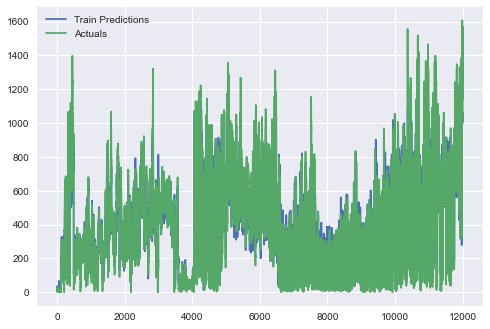

In [13]:
model = load_model('2H_Forecast/2H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(2,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 3 hours forecast

In [14]:
%%time

Trainer(3,6,12)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 252376.1719 - mean_absolute_error: 412.5905 - val_loss: 367013.7812 - val_mean_absolute_error: 492.4855
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 249684.9531 - mean_absolute_error: 409.2895 - val_loss: 363215.3125 - val_mean_absolute_error: 488.6834
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 6ms/step - loss: 246557.0156 - mean_absolute_error: 405.5807 - val_loss: 359340.2188 - val_mean_absolute_error: 484.8139
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 243385.5312 - mean_absolute_error: 401.8471 - val_loss: 355484.8438 - val_mean_absolute_error: 480.9192
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 239963.8750 - mean_absolute_error: 397.7896 - val_loss: 351310.2500 - val_mean_absolute_error: 476.7201
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 236473.5938 - mean_absolute_error: 393.7480 - val_loss: 346858.0938 - val_mean_absolute_error: 472.3072
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 232686.2656 - mean_absolute_error: 389.4381 - val_loss: 342266.7500 - val_mean_absolute_error: 467.8139
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 228799.7500 - mean_absolute_error: 385.0654 - val_loss: 337423.6562 - val_mean_absolute_error: 463.1322
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 224568.6250 - mean_absolute_error: 380.2997 - val_loss: 332100.4375 - val_mean_absolute_error: 458.0369
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 7ms/step - loss: 219875.1719 - mean_absolute_error: 375.1103 - val_loss: 326099.3750 - val_mean_absolute_error: 452.3741
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 7ms/step - loss: 215112.4219 - mean_absolute_error: 369.8787 - val_loss: 320298.0000 - val_mean_absolute_error: 446.9577
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 210312.2969 - mean_absolute_error: 364.6940 - val_loss: 314329.5625 - val_mean_absolute_error: 441.4663
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 6ms/step - loss: 205399.5312 - mean_absolute_error: 359.3678 - val_loss: 308208.1250 - val_mean_absolute_error: 435.8875
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 6ms/step - loss: 200391.8750 - mean_absolute_error: 354.0085 - val_loss: 301969.9062 - val_mean_absolute_error: 430.2254
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 195284.7656 - mean_absolute_error: 348.5663 - val_loss: 295580.7188 - val_mean_absolute_error: 424.4280
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 190105.0000 - mean_absolute_error: 343.0741 - val_loss: 289074.1875 - val_mean_absolute_error: 418.4977
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 184864.8281 - mean_absolute_error: 337.5372 - val_loss: 282476.9062 - val_mean_absolute_error: 412.4830
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 179585.1250 - mean_absolute_error: 331.8457 - val_loss: 275813.9375 - val_mean_absolute_error: 406.3818
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 174284.1250 - mean_absolute_error: 326.1530 - val_loss: 269113.0938 - val_mean_absolute_error: 400.2199
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 168964.8281 - mean_absolute_error: 320.3765 - val_loss: 262347.4375 - val_mean_absolute_error: 393.9088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 163625.2656 - mean_absolute_error: 314.4718 - val_loss: 255538.1875 - val_mean_absolute_error: 387.5318
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 6ms/step - loss: 158299.9375 - mean_absolute_error: 308.4958 - val_loss: 248726.4375 - val_mean_absolute_error: 380.9565
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 152989.0938 - mean_absolute_error: 302.4639 - val_loss: 241902.0156 - val_mean_absolute_error: 374.3628
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 7ms/step - loss: 147704.3438 - mean_absolute_error: 296.2649 - val_loss: 235064.0156 - val_mean_absolute_error: 367.7483
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 2s 6ms/step - loss: 142462.1719 - mean_absolute_error: 290.1735 - val_loss: 228283.2656 - val_mean_absolute_error: 360.8864
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 2s 6ms/step - loss: 137299.5625 - mean_absolute_error: 283.8240 - val_loss: 221528.7031 - val_mean_absolute_error: 354.1536
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 6ms/step - loss: 132212.7812 - mean_absolute_error: 277.7300 - val_loss: 214837.4375 - val_mean_absolute_error: 347.3335
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 7ms/step - loss: 127228.6016 - mean_absolute_error: 271.6448 - val_loss: 208210.8906 - val_mean_absolute_error: 340.5986
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 122337.9219 - mean_absolute_error: 265.6966 - val_loss: 201705.8906 - val_mean_absolute_error: 333.6068
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 117521.6328 - mean_absolute_error: 259.3185 - val_loss: 195256.5938 - val_mean_absolute_error: 326.7648
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 7ms/step - loss: 112800.9922 - mean_absolute_error: 253.4122 - val_loss: 188916.9531 - val_mean_absolute_error: 319.8034
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 108210.0547 - mean_absolute_error: 247.1437 - val_loss: 182597.0938 - val_mean_absolute_error: 313.2253
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 103722.7500 - mean_absolute_error: 241.5921 - val_loss: 176482.6719 - val_mean_absolute_error: 306.2256
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 6ms/step - loss: 99207.9609 - mean_absolute_error: 235.0809 - val_loss: 170023.8281 - val_mean_absolute_error: 299.1005
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 94838.8672 - mean_absolute_error: 228.8857 - val_loss: 164000.2656 - val_mean_absolute_error: 292.7252
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 90695.3047 - mean_absolute_error: 223.1997 - val_loss: 158118.1250 - val_mean_absolute_error: 285.9935
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 6ms/step - loss: 86703.0000 - mean_absolute_error: 217.3750 - val_loss: 152372.5156 - val_mean_absolute_error: 279.2768
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 82854.4688 - mean_absolute_error: 211.5446 - val_loss: 146767.4062 - val_mean_absolute_error: 272.7220
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 79117.0547 - mean_absolute_error: 205.6457 - val_loss: 141238.0781 - val_mean_absolute_error: 266.4274
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 75522.7812 - mean_absolute_error: 200.3772 - val_loss: 135879.9219 - val_mean_absolute_error: 259.6905
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 72080.0938 - mean_absolute_error: 194.5967 - val_loss: 130632.9609 - val_mean_absolute_error: 253.4365
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 68783.7188 - mean_absolute_error: 189.3198 - val_loss: 125533.0000 - val_mean_absolute_error: 247.2264
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 6ms/step - loss: 65639.5000 - mean_absolute_error: 184.3696 - val_loss: 120554.3203 - val_mean_absolute_error: 241.0036
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 62654.5391 - mean_absolute_error: 179.5688 - val_loss: 115870.9219 - val_mean_absolute_error: 235.6135
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 7ms/step - loss: 59865.5664 - mean_absolute_error: 174.8954 - val_loss: 111271.7734 - val_mean_absolute_error: 229.6272
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 57248.3984 - mean_absolute_error: 170.4830 - val_loss: 106920.2891 - val_mean_absolute_error: 224.5317
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 54759.5977 - mean_absolute_error: 166.2318 - val_loss: 102599.5391 - val_mean_absolute_error: 218.3377
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 52437.5430 - mean_absolute_error: 162.1280 - val_loss: 98535.0234 - val_mean_absolute_error: 213.0206
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 2s 6ms/step - loss: 50281.8984 - mean_absolute_error: 158.3932 - val_loss: 94723.5312 - val_mean_absolute_error: 208.4601
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 48193.3438 - mean_absolute_error: 154.2308 - val_loss: 90905.6094 - val_mean_absolute_error: 203.4159
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 46223.0859 - mean_absolute_error: 150.2321 - val_loss: 87209.8516 - val_mean_absolute_error: 197.3992
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 44434.4023 - mean_absolute_error: 146.8039 - val_loss: 83851.7734 - val_mean_absolute_error: 193.3179
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 6ms/step - loss: 42846.1680 - mean_absolute_error: 143.8793 - val_loss: 80720.7891 - val_mean_absolute_error: 188.6774
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 7ms/step - loss: 41343.4727 - mean_absolute_error: 140.8754 - val_loss: 77440.7578 - val_mean_absolute_error: 184.8638
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 39916.4180 - mean_absolute_error: 138.5697 - val_loss: 74531.7422 - val_mean_absolute_error: 181.0953
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 38639.6641 - mean_absolute_error: 135.9731 - val_loss: 71833.4453 - val_mean_absolute_error: 177.6745
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 37455.2461 - mean_absolute_error: 133.7767 - val_loss: 69425.1484 - val_mean_absolute_error: 174.5791
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 36420.7891 - mean_absolute_error: 131.8103 - val_loss: 66979.2891 - val_mean_absolute_error: 171.5981
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 6ms/step - loss: 35446.1836 - mean_absolute_error: 129.8177 - val_loss: 64689.9023 - val_mean_absolute_error: 169.3495
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 2s 6ms/step - loss: 34586.2344 - mean_absolute_error: 128.0890 - val_loss: 62773.1289 - val_mean_absolute_error: 166.3141
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 33774.0156 - mean_absolute_error: 126.6754 - val_loss: 60776.9258 - val_mean_absolute_error: 164.0295
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 33049.7812 - mean_absolute_error: 125.2478 - val_loss: 59342.2539 - val_mean_absolute_error: 161.8383
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 6ms/step - loss: 32410.0234 - mean_absolute_error: 123.7102 - val_loss: 57646.5195 - val_mean_absolute_error: 161.3128
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 2s 6ms/step - loss: 31819.9062 - mean_absolute_error: 122.7614 - val_loss: 56173.1719 - val_mean_absolute_error: 157.8661
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 31301.0078 - mean_absolute_error: 121.5231 - val_loss: 54777.1406 - val_mean_absolute_error: 156.0956
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 6ms/step - loss: 30812.0918 - mean_absolute_error: 120.6459 - val_loss: 53344.0938 - val_mean_absolute_error: 154.9635
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 30386.0664 - mean_absolute_error: 119.8079 - val_loss: 52337.5742 - val_mean_absolute_error: 153.2882
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 6ms/step - loss: 30000.6758 - mean_absolute_error: 119.0014 - val_loss: 51382.9609 - val_mean_absolute_error: 151.5840
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 6ms/step - loss: 29604.8359 - mean_absolute_error: 118.2367 - val_loss: 50036.7617 - val_mean_absolute_error: 150.5313
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 29248.1445 - mean_absolute_error: 117.4848 - val_loss: 49302.3438 - val_mean_absolute_error: 149.7041
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 6ms/step - loss: 28978.7227 - mean_absolute_error: 116.6583 - val_loss: 48751.1289 - val_mean_absolute_error: 148.1880
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 6ms/step - loss: 28712.8086 - mean_absolute_error: 116.3265 - val_loss: 47450.6641 - val_mean_absolute_error: 146.8887
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 28373.1445 - mean_absolute_error: 115.5594 - val_loss: 46613.3945 - val_mean_absolute_error: 146.2757
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 6ms/step - loss: 28124.8418 - mean_absolute_error: 115.0902 - val_loss: 46037.9609 - val_mean_absolute_error: 145.4962
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 2s 6ms/step - loss: 27932.6934 - mean_absolute_error: 114.6450 - val_loss: 45918.0117 - val_mean_absolute_error: 144.5678
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 7ms/step - loss: 27666.2734 - mean_absolute_error: 113.7447 - val_loss: 44654.3047 - val_mean_absolute_error: 143.7516
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 27354.8008 - mean_absolute_error: 112.9633 - val_loss: 44168.0703 - val_mean_absolute_error: 143.2527
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 7ms/step - loss: 27086.6211 - mean_absolute_error: 112.6201 - val_loss: 43999.0508 - val_mean_absolute_error: 142.0418
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 6ms/step - loss: 26955.0898 - mean_absolute_error: 112.4403 - val_loss: 42851.8438 - val_mean_absolute_error: 141.5639
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 26782.0469 - mean_absolute_error: 111.9548 - val_loss: 43399.7148 - val_mean_absolute_error: 141.0959
Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 26604.3320 - mean_absolute_error: 111.6822 - val_loss: 42348.2344 - val_mean_absolute_error: 141.1980
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 2s 7ms/step - loss: 26470.8438 - mean_absolute_error: 111.4074 - val_loss: 42040.7969 - val_mean_absolute_error: 139.8742
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 26362.1641 - mean_absolute_error: 111.0192 - val_loss: 41506.1367 - val_mean_absolute_error: 139.7949
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 26211.9141 - mean_absolute_error: 111.0138 - val_loss: 41165.7109 - val_mean_absolute_error: 139.1971
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 2s 6ms/step - loss: 26064.6387 - mean_absolute_error: 110.5673 - val_loss: 40884.1172 - val_mean_absolute_error: 138.2743
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 25930.7227 - mean_absolute_error: 110.2635 - val_loss: 40277.9180 - val_mean_absolute_error: 138.4657
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 6ms/step - loss: 25789.7637 - mean_absolute_error: 109.9907 - val_loss: 39966.3789 - val_mean_absolute_error: 137.3818
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 2s 6ms/step - loss: 25734.1523 - mean_absolute_error: 109.9093 - val_loss: 40288.3086 - val_mean_absolute_error: 136.8093
Epoch 89/100
376/376 [==============================] - 2s 6ms/step - loss: 25638.5957 - mean_absolute_error: 109.6772 - val_loss: 39599.5117 - val_mean_absolute_error: 136.8853
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 6ms/step - loss: 25521.3496 - mean_absolute_error: 109.3608 - val_loss: 39038.3438 - val_mean_absolute_error: 137.1397
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 25445.7773 - mean_absolute_error: 109.2565 - val_loss: 39030.1680 - val_mean_absolute_error: 135.6439
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 2s 7ms/step - loss: 25338.6543 - mean_absolute_error: 109.0949 - val_loss: 39119.3477 - val_mean_absolute_error: 136.8136
Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 25219.4102 - mean_absolute_error: 108.8980 - val_loss: 39281.2773 - val_mean_absolute_error: 135.7605
Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 25151.1387 - mean_absolute_error: 108.7928 - val_loss: 38586.9883 - val_mean_absolute_error: 136.4408
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 7ms/step - loss: 25083.1191 - mean_absolute_error: 108.4686 - val_loss: 38515.2617 - val_mean_absolute_error: 136.0102
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 24968.6660 - mean_absolute_error: 108.3055 - val_loss: 38117.4805 - val_mean_absolute_error: 134.4949
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 24841.2891 - mean_absolute_error: 108.3281 - val_loss: 37953.3867 - val_mean_absolute_error: 137.3844
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 2s 6ms/step - loss: 24843.8574 - mean_absolute_error: 108.0322 - val_loss: 37557.5234 - val_mean_absolute_error: 136.4846
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 24796.5820 - mean_absolute_error: 108.0577 - val_loss: 37753.1602 - val_mean_absolute_error: 134.3472
Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 24676.7324 - mean_absolute_error: 107.5150 - val_loss: 37280.4414 - val_mean_absolute_error: 134.4438
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 11ms/step - loss: 252209.8594 - mean_absolute_error: 412.3784 - val_loss: 365683.2812 - val_mean_absolute_error: 491.3091
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 247122.1406 - mean_absolute_error: 406.0909 - val_loss: 356948.0312 - val_mean_absolute_error: 482.3517
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 238807.5625 - mean_absolute_error: 396.4165 - val_loss: 346399.8125 - val_mean_absolute_error: 471.9247
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 230956.3438 - mean_absolute_error: 387.4575 - val_loss: 337774.4062 - val_mean_absolute_error: 463.4867
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 223677.1094 - mean_absolute_error: 379.2748 - val_loss: 328714.1562 - val_mean_absolute_error: 454.8369
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 215784.0000 - mean_absolute_error: 370.6125 - val_loss: 318896.2500 - val_mean_absolute_error: 445.6536
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 207890.4531 - mean_absolute_error: 362.0312 - val_loss: 309102.9062 - val_mean_absolute_error: 436.6099
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 199031.5938 - mean_absolute_error: 352.5167 - val_loss: 297828.7188 - val_mean_absolute_error: 426.4504
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 190375.2969 - mean_absolute_error: 343.2201 - val_loss: 286916.2812 - val_mean_absolute_error: 416.5173
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 181289.5312 - mean_absolute_error: 333.5457 - val_loss: 275434.7812 - val_mean_absolute_error: 406.0202
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 172445.2188 - mean_absolute_error: 324.0887 - val_loss: 264502.9062 - val_mean_absolute_error: 395.9726
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 163866.0000 - mean_absolute_error: 314.5334 - val_loss: 253660.7031 - val_mean_absolute_error: 385.8206
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 155415.5312 - mean_absolute_error: 305.0718 - val_loss: 242914.9688 - val_mean_absolute_error: 375.5543
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 147134.2031 - mean_absolute_error: 295.6754 - val_loss: 232258.5938 - val_mean_absolute_error: 365.2969
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 139082.1875 - mean_absolute_error: 286.3523 - val_loss: 221839.9375 - val_mean_absolute_error: 354.9941
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 131246.3594 - mean_absolute_error: 277.0479 - val_loss: 211587.4219 - val_mean_absolute_error: 344.4531
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 123656.2500 - mean_absolute_error: 267.5452 - val_loss: 201568.6250 - val_mean_absolute_error: 333.9516
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 116358.1641 - mean_absolute_error: 258.3553 - val_loss: 191832.1719 - val_mean_absolute_error: 323.8107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 109368.5312 - mean_absolute_error: 249.4013 - val_loss: 182454.0781 - val_mean_absolute_error: 313.7843
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 102703.6875 - mean_absolute_error: 240.8879 - val_loss: 173351.7812 - val_mean_absolute_error: 304.0403
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 96346.0312 - mean_absolute_error: 232.1245 - val_loss: 164538.7812 - val_mean_absolute_error: 294.5468
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 6ms/step - loss: 90306.4141 - mean_absolute_error: 223.4780 - val_loss: 155981.4688 - val_mean_absolute_error: 285.0229
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 84572.4453 - mean_absolute_error: 215.1805 - val_loss: 147765.4531 - val_mean_absolute_error: 275.5649
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 79177.2812 - mean_absolute_error: 207.0749 - val_loss: 139881.8594 - val_mean_absolute_error: 266.7365
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 74116.1484 - mean_absolute_error: 199.2617 - val_loss: 132347.4219 - val_mean_absolute_error: 257.9447
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 69355.5156 - mean_absolute_error: 191.5664 - val_loss: 125083.7969 - val_mean_absolute_error: 249.0945
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 64936.1445 - mean_absolute_error: 184.1349 - val_loss: 118178.7578 - val_mean_absolute_error: 240.3952
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 60889.3945 - mean_absolute_error: 177.2844 - val_loss: 111752.8828 - val_mean_absolute_error: 232.8988
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 57206.9922 - mean_absolute_error: 171.1903 - val_loss: 105654.7266 - val_mean_absolute_error: 225.0623
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 6ms/step - loss: 53907.1797 - mean_absolute_error: 165.3410 - val_loss: 99945.6172 - val_mean_absolute_error: 217.4015
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 50930.8789 - mean_absolute_error: 159.9601 - val_loss: 94663.9531 - val_mean_absolute_error: 210.8143
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 48202.2500 - mean_absolute_error: 154.6709 - val_loss: 89728.8125 - val_mean_absolute_error: 204.7772
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 45774.1875 - mean_absolute_error: 150.2222 - val_loss: 85067.1953 - val_mean_absolute_error: 197.8581
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 43593.0156 - mean_absolute_error: 145.6570 - val_loss: 80836.0469 - val_mean_absolute_error: 192.1255
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 41669.5547 - mean_absolute_error: 141.4674 - val_loss: 76887.2188 - val_mean_absolute_error: 187.0271
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 39919.2305 - mean_absolute_error: 138.0818 - val_loss: 73345.3906 - val_mean_absolute_error: 182.9649
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 38428.8438 - mean_absolute_error: 135.4244 - val_loss: 70231.0781 - val_mean_absolute_error: 178.8455
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 37132.9258 - mean_absolute_error: 133.1120 - val_loss: 67164.6562 - val_mean_absolute_error: 175.0033
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 35947.4062 - mean_absolute_error: 130.7083 - val_loss: 64422.5664 - val_mean_absolute_error: 172.0867
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 34955.6992 - mean_absolute_error: 128.7822 - val_loss: 61853.6484 - val_mean_absolute_error: 169.8158
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 34077.3047 - mean_absolute_error: 127.2642 - val_loss: 59951.2109 - val_mean_absolute_error: 165.9709
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 33343.3281 - mean_absolute_error: 125.6111 - val_loss: 57692.6367 - val_mean_absolute_error: 163.1478
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 32658.7402 - mean_absolute_error: 124.2581 - val_loss: 55883.0430 - val_mean_absolute_error: 161.1158
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 32080.5820 - mean_absolute_error: 123.0680 - val_loss: 54186.5977 - val_mean_absolute_error: 159.0532
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 31544.3496 - mean_absolute_error: 122.1077 - val_loss: 53399.5859 - val_mean_absolute_error: 157.4293
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 31021.0430 - mean_absolute_error: 120.2996 - val_loss: 51290.5547 - val_mean_absolute_error: 154.4041
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 30551.5215 - mean_absolute_error: 119.6322 - val_loss: 50050.0859 - val_mean_absolute_error: 152.4936
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 30133.1602 - mean_absolute_error: 118.8283 - val_loss: 48635.7500 - val_mean_absolute_error: 150.9419
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 29840.9180 - mean_absolute_error: 118.1134 - val_loss: 47681.1016 - val_mean_absolute_error: 150.1499
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 7ms/step - loss: 29494.3477 - mean_absolute_error: 117.4478 - val_loss: 47224.5820 - val_mean_absolute_error: 148.4630
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 7ms/step - loss: 29200.3125 - mean_absolute_error: 116.7439 - val_loss: 45800.6016 - val_mean_absolute_error: 146.8078
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 28924.7695 - mean_absolute_error: 116.0786 - val_loss: 44995.7734 - val_mean_absolute_error: 145.4375
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 28680.0527 - mean_absolute_error: 115.8561 - val_loss: 44380.0898 - val_mean_absolute_error: 144.6773
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 28401.0859 - mean_absolute_error: 115.0917 - val_loss: 43352.6641 - val_mean_absolute_error: 142.9038
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 28173.8555 - mean_absolute_error: 114.2988 - val_loss: 42832.6484 - val_mean_absolute_error: 142.0821
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 27943.1406 - mean_absolute_error: 113.7911 - val_loss: 42383.0469 - val_mean_absolute_error: 141.6833
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 27739.9336 - mean_absolute_error: 113.4755 - val_loss: 41305.5664 - val_mean_absolute_error: 141.3317
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 27555.8242 - mean_absolute_error: 113.0299 - val_loss: 41707.1953 - val_mean_absolute_error: 140.8725
Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 27397.4121 - mean_absolute_error: 112.5179 - val_loss: 40378.0781 - val_mean_absolute_error: 138.6715
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 27302.6270 - mean_absolute_error: 112.4213 - val_loss: 39991.6328 - val_mean_absolute_error: 138.3802
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 27156.7559 - mean_absolute_error: 112.1475 - val_loss: 39490.9141 - val_mean_absolute_error: 137.7953
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 27037.1562 - mean_absolute_error: 111.8096 - val_loss: 39047.3164 - val_mean_absolute_error: 136.6432
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 26882.3457 - mean_absolute_error: 111.5075 - val_loss: 38737.7812 - val_mean_absolute_error: 136.5283
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 26820.9160 - mean_absolute_error: 111.4914 - val_loss: 38283.0391 - val_mean_absolute_error: 136.9250
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 26706.2285 - mean_absolute_error: 111.3325 - val_loss: 38181.0469 - val_mean_absolute_error: 135.5277
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 26581.3809 - mean_absolute_error: 111.0050 - val_loss: 37813.9922 - val_mean_absolute_error: 135.3007
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 26501.3047 - mean_absolute_error: 110.8637 - val_loss: 37890.9648 - val_mean_absolute_error: 134.6010
Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 26349.5098 - mean_absolute_error: 110.5530 - val_loss: 37256.0391 - val_mean_absolute_error: 134.1013
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 26297.7988 - mean_absolute_error: 110.2262 - val_loss: 36947.0156 - val_mean_absolute_error: 133.7166
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 26178.1562 - mean_absolute_error: 110.2612 - val_loss: 37343.2734 - val_mean_absolute_error: 133.2612
Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 26084.8730 - mean_absolute_error: 109.8520 - val_loss: 37355.6875 - val_mean_absolute_error: 133.3010
Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 25999.9746 - mean_absolute_error: 109.9362 - val_loss: 36230.2461 - val_mean_absolute_error: 132.9286
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 25923.5996 - mean_absolute_error: 109.7451 - val_loss: 36168.1094 - val_mean_absolute_error: 132.0436
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 25821.7383 - mean_absolute_error: 109.3887 - val_loss: 36157.6445 - val_mean_absolute_error: 131.6517
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 25787.5684 - mean_absolute_error: 109.4594 - val_loss: 35525.6680 - val_mean_absolute_error: 132.0431
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 25715.4355 - mean_absolute_error: 109.1279 - val_loss: 35606.8164 - val_mean_absolute_error: 131.8428
Epoch 77/100
376/376 [==============================] - 3s 7ms/step - loss: 25616.0195 - mean_absolute_error: 108.8875 - val_loss: 35333.5078 - val_mean_absolute_error: 130.9443
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 25551.0469 - mean_absolute_error: 109.0387 - val_loss: 35313.8984 - val_mean_absolute_error: 130.6011
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 25496.2324 - mean_absolute_error: 108.6199 - val_loss: 35401.4258 - val_mean_absolute_error: 130.1956
Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 25388.9121 - mean_absolute_error: 108.7733 - val_loss: 35108.9492 - val_mean_absolute_error: 130.7491
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 25337.6367 - mean_absolute_error: 108.4380 - val_loss: 35449.8203 - val_mean_absolute_error: 131.4981
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 25307.5977 - mean_absolute_error: 108.4116 - val_loss: 35081.9609 - val_mean_absolute_error: 132.1161
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 25230.4023 - mean_absolute_error: 108.4227 - val_loss: 34831.0391 - val_mean_absolute_error: 130.0949
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 25151.9141 - mean_absolute_error: 108.0375 - val_loss: 34796.5664 - val_mean_absolute_error: 131.0343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 25109.1387 - mean_absolute_error: 108.1211 - val_loss: 35257.1445 - val_mean_absolute_error: 130.4738
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 25047.5000 - mean_absolute_error: 107.9183 - val_loss: 35118.6367 - val_mean_absolute_error: 129.8513
Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 24972.7930 - mean_absolute_error: 107.7518 - val_loss: 34870.6484 - val_mean_absolute_error: 130.7268
Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 24921.0000 - mean_absolute_error: 107.7326 - val_loss: 35071.1562 - val_mean_absolute_error: 129.5365
Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 24863.6270 - mean_absolute_error: 107.7110 - val_loss: 34381.7227 - val_mean_absolute_error: 129.1474
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 24835.4023 - mean_absolute_error: 107.5336 - val_loss: 34811.9180 - val_mean_absolute_error: 130.1898
Epoch 91/100
376/376 [==============================] - 3s 7ms/step - loss: 24762.5664 - mean_absolute_error: 107.3710 - val_loss: 35166.2422 - val_mean_absolute_error: 129.9894
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 24693.6660 - mean_absolute_error: 107.5153 - val_loss: 34192.8242 - val_mean_absolute_error: 128.7685
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 24671.9121 - mean_absolute_error: 107.2376 - val_loss: 33693.2305 - val_mean_absolute_error: 129.8573
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 7ms/step - loss: 24584.2305 - mean_absolute_error: 106.9026 - val_loss: 34174.5117 - val_mean_absolute_error: 129.4838
Epoch 95/100
376/376 [==============================] - 3s 7ms/step - loss: 24519.5098 - mean_absolute_error: 106.9684 - val_loss: 34074.9844 - val_mean_absolute_error: 128.0800
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 24518.1895 - mean_absolute_error: 106.9158 - val_loss: 33821.4023 - val_mean_absolute_error: 130.3084
Epoch 97/100
376/376 [==============================] - 3s 7ms/step - loss: 24380.6328 - mean_absolute_error: 106.4903 - val_loss: 34080.1406 - val_mean_absolute_error: 128.5367
Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 24390.7363 - mean_absolute_error: 106.3926 - val_loss: 33784.1250 - val_mean_absolute_error: 130.9868
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 24286.8535 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 249975.9219 - mean_absolute_error: 409.5600 - val_loss: 362937.4375 - val_mean_absolute_error: 488.5236
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 246922.9844 - mean_absolute_error: 405.9974 - val_loss: 359822.1250 - val_mean_absolute_error: 485.4127
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 244457.4688 - mean_absolute_error: 403.0984 - val_loss: 357030.3125 - val_mean_absolute_error: 482.5976
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 242361.7812 - mean_absolute_error: 400.6225 - val_loss: 354604.5000 - val_mean_absolute_error: 480.1389
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 240308.3750 - mean_absolute_error: 398.1924 - val_loss: 352091.3750 - val_mean_absolute_error: 477.5974
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 238085.2031 - mean_absolute_error: 395.5993 - val_loss: 349271.1562 - val_mean_absolute_error: 474.7833
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 235770.2188 - mean_absolute_error: 392.9355 - val_loss: 346491.0625 - val_mean_absolute_error: 472.0266
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 233420.6250 - mean_absolute_error: 390.2517 - val_loss: 343601.4688 - val_mean_absolute_error: 469.1889
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 230921.6406 - mean_absolute_error: 387.4267 - val_loss: 340415.6562 - val_mean_absolute_error: 466.0938
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 228270.8125 - mean_absolute_error: 384.4355 - val_loss: 337177.8438 - val_mean_absolute_error: 462.9561
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 225362.3906 - mean_absolute_error: 381.1788 - val_loss: 333539.7500 - val_mean_absolute_error: 459.4902
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 222497.0156 - mean_absolute_error: 377.9795 - val_loss: 330083.9375 - val_mean_absolute_error: 456.1923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 219626.7656 - mean_absolute_error: 374.8007 - val_loss: 326546.3125 - val_mean_absolute_error: 452.8548
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 216688.8906 - mean_absolute_error: 371.5632 - val_loss: 322919.4688 - val_mean_absolute_error: 449.4563
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 213688.0938 - mean_absolute_error: 368.2906 - val_loss: 319208.1250 - val_mean_absolute_error: 446.0088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 210625.8281 - mean_absolute_error: 364.9433 - val_loss: 315422.7188 - val_mean_absolute_error: 442.5250
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 207274.5312 - mean_absolute_error: 361.3080 - val_loss: 311109.7812 - val_mean_absolute_error: 438.5879
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 203862.8594 - mean_absolute_error: 357.6336 - val_loss: 306851.6875 - val_mean_absolute_error: 434.7182
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 200412.9062 - mean_absolute_error: 353.9323 - val_loss: 302656.0312 - val_mean_absolute_error: 430.9069
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 197018.3906 - mean_absolute_error: 350.2975 - val_loss: 298428.6562 - val_mean_absolute_error: 427.0733
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 193483.7656 - mean_absolute_error: 346.5019 - val_loss: 293679.0312 - val_mean_absolute_error: 422.7563
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 189665.1250 - mean_absolute_error: 342.4475 - val_loss: 289158.1250 - val_mean_absolute_error: 418.6491
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 186054.7188 - mean_absolute_error: 338.6098 - val_loss: 284639.5000 - val_mean_absolute_error: 414.5339
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 182438.1562 - mean_absolute_error: 334.7407 - val_loss: 280111.7188 - val_mean_absolute_error: 410.3836
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 178808.1094 - mean_absolute_error: 330.7920 - val_loss: 275545.4375 - val_mean_absolute_error: 406.1840
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 174926.5625 - mean_absolute_error: 326.5970 - val_loss: 270442.0312 - val_mean_absolute_error: 401.5294
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 171089.5781 - mean_absolute_error: 322.3994 - val_loss: 265759.8125 - val_mean_absolute_error: 397.2349
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 167374.4688 - mean_absolute_error: 318.2215 - val_loss: 261071.7188 - val_mean_absolute_error: 392.8893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 163662.2344 - mean_absolute_error: 314.0522 - val_loss: 256350.0938 - val_mean_absolute_error: 388.4556
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 159967.2188 - mean_absolute_error: 309.9451 - val_loss: 251626.0312 - val_mean_absolute_error: 384.0246
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 156292.1406 - mean_absolute_error: 305.9105 - val_loss: 246922.5938 - val_mean_absolute_error: 379.5883
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 152628.7031 - mean_absolute_error: 301.7532 - val_loss: 242200.3125 - val_mean_absolute_error: 375.0635
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 148960.3594 - mean_absolute_error: 297.5488 - val_loss: 237484.7812 - val_mean_absolute_error: 370.4874
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 145315.9688 - mean_absolute_error: 293.2573 - val_loss: 232767.6094 - val_mean_absolute_error: 365.8805
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 141704.9219 - mean_absolute_error: 289.0540 - val_loss: 228068.2656 - val_mean_absolute_error: 361.1734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 138111.6562 - mean_absolute_error: 284.7518 - val_loss: 223370.1719 - val_mean_absolute_error: 356.4858
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 134546.8281 - mean_absolute_error: 280.4027 - val_loss: 218705.2344 - val_mean_absolute_error: 351.7297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 131012.2031 - mean_absolute_error: 276.0869 - val_loss: 214029.8438 - val_mean_absolute_error: 346.9594
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 127513.5000 - mean_absolute_error: 271.7263 - val_loss: 209386.3750 - val_mean_absolute_error: 342.1022
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 124064.3281 - mean_absolute_error: 267.4242 - val_loss: 204789.2812 - val_mean_absolute_error: 337.3900
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 120654.6016 - mean_absolute_error: 263.2051 - val_loss: 200218.8750 - val_mean_absolute_error: 332.5088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 117290.3203 - mean_absolute_error: 258.9627 - val_loss: 195720.2656 - val_mean_absolute_error: 327.6071
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 113956.9766 - mean_absolute_error: 254.2637 - val_loss: 191193.4375 - val_mean_absolute_error: 322.8880
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 9ms/step - loss: 110687.6719 - mean_absolute_error: 250.3185 - val_loss: 186753.3906 - val_mean_absolute_error: 318.0121
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 107467.0078 - mean_absolute_error: 246.0289 - val_loss: 182366.2500 - val_mean_absolute_error: 313.2057
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 104293.4453 - mean_absolute_error: 241.7332 - val_loss: 178028.6562 - val_mean_absolute_error: 308.5592
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 101187.3281 - mean_absolute_error: 237.7240 - val_loss: 173707.8594 - val_mean_absolute_error: 303.5226
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 98127.3672 - mean_absolute_error: 233.2867 - val_loss: 169386.0469 - val_mean_absolute_error: 298.6921
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 95093.0078 - mean_absolute_error: 228.8607 - val_loss: 165157.5312 - val_mean_absolute_error: 294.0269
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 92139.6328 - mean_absolute_error: 224.8835 - val_loss: 160963.7344 - val_mean_absolute_error: 288.9824
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 89259.2656 - mean_absolute_error: 220.5920 - val_loss: 156850.9531 - val_mean_absolute_error: 284.3217
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 86420.0000 - mean_absolute_error: 216.4100 - val_loss: 152734.1719 - val_mean_absolute_error: 279.6616
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 83648.2344 - mean_absolute_error: 212.3167 - val_loss: 148744.4531 - val_mean_absolute_error: 274.9388
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 80954.3203 - mean_absolute_error: 208.2444 - val_loss: 145015.7969 - val_mean_absolute_error: 270.4514
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 78326.7344 - mean_absolute_error: 204.2977 - val_loss: 141033.9844 - val_mean_absolute_error: 265.9366
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 75752.7578 - mean_absolute_error: 200.1815 - val_loss: 137110.5625 - val_mean_absolute_error: 261.4129
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 73226.6406 - mean_absolute_error: 196.1748 - val_loss: 133230.9688 - val_mean_absolute_error: 256.2783
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 70749.3594 - mean_absolute_error: 192.1210 - val_loss: 129455.5078 - val_mean_absolute_error: 251.0625
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 68329.4844 - mean_absolute_error: 187.8804 - val_loss: 125773.5781 - val_mean_absolute_error: 246.6398
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 66011.5625 - mean_absolute_error: 184.1052 - val_loss: 122241.6719 - val_mean_absolute_error: 242.7531
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 9ms/step - loss: 63796.7656 - mean_absolute_error: 180.6004 - val_loss: 118602.2344 - val_mean_absolute_error: 237.4762
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 61643.5586 - mean_absolute_error: 176.9626 - val_loss: 115534.5391 - val_mean_absolute_error: 233.4456
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 59553.1094 - mean_absolute_error: 173.4613 - val_loss: 112009.1094 - val_mean_absolute_error: 229.3935
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 57540.9844 - mean_absolute_error: 170.0504 - val_loss: 108755.9688 - val_mean_absolute_error: 224.8146
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 10ms/step - loss: 55628.6484 - mean_absolute_error: 166.5802 - val_loss: 105715.0469 - val_mean_absolute_error: 221.5349
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 53763.3672 - mean_absolute_error: 163.2437 - val_loss: 102727.8750 - val_mean_absolute_error: 217.0956
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 51886.9375 - mean_absolute_error: 159.8172 - val_loss: 100700.2109 - val_mean_absolute_error: 215.1308
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 50148.8711 - mean_absolute_error: 156.7761 - val_loss: 96918.9531 - val_mean_absolute_error: 209.5175
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 48536.6875 - mean_absolute_error: 153.9262 - val_loss: 94366.5000 - val_mean_absolute_error: 205.5092
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 46997.0703 - mean_absolute_error: 151.2592 - val_loss: 91729.4375 - val_mean_absolute_error: 202.1084
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 45512.0547 - mean_absolute_error: 148.6407 - val_loss: 89096.4688 - val_mean_absolute_error: 198.6977
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 44177.2227 - mean_absolute_error: 146.2789 - val_loss: 86521.6641 - val_mean_absolute_error: 195.7598
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 42886.8906 - mean_absolute_error: 143.7963 - val_loss: 83866.7344 - val_mean_absolute_error: 191.9965
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 41608.6055 - mean_absolute_error: 141.2179 - val_loss: 82014.5078 - val_mean_absolute_error: 190.4156
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 40423.9531 - mean_absolute_error: 138.6882 - val_loss: 79536.0312 - val_mean_absolute_error: 186.8108
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 39377.5977 - mean_absolute_error: 136.8040 - val_loss: 77262.7109 - val_mean_absolute_error: 183.3482
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 38340.5078 - mean_absolute_error: 134.5325 - val_loss: 75327.5703 - val_mean_absolute_error: 181.1966
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 37463.8203 - mean_absolute_error: 133.1923 - val_loss: 73542.1172 - val_mean_absolute_error: 178.9073
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 36481.5625 - mean_absolute_error: 130.9629 - val_loss: 71884.2656 - val_mean_absolute_error: 177.1908
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 35601.6250 - mean_absolute_error: 129.3247 - val_loss: 69735.2500 - val_mean_absolute_error: 174.4264
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 34770.5781 - mean_absolute_error: 127.7135 - val_loss: 68097.9297 - val_mean_absolute_error: 172.3308
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 34011.0664 - mean_absolute_error: 125.9501 - val_loss: 66735.9688 - val_mean_absolute_error: 170.4059
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 33286.3203 - mean_absolute_error: 124.4753 - val_loss: 65043.2188 - val_mean_absolute_error: 168.7015
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 32598.2793 - mean_absolute_error: 122.9148 - val_loss: 63638.1836 - val_mean_absolute_error: 167.0510
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 32059.1523 - mean_absolute_error: 121.6442 - val_loss: 62235.3359 - val_mean_absolute_error: 165.1174
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 31447.0430 - mean_absolute_error: 120.7410 - val_loss: 61221.9648 - val_mean_absolute_error: 163.9915
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 30852.1406 - mean_absolute_error: 119.3560 - val_loss: 60276.8203 - val_mean_absolute_error: 162.9357
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 30355.3945 - mean_absolute_error: 118.1581 - val_loss: 59106.5859 - val_mean_absolute_error: 160.6383
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 29856.6191 - mean_absolute_error: 117.2033 - val_loss: 58185.4219 - val_mean_absolute_error: 159.8380
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 29410.0332 - mean_absolute_error: 116.2584 - val_loss: 56873.0781 - val_mean_absolute_error: 158.2169
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 7ms/step - loss: 29022.5293 - mean_absolute_error: 115.1611 - val_loss: 55770.1133 - val_mean_absolute_error: 156.4990
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 7ms/step - loss: 28655.3223 - mean_absolute_error: 114.5354 - val_loss: 54832.3008 - val_mean_absolute_error: 155.0986
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 28233.0234 - mean_absolute_error: 113.3683 - val_loss: 54234.9023 - val_mean_absolute_error: 155.3400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 27878.4492 - mean_absolute_error: 112.3915 - val_loss: 54087.3008 - val_mean_absolute_error: 153.7830
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 27611.7793 - mean_absolute_error: 112.2296 - val_loss: 52850.7969 - val_mean_absolute_error: 152.3088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 27267.0781 - mean_absolute_error: 111.0137 - val_loss: 51879.4219 - val_mean_absolute_error: 151.8237
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 26956.5840 - mean_absolute_error: 110.4189 - val_loss: 51401.5938 - val_mean_absolute_error: 150.5706
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 26695.8008 - mean_absolute_error: 109.8542 - val_loss: 50379.6953 - val_mean_absolute_error: 149.1300
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 26462.2324 - mean_absolute_error: 109.2154 - val_loss: 49364.5547 - val_mean_absolute_error: 147.9480
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 11ms/step - loss: 250724.3750 - mean_absolute_error: 410.4772 - val_loss: 361864.6250 - val_mean_absolute_error: 487.2565
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 242750.7031 - mean_absolute_error: 400.7661 - val_loss: 350597.8750 - val_mean_absolute_error: 475.7870
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 8ms/step - loss: 233436.9219 - mean_absolute_error: 390.2255 - val_loss: 340137.2500 - val_mean_absolute_error: 465.6712
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 225187.2344 - mean_absolute_error: 380.9672 - val_loss: 330446.4062 - val_mean_absolute_error: 456.4593
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 217352.8750 - mean_absolute_error: 372.2867 - val_loss: 320790.2188 - val_mean_absolute_error: 447.3890
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 209312.2188 - mean_absolute_error: 363.4940 - val_loss: 310787.7812 - val_mean_absolute_error: 438.2112
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 201022.7969 - mean_absolute_error: 354.5693 - val_loss: 300444.5625 - val_mean_absolute_error: 428.8129
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 192389.1562 - mean_absolute_error: 345.1687 - val_loss: 289319.8125 - val_mean_absolute_error: 418.6788
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 183408.4688 - mean_absolute_error: 335.5735 - val_loss: 278269.8438 - val_mean_absolute_error: 408.5975
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 174606.4531 - mean_absolute_error: 325.9734 - val_loss: 267230.3750 - val_mean_absolute_error: 398.4858
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 165868.5156 - mean_absolute_error: 316.3507 - val_loss: 256209.2188 - val_mean_absolute_error: 388.2664
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 10ms/step - loss: 157227.3125 - mean_absolute_error: 306.6656 - val_loss: 245255.4219 - val_mean_absolute_error: 378.0035
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 148737.4844 - mean_absolute_error: 296.9482 - val_loss: 234398.4219 - val_mean_absolute_error: 367.4677
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 140344.0156 - mean_absolute_error: 287.0487 - val_loss: 223272.5938 - val_mean_absolute_error: 356.2040
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 131923.3906 - mean_absolute_error: 276.7031 - val_loss: 212555.5000 - val_mean_absolute_error: 345.6244
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 124030.7656 - mean_absolute_error: 267.2399 - val_loss: 202212.9688 - val_mean_absolute_error: 335.0538
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 116180.3672 - mean_absolute_error: 257.4808 - val_loss: 191492.4844 - val_mean_absolute_error: 323.6540
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 108713.0781 - mean_absolute_error: 247.8344 - val_loss: 181648.6719 - val_mean_absolute_error: 312.9200
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 101760.9062 - mean_absolute_error: 238.6202 - val_loss: 172158.5781 - val_mean_absolute_error: 302.6847
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 95135.3750 - mean_absolute_error: 229.6841 - val_loss: 162941.8750 - val_mean_absolute_error: 292.3297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 88850.5625 - mean_absolute_error: 220.7833 - val_loss: 154087.9531 - val_mean_absolute_error: 282.4946
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 82847.8359 - mean_absolute_error: 212.0689 - val_loss: 145238.3438 - val_mean_absolute_error: 272.0888
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 77115.5859 - mean_absolute_error: 203.1872 - val_loss: 136901.4844 - val_mean_absolute_error: 262.0153
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 71706.9844 - mean_absolute_error: 194.7502 - val_loss: 128279.6250 - val_mean_absolute_error: 251.7836
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 66253.5078 - mean_absolute_error: 185.6580 - val_loss: 120291.4844 - val_mean_absolute_error: 242.2647
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 61702.1875 - mean_absolute_error: 178.6615 - val_loss: 113138.5781 - val_mean_absolute_error: 233.0644
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 57627.3711 - mean_absolute_error: 171.3988 - val_loss: 106464.0078 - val_mean_absolute_error: 224.8547
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 53935.0195 - mean_absolute_error: 165.0417 - val_loss: 100406.3672 - val_mean_absolute_error: 217.2063
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 50594.1094 - mean_absolute_error: 158.7882 - val_loss: 94558.8516 - val_mean_absolute_error: 209.5330
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 47616.7930 - mean_absolute_error: 153.4464 - val_loss: 89865.7188 - val_mean_absolute_error: 202.8104
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 44955.7188 - mean_absolute_error: 148.1866 - val_loss: 84275.6094 - val_mean_absolute_error: 196.0471
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 42608.2812 - mean_absolute_error: 143.5375 - val_loss: 79761.0156 - val_mean_absolute_error: 190.2496
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 40476.0312 - mean_absolute_error: 139.8180 - val_loss: 75790.4922 - val_mean_absolute_error: 185.1917
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 38637.9023 - mean_absolute_error: 136.4244 - val_loss: 71791.1875 - val_mean_absolute_error: 180.4774
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 36940.5664 - mean_absolute_error: 132.9950 - val_loss: 68360.6875 - val_mean_absolute_error: 175.9022
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 35375.4688 - mean_absolute_error: 129.6131 - val_loss: 65096.5938 - val_mean_absolute_error: 171.1899
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 34059.0352 - mean_absolute_error: 127.1960 - val_loss: 61849.7539 - val_mean_absolute_error: 167.0758
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 32800.9102 - mean_absolute_error: 124.6146 - val_loss: 59343.4648 - val_mean_absolute_error: 164.2074
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 31845.3672 - mean_absolute_error: 122.8438 - val_loss: 57827.7695 - val_mean_absolute_error: 161.9472
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 30938.2441 - mean_absolute_error: 120.6701 - val_loss: 55818.3516 - val_mean_absolute_error: 158.4056
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 30102.5703 - mean_absolute_error: 118.4600 - val_loss: 52826.3711 - val_mean_absolute_error: 155.2048
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 29315.3418 - mean_absolute_error: 116.6087 - val_loss: 51204.8594 - val_mean_absolute_error: 152.6642
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 28664.3965 - mean_absolute_error: 115.5383 - val_loss: 50158.0312 - val_mean_absolute_error: 151.3476
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 28138.0176 - mean_absolute_error: 114.7806 - val_loss: 49115.9922 - val_mean_absolute_error: 149.6583
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 27708.6719 - mean_absolute_error: 113.7316 - val_loss: 47222.9336 - val_mean_absolute_error: 147.9200
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 27313.7656 - mean_absolute_error: 112.8430 - val_loss: 46985.1016 - val_mean_absolute_error: 146.8290
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 26858.6465 - mean_absolute_error: 111.6039 - val_loss: 45534.7812 - val_mean_absolute_error: 145.4806
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 26494.8359 - mean_absolute_error: 110.6395 - val_loss: 44247.8711 - val_mean_absolute_error: 143.0083
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 26259.7246 - mean_absolute_error: 110.1334 - val_loss: 44321.9727 - val_mean_absolute_error: 143.0097
Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 25952.3887 - mean_absolute_error: 109.5117 - val_loss: 43829.8398 - val_mean_absolute_error: 142.0269
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 25602.1504 - mean_absolute_error: 108.6713 - val_loss: 42309.5039 - val_mean_absolute_error: 141.4132
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 25459.2344 - mean_absolute_error: 108.1684 - val_loss: 42153.1133 - val_mean_absolute_error: 140.5553
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 25131.8281 - mean_absolute_error: 107.0773 - val_loss: 41716.6641 - val_mean_absolute_error: 140.2457
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 24922.1172 - mean_absolute_error: 106.7534 - val_loss: 41255.6328 - val_mean_absolute_error: 138.5872
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 24736.1094 - mean_absolute_error: 106.3764 - val_loss: 41427.2734 - val_mean_absolute_error: 138.7802
Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 24433.2461 - mean_absolute_error: 105.5460 - val_loss: 40570.2188 - val_mean_absolute_error: 137.6590
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 24364.4648 - mean_absolute_error: 105.5289 - val_loss: 40587.8438 - val_mean_absolute_error: 136.7035
Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 24177.5117 - mean_absolute_error: 105.1717 - val_loss: 40454.6484 - val_mean_absolute_error: 137.5733
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 24034.1055 - mean_absolute_error: 104.7900 - val_loss: 38974.2227 - val_mean_absolute_error: 135.8997
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 23876.8008 - mean_absolute_error: 104.4305 - val_loss: 40244.5234 - val_mean_absolute_error: 136.1861: 0s - loss: 23699.2715 - mean_absolut
Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 23791.8379 - mean_absolute_error: 103.9901 - val_loss: 38342.9883 - val_mean_absolute_error: 134.6087
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 23652.9707 - mean_absolute_error: 103.7565 - val_loss: 39869.5234 - val_mean_absolute_error: 136.8360
Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 23699.1309 - mean_absolute_error: 103.6581 - val_loss: 38821.6250 - val_mean_absolute_error: 134.7693
Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 23365.8066 - mean_absolute_error: 102.9981 - val_loss: 37310.5078 - val_mean_absolute_error: 132.9384
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 23282.7539 - mean_absolute_error: 102.6845 - val_loss: 38654.6133 - val_mean_absolute_error: 133.8221
Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 23192.6543 - mean_absolute_error: 102.3514 - val_loss: 37327.0742 - val_mean_absolute_error: 134.6161
Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 23210.6309 - mean_absolute_error: 102.5037 - val_loss: 37218.5547 - val_mean_absolute_error: 131.9075
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 22987.4004 - mean_absolute_error: 101.5940 - val_loss: 37726.1406 - val_mean_absolute_error: 133.3074
Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 22880.6387 - mean_absolute_error: 101.4014 - val_loss: 36960.4805 - val_mean_absolute_error: 132.1425
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 22839.2871 - mean_absolute_error: 101.1987 - val_loss: 36805.9023 - val_mean_absolute_error: 132.5194
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 22722.9180 - mean_absolute_error: 100.8343 - val_loss: 36966.1641 - val_mean_absolute_error: 131.1455
Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 22684.6660 - mean_absolute_error: 100.6713 - val_loss: 36633.4023 - val_mean_absolute_error: 132.4185
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 22539.0195 - mean_absolute_error: 100.3347 - val_loss: 37038.8086 - val_mean_absolute_error: 131.4171
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 22606.3242 - mean_absolute_error: 100.6407 - val_loss: 36686.6484 - val_mean_absolute_error: 130.7693
Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 22516.2148 - mean_absolute_error: 100.1749 - val_loss: 37473.5703 - val_mean_absolute_error: 132.1330
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 22504.9688 - mean_absolute_error: 100.2419 - val_loss: 37791.9492 - val_mean_absolute_error: 131.7547
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 22469.0430 - mean_absolute_error: 100.0617 - val_loss: 37577.3516 - val_mean_absolute_error: 131.7057
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 22322.5312 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 22222.1406 - mean_absolute_error: 99.4143 - val_loss: 36629.9922 - val_mean_absolute_error: 131.9702
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 22197.3320 - mean_absolute_error: 99.4686 - val_loss: 36998.9453 - val_mean_absolute_error: 130.9487
Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 22060.8730 - mean_absolute_error: 98.8482 - val_loss: 36909.7539 - val_mean_absolute_error: 130.9159
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 22053.6074 - mean_absolute_error: 98.8847 - val_loss: 37039.4414 - val_mean_absolute_error: 131.1413
Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 22075.6699 - mean_absolute_error: 99.1575 - val_loss: 37202.9883 - val_mean_absolute_error: 130.5521
Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 21902.0098 - mean_absolute_error: 98.73

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 21514.9180 - mean_absolute_error: 97.6450 - val_loss: 38712.9180 - val_mean_absolute_error: 131.6020
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 21510.5273 - mean_absolute_error: 97.5625 - val_loss: 38715.8828 - val_mean_absolute_error: 137.1202
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 21542.7773 - mean_absolute_error: 97.7646 - val_loss: 36013.4453 - val_mean_absolute_error: 129.0532
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 21482.4316 - mean_absolute_error: 97.3888 - val_loss: 37819.1641 - val_mean_absolute_error: 132.8368
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 21473.5000 - mean_absolute_error: 97.4139 - val_loss: 36810.1250 - val_mean_absolute_error: 129.9438
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 21389.6328 - mean_absolute_error: 97.4088 - val_loss: 37322.8555 - val_mean_absolute_error: 130.8680
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 21401.5605 - mean_absolute_error: 97.5077 - val_loss: 37329.9375 - val_mean_absolute_error: 130.0724
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 21310.3457 - mean_absolute_error: 96.8724 - val_loss: 37727.6953 - val_mean_absolute_error: 131.5101
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 21358.0566 - mean_absolute_error: 96.97

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 11ms/step - loss: 248340.5312 - mean_absolute_error: 407.5279 - val_loss: 358842.1562 - val_mean_absolute_error: 484.1893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 242041.0469 - mean_absolute_error: 400.1476 - val_loss: 352377.2188 - val_mean_absolute_error: 477.6438
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 236362.0781 - mean_absolute_error: 393.6161 - val_loss: 345342.6250 - val_mean_absolute_error: 470.6749
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 230577.7500 - mean_absolute_error: 386.9984 - val_loss: 338391.1250 - val_mean_absolute_error: 463.9304
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 224888.8594 - mean_absolute_error: 380.6060 - val_loss: 331103.7500 - val_mean_absolute_error: 456.9643
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 218614.0156 - mean_absolute_error: 373.6656 - val_loss: 323595.6250 - val_mean_absolute_error: 449.9926
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 212448.4688 - mean_absolute_error: 366.9134 - val_loss: 315896.4062 - val_mean_absolute_error: 442.8320
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 205992.0938 - mean_absolute_error: 359.8972 - val_loss: 307956.6562 - val_mean_absolute_error: 435.5741
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 199642.2188 - mean_absolute_error: 353.0496 - val_loss: 299909.2500 - val_mean_absolute_error: 428.2511
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 192967.4531 - mean_absolute_error: 345.8702 - val_loss: 291753.1875 - val_mean_absolute_error: 420.8336
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 186399.5938 - mean_absolute_error: 338.8252 - val_loss: 283593.1562 - val_mean_absolute_error: 413.3918
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 179824.1719 - mean_absolute_error: 331.6817 - val_loss: 275371.2500 - val_mean_absolute_error: 405.8650
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 173050.4219 - mean_absolute_error: 324.2014 - val_loss: 266737.2500 - val_mean_absolute_error: 397.9467
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 166313.9375 - mean_absolute_error: 316.5845 - val_loss: 258292.6875 - val_mean_absolute_error: 390.0817
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 159447.8906 - mean_absolute_error: 308.8228 - val_loss: 248814.5938 - val_mean_absolute_error: 381.2216
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 152092.1719 - mean_absolute_error: 300.5100 - val_loss: 240056.8125 - val_mean_absolute_error: 372.8500
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 145352.1406 - mean_absolute_error: 292.5904 - val_loss: 231417.4219 - val_mean_absolute_error: 364.4576
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 138774.8125 - mean_absolute_error: 284.8509 - val_loss: 222974.9219 - val_mean_absolute_error: 356.1597
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 132191.3281 - mean_absolute_error: 276.8985 - val_loss: 214303.6406 - val_mean_absolute_error: 347.3800
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 125883.0938 - mean_absolute_error: 268.9560 - val_loss: 206067.0781 - val_mean_absolute_error: 339.1133
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 119809.0312 - mean_absolute_error: 261.5949 - val_loss: 198046.4219 - val_mean_absolute_error: 330.7630
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 113949.4766 - mean_absolute_error: 254.1340 - val_loss: 190227.6719 - val_mean_absolute_error: 322.5952
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 8ms/step - loss: 108287.4688 - mean_absolute_error: 246.7138 - val_loss: 182557.9844 - val_mean_absolute_error: 314.6522
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 102842.9062 - mean_absolute_error: 239.8218 - val_loss: 175133.4844 - val_mean_absolute_error: 306.7007
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 97565.4375 - mean_absolute_error: 232.5251 - val_loss: 167825.0469 - val_mean_absolute_error: 298.4946
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 92482.7734 - mean_absolute_error: 225.2155 - val_loss: 160695.5000 - val_mean_absolute_error: 290.8966
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 87600.5938 - mean_absolute_error: 218.3419 - val_loss: 153793.7812 - val_mean_absolute_error: 283.2767
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 82896.3359 - mean_absolute_error: 211.3086 - val_loss: 146989.3125 - val_mean_absolute_error: 274.8979
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 9ms/step - loss: 78386.4844 - mean_absolute_error: 204.1621 - val_loss: 140551.8438 - val_mean_absolute_error: 267.9985
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 74111.8984 - mean_absolute_error: 197.4842 - val_loss: 134053.6406 - val_mean_absolute_error: 260.2689
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 70049.4766 - mean_absolute_error: 191.3083 - val_loss: 127964.3516 - val_mean_absolute_error: 253.3779
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 66251.6406 - mean_absolute_error: 185.1383 - val_loss: 122120.0391 - val_mean_absolute_error: 246.1396
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 12ms/step - loss: 62682.5156 - mean_absolute_error: 179.4127 - val_loss: 116425.1016 - val_mean_absolute_error: 238.5169
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 59306.1875 - mean_absolute_error: 173.3820 - val_loss: 111095.8516 - val_mean_absolute_error: 232.7891
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 56195.4531 - mean_absolute_error: 168.2975 - val_loss: 105814.9453 - val_mean_absolute_error: 225.3522
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 9ms/step - loss: 53293.9609 - mean_absolute_error: 163.0797 - val_loss: 100986.7578 - val_mean_absolute_error: 218.8654
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 50601.3516 - mean_absolute_error: 158.1790 - val_loss: 96065.0000 - val_mean_absolute_error: 212.6086
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 9ms/step - loss: 48117.0352 - mean_absolute_error: 153.7689 - val_loss: 91867.7812 - val_mean_absolute_error: 207.1756
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 45850.1484 - mean_absolute_error: 149.5451 - val_loss: 87449.3281 - val_mean_absolute_error: 200.4944
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 43802.1953 - mean_absolute_error: 145.5821 - val_loss: 83547.8047 - val_mean_absolute_error: 195.7679
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 41947.9805 - mean_absolute_error: 141.7638 - val_loss: 79932.4219 - val_mean_absolute_error: 190.9905
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 40245.7773 - mean_absolute_error: 138.4416 - val_loss: 76569.5781 - val_mean_absolute_error: 186.1866
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 38664.7969 - mean_absolute_error: 135.5209 - val_loss: 73413.2578 - val_mean_absolute_error: 182.4495
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 37298.7383 - mean_absolute_error: 132.9630 - val_loss: 71014.0312 - val_mean_absolute_error: 179.2923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 9ms/step - loss: 35937.4648 - mean_absolute_error: 130.1851 - val_loss: 67763.7031 - val_mean_absolute_error: 174.8420
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 34653.5117 - mean_absolute_error: 127.6587 - val_loss: 64844.2734 - val_mean_absolute_error: 171.0630
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 33465.7461 - mean_absolute_error: 124.8952 - val_loss: 62184.8242 - val_mean_absolute_error: 167.2774
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 32454.8789 - mean_absolute_error: 122.6812 - val_loss: 60167.9805 - val_mean_absolute_error: 164.2372
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 31522.3320 - mean_absolute_error: 120.9544 - val_loss: 58102.7930 - val_mean_absolute_error: 161.5122
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 30735.7051 - mean_absolute_error: 119.2997 - val_loss: 56015.4180 - val_mean_absolute_error: 158.8381
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 30001.7773 - mean_absolute_error: 117.8514 - val_loss: 54237.2734 - val_mean_absolute_error: 156.2019
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 9ms/step - loss: 29283.5293 - mean_absolute_error: 116.2395 - val_loss: 53699.9102 - val_mean_absolute_error: 155.3229
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 11ms/step - loss: 28750.0332 - mean_absolute_error: 115.4722 - val_loss: 51373.2422 - val_mean_absolute_error: 152.1687
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 28217.3145 - mean_absolute_error: 114.2174 - val_loss: 50807.9648 - val_mean_absolute_error: 150.9248
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 27697.5566 - mean_absolute_error: 113.3277 - val_loss: 49245.9414 - val_mean_absolute_error: 149.0614
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 27275.7012 - mean_absolute_error: 112.6461 - val_loss: 48675.5547 - val_mean_absolute_error: 148.3281
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 26795.4551 - mean_absolute_error: 111.3393 - val_loss: 48316.1484 - val_mean_absolute_error: 147.5901
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 26493.6914 - mean_absolute_error: 110.5572 - val_loss: 46787.0430 - val_mean_absolute_error: 145.3160
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 26147.5762 - mean_absolute_error: 110.0580 - val_loss: 45868.4180 - val_mean_absolute_error: 144.5204
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 25825.8574 - mean_absolute_error: 109.1178 - val_loss: 45770.0938 - val_mean_absolute_error: 143.4351
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 25476.1172 - mean_absolute_error: 107.7941 - val_loss: 44573.0703 - val_mean_absolute_error: 141.9520
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 25229.1328 - mean_absolute_error: 107.4186 - val_loss: 43987.8867 - val_mean_absolute_error: 141.1367
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 9ms/step - loss: 24990.4570 - mean_absolute_error: 106.8557 - val_loss: 43547.1406 - val_mean_absolute_error: 140.4135
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 24714.8926 - mean_absolute_error: 106.1058 - val_loss: 44119.9727 - val_mean_absolute_error: 140.3559
Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 24495.0508 - mean_absolute_error: 105.4989 - val_loss: 42274.6211 - val_mean_absolute_error: 139.3354
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 24346.2266 - mean_absolute_error: 105.4686 - val_loss: 41829.0664 - val_mean_absolute_error: 137.9934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 24140.9980 - mean_absolute_error: 104.5782 - val_loss: 42202.0859 - val_mean_absolute_error: 138.5285
Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 23872.3711 - mean_absolute_error: 104.0388 - val_loss: 41625.8398 - val_mean_absolute_error: 136.8552
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 23832.2949 - mean_absolute_error: 104.2087 - val_loss: 42024.0156 - val_mean_absolute_error: 137.6816
Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 23701.6992 - mean_absolute_error: 103.6523 - val_loss: 41206.1758 - val_mean_absolute_error: 136.5814
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 23567.5625 - mean_absolute_error: 103.0007 - val_loss: 41513.9453 - val_mean_absolute_error: 136.2256
Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 23434.3984 - mean_absolute_error: 102.9543 - val_loss: 40736.5938 - val_mean_absolute_error: 135.8531
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 23309.4043 - mean_absolute_error: 102.5471 - val_loss: 39663.7227 - val_mean_absolute_error: 133.7664
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 23180.1699 - mean_absolute_error: 102.3129 - val_loss: 40248.0039 - val_mean_absolute_error: 134.2900
Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 23128.2832 - mean_absolute_error: 102.1352 - val_loss: 40970.0625 - val_mean_absolute_error: 135.8345
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 23104.8125 - mean_absolute_error: 101.8486 - val_loss: 40106.9961 - val_mean_absolute_error: 134.1095
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 22861.3477 - mean_absolute_error: 101.2930 - val_loss: 38893.4961 - val_mean_absolute_error: 133.9895
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 22909.0742 - mean_absolute_error: 101.6176 - val_loss: 38668.9180 - val_mean_absolute_error: 132.7781
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 22830.5391 - mean_absolute_error: 101.3375 - val_loss: 38986.1758 - val_mean_absolute_error: 132.8438
Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 22721.0527 - mean_absolute_error: 101.1298 - val_loss: 40143.6211 - val_mean_absolute_error: 133.3870
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 22599.0020 - mean_absolute_error: 100.9294 - val_loss: 37580.8477 - val_mean_absolute_error: 132.3932
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 22779.6055 - mean_absolute_error: 101.1226 - val_loss: 39139.1133 - val_mean_absolute_error: 133.0775
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 22578.7246 - mean_absolute_error: 100.5524 - val_loss: 39323.1094 - val_mean_absolute_error: 133.4578
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 22452.5020 - mean_absolute_error: 100.3186 - val_loss: 37996.6211 - val_mean_absolute_error: 131.5096
Epoch 86/100
376/376 [==============================] - 3s 9ms/step - loss: 22371.8086 - mean_absolute_error: 100.0583 - val_loss: 38748.9766 - val_mean_absolute_error: 131.5192
Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 22333.1914 - mean_absolute_error: 99.9044 - val_loss: 37414.8750 - val_mean_absolute_error: 130.2243
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 9ms/step - loss: 22307.8281 - mean_absolute_error: 99.7264 - val_loss: 37917.7695 - val_mean_absolute_error: 131.1228
Epoch 89/100
376/376 [==============================] - 4s 9ms/step - loss: 22188.3730 - mean_absolute_error: 99.5234 - val_loss: 37427.4961 - val_mean_absolute_error: 130.4452
Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 22170.2051 - mean_absolute_error: 99.4433 - val_loss: 37489.3281 - val_mean_absolute_error: 130.3941
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 22062.0137 - mean_absolute_error: 99.2451 - val_loss: 36715.3516 - val_mean_absolute_error: 129.7375
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 22122.8594 - mean_absolute_error: 99.5220 - val_loss: 37123.8320 - val_mean_absolute_error: 130.3385
Epoch 93/100
376/376 [==============================] - 4s 9ms/step - loss: 22086.7051 - mean_absolute_error: 99.4836 - val_loss: 36143.6562 - val_mean_absolute_error: 128.4196
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 21896.9629 - mean_absolute_error: 99.0311 - val_loss: 37394.0195 - val_mean_absolute_error: 129.8898
Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 21848.4121 - mean_absolute_error: 98.3749 - val_loss: 36350.4922 - val_mean_absolute_error: 129.0667
Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 21856.5430 - mean_absolute_error: 98.6189 - val_loss: 37091.6328 - val_mean_absolute_error: 129.5450
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 21789.2910 - mean_absolute_error: 98.3061 - val_loss: 35479.5625 - val_mean_absolute_error: 127.9134
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 21754.8496 - mean_absolute_error: 98.3846 - val_loss: 36463.9570 - val_mean_absolute_error: 129.2612
Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 21734.8398 - mean_absolute_error: 98.1260 - val_loss: 36243.8047 - val_mean_absolute_error: 128.4096
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 21694.5176 - mean_absolute_error: 98.0774 - val_loss: 36318.3867 - val_mean_absolute_error: 128.6798

-----------------------------------------------------------------------------------------------------------

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 520       
____

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 9ms/step - loss: 239760.5938 - mean_absolute_error: 397.1784 - val_loss: 345308.9688 - val_mean_absolute_error: 470.5448
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 11ms/step - loss: 228404.5781 - mean_absolute_error: 384.4819 - val_loss: 333006.0312 - val_mean_absolute_error: 458.8073
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 218983.4375 - mean_absolute_error: 374.0424 - val_loss: 321938.7500 - val_mean_absolute_error: 448.3209
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 209736.7031 - mean_absolute_error: 363.9078 - val_loss: 310774.0312 - val_mean_absolute_error: 438.0063
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 200360.5625 - mean_absolute_error: 353.7022 - val_loss: 298785.2500 - val_mean_absolute_error: 427.0320
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 190519.7344 - mean_absolute_error: 343.1465 - val_loss: 286958.8438 - val_mean_absolute_error: 416.2397
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 180983.0938 - mean_absolute_error: 332.8713 - val_loss: 275170.3750 - val_mean_absolute_error: 405.4110
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 171489.1094 - mean_absolute_error: 322.4686 - val_loss: 263330.4062 - val_mean_absolute_error: 394.4962
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 162085.2969 - mean_absolute_error: 311.8913 - val_loss: 251568.4688 - val_mean_absolute_error: 383.4471
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 152795.1719 - mean_absolute_error: 301.2463 - val_loss: 239873.1094 - val_mean_absolute_error: 372.2762
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 9ms/step - loss: 143717.3438 - mean_absolute_error: 290.6205 - val_loss: 228328.1719 - val_mean_absolute_error: 360.8339
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 134922.4688 - mean_absolute_error: 280.2404 - val_loss: 217053.4219 - val_mean_absolute_error: 349.6169
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 126438.6016 - mean_absolute_error: 269.7966 - val_loss: 206030.9844 - val_mean_absolute_error: 338.2283
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 118299.4297 - mean_absolute_error: 259.5394 - val_loss: 195340.7344 - val_mean_absolute_error: 327.1348
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 110554.5156 - mean_absolute_error: 249.6055 - val_loss: 185021.7969 - val_mean_absolute_error: 316.3687
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 103183.7109 - mean_absolute_error: 239.9226 - val_loss: 175125.6406 - val_mean_absolute_error: 305.5046
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 11ms/step - loss: 96129.4297 - mean_absolute_error: 230.1860 - val_loss: 165415.7188 - val_mean_absolute_error: 294.7845
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 11ms/step - loss: 89440.1250 - mean_absolute_error: 220.8013 - val_loss: 156108.9688 - val_mean_absolute_error: 284.1227
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 83138.8125 - mean_absolute_error: 211.7134 - val_loss: 146902.0000 - val_mean_absolute_error: 274.0154
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 77209.4609 - mean_absolute_error: 202.7486 - val_loss: 137633.8438 - val_mean_absolute_error: 263.2112
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 11ms/step - loss: 71598.9766 - mean_absolute_error: 194.1445 - val_loss: 129441.1172 - val_mean_absolute_error: 253.8057
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 66451.6094 - mean_absolute_error: 186.1373 - val_loss: 121753.9375 - val_mean_absolute_error: 244.9564
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 61746.3008 - mean_absolute_error: 178.7462 - val_loss: 114414.4062 - val_mean_absolute_error: 234.8550
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 57412.1562 - mean_absolute_error: 171.2037 - val_loss: 107581.3281 - val_mean_absolute_error: 226.2421
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 53480.7227 - mean_absolute_error: 164.3647 - val_loss: 100876.9844 - val_mean_absolute_error: 217.7112
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 49905.3867 - mean_absolute_error: 157.8881 - val_loss: 94897.8516 - val_mean_absolute_error: 209.9313
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 46658.1641 - mean_absolute_error: 151.8117 - val_loss: 89082.2031 - val_mean_absolute_error: 201.4904
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 43676.6484 - mean_absolute_error: 145.6538 - val_loss: 83708.9375 - val_mean_absolute_error: 194.7011
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 41112.1797 - mean_absolute_error: 140.7681 - val_loss: 78941.0469 - val_mean_absolute_error: 188.5311
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 38861.8555 - mean_absolute_error: 136.4770 - val_loss: 74600.1953 - val_mean_absolute_error: 183.0760
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 9ms/step - loss: 36866.7148 - mean_absolute_error: 132.4222 - val_loss: 70630.1328 - val_mean_absolute_error: 177.3556
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 35106.0469 - mean_absolute_error: 128.8760 - val_loss: 66654.4297 - val_mean_absolute_error: 172.7230
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 33626.6367 - mean_absolute_error: 125.9195 - val_loss: 64003.7734 - val_mean_absolute_error: 169.0543
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 32302.4629 - mean_absolute_error: 123.2403 - val_loss: 61125.1406 - val_mean_absolute_error: 165.4927
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 11ms/step - loss: 31219.8594 - mean_absolute_error: 121.0706 - val_loss: 58460.1641 - val_mean_absolute_error: 162.0976
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 30107.2031 - mean_absolute_error: 118.6697 - val_loss: 56090.0234 - val_mean_absolute_error: 159.3286
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 29260.2793 - mean_absolute_error: 116.7521 - val_loss: 54159.3125 - val_mean_absolute_error: 155.7522
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 9ms/step - loss: 28467.8906 - mean_absolute_error: 115.1794 - val_loss: 51479.5234 - val_mean_absolute_error: 152.1002
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 9ms/step - loss: 27795.5391 - mean_absolute_error: 113.7790 - val_loss: 50101.5430 - val_mean_absolute_error: 149.7385
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 9ms/step - loss: 27208.8438 - mean_absolute_error: 112.4533 - val_loss: 48320.0195 - val_mean_absolute_error: 148.1088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 26627.7422 - mean_absolute_error: 111.1978 - val_loss: 46914.2500 - val_mean_absolute_error: 146.4186
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 9ms/step - loss: 26199.9902 - mean_absolute_error: 110.3918 - val_loss: 46152.3398 - val_mean_absolute_error: 145.0269
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 25826.9102 - mean_absolute_error: 109.5709 - val_loss: 44896.2734 - val_mean_absolute_error: 143.2554
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 25493.8164 - mean_absolute_error: 108.7072 - val_loss: 43861.2305 - val_mean_absolute_error: 142.0630
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 25123.7773 - mean_absolute_error: 107.8095 - val_loss: 43051.0234 - val_mean_absolute_error: 140.7024
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 24932.9277 - mean_absolute_error: 107.4930 - val_loss: 42026.8438 - val_mean_absolute_error: 139.3611
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 9ms/step - loss: 24660.8613 - mean_absolute_error: 107.0576 - val_loss: 41583.3398 - val_mean_absolute_error: 138.3702
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 9ms/step - loss: 24410.1895 - mean_absolute_error: 106.2750 - val_loss: 41612.6133 - val_mean_absolute_error: 138.2580
Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 24287.6641 - mean_absolute_error: 106.0576 - val_loss: 40959.0234 - val_mean_absolute_error: 137.2263
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 24048.8672 - mean_absolute_error: 105.1518 - val_loss: 40413.7539 - val_mean_absolute_error: 135.9006
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 23780.9609 - mean_absolute_error: 104.9916 - val_loss: 40221.5820 - val_mean_absolute_error: 136.8400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 23670.2656 - mean_absolute_error: 104.7034 - val_loss: 39244.5898 - val_mean_absolute_error: 134.9415
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 23657.0488 - mean_absolute_error: 104.4565 - val_loss: 38606.2422 - val_mean_absolute_error: 134.2660
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 23388.7168 - mean_absolute_error: 103.7354 - val_loss: 39679.9961 - val_mean_absolute_error: 134.9579
Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 23549.8086 - mean_absolute_error: 104.2625 - val_loss: 38656.7344 - val_mean_absolute_error: 133.5517
Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 23469.9629 - mean_absolute_error: 104.1491 - val_loss: 39040.6797 - val_mean_absolute_error: 133.4341
Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 23285.4395 - mean_absolute_error: 103.7285 - val_loss: 39274.3164 - val_mean_absolute_error: 134.2885
Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 23114.2695 - mean_absolute_error: 103.2065 - val_loss: 38450.1758 - val_mean_absolute_error: 133.3150
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 23039.7676 - mean_absolute_error: 102.9608 - val_loss: 37734.7891 - val_mean_absolute_error: 131.7950
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 9ms/step - loss: 23006.0840 - mean_absolute_error: 103.0438 - val_loss: 37767.1562 - val_mean_absolute_error: 131.6520
Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 22780.8438 - mean_absolute_error: 102.4082 - val_loss: 37337.6797 - val_mean_absolute_error: 130.8349
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 22687.1367 - mean_absolute_error: 102.2728 - val_loss: 37101.6445 - val_mean_absolute_error: 130.7071
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 9ms/step - loss: 22732.7969 - mean_absolute_error: 102.2130 - val_loss: 36981.4453 - val_mean_absolute_error: 130.2612
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 22607.5742 - mean_absolute_error: 101.9238 - val_loss: 36827.7461 - val_mean_absolute_error: 131.6570
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 22542.1816 - mean_absolute_error: 101.8457 - val_loss: 36990.1445 - val_mean_absolute_error: 129.6185
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 22400.6895 - mean_absolute_error: 101.3633 - val_loss: 35857.1289 - val_mean_absolute_error: 128.8710
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 22260.2559 - mean_absolute_error: 100.8844 - val_loss: 36424.2305 - val_mean_absolute_error: 129.9909
Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 22215.6211 - mean_absolute_error: 100.6488 - val_loss: 36893.6836 - val_mean_absolute_error: 129.3702
Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 22133.0781 - mean_absolute_error: 100.2141 - val_loss: 35418.9609 - val_mean_absolute_error: 128.8926
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 9ms/step - loss: 22042.2422 - mean_absolute_error: 99.9277 - val_loss: 36141.4922 - val_mean_absolute_error: 128.7582
Epoch 72/100
376/376 [==============================] - 4s 9ms/step - loss: 21993.4492 - mean_absolute_error: 99.7794 - val_loss: 36213.5078 - val_mean_absolute_error: 130.8948
Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 21920.2578 - mean_absolute_error: 99.6602 - val_loss: 35384.3984 - val_mean_absolute_error: 127.7911
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 21846.6172 - mean_absolute_error: 99.5067 - val_loss: 35107.0391 - val_mean_absolute_error: 127.4354
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 9ms/step - loss: 21848.4258 - mean_absolute_error: 99.3988 - val_loss: 35699.9141 - val_mean_absolute_error: 127.1189
Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 21884.5957 - mean_absolute_error: 99.5706 - val_loss: 35652.0586 - val_mean_absolute_error: 127.5834
Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 21670.6211 - mean_absolute_error: 99.3568 - val_loss: 34914.7109 - val_mean_absolute_error: 127.7027
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 9ms/step - loss: 21667.4043 - mean_absolute_error: 98.8445 - val_loss: 35003.7227 - val_mean_absolute_error: 126.7006
Epoch 79/100
376/376 [==============================] - 4s 10ms/step - loss: 21615.1875 - mean_absolute_error: 98.7020 - val_loss: 35122.3320 - val_mean_absolute_error: 127.9222
Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 21456.4902 - mean_absolute_error: 98.1000 - val_loss: 34147.0508 - val_mean_absolute_error: 125.5042
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 21556.2969 - mean_absolute_error: 98.4352 - val_loss: 36318.6914 - val_mean_absolute_error: 131.0115
Epoch 82/100
376/376 [==============================] - 4s 10ms/step - loss: 21435.1855 - mean_absolute_error: 98.0128 - val_loss: 34222.0391 - val_mean_absolute_error: 126.1329
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 21389.1914 - mean_absolute_error: 97.9483 - val_loss: 34657.8438 - val_mean_absolute_error: 125.9143
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 21445.9082 - mean_absolute_error: 98.1618 - val_loss: 34460.3594 - val_mean_absolute_error: 124.5610
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 21312.9609 - mean_absolute_error: 97.6512 - val_loss: 34686.8516 - val_mean_absolute_error: 125.5007
Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 21292.0566 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 9ms/step - loss: 21046.9941 - mean_absolute_error: 96.6445 - val_loss: 34353.6367 - val_mean_absolute_error: 124.1526
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 21132.1855 - mean_absolute_error: 96.9904 - val_loss: 33997.3438 - val_mean_absolute_error: 123.8790
Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 20945.7051 - mean_absolute_error: 96.5136 - val_loss: 34001.5273 - val_mean_absolute_error: 124.8680
Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 21087.3301 - mean_absolute_error: 96.8465 - val_loss: 33835.6289 - val_mean_absolute_error: 124.3205
Epoch 94/100
376/376 [==============================] - 4s 9ms/step - loss: 21044.4141 - mean_absolute_error: 96.6014 - val_loss: 33467.7070 - val_mean_absolute_error: 123.5548
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 20872.3242 - mean_absolute_error: 96.4857 - val_loss: 34514.7344 - val_mean_absolute_error: 125.6653
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 20993.4922 - mean_absolute_error: 96.5967 - val_loss: 33995.2109 - val_mean_absolute_error: 125.6357
Epoch 97/100
376/376 [==============================] - 4s 10ms/step - loss: 21024.5781 - mean_absolute_error: 96.5587 - val_loss: 35452.0117 - val_mean_absolute_error: 129.5855
Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 21002.2793 - mean_absolute_error: 96.5227 - val_loss: 33826.1836 - val_mean_absolute_error: 124.3600
Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 20934.1309 - mean_absolute_error: 96.1040 - val_loss: 34948.0859 - val_mean_absolute_error: 126.5599
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 20905.4941 - mean_absolute_error

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 244694.7344 - mean_absolute_error: 403.0800 - val_loss: 351432.3125 - val_mean_absolute_error: 476.7297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 11ms/step - loss: 234035.8125 - mean_absolute_error: 390.8777 - val_loss: 339491.9062 - val_mean_absolute_error: 465.1461
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 223805.0938 - mean_absolute_error: 379.4043 - val_loss: 326835.0000 - val_mean_absolute_error: 453.0284
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 213725.2812 - mean_absolute_error: 368.2377 - val_loss: 314674.9375 - val_mean_absolute_error: 441.6586
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 203215.6250 - mean_absolute_error: 356.8636 - val_loss: 301350.8750 - val_mean_absolute_error: 429.4863
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 192357.4062 - mean_absolute_error: 345.1444 - val_loss: 288073.0938 - val_mean_absolute_error: 417.3431
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 181585.0000 - mean_absolute_error: 333.5414 - val_loss: 274730.6250 - val_mean_absolute_error: 405.1235
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 170826.1562 - mean_absolute_error: 321.6047 - val_loss: 261333.0156 - val_mean_absolute_error: 392.7731
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 160177.7500 - mean_absolute_error: 309.5177 - val_loss: 248038.8438 - val_mean_absolute_error: 380.2615
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 11ms/step - loss: 149723.8594 - mean_absolute_error: 297.3701 - val_loss: 234859.3750 - val_mean_absolute_error: 367.5895
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 10ms/step - loss: 139600.6562 - mean_absolute_error: 285.4146 - val_loss: 221994.3281 - val_mean_absolute_error: 354.7893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 129834.8906 - mean_absolute_error: 273.4843 - val_loss: 209421.9688 - val_mean_absolute_error: 342.0619
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 120534.0703 - mean_absolute_error: 262.0371 - val_loss: 197302.6094 - val_mean_absolute_error: 329.4508
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 111726.6641 - mean_absolute_error: 251.0080 - val_loss: 185688.0469 - val_mean_absolute_error: 317.2294
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 11ms/step - loss: 103148.2266 - mean_absolute_error: 239.6743 - val_loss: 174055.3594 - val_mean_absolute_error: 304.7687
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 95125.5547 - mean_absolute_error: 228.7587 - val_loss: 163239.2969 - val_mean_absolute_error: 292.8947
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 87742.0312 - mean_absolute_error: 218.4442 - val_loss: 152982.9375 - val_mean_absolute_error: 281.5764
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 80856.8984 - mean_absolute_error: 208.4468 - val_loss: 143241.2656 - val_mean_absolute_error: 270.5854
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 74449.6484 - mean_absolute_error: 198.5051 - val_loss: 133991.6562 - val_mean_absolute_error: 259.8745
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 68540.9531 - mean_absolute_error: 188.8386 - val_loss: 125346.3594 - val_mean_absolute_error: 249.5409763.4688 - mean_absolute_error: 189
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 63218.6797 - mean_absolute_error: 180.2924 - val_loss: 117068.5312 - val_mean_absolute_error: 239.3587
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 58439.7578 - mean_absolute_error: 172.1360 - val_loss: 109272.9688 - val_mean_absolute_error: 229.6609
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 11ms/step - loss: 53921.0781 - mean_absolute_error: 164.3474 - val_loss: 101516.6172 - val_mean_absolute_error: 219.0825
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 49793.9492 - mean_absolute_error: 156.7252 - val_loss: 94489.1797 - val_mean_absolute_error: 210.0105
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 46314.6758 - mean_absolute_error: 150.0673 - val_loss: 88096.3047 - val_mean_absolute_error: 201.9469
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 43281.0859 - mean_absolute_error: 144.2870 - val_loss: 82491.0781 - val_mean_absolute_error: 194.1960
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 40706.1680 - mean_absolute_error: 139.5090 - val_loss: 77471.6094 - val_mean_absolute_error: 187.9973
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 38480.1328 - mean_absolute_error: 135.2396 - val_loss: 73251.2500 - val_mean_absolute_error: 182.4590
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 36522.2461 - mean_absolute_error: 131.5154 - val_loss: 69564.3984 - val_mean_absolute_error: 177.3432
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 34764.8281 - mean_absolute_error: 127.4773 - val_loss: 66166.0859 - val_mean_absolute_error: 172.5135
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 33236.4492 - mean_absolute_error: 124.5134 - val_loss: 63082.9375 - val_mean_absolute_error: 168.5137
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 31925.1113 - mean_absolute_error: 121.7879 - val_loss: 59740.5625 - val_mean_absolute_error: 164.3560ss: 32016.9883 - mean_absolute_error: 121.95
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 30793.1211 - mean_absolute_error: 119.5930 - val_loss: 57130.5547 - val_mean_absolute_error: 160.7953
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 29814.4629 - mean_absolute_error: 117.7483 - val_loss: 54725.3438 - val_mean_absolute_error: 157.9336
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 28912.9570 - mean_absolute_error: 115.7003 - val_loss: 52855.6719 - val_mean_absolute_error: 155.1704
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 28174.5801 - mean_absolute_error: 114.0998 - val_loss: 52551.0938 - val_mean_absolute_error: 153.2722
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 27544.9297 - mean_absolute_error: 113.0149 - val_loss: 49148.7383 - val_mean_absolute_error: 149.6621
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 27017.5117 - mean_absolute_error: 111.8578 - val_loss: 49643.2383 - val_mean_absolute_error: 148.5750
Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 26521.9160 - mean_absolute_error: 110.7850 - val_loss: 46761.3281 - val_mean_absolute_error: 145.8002
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 26150.9219 - mean_absolute_error: 110.0909 - val_loss: 46028.3125 - val_mean_absolute_error: 143.5870
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 25690.9062 - mean_absolute_error: 108.7443 - val_loss: 45202.4336 - val_mean_absolute_error: 142.4812
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 11ms/step - loss: 25338.8633 - mean_absolute_error: 107.8047 - val_loss: 45280.3594 - val_mean_absolute_error: 142.3444
Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 25045.8750 - mean_absolute_error: 107.3606 - val_loss: 42691.8594 - val_mean_absolute_error: 139.9499
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 24880.2070 - mean_absolute_error: 107.0614 - val_loss: 43881.1445 - val_mean_absolute_error: 140.2036
Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 24661.1680 - mean_absolute_error: 106.4552 - val_loss: 42312.6406 - val_mean_absolute_error: 138.6646
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 24493.1953 - mean_absolute_error: 106.3397 - val_loss: 41886.4648 - val_mean_absolute_error: 137.7130
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 24338.6895 - mean_absolute_error: 106.0691 - val_loss: 41676.8203 - val_mean_absolute_error: 137.7914
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 24098.2539 - mean_absolute_error: 105.5164 - val_loss: 40954.8633 - val_mean_absolute_error: 136.0966
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 24018.3398 - mean_absolute_error: 105.2564 - val_loss: 40990.0664 - val_mean_absolute_error: 136.4883
Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 23887.7793 - mean_absolute_error: 104.9309 - val_loss: 39888.9180 - val_mean_absolute_error: 134.9240
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 23773.0684 - mean_absolute_error: 104.6695 - val_loss: 40839.7305 - val_mean_absolute_error: 135.5554
Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 23666.2715 - mean_absolute_error: 104.3634 - val_loss: 39695.0156 - val_mean_absolute_error: 134.8994
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 23535.6914 - mean_absolute_error: 103.8478 - val_loss: 40144.3594 - val_mean_absolute_error: 134.9118
Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 23362.8125 - mean_absolute_error: 103.5074 - val_loss: 38932.1953 - val_mean_absolute_error: 133.3376
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 23281.3438 - mean_absolute_error: 103.4428 - val_loss: 37467.8438 - val_mean_absolute_error: 132.3000
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 23321.2012 - mean_absolute_error: 103.4497 - val_loss: 38864.9141 - val_mean_absolute_error: 132.7494
Epoch 58/100
376/376 [==============================] - 4s 11ms/step - loss: 23216.4141 - mean_absolute_error: 103.1118 - val_loss: 38041.4258 - val_mean_absolute_error: 132.3215
Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 23089.0215 - mean_absolute_error: 102.6808 - val_loss: 38474.0117 - val_mean_absolute_error: 131.2830
Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 23007.2402 - mean_absolute_error: 102.2706 - val_loss: 37161.8945 - val_mean_absolute_error: 131.5996
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 23001.5000 - mean_absolute_error: 102.2042 - val_loss: 38090.4805 - val_mean_absolute_error: 131.4668
Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 22853.6230 - mean_absolute_error: 101.9629 - val_loss: 37480.9688 - val_mean_absolute_error: 130.8899
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 22839.9941 - mean_absolute_error: 101.7661 - val_loss: 38633.9102 - val_mean_absolute_error: 131.9693
Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 22689.3965 - mean_absolute_error: 101.5958 - val_loss: 37212.6406 - val_mean_absolute_error: 130.3254
Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 22576.5684 - mean_absolute_error: 101.0180 - val_loss: 36992.6289 - val_mean_absolute_error: 129.3867
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 10ms/step - loss: 22615.8340 - mean_absolute_error: 100.9271 - val_loss: 36478.6719 - val_mean_absolute_error: 128.7269
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 22550.6172 - mean_absolute_error: 100.9147 - val_loss: 38200.5586 - val_mean_absolute_error: 130.5235
Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 22433.0684 - mean_absolute_error: 100.6759 - val_loss: 36188.0625 - val_mean_absolute_error: 129.5609
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 22349.3125 - mean_absolute_error: 100.3225 - val_loss: 36523.1836 - val_mean_absolute_error: 128.9260
Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 22308.8281 - mean_absolute_error: 100.3373 - val_loss: 36266.1875 - val_mean_absolute_error: 128.0208
Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 22247.6582 - mean_absolute_error: 100.1766 - val_loss: 36112.3477 - val_mean_absolute_error: 128.7194
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 10ms/step - loss: 22199.0820 - mean_absolute_error: 100.0275 - val_loss: 36102.3398 - val_mean_absolute_error: 128.5045
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 22135.8340 - mean_absolute_error: 99.7499 - val_loss: 36692.9141 - val_mean_absolute_error: 129.4648
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 22126.2031 - mean_absolute_error: 99.7473 - val_loss: 36307.7930 - val_mean_absolute_error: 128.6232
Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 22049.6934 - mean_absolute_error: 99.5382 - val_loss: 36088.9766 - val_mean_absolute_error: 127.7991
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 22036.0000 - mean_absolute_error: 99.7696 - val_loss: 35997.6680 - val_mean_absolute_error: 127.6265
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 22006.5586 - mean_absolute_error: 99.4982 - val_loss: 35464.4453 - val_mean_absolute_error: 128.6246
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 11ms/step - loss: 21826.5742 - mean_absolute_error: 99.0996 - val_loss: 35430.5859 - val_mean_absolute_error: 127.5085
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 4s 11ms/step - loss: 21821.8262 - mean_absolute_error: 99.0033 - val_loss: 35678.4648 - val_mean_absolute_error: 127.2750
Epoch 80/100
376/376 [==============================] - 4s 12ms/step - loss: 21762.0918 - mean_absolute_error: 98.6820 - val_loss: 34975.7656 - val_mean_absolute_error: 128.8125
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 21816.8672 - mean_absolute_error: 98.9743 - val_loss: 35501.1953 - val_mean_absolute_error: 126.7149
Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 21673.9648 - mean_absolute_error: 98.3760 - val_loss: 34583.8594 - val_mean_absolute_error: 127.2628
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 21621.0664 - mean_absolute_error: 98.2635 - val_loss: 35619.4102 - val_mean_absolute_error: 127.1951
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 21688.6270 - mean_absolute_error: 98.6404 - val_loss: 35772.8086 - val_mean_absolute_error: 127.4712
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 21577.3945 - mean_absolute_error: 98.1187 - val_loss: 35662.2266 - val_mean_absolute_error: 127.0360
Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 21582.1055 - mean_absolute_error: 97.9688 - val_loss: 35199.0391 - val_mean_absolute_error: 127.3081
Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 21537.3691 - mean_absolute_error: 98.1061 - val_loss: 35370.3672 - val_mean_absolute_error: 126.5218
Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 21431.6250 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 21317.4688 - mean_absolute_error: 97.3303 - val_loss: 34396.1680 - val_mean_absolute_error: 125.7260
Epoch 93/100
376/376 [==============================] - 4s 11ms/step - loss: 21364.2031 - mean_absolute_error: 97.6640 - val_loss: 34294.1562 - val_mean_absolute_error: 125.8403
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 21201.6426 - mean_absolute_error: 97.0233 - val_loss: 34285.8242 - val_mean_absolute_error: 125.2079
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 21283.4434 - mean_absolute_error: 97.3956 - val_loss: 34449.0859 - val_mean_absolute_error: 126.1199
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 21215.8262 - mean_absolute_error: 97.3150 - val_loss: 34222.9062 - val_mean_absolute_error: 126.4700
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 4s 10ms/step - loss: 21186.0781 - mean_absolute_error: 96.9688 - val_loss: 34007.6641 - val_mean_absolute_error: 125.1541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 21260.0352 - mean_absolute_error: 97.0959 - val_loss: 34080.4570 - val_mean_absolute_error: 126.8747
Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 21071.3770 - mean_absolute_error: 96.8952 - val_loss: 36628.2109 - val_mean_absolute_error: 129.4254
Epoch 100/100
376/376 [==============================] - 4s 11ms/step - loss: 21150.9961 - mean_absolute_error: 96.9225 - val_loss: 34543.3008 - val_mean_absolute_error: 125.3807

-----------------------------------------------------------------------------------------------------------

CPU times: total: 4h 27min 3s
Wall time: 2h 1min 27s


In [15]:
%%time

modelsEvaluator(3,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4004, 6, 5) (4004,)
Loading: 3H_Forecast/3H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 34125.9922 - mean_absolute_error: 128.0508
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 35682.1641 - mean_absolute_error: 128.5054
(12008, 8, 5) (12008,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 36122.1055 - mean_absolute_error: 129.8944
(12007, 9, 5) (12007,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 32137.0684 - mean_absolute_error: 120.5604
(12006, 10, 5) (12006,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_10

126/126 [==============================] - 1s 3ms/step - loss: 28516.0391 - mean_absolute_error: 112.2124


,Test Predictions,Actuals
0,283.345032,452.508000
1,375.140198,354.636000
2,309.460358,308.158333
3,323.447876,252.036667
4,209.785446,234.740000
5,198.177383,188.511667
6,153.049942,136.190000
7,168.774338,150.125000
8,128.664383,151.265000
9,138.392883,179.690000


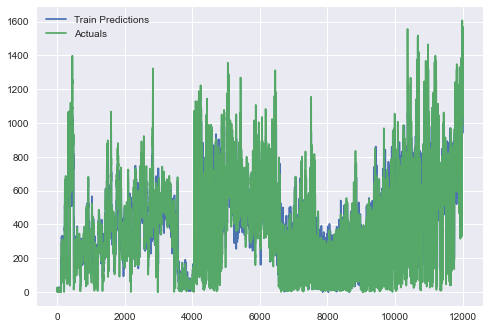

In [16]:
model = load_model('3H_Forecast/3H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(3,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 4 hours forecast

In [17]:
%%time

Trainer(4,6,12)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 8ms/step - loss: 253231.5625 - mean_absolute_error: 413.6403 - val_loss: 368100.2812 - val_mean_absolute_error: 493.8830
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 251828.0469 - mean_absolute_error: 411.8943 - val_loss: 366002.3438 - val_mean_absolute_error: 491.6153
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 7ms/step - loss: 249627.5156 - mean_absolute_error: 409.2277 - val_loss: 363193.2812 - val_mean_absolute_error: 488.8473
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 6ms/step - loss: 247366.6094 - mean_absolute_error: 406.5238 - val_loss: 360561.4375 - val_mean_absolute_error: 486.1402
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 245248.1875 - mean_absolute_error: 403.9976 - val_loss: 358135.6875 - val_mean_absolute_error: 483.7266
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 7ms/step - loss: 243408.3594 - mean_absolute_error: 401.8200 - val_loss: 355948.5625 - val_mean_absolute_error: 481.5147
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 7ms/step - loss: 241450.1094 - mean_absolute_error: 399.5081 - val_loss: 353415.0625 - val_mean_absolute_error: 478.9620
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 6ms/step - loss: 239331.2656 - mean_absolute_error: 397.0325 - val_loss: 350835.9375 - val_mean_absolute_error: 476.3790
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 2s 6ms/step - loss: 237163.6562 - mean_absolute_error: 394.5381 - val_loss: 348229.6875 - val_mean_absolute_error: 473.7869
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 7ms/step - loss: 234971.3125 - mean_absolute_error: 392.0086 - val_loss: 345540.5000 - val_mean_absolute_error: 471.1282
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 2s 6ms/step - loss: 232658.8281 - mean_absolute_error: 389.3736 - val_loss: 342578.0000 - val_mean_absolute_error: 468.2288
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 2s 6ms/step - loss: 230179.5156 - mean_absolute_error: 386.5759 - val_loss: 339607.5312 - val_mean_absolute_error: 465.3492
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 7ms/step - loss: 227694.0781 - mean_absolute_error: 383.7910 - val_loss: 336557.4375 - val_mean_absolute_error: 462.4171
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 7ms/step - loss: 225139.4375 - mean_absolute_error: 380.9271 - val_loss: 333407.7812 - val_mean_absolute_error: 459.4025
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 2s 6ms/step - loss: 222515.0938 - mean_absolute_error: 377.9964 - val_loss: 330173.5000 - val_mean_absolute_error: 456.3152
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 2s 6ms/step - loss: 219822.2344 - mean_absolute_error: 375.0236 - val_loss: 326850.3125 - val_mean_absolute_error: 453.1776
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 6ms/step - loss: 217066.3125 - mean_absolute_error: 371.9804 - val_loss: 323446.9688 - val_mean_absolute_error: 449.9850
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 6ms/step - loss: 214246.9688 - mean_absolute_error: 368.9293 - val_loss: 319958.9375 - val_mean_absolute_error: 446.7372
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 2s 6ms/step - loss: 211369.7344 - mean_absolute_error: 365.8010 - val_loss: 316395.2500 - val_mean_absolute_error: 443.4500
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 6ms/step - loss: 208432.7812 - mean_absolute_error: 362.6224 - val_loss: 312749.8438 - val_mean_absolute_error: 440.1129
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 205441.4375 - mean_absolute_error: 359.4006 - val_loss: 309040.3125 - val_mean_absolute_error: 436.7340
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 2s 6ms/step - loss: 202405.8750 - mean_absolute_error: 356.1496 - val_loss: 305262.4062 - val_mean_absolute_error: 433.2998
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 199325.2656 - mean_absolute_error: 352.8460 - val_loss: 301420.7812 - val_mean_absolute_error: 429.8145
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 6ms/step - loss: 196202.5469 - mean_absolute_error: 349.5226 - val_loss: 297530.0312 - val_mean_absolute_error: 426.2853
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 193041.5156 - mean_absolute_error: 346.1601 - val_loss: 293578.5938 - val_mean_absolute_error: 422.6912
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 189854.9688 - mean_absolute_error: 342.7774 - val_loss: 289588.0000 - val_mean_absolute_error: 419.0511
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 7ms/step - loss: 186637.6719 - mean_absolute_error: 339.3619 - val_loss: 285546.7500 - val_mean_absolute_error: 415.3717
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 183392.6719 - mean_absolute_error: 335.9365 - val_loss: 281456.6250 - val_mean_absolute_error: 411.6411
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 6ms/step - loss: 180130.6250 - mean_absolute_error: 332.5019 - val_loss: 277344.7188 - val_mean_absolute_error: 407.8850
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 2s 7ms/step - loss: 176856.7812 - mean_absolute_error: 329.0353 - val_loss: 273198.1250 - val_mean_absolute_error: 404.1096
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 6ms/step - loss: 173569.6562 - mean_absolute_error: 325.5879 - val_loss: 269024.1562 - val_mean_absolute_error: 400.3102
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 6ms/step - loss: 170273.0156 - mean_absolute_error: 322.0789 - val_loss: 264837.7188 - val_mean_absolute_error: 396.4892
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 2s 6ms/step - loss: 166971.3125 - mean_absolute_error: 318.5658 - val_loss: 260618.5781 - val_mean_absolute_error: 392.6131
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 2s 6ms/step - loss: 163674.5312 - mean_absolute_error: 315.0558 - val_loss: 256387.8281 - val_mean_absolute_error: 388.7055
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 6ms/step - loss: 160379.9219 - mean_absolute_error: 311.5368 - val_loss: 252148.7344 - val_mean_absolute_error: 384.7775
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 157090.9375 - mean_absolute_error: 307.9766 - val_loss: 247936.3594 - val_mean_absolute_error: 380.8463
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 2s 7ms/step - loss: 153803.6094 - mean_absolute_error: 304.2963 - val_loss: 243678.4062 - val_mean_absolute_error: 376.8869
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 2s 6ms/step - loss: 150329.7031 - mean_absolute_error: 300.5323 - val_loss: 239108.7656 - val_mean_absolute_error: 372.6195
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 6ms/step - loss: 146977.3281 - mean_absolute_error: 296.8568 - val_loss: 234797.2031 - val_mean_absolute_error: 368.5231
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 6ms/step - loss: 143716.4688 - mean_absolute_error: 293.2593 - val_loss: 230542.2031 - val_mean_absolute_error: 364.4533
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 2s 6ms/step - loss: 140469.3438 - mean_absolute_error: 289.5248 - val_loss: 226342.0938 - val_mean_absolute_error: 360.3690
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 2s 6ms/step - loss: 137249.9531 - mean_absolute_error: 285.7446 - val_loss: 222116.1094 - val_mean_absolute_error: 356.2794
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 2s 6ms/step - loss: 134063.7344 - mean_absolute_error: 282.0398 - val_loss: 217903.0000 - val_mean_absolute_error: 352.1972
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 2s 6ms/step - loss: 130923.0312 - mean_absolute_error: 278.4412 - val_loss: 213729.6719 - val_mean_absolute_error: 348.1303
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 2s 6ms/step - loss: 127822.7969 - mean_absolute_error: 274.9425 - val_loss: 209590.3438 - val_mean_absolute_error: 344.0314
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 6ms/step - loss: 124766.5781 - mean_absolute_error: 271.4179 - val_loss: 205488.1250 - val_mean_absolute_error: 339.9372
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 2s 6ms/step - loss: 121702.7500 - mean_absolute_error: 267.8066 - val_loss: 201212.2812 - val_mean_absolute_error: 335.6118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 2s 6ms/step - loss: 118604.1562 - mean_absolute_error: 263.9804 - val_loss: 197105.0938 - val_mean_absolute_error: 331.5441
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 115641.3672 - mean_absolute_error: 260.5461 - val_loss: 193040.8750 - val_mean_absolute_error: 327.4768
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 6ms/step - loss: 112751.6719 - mean_absolute_error: 257.0729 - val_loss: 189052.3438 - val_mean_absolute_error: 323.5293
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 6ms/step - loss: 109927.8359 - mean_absolute_error: 253.9985 - val_loss: 185177.1406 - val_mean_absolute_error: 319.4391
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 2s 6ms/step - loss: 107167.7812 - mean_absolute_error: 250.4499 - val_loss: 181322.2812 - val_mean_absolute_error: 315.5221
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 2s 7ms/step - loss: 104462.5312 - mean_absolute_error: 246.9775 - val_loss: 177470.7969 - val_mean_absolute_error: 311.7576
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 2s 6ms/step - loss: 101821.0547 - mean_absolute_error: 243.9527 - val_loss: 173770.5938 - val_mean_absolute_error: 307.9070
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 2s 6ms/step - loss: 99216.0312 - mean_absolute_error: 240.3819 - val_loss: 170061.3438 - val_mean_absolute_error: 304.2542
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 2s 6ms/step - loss: 96650.0625 - mean_absolute_error: 237.2414 - val_loss: 166405.3281 - val_mean_absolute_error: 299.8027
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 2s 6ms/step - loss: 94096.0547 - mean_absolute_error: 233.1648 - val_loss: 162765.4375 - val_mean_absolute_error: 295.8138
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 6ms/step - loss: 91580.2500 - mean_absolute_error: 229.3610 - val_loss: 159084.0312 - val_mean_absolute_error: 292.1620
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 2s 7ms/step - loss: 89053.0781 - mean_absolute_error: 225.9341 - val_loss: 155387.9688 - val_mean_absolute_error: 287.7486
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 86634.5469 - mean_absolute_error: 222.4707 - val_loss: 151782.5781 - val_mean_absolute_error: 283.5976
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 2s 6ms/step - loss: 84252.8828 - mean_absolute_error: 219.1158 - val_loss: 148241.4375 - val_mean_absolute_error: 279.4368
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 6ms/step - loss: 81948.0781 - mean_absolute_error: 215.6785 - val_loss: 144692.5000 - val_mean_absolute_error: 275.2418
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 2s 7ms/step - loss: 79703.2031 - mean_absolute_error: 212.2043 - val_loss: 141237.2188 - val_mean_absolute_error: 271.1413
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 77491.8672 - mean_absolute_error: 208.6496 - val_loss: 137882.9531 - val_mean_absolute_error: 267.4228- loss: 77229.6953 - mean_absolute_er
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 2s 6ms/step - loss: 75393.0156 - mean_absolute_error: 205.6900 - val_loss: 134534.7812 - val_mean_absolute_error: 262.9514
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 2s 7ms/step - loss: 73327.7578 - mean_absolute_error: 202.2408 - val_loss: 131192.8281 - val_mean_absolute_error: 258.7968
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 2s 6ms/step - loss: 71340.6562 - mean_absolute_error: 199.1340 - val_loss: 128177.6719 - val_mean_absolute_error: 255.2745
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 2s 7ms/step - loss: 69410.4531 - mean_absolute_error: 195.7884 - val_loss: 124838.3047 - val_mean_absolute_error: 251.9061
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 2s 7ms/step - loss: 67552.1641 - mean_absolute_error: 193.0274 - val_loss: 121660.5312 - val_mean_absolute_error: 247.4612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 2s 6ms/step - loss: 65764.1406 - mean_absolute_error: 190.0869 - val_loss: 118657.6016 - val_mean_absolute_error: 244.2047
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 2s 7ms/step - loss: 64057.6836 - mean_absolute_error: 187.2783 - val_loss: 115826.8047 - val_mean_absolute_error: 239.9338
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 2s 7ms/step - loss: 62313.6172 - mean_absolute_error: 183.9185 - val_loss: 112862.9688 - val_mean_absolute_error: 236.7071
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 2s 6ms/step - loss: 60616.0430 - mean_absolute_error: 180.8646 - val_loss: 109903.8203 - val_mean_absolute_error: 232.0028
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 2s 7ms/step - loss: 59051.3477 - mean_absolute_error: 178.2363 - val_loss: 106952.6641 - val_mean_absolute_error: 228.0874
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 57534.9062 - mean_absolute_error: 175.8065 - val_loss: 104539.3125 - val_mean_absolute_error: 224.2132
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 2s 7ms/step - loss: 56147.4609 - mean_absolute_error: 173.3193 - val_loss: 102180.6797 - val_mean_absolute_error: 221.6065
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 2s 6ms/step - loss: 54787.5703 - mean_absolute_error: 171.1562 - val_loss: 99296.1641 - val_mean_absolute_error: 218.4402
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 2s 6ms/step - loss: 53520.5039 - mean_absolute_error: 168.6932 - val_loss: 97429.8047 - val_mean_absolute_error: 215.5328
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 2s 7ms/step - loss: 52289.5039 - mean_absolute_error: 166.8969 - val_loss: 94445.1953 - val_mean_absolute_error: 211.9314
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 2s 6ms/step - loss: 51113.6602 - mean_absolute_error: 164.5801 - val_loss: 92237.4766 - val_mean_absolute_error: 209.4583
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 2s 6ms/step - loss: 50038.8711 - mean_absolute_error: 162.7471 - val_loss: 90023.8672 - val_mean_absolute_error: 206.3437
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 2s 7ms/step - loss: 49030.9492 - mean_absolute_error: 160.6083 - val_loss: 88521.6484 - val_mean_absolute_error: 204.3815
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 7ms/step - loss: 48016.4453 - mean_absolute_error: 158.7947 - val_loss: 86364.1641 - val_mean_absolute_error: 201.5956
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 2s 7ms/step - loss: 47098.1680 - mean_absolute_error: 157.1711 - val_loss: 84726.4141 - val_mean_absolute_error: 199.5693
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 2s 7ms/step - loss: 46232.9609 - mean_absolute_error: 155.5467 - val_loss: 82547.9141 - val_mean_absolute_error: 197.5900
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 2s 7ms/step - loss: 45430.2031 - mean_absolute_error: 154.1436 - val_loss: 81318.3828 - val_mean_absolute_error: 194.8263
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 2s 7ms/step - loss: 44629.3984 - mean_absolute_error: 152.3401 - val_loss: 79945.6250 - val_mean_absolute_error: 193.2555
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 43889.4180 - mean_absolute_error: 150.9210 - val_loss: 77693.1562 - val_mean_absolute_error: 190.5194
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 43134.1094 - mean_absolute_error: 149.2870 - val_loss: 76116.7109 - val_mean_absolute_error: 188.9504
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 2s 7ms/step - loss: 42484.0312 - mean_absolute_error: 148.0236 - val_loss: 75003.2344 - val_mean_absolute_error: 187.6223
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 2s 6ms/step - loss: 41928.5586 - mean_absolute_error: 146.7821 - val_loss: 73254.5781 - val_mean_absolute_error: 185.8892
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 2s 7ms/step - loss: 41315.7695 - mean_absolute_error: 145.7836 - val_loss: 72426.5625 - val_mean_absolute_error: 184.3320
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 2s 6ms/step - loss: 40758.6406 - mean_absolute_error: 144.4413 - val_loss: 70886.8359 - val_mean_absolute_error: 182.6816
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 2s 7ms/step - loss: 40305.0234 - mean_absolute_error: 143.7111 - val_loss: 70877.0156 - val_mean_absolute_error: 182.5172
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 2s 7ms/step - loss: 39804.3398 - mean_absolute_error: 142.7167 - val_loss: 69320.0781 - val_mean_absolute_error: 180.2231
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 2s 6ms/step - loss: 39373.9805 - mean_absolute_error: 141.6501 - val_loss: 68154.2578 - val_mean_absolute_error: 179.3605
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 2s 6ms/step - loss: 38915.6523 - mean_absolute_error: 140.8460 - val_loss: 66759.8984 - val_mean_absolute_error: 178.2547
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 38555.2227 - mean_absolute_error: 140.1139 - val_loss: 66487.0547 - val_mean_absolute_error: 177.5539
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 38233.8867 - mean_absolute_error: 139.4366 - val_loss: 65062.5234 - val_mean_absolute_error: 175.9730
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 37869.3672 - mean_absolute_error: 138.4939 - val_loss: 64532.3125 - val_mean_absolute_error: 175.714739271.5664 - mean_absolute
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 9ms/step - loss: 251062.7969 - mean_absolute_error: 410.8750 - val_loss: 363793.8438 - val_mean_absolute_error: 489.0616
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 245173.5469 - mean_absolute_error: 403.6860 - val_loss: 354856.9688 - val_mean_absolute_error: 480.0261
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 237550.6719 - mean_absolute_error: 394.8905 - val_loss: 345356.1250 - val_mean_absolute_error: 470.6067
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 229565.9688 - mean_absolute_error: 385.8614 - val_loss: 336306.2188 - val_mean_absolute_error: 462.0032
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 222138.6094 - mean_absolute_error: 377.6019 - val_loss: 327063.1562 - val_mean_absolute_error: 453.2538
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 214868.4844 - mean_absolute_error: 369.5957 - val_loss: 318237.5625 - val_mean_absolute_error: 445.0173
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 207558.0156 - mean_absolute_error: 361.6694 - val_loss: 309157.6250 - val_mean_absolute_error: 436.7094
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 200075.8281 - mean_absolute_error: 353.6445 - val_loss: 299612.0000 - val_mean_absolute_error: 428.0130
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 192140.3438 - mean_absolute_error: 345.2247 - val_loss: 289771.6875 - val_mean_absolute_error: 419.0651
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 184168.7656 - mean_absolute_error: 336.7729 - val_loss: 279775.5938 - val_mean_absolute_error: 409.9721
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 176303.0625 - mean_absolute_error: 328.4483 - val_loss: 269867.2812 - val_mean_absolute_error: 400.9581
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 168496.0469 - mean_absolute_error: 320.1422 - val_loss: 259967.0469 - val_mean_absolute_error: 391.9118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 160771.6250 - mean_absolute_error: 311.8101 - val_loss: 250118.7031 - val_mean_absolute_error: 382.8192
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 153164.1250 - mean_absolute_error: 303.5418 - val_loss: 240352.9062 - val_mean_absolute_error: 373.7227
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 145723.7344 - mean_absolute_error: 295.4270 - val_loss: 230719.0625 - val_mean_absolute_error: 364.6053
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 138474.6719 - mean_absolute_error: 287.3847 - val_loss: 221269.6250 - val_mean_absolute_error: 355.5510
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 131468.7656 - mean_absolute_error: 279.5285 - val_loss: 212042.5000 - val_mean_absolute_error: 346.5927
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 124673.6328 - mean_absolute_error: 271.5070 - val_loss: 203024.3750 - val_mean_absolute_error: 337.7408
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 118161.8203 - mean_absolute_error: 263.9970 - val_loss: 194327.6250 - val_mean_absolute_error: 328.9737
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 111939.5078 - mean_absolute_error: 256.2528 - val_loss: 185868.0781 - val_mean_absolute_error: 320.3795
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 8ms/step - loss: 106011.6406 - mean_absolute_error: 249.2070 - val_loss: 177732.2344 - val_mean_absolute_error: 312.1021
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 100429.8594 - mean_absolute_error: 242.2950 - val_loss: 169949.6406 - val_mean_absolute_error: 304.3007
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 95110.7031 - mean_absolute_error: 235.1436 - val_loss: 162379.5000 - val_mean_absolute_error: 296.0836
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 90065.6094 - mean_absolute_error: 228.0135 - val_loss: 155073.1562 - val_mean_absolute_error: 288.1482
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 85310.8359 - mean_absolute_error: 221.1215 - val_loss: 148055.0781 - val_mean_absolute_error: 280.6183
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 80806.7812 - mean_absolute_error: 214.1635 - val_loss: 141237.8438 - val_mean_absolute_error: 273.2283
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 76618.5078 - mean_absolute_error: 208.0683 - val_loss: 134811.6094 - val_mean_absolute_error: 266.2336
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 72734.3828 - mean_absolute_error: 202.0990 - val_loss: 128564.7734 - val_mean_absolute_error: 258.9377
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 69093.0938 - mean_absolute_error: 196.0355 - val_loss: 122627.2031 - val_mean_absolute_error: 251.9720
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 65704.1328 - mean_absolute_error: 190.4397 - val_loss: 117035.5312 - val_mean_absolute_error: 245.7174
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 62606.3359 - mean_absolute_error: 185.4942 - val_loss: 111577.9453 - val_mean_absolute_error: 238.9503
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 59829.2109 - mean_absolute_error: 180.8878 - val_loss: 106612.9453 - val_mean_absolute_error: 232.9242
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 57339.8945 - mean_absolute_error: 176.7072 - val_loss: 101820.9219 - val_mean_absolute_error: 225.5857
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 54910.0117 - mean_absolute_error: 171.1281 - val_loss: 97338.4609 - val_mean_absolute_error: 220.3563
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 52741.9648 - mean_absolute_error: 166.9171 - val_loss: 93149.4688 - val_mean_absolute_error: 215.2783
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 50873.7422 - mean_absolute_error: 163.7374 - val_loss: 89305.7578 - val_mean_absolute_error: 209.5827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 49256.4727 - mean_absolute_error: 160.8363 - val_loss: 85786.4844 - val_mean_absolute_error: 205.5555
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 47795.2305 - mean_absolute_error: 158.1017 - val_loss: 82601.0547 - val_mean_absolute_error: 201.6803
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 46458.8711 - mean_absolute_error: 155.6313 - val_loss: 79972.7500 - val_mean_absolute_error: 197.9183
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 45329.8398 - mean_absolute_error: 153.8087 - val_loss: 76900.6250 - val_mean_absolute_error: 194.8022
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 44167.1055 - mean_absolute_error: 150.6906 - val_loss: 74416.4297 - val_mean_absolute_error: 191.1094
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 43185.9492 - mean_absolute_error: 148.8140 - val_loss: 72056.8359 - val_mean_absolute_error: 188.1612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 42294.9648 - mean_absolute_error: 146.8772 - val_loss: 70635.5156 - val_mean_absolute_error: 185.9868
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 41571.8633 - mean_absolute_error: 145.6976 - val_loss: 68111.9922 - val_mean_absolute_error: 183.6526
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 40931.4688 - mean_absolute_error: 144.5435 - val_loss: 67373.5156 - val_mean_absolute_error: 182.2707
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 7ms/step - loss: 40312.3125 - mean_absolute_error: 143.3021 - val_loss: 64618.3242 - val_mean_absolute_error: 178.9371
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 39691.1562 - mean_absolute_error: 141.9775 - val_loss: 63177.3711 - val_mean_absolute_error: 176.8133s: 39977.2734 - mean
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 39168.8906 - mean_absolute_error: 141.0567 - val_loss: 61848.5195 - val_mean_absolute_error: 175.4681
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 38742.3008 - mean_absolute_error: 140.1000 - val_loss: 61105.9375 - val_mean_absolute_error: 173.8551
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 38296.2969 - mean_absolute_error: 139.3294 - val_loss: 59734.6602 - val_mean_absolute_error: 172.5304
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 37939.1172 - mean_absolute_error: 138.5892 - val_loss: 60032.0469 - val_mean_absolute_error: 172.3147
Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 37608.8672 - mean_absolute_error: 138.0722 - val_loss: 58077.8711 - val_mean_absolute_error: 169.9460
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 37231.4062 - mean_absolute_error: 137.1429 - val_loss: 57159.3750 - val_mean_absolute_error: 168.6806
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 36872.3242 - mean_absolute_error: 136.6056 - val_loss: 56339.7969 - val_mean_absolute_error: 167.8206
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 36553.8594 - mean_absolute_error: 136.1978 - val_loss: 55874.2305 - val_mean_absolute_error: 166.9495
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 36276.9258 - mean_absolute_error: 136.0341 - val_loss: 55694.5781 - val_mean_absolute_error: 166.4982
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 36022.2031 - mean_absolute_error: 135.5397 - val_loss: 54096.5039 - val_mean_absolute_error: 165.6612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 35774.5117 - mean_absolute_error: 135.0355 - val_loss: 53210.0703 - val_mean_absolute_error: 164.4020
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 35556.5352 - mean_absolute_error: 134.6688 - val_loss: 52894.8945 - val_mean_absolute_error: 163.8939
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 35350.7969 - mean_absolute_error: 134.5013 - val_loss: 52568.4727 - val_mean_absolute_error: 163.0326
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 35209.9648 - mean_absolute_error: 133.8418 - val_loss: 52741.5977 - val_mean_absolute_error: 162.7950
Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 34932.8359 - mean_absolute_error: 133.5756 - val_loss: 52465.6914 - val_mean_absolute_error: 162.3738
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 34812.6914 - mean_absolute_error: 133.3604 - val_loss: 51957.2578 - val_mean_absolute_error: 161.6727
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 34646.1328 - mean_absolute_error: 133.2159 - val_loss: 50915.0312 - val_mean_absolute_error: 161.2561
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 34462.7305 - mean_absolute_error: 132.7104 - val_loss: 50668.4297 - val_mean_absolute_error: 160.6332
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 34335.3750 - mean_absolute_error: 132.4979 - val_loss: 51286.6836 - val_mean_absolute_error: 160.7773: 0s - loss: 34590.0742 - mean_absolute_error: 132
Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 34198.6133 - mean_absolute_error: 132.0903 - val_loss: 50600.8125 - val_mean_absolute_error: 159.9978
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 33978.8789 - mean_absolute_error: 131.7114 - val_loss: 50081.8320 - val_mean_absolute_error: 159.9220
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 33785.0898 - mean_absolute_error: 131.4974 - val_loss: 49961.9961 - val_mean_absolute_error: 159.1773
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 33790.9727 - mean_absolute_error: 131.5491 - val_loss: 49661.8008 - val_mean_absolute_error: 159.2387
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 33501.8438 - mean_absolute_error: 130.7865 - val_loss: 49788.6133 - val_mean_absolute_error: 158.8433
Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 33384.0352 - mean_absolute_error: 130.6902 - val_loss: 48846.8047 - val_mean_absolute_error: 158.7714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 33370.0078 - mean_absolute_error: 130.5343 - val_loss: 49449.6523 - val_mean_absolute_error: 158.2451
Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 33218.1914 - mean_absolute_error: 130.3274 - val_loss: 49043.3633 - val_mean_absolute_error: 158.6107
Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 33023.2070 - mean_absolute_error: 129.7416 - val_loss: 48044.3867 - val_mean_absolute_error: 157.0519
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 32968.2383 - mean_absolute_error: 129.6460 - val_loss: 48889.7461 - val_mean_absolute_error: 157.5193
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 32795.6172 - mean_absolute_error: 129.4955 - val_loss: 48033.2227 - val_mean_absolute_error: 157.4465
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 32696.5918 - mean_absolute_error: 129.0693 - val_loss: 48202.5078 - val_mean_absolute_error: 156.3464
Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 32598.1719 - mean_absolute_error: 128.8360 - val_loss: 47926.7070 - val_mean_absolute_error: 156.8759
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 32533.4570 - mean_absolute_error: 128.8431 - val_loss: 47597.4258 - val_mean_absolute_error: 156.9120
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 32393.5664 - mean_absolute_error: 128.4372 - val_loss: 48752.6094 - val_mean_absolute_error: 156.5953
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 32267.5410 - mean_absolute_error: 128.3331 - val_loss: 47421.7422 - val_mean_absolute_error: 155.2450
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 3s 7ms/step - loss: 32156.2715 - mean_absolute_error: 127.7180 - val_loss: 48074.7461 - val_mean_absolute_error: 156.9924
Epoch 84/100
376/376 [==============================] - 3s 7ms/step - loss: 32079.4727 - mean_absolute_error: 127.6436 - val_loss: 47419.4375 - val_mean_absolute_error: 155.8164
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 7ms/step - loss: 32061.5879 - mean_absolute_error: 127.8463 - val_loss: 48349.8984 - val_mean_absolute_error: 156.6582
Epoch 86/100
376/376 [==============================] - 3s 7ms/step - loss: 31962.9844 - mean_absolute_error: 127.3529 - val_loss: 47493.8203 - val_mean_absolute_error: 154.7637
Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 31885.6211 - mean_absolute_error: 127.2231 - val_loss: 47212.6094 - val_mean_absolute_error: 154.5965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 31835.7969 - mean_absolute_error: 126.9706 - val_loss: 47015.8750 - val_mean_absolute_error: 155.4779
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 7ms/step - loss: 31734.0684 - mean_absolute_error: 126.7644 - val_loss: 46594.4062 - val_mean_absolute_error: 155.6032
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 7ms/step - loss: 31691.2031 - mean_absolute_error: 126.5068 - val_loss: 47382.2930 - val_mean_absolute_error: 155.0621
Epoch 91/100
376/376 [==============================] - 3s 7ms/step - loss: 31598.7793 - mean_absolute_error: 126.3754 - val_loss: 47605.0234 - val_mean_absolute_error: 155.1828
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 31649.3359 - mean_absolute_error: 126.5860 - val_loss: 46822.0156 - val_mean_absolute_error: 154.9419
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 31482.6816 - mean_absolute_error: 126.2503 - val_loss: 47739.0391 - val_mean_absolute_error: 154.9317
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 31407.1465 - mean_absolute_error: 125.8247 - val_loss: 47403.8555 - val_mean_absolute_error: 154.7943
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 31368.1074 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 247085.6406 - mean_absolute_error: 406.0713 - val_loss: 358106.5938 - val_mean_absolute_error: 483.5912
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 241769.1094 - mean_absolute_error: 399.8365 - val_loss: 352401.5000 - val_mean_absolute_error: 477.8602
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 237196.9531 - mean_absolute_error: 394.5518 - val_loss: 346665.6562 - val_mean_absolute_error: 472.1431
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 232408.5781 - mean_absolute_error: 389.1143 - val_loss: 340986.2812 - val_mean_absolute_error: 466.5992
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 227613.7812 - mean_absolute_error: 383.7078 - val_loss: 335209.6875 - val_mean_absolute_error: 461.0414
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 222631.8438 - mean_absolute_error: 378.1231 - val_loss: 328775.9062 - val_mean_absolute_error: 454.9113
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 217480.9844 - mean_absolute_error: 372.4628 - val_loss: 322730.3750 - val_mean_absolute_error: 449.2375
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 212493.7969 - mean_absolute_error: 366.9957 - val_loss: 316574.2500 - val_mean_absolute_error: 443.5355
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 207420.3594 - mean_absolute_error: 361.4836 - val_loss: 310281.7188 - val_mean_absolute_error: 437.7845
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 202169.6406 - mean_absolute_error: 355.8337 - val_loss: 303516.7188 - val_mean_absolute_error: 431.6370
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 8ms/step - loss: 196623.3438 - mean_absolute_error: 349.8434 - val_loss: 296794.6250 - val_mean_absolute_error: 425.5433
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 191187.6250 - mean_absolute_error: 344.0186 - val_loss: 290022.4062 - val_mean_absolute_error: 419.3687
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 185717.2812 - mean_absolute_error: 338.1576 - val_loss: 283178.8750 - val_mean_absolute_error: 413.1435
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 180220.6250 - mean_absolute_error: 332.2222 - val_loss: 276274.9062 - val_mean_absolute_error: 406.8466
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 8ms/step - loss: 174694.6719 - mean_absolute_error: 326.3104 - val_loss: 269314.0938 - val_mean_absolute_error: 400.5323
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 8ms/step - loss: 169171.2656 - mean_absolute_error: 320.2369 - val_loss: 262383.7500 - val_mean_absolute_error: 394.2648
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 163665.7188 - mean_absolute_error: 314.2470 - val_loss: 255365.2188 - val_mean_absolute_error: 387.7679
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 158196.9219 - mean_absolute_error: 308.2831 - val_loss: 248353.5781 - val_mean_absolute_error: 381.2575
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 152784.7031 - mean_absolute_error: 302.3924 - val_loss: 241405.8438 - val_mean_absolute_error: 374.8158
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 147438.1406 - mean_absolute_error: 296.5283 - val_loss: 234515.9062 - val_mean_absolute_error: 368.3887
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 142183.2656 - mean_absolute_error: 290.6449 - val_loss: 227673.2812 - val_mean_absolute_error: 361.8885
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 137027.0781 - mean_absolute_error: 284.8348 - val_loss: 220967.0469 - val_mean_absolute_error: 355.5325
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 131962.3438 - mean_absolute_error: 278.9977 - val_loss: 214273.1094 - val_mean_absolute_error: 349.0776
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 127009.0703 - mean_absolute_error: 273.4234 - val_loss: 207694.8438 - val_mean_absolute_error: 342.6905
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 122030.7578 - mean_absolute_error: 267.6168 - val_loss: 200890.5781 - val_mean_absolute_error: 336.0610
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 8ms/step - loss: 117158.3984 - mean_absolute_error: 261.8350 - val_loss: 194468.0156 - val_mean_absolute_error: 329.6907
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 8ms/step - loss: 112566.3359 - mean_absolute_error: 256.4101 - val_loss: 188220.8594 - val_mean_absolute_error: 323.5490
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 108128.2969 - mean_absolute_error: 250.8079 - val_loss: 181970.0000 - val_mean_absolute_error: 317.0001
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 103805.6016 - mean_absolute_error: 245.6041 - val_loss: 175994.3750 - val_mean_absolute_error: 310.7778
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 99652.3125 - mean_absolute_error: 240.1327 - val_loss: 170139.5156 - val_mean_absolute_error: 304.6612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 95617.7266 - mean_absolute_error: 234.8208 - val_loss: 164366.3125 - val_mean_absolute_error: 298.2130
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 91736.2578 - mean_absolute_error: 229.5682 - val_loss: 158716.7344 - val_mean_absolute_error: 292.1696
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 88034.3672 - mean_absolute_error: 224.5433 - val_loss: 153265.7031 - val_mean_absolute_error: 286.3791
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 8ms/step - loss: 84480.3281 - mean_absolute_error: 219.5647 - val_loss: 147994.0156 - val_mean_absolute_error: 280.6100
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 8ms/step - loss: 81085.1953 - mean_absolute_error: 214.5291 - val_loss: 142823.7656 - val_mean_absolute_error: 275.0750
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 77846.4062 - mean_absolute_error: 209.7540 - val_loss: 137824.1406 - val_mean_absolute_error: 268.7073
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 74730.7891 - mean_absolute_error: 204.6003 - val_loss: 132798.1719 - val_mean_absolute_error: 263.1697
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 71774.5000 - mean_absolute_error: 199.9178 - val_loss: 127970.6250 - val_mean_absolute_error: 257.1953
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 8ms/step - loss: 68927.0859 - mean_absolute_error: 194.8111 - val_loss: 123324.8750 - val_mean_absolute_error: 251.4264
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 66242.9766 - mean_absolute_error: 190.4547 - val_loss: 118836.8828 - val_mean_absolute_error: 246.3317
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 63687.9570 - mean_absolute_error: 186.4032 - val_loss: 114324.5703 - val_mean_absolute_error: 240.6315
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 61307.7422 - mean_absolute_error: 182.4448 - val_loss: 110109.4766 - val_mean_absolute_error: 234.9097
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 59033.3945 - mean_absolute_error: 177.6995 - val_loss: 105968.2656 - val_mean_absolute_error: 229.4617
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 56952.9258 - mean_absolute_error: 174.3766 - val_loss: 102402.1328 - val_mean_absolute_error: 225.0383
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 55107.4961 - mean_absolute_error: 171.1460 - val_loss: 98584.5078 - val_mean_absolute_error: 220.3004
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 53360.7969 - mean_absolute_error: 167.8492 - val_loss: 95330.3672 - val_mean_absolute_error: 217.2946
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 51828.6367 - mean_absolute_error: 165.6377 - val_loss: 92187.1562 - val_mean_absolute_error: 212.2033
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 50436.0625 - mean_absolute_error: 163.0916 - val_loss: 89101.9531 - val_mean_absolute_error: 208.2655
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 49043.7930 - mean_absolute_error: 160.1040 - val_loss: 87100.5391 - val_mean_absolute_error: 205.4236
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 47835.4609 - mean_absolute_error: 157.7710 - val_loss: 83993.6641 - val_mean_absolute_error: 201.7622
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 46778.5703 - mean_absolute_error: 156.1357 - val_loss: 81466.1484 - val_mean_absolute_error: 198.7427
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 45799.7695 - mean_absolute_error: 154.3585 - val_loss: 79116.0391 - val_mean_absolute_error: 195.8901
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 44929.1250 - mean_absolute_error: 152.6686 - val_loss: 76689.0938 - val_mean_absolute_error: 193.3405
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 44105.4336 - mean_absolute_error: 151.1552 - val_loss: 75019.4219 - val_mean_absolute_error: 191.0657
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 43260.8906 - mean_absolute_error: 149.2921 - val_loss: 73992.5469 - val_mean_absolute_error: 189.5993
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 42496.6055 - mean_absolute_error: 147.5034 - val_loss: 71336.3984 - val_mean_absolute_error: 186.2226
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 41779.0430 - mean_absolute_error: 146.1807 - val_loss: 69648.3125 - val_mean_absolute_error: 183.8545
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 41185.2422 - mean_absolute_error: 144.6068 - val_loss: 67970.0234 - val_mean_absolute_error: 182.2378
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 40639.9922 - mean_absolute_error: 143.9346 - val_loss: 66824.6641 - val_mean_absolute_error: 181.0901
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 40195.7617 - mean_absolute_error: 143.2092 - val_loss: 65388.1406 - val_mean_absolute_error: 179.4147
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 39743.6836 - mean_absolute_error: 142.5472 - val_loss: 64582.6680 - val_mean_absolute_error: 178.3535
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 39385.5703 - mean_absolute_error: 141.9791 - val_loss: 64246.4258 - val_mean_absolute_error: 178.1407
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 38950.2109 - mean_absolute_error: 141.3531 - val_loss: 62933.2070 - val_mean_absolute_error: 176.1702
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 38563.1914 - mean_absolute_error: 140.3684 - val_loss: 62085.6367 - val_mean_absolute_error: 175.0450
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 8ms/step - loss: 38276.8516 - mean_absolute_error: 140.0570 - val_loss: 60483.8438 - val_mean_absolute_error: 173.2585
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 37986.5234 - mean_absolute_error: 139.6468 - val_loss: 58971.6406 - val_mean_absolute_error: 171.7401
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 8ms/step - loss: 37852.4727 - mean_absolute_error: 139.6340 - val_loss: 58653.0898 - val_mean_absolute_error: 171.2649
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 37469.9297 - mean_absolute_error: 138.5530 - val_loss: 59172.4492 - val_mean_absolute_error: 172.0048
Epoch 70/100
376/376 [==============================] - 3s 8ms/step - loss: 37196.8203 - mean_absolute_error: 137.9939 - val_loss: 58098.6328 - val_mean_absolute_error: 170.5624
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 36917.0156 - mean_absolute_error: 137.5009 - val_loss: 55924.6172 - val_mean_absolute_error: 167.3507
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 36711.9141 - mean_absolute_error: 136.5341 - val_loss: 56893.5273 - val_mean_absolute_error: 168.3463
Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 36405.4297 - mean_absolute_error: 135.8860 - val_loss: 55894.2227 - val_mean_absolute_error: 167.3637
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 36262.2656 - mean_absolute_error: 135.5461 - val_loss: 55091.9453 - val_mean_absolute_error: 165.9609
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 35911.9297 - mean_absolute_error: 134.6019 - val_loss: 55192.1992 - val_mean_absolute_error: 165.8591
Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 35641.3086 - mean_absolute_error: 133.7145 - val_loss: 55398.4023 - val_mean_absolute_error: 166.2463
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 35340.6797 - mean_absolute_error: 133.1713 - val_loss: 53947.9336 - val_mean_absolute_error: 164.2083
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 35099.8008 - mean_absolute_error: 132.6255 - val_loss: 52523.2773 - val_mean_absolute_error: 162.7498
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 34837.5898 - mean_absolute_error: 131.9771 - val_loss: 52026.2969 - val_mean_absolute_error: 161.8771
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 34512.2578 - mean_absolute_error: 130.6753 - val_loss: 52076.2930 - val_mean_absolute_error: 161.3410
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 34347.7852 - mean_absolute_error: 130.6305 - val_loss: 53560.0977 - val_mean_absolute_error: 162.8929
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 34102.1875 - mean_absolute_error: 130.1257 - val_loss: 54090.4609 - val_mean_absolute_error: 162.9792
Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 33801.7148 - mean_absolute_error: 129.0248 - val_loss: 51567.1484 - val_mean_absolute_error: 160.3657
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 3s 8ms/step - loss: 33406.2227 - mean_absolute_error: 128.1643 - val_loss: 51077.3906 - val_mean_absolute_error: 159.2722
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 33296.0352 - mean_absolute_error: 127.8486 - val_loss: 51376.6250 - val_mean_absolute_error: 159.8429
Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 32931.0898 - mean_absolute_error: 127.2264 - val_loss: 50590.4883 - val_mean_absolute_error: 159.0537
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 32724.6465 - mean_absolute_error: 126.6641 - val_loss: 51360.5625 - val_mean_absolute_error: 159.0344
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 32492.9629 - mean_absolute_error: 125.9666 - val_loss: 49540.1641 - val_mean_absolute_error: 157.2474
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 32237.4473 - mean_absolute_error: 125.2791 - val_loss: 50425.2227 - val_mean_absolute_error: 157.9471
Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 32032.4375 - mean_absolute_error: 124.8063 - val_loss: 49087.2656 - val_mean_absolute_error: 155.7999
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 31800.5137 - mean_absolute_error: 124.4694 - val_loss: 49551.0391 - val_mean_absolute_error: 156.2692
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 31697.0117 - mean_absolute_error: 124.0888 - val_loss: 48480.3867 - val_mean_absolute_error: 156.1933
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 31492.5645 - mean_absolute_error: 123.8095 - val_loss: 47722.7734 - val_mean_absolute_error: 154.7231
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 3s 9ms/step - loss: 31546.7305 - mean_absolute_error: 123.7376 - val_loss: 49405.7188 - val_mean_absolute_error: 155.7877
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 31263.2324 - mean_absolute_error: 122.9847 - val_loss: 47446.2031 - val_mean_absolute_error: 154.0506
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 31217.2891 - mean_absolute_error: 123.4319 - val_loss: 48217.7578 - val_mean_absolute_error: 154.6508
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 30871.4414 - mean_absolute_error: 122.3690 - val_loss: 48386.0938 - val_mean_absolute_error: 154.5318
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 30937.0840 - mean_absolute_error: 122.6013 - val_loss: 47346.1094 - val_mean_absolute_error: 154.4765
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 30741.0410 - mean_absolute_error: 121.9593 - val_loss: 47584.0312 - val_mean_absolute_error: 155.2173
Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 30560.1016 - mean_absolute_error: 121.7426 - val_loss: 48143.3516 - val_mean_absolute_error: 155.0220

-----------------------------------------------------------------------------------------------------------

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
No

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 9ms/step - loss: 240443.4062 - mean_absolute_error: 398.1772 - val_loss: 347628.8438 - val_mean_absolute_error: 472.7878
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 230967.9531 - mean_absolute_error: 387.4616 - val_loss: 337746.6875 - val_mean_absolute_error: 463.3644
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 9ms/step - loss: 223578.0312 - mean_absolute_error: 379.1974 - val_loss: 328649.7500 - val_mean_absolute_error: 454.6766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 215454.0000 - mean_absolute_error: 370.2080 - val_loss: 318623.5625 - val_mean_absolute_error: 445.2899
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 207587.1094 - mean_absolute_error: 361.6546 - val_loss: 309114.4375 - val_mean_absolute_error: 436.5765
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 199755.1250 - mean_absolute_error: 353.2179 - val_loss: 299411.5625 - val_mean_absolute_error: 427.7569
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 191842.2812 - mean_absolute_error: 344.6905 - val_loss: 289567.0312 - val_mean_absolute_error: 418.7882
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 9ms/step - loss: 183872.3125 - mean_absolute_error: 336.1609 - val_loss: 279598.6250 - val_mean_absolute_error: 409.7167
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 175888.5625 - mean_absolute_error: 327.5326 - val_loss: 269589.5938 - val_mean_absolute_error: 400.6276
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 167961.8281 - mean_absolute_error: 318.9722 - val_loss: 259391.3906 - val_mean_absolute_error: 391.3017
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 159865.7969 - mean_absolute_error: 310.0883 - val_loss: 249147.0938 - val_mean_absolute_error: 381.8862
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 151962.6250 - mean_absolute_error: 301.2794 - val_loss: 239107.8125 - val_mean_absolute_error: 372.5090
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 144316.9219 - mean_absolute_error: 292.7865 - val_loss: 229320.7812 - val_mean_absolute_error: 363.2977
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 136905.4062 - mean_absolute_error: 284.2368 - val_loss: 219758.2812 - val_mean_absolute_error: 354.1967
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 129744.4844 - mean_absolute_error: 276.0198 - val_loss: 210441.8438 - val_mean_absolute_error: 345.2773
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 122872.1094 - mean_absolute_error: 267.8488 - val_loss: 201347.1094 - val_mean_absolute_error: 336.3068
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 116314.5234 - mean_absolute_error: 260.2486 - val_loss: 192619.3594 - val_mean_absolute_error: 327.8352
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 110089.7891 - mean_absolute_error: 252.8553 - val_loss: 184170.0469 - val_mean_absolute_error: 319.2857
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 104210.8828 - mean_absolute_error: 245.6184 - val_loss: 176117.9375 - val_mean_absolute_error: 310.9898
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 98636.0234 - mean_absolute_error: 238.4470 - val_loss: 168358.6250 - val_mean_absolute_error: 303.2088
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 93358.9453 - mean_absolute_error: 231.5732 - val_loss: 160801.2031 - val_mean_absolute_error: 295.0340
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 88369.5234 - mean_absolute_error: 224.7317 - val_loss: 153491.4844 - val_mean_absolute_error: 287.1341
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 83624.8516 - mean_absolute_error: 217.6581 - val_loss: 146407.5938 - val_mean_absolute_error: 279.4936
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 79195.1094 - mean_absolute_error: 211.1532 - val_loss: 139641.6094 - val_mean_absolute_error: 271.7434
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 75062.1719 - mean_absolute_error: 204.8848 - val_loss: 133276.4688 - val_mean_absolute_error: 264.8504
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 71125.4609 - mean_absolute_error: 198.5840 - val_loss: 126653.6094 - val_mean_absolute_error: 257.3828
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 67223.3594 - mean_absolute_error: 191.9862 - val_loss: 120405.5938 - val_mean_absolute_error: 249.7803
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 63671.9297 - mean_absolute_error: 185.8454 - val_loss: 114135.4922 - val_mean_absolute_error: 241.4856
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 9ms/step - loss: 60342.6055 - mean_absolute_error: 180.1457 - val_loss: 108745.9688 - val_mean_absolute_error: 234.4665
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 57464.5156 - mean_absolute_error: 175.0635 - val_loss: 103183.8672 - val_mean_absolute_error: 227.4218
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 54873.7617 - mean_absolute_error: 170.2552 - val_loss: 98780.2500 - val_mean_absolute_error: 221.1249
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 52512.0000 - mean_absolute_error: 165.9714 - val_loss: 93688.9141 - val_mean_absolute_error: 214.7606
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 50485.3086 - mean_absolute_error: 162.1820 - val_loss: 89613.8438 - val_mean_absolute_error: 209.5515
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 48640.2617 - mean_absolute_error: 158.8275 - val_loss: 85906.8359 - val_mean_absolute_error: 205.1544
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 47099.2812 - mean_absolute_error: 156.1605 - val_loss: 82917.9688 - val_mean_absolute_error: 201.2549
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 45558.7266 - mean_absolute_error: 152.8584 - val_loss: 79361.6406 - val_mean_absolute_error: 196.4915
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 44088.9883 - mean_absolute_error: 150.1281 - val_loss: 76495.4609 - val_mean_absolute_error: 192.4552
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 42899.5273 - mean_absolute_error: 147.6804 - val_loss: 73615.9375 - val_mean_absolute_error: 189.3289
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 41581.2773 - mean_absolute_error: 144.9884 - val_loss: 72423.2266 - val_mean_absolute_error: 187.1550
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 9ms/step - loss: 40694.6992 - mean_absolute_error: 143.2109 - val_loss: 72091.6719 - val_mean_absolute_error: 186.6750
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 40100.5469 - mean_absolute_error: 141.9297 - val_loss: 69455.6250 - val_mean_absolute_error: 183.7190
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 38944.5000 - mean_absolute_error: 139.7697 - val_loss: 66982.9141 - val_mean_absolute_error: 180.0829
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 38055.4531 - mean_absolute_error: 138.1890 - val_loss: 64940.0703 - val_mean_absolute_error: 177.9154
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 37201.3281 - mean_absolute_error: 136.3563 - val_loss: 63012.3086 - val_mean_absolute_error: 174.5295
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 36474.5898 - mean_absolute_error: 135.0200 - val_loss: 61342.5039 - val_mean_absolute_error: 172.3870
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 35778.3047 - mean_absolute_error: 133.4485 - val_loss: 61171.8867 - val_mean_absolute_error: 172.3851
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 35121.5742 - mean_absolute_error: 132.2726 - val_loss: 58762.8281 - val_mean_absolute_error: 169.5998
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 34538.3398 - mean_absolute_error: 130.7567 - val_loss: 57372.8984 - val_mean_absolute_error: 168.8044
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 34075.6953 - mean_absolute_error: 130.0536 - val_loss: 56582.3398 - val_mean_absolute_error: 166.0488
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 9ms/step - loss: 33666.6602 - mean_absolute_error: 128.8940 - val_loss: 55730.2070 - val_mean_absolute_error: 166.8019
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 33295.6094 - mean_absolute_error: 128.1554 - val_loss: 56016.0742 - val_mean_absolute_error: 167.3449
Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 32801.8242 - mean_absolute_error: 126.7939 - val_loss: 54111.9297 - val_mean_absolute_error: 164.3130
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 32427.0586 - mean_absolute_error: 125.8744 - val_loss: 52818.4805 - val_mean_absolute_error: 163.3581
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 32055.2051 - mean_absolute_error: 125.0529 - val_loss: 53409.5977 - val_mean_absolute_error: 163.5603
Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 31749.0449 - mean_absolute_error: 124.1970 - val_loss: 53784.3555 - val_mean_absolute_error: 164.2311
Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 31430.9648 - mean_absolute_error: 123.5285 - val_loss: 51410.5078 - val_mean_absolute_error: 159.94641s - loss: 31118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 31236.6934 - mean_absolute_error: 122.6013 - val_loss: 50865.6289 - val_mean_absolute_error: 159.6921
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 31005.8926 - mean_absolute_error: 122.1381 - val_loss: 50804.0820 - val_mean_absolute_error: 159.6864
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 30770.5273 - mean_absolute_error: 121.8502 - val_loss: 50036.8125 - val_mean_absolute_error: 158.1221
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 30586.1367 - mean_absolute_error: 121.1469 - val_loss: 49562.5586 - val_mean_absolute_error: 156.2870
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 30419.5000 - mean_absolute_error: 120.4326 - val_loss: 50127.8203 - val_mean_absolute_error: 157.6664
Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 30355.5430 - mean_absolute_error: 120.5454 - val_loss: 48832.7695 - val_mean_absolute_error: 156.7044
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 30236.6094 - mean_absolute_error: 120.3738 - val_loss: 48865.1211 - val_mean_absolute_error: 155.6454
Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 29987.5078 - mean_absolute_error: 119.4430 - val_loss: 48407.0273 - val_mean_absolute_error: 156.3466
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 29868.1621 - mean_absolute_error: 119.5146 - val_loss: 49380.7422 - val_mean_absolute_error: 157.0226
Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 29733.5234 - mean_absolute_error: 119.0852 - val_loss: 47999.6133 - val_mean_absolute_error: 157.5767
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 29665.4102 - mean_absolute_error: 118.8372 - val_loss: 47473.7695 - val_mean_absolute_error: 153.4173
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 8ms/step - loss: 29663.8613 - mean_absolute_error: 118.8699 - val_loss: 47370.9219 - val_mean_absolute_error: 153.4932
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 29431.9238 - mean_absolute_error: 118.2656 - val_loss: 47286.6758 - val_mean_absolute_error: 153.8037
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 29482.4277 - mean_absolute_error: 118.4702 - val_loss: 46581.4492 - val_mean_absolute_error: 153.5555
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 29249.7246 - mean_absolute_error: 117.7923 - val_loss: 47253.1562 - val_mean_absolute_error: 154.3306
Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 29037.2207 - mean_absolute_error: 117.5342 - val_loss: 47399.9961 - val_mean_absolute_error: 154.8815
Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 29110.5586 - mean_absolute_error: 117.6714 - val_loss: 46648.7070 - val_mean_absolute_error: 154.7051
Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 28951.1992 - mean_absolute_error: 117.3314 - val_loss: 48140.5586 - val_mean_absolute_error: 154.5033
Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 28945.4531 - mean_absolute_error: 117.0861 - val_loss: 46479.8398 - val_mean_absolute_error: 153.8891
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 28915.6719 - mean_absolute_error: 117.1201 - val_loss: 46606.9336 - val_mean_absolute_error: 153.3165
Epoch 78/100
376/376 [==============================] - 3s 8ms/step - loss: 28768.8789 - mean_absolute_error: 116.6071 - val_loss: 46669.1445 - val_mean_absolute_error: 153.1778
Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 28842.2246 - mean_absolute_error: 117.0490 - val_loss: 45786.9375 - val_mean_absolute_error: 151.1587
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 28650.2012 - mean_absolute_error: 116.3917 - val_loss: 47806.4062 - val_mean_absolute_error: 153.1917
Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 28640.0273 - mean_absolute_error: 116.3939 - val_loss: 45391.7383 - val_mean_absolute_error: 151.8340
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 28590.5020 - mean_absolute_error: 116.3294 - val_loss: 45541.5625 - val_mean_absolute_error: 150.5462
Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 28498.6699 - mean_absolute_error: 115.9492 - val_loss: 45763.9727 - val_mean_absolute_error: 152.4295
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 28546.5312 - mean_absolute_error: 116.2071 - val_loss: 45075.2891 - val_mean_absolute_error: 150.5242
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 28375.3535 - mean_absolute_error: 115.5182 - val_loss: 45597.8203 - val_mean_absolute_error: 150.9349
Epoch 86/100
376/376 [==============================] - 3s 9ms/step - loss: 28384.4102 - mean_absolute_error: 115.7651 - val_loss: 46744.0156 - val_mean_absolute_error: 152.2150
Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 28225.9863 - mean_absolute_error: 115.6088 - val_loss: 44436.0117 - val_mean_absolute_error: 148.8328
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 28138.4395 - mean_absolute_error: 114.7946 - val_loss: 45286.8750 - val_mean_absolute_error: 154.7811ss: 28244.5430 - mean_absolute_erro
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 28252.9062 - mean_absolute_error: 115.4484 - val_loss: 45708.2852 - val_mean_absolute_error: 149.4927
Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 28061.2539 - mean_absolute_error: 114.8730 - val_loss: 45662.9570 - val_mean_absolute_error: 149.2919
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 28020.8965 - mean_absolute_error: 114.8067 - val_loss: 46441.8633 - val_mean_absolute_error: 150.4728
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 27980.4844 - mean_absolute_error: 114.9389 - val_loss: 45720.9688 - val_mean_absolute_error: 150.6814
Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss:

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 246062.7969 - mean_absolute_error: 404.8648 - val_loss: 355553.5625 - val_mean_absolute_error: 480.8860
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 239313.0625 - mean_absolute_error: 397.0424 - val_loss: 348836.3438 - val_mean_absolute_error: 474.3525
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 9ms/step - loss: 234360.5156 - mean_absolute_error: 391.3315 - val_loss: 342966.0625 - val_mean_absolute_error: 468.5383
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 229253.3906 - mean_absolute_error: 385.5052 - val_loss: 336389.7500 - val_mean_absolute_error: 462.1612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 223639.8750 - mean_absolute_error: 379.2254 - val_loss: 329632.2188 - val_mean_absolute_error: 455.6807
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 217858.8594 - mean_absolute_error: 372.7505 - val_loss: 322218.3438 - val_mean_absolute_error: 448.6931
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 9ms/step - loss: 211689.7188 - mean_absolute_error: 366.0332 - val_loss: 314795.0625 - val_mean_absolute_error: 441.8174
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 205542.8750 - mean_absolute_error: 359.3151 - val_loss: 307216.1875 - val_mean_absolute_error: 434.8885
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 9ms/step - loss: 199262.6094 - mean_absolute_error: 352.5293 - val_loss: 299433.5000 - val_mean_absolute_error: 427.8087
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 192891.5938 - mean_absolute_error: 345.6092 - val_loss: 291521.3438 - val_mean_absolute_error: 420.5990
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 186453.1250 - mean_absolute_error: 338.6737 - val_loss: 283494.4375 - val_mean_absolute_error: 413.2754
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 179950.6719 - mean_absolute_error: 331.6081 - val_loss: 275359.5625 - val_mean_absolute_error: 405.8487
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 173432.5000 - mean_absolute_error: 324.5202 - val_loss: 267180.4688 - val_mean_absolute_error: 398.4099
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 166592.4531 - mean_absolute_error: 317.0644 - val_loss: 258339.3906 - val_mean_absolute_error: 390.3022
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 159753.7500 - mean_absolute_error: 309.4640 - val_loss: 249458.9062 - val_mean_absolute_error: 382.0797
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 9ms/step - loss: 152892.5938 - mean_absolute_error: 301.8213 - val_loss: 240930.0781 - val_mean_absolute_error: 374.2499
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 9ms/step - loss: 146148.8594 - mean_absolute_error: 294.2112 - val_loss: 232294.1875 - val_mean_absolute_error: 366.0976
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 139669.7969 - mean_absolute_error: 286.7951 - val_loss: 223966.8438 - val_mean_absolute_error: 358.1714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 133423.0938 - mean_absolute_error: 279.6249 - val_loss: 215754.0625 - val_mean_absolute_error: 350.3965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 9ms/step - loss: 127204.2734 - mean_absolute_error: 272.3548 - val_loss: 207580.7031 - val_mean_absolute_error: 342.4482
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 121218.3047 - mean_absolute_error: 265.2551 - val_loss: 199691.7656 - val_mean_absolute_error: 334.6516
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 115517.4609 - mean_absolute_error: 258.3665 - val_loss: 192082.2344 - val_mean_absolute_error: 327.0236
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 110064.0625 - mean_absolute_error: 251.8097 - val_loss: 184660.0156 - val_mean_absolute_error: 319.6484
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 9ms/step - loss: 104835.6562 - mean_absolute_error: 245.3168 - val_loss: 177478.9219 - val_mean_absolute_error: 312.3125
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 99819.0859 - mean_absolute_error: 238.9742 - val_loss: 170573.1406 - val_mean_absolute_error: 305.2733
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 9ms/step - loss: 95060.0312 - mean_absolute_error: 233.0160 - val_loss: 163910.6094 - val_mean_absolute_error: 298.4203
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 90498.5781 - mean_absolute_error: 226.5341 - val_loss: 157360.0625 - val_mean_absolute_error: 291.5218
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 86048.0234 - mean_absolute_error: 220.1850 - val_loss: 151005.5938 - val_mean_absolute_error: 284.2303
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 81855.9297 - mean_absolute_error: 213.9076 - val_loss: 144727.7969 - val_mean_absolute_error: 277.6794
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 77804.1406 - mean_absolute_error: 207.7554 - val_loss: 138611.8438 - val_mean_absolute_error: 270.2765
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 73970.4062 - mean_absolute_error: 201.8909 - val_loss: 132672.5000 - val_mean_absolute_error: 263.7880
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 70180.2891 - mean_absolute_error: 195.9962 - val_loss: 126226.6484 - val_mean_absolute_error: 256.0614
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 66084.5703 - mean_absolute_error: 188.9453 - val_loss: 120196.9531 - val_mean_absolute_error: 248.2040
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 62654.4375 - mean_absolute_error: 183.2516 - val_loss: 114871.8438 - val_mean_absolute_error: 241.1884
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 59577.8711 - mean_absolute_error: 178.2148 - val_loss: 109830.0234 - val_mean_absolute_error: 235.1839
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 9ms/step - loss: 56747.1836 - mean_absolute_error: 173.3109 - val_loss: 104903.0938 - val_mean_absolute_error: 228.1659
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 54097.2891 - mean_absolute_error: 168.6295 - val_loss: 100107.7578 - val_mean_absolute_error: 222.2592
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 51635.5625 - mean_absolute_error: 164.1357 - val_loss: 95837.3125 - val_mean_absolute_error: 216.7482
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 49449.3984 - mean_absolute_error: 159.9472 - val_loss: 91730.4062 - val_mean_absolute_error: 210.8901
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 47467.8359 - mean_absolute_error: 156.2388 - val_loss: 87723.5078 - val_mean_absolute_error: 206.2078
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 45613.6094 - mean_absolute_error: 152.4124 - val_loss: 83917.1562 - val_mean_absolute_error: 200.6166
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 43975.6328 - mean_absolute_error: 149.4289 - val_loss: 80758.8359 - val_mean_absolute_error: 196.4688
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 42625.5469 - mean_absolute_error: 146.6399 - val_loss: 77805.2188 - val_mean_absolute_error: 192.4499
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 41182.5820 - mean_absolute_error: 143.7408 - val_loss: 74666.2344 - val_mean_absolute_error: 188.4450
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 9ms/step - loss: 39952.4414 - mean_absolute_error: 141.1382 - val_loss: 71911.3672 - val_mean_absolute_error: 185.9424
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 9ms/step - loss: 38912.0586 - mean_absolute_error: 138.9029 - val_loss: 69682.2656 - val_mean_absolute_error: 183.2267
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 37879.3789 - mean_absolute_error: 136.8337 - val_loss: 67819.6094 - val_mean_absolute_error: 180.7716
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 9ms/step - loss: 36976.6953 - mean_absolute_error: 134.9312 - val_loss: 65909.3516 - val_mean_absolute_error: 178.2597
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 36203.4570 - mean_absolute_error: 133.4776 - val_loss: 63904.1406 - val_mean_absolute_error: 174.8878
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 35519.4336 - mean_absolute_error: 131.5578 - val_loss: 64284.5469 - val_mean_absolute_error: 175.2760
Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 34888.4141 - mean_absolute_error: 130.4444 - val_loss: 61098.4453 - val_mean_absolute_error: 171.4354loss: 34437.0312 - mean_absol
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 34205.9922 - mean_absolute_error: 128.9622 - val_loss: 60357.2578 - val_mean_absolute_error: 170.6424
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 33742.6172 - mean_absolute_error: 128.1972 - val_loss: 58432.8633 - val_mean_absolute_error: 169.0030
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 9ms/step - loss: 33282.1758 - mean_absolute_error: 126.8582 - val_loss: 57753.9805 - val_mean_absolute_error: 166.8450
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 32838.2969 - mean_absolute_error: 126.1704 - val_loss: 57438.8750 - val_mean_absolute_error: 166.6120
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 32520.1641 - mean_absolute_error: 125.2370 - val_loss: 56820.2305 - val_mean_absolute_error: 164.9767
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 32192.1445 - mean_absolute_error: 124.5942 - val_loss: 56599.2891 - val_mean_absolute_error: 166.6308
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 31814.4922 - mean_absolute_error: 123.6020 - val_loss: 55425.3398 - val_mean_absolute_error: 163.7354
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 31647.2539 - mean_absolute_error: 123.0562 - val_loss: 54716.6680 - val_mean_absolute_error: 163.5383
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 31406.2812 - mean_absolute_error: 122.5204 - val_loss: 53923.9414 - val_mean_absolute_error: 161.7034
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 9ms/step - loss: 31181.0977 - mean_absolute_error: 122.2654 - val_loss: 52689.7148 - val_mean_absolute_error: 160.7046
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 31000.2012 - mean_absolute_error: 121.5698 - val_loss: 51851.9258 - val_mean_absolute_error: 158.8672
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 30860.8496 - mean_absolute_error: 121.2988 - val_loss: 51882.5000 - val_mean_absolute_error: 159.9327
Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 30664.5605 - mean_absolute_error: 120.8316 - val_loss: 52060.0391 - val_mean_absolute_error: 161.0754
Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 30447.0332 - mean_absolute_error: 120.3883 - val_loss: 50961.5469 - val_mean_absolute_error: 158.8876
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 30356.7500 - mean_absolute_error: 120.0938 - val_loss: 50896.7070 - val_mean_absolute_error: 158.6402
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 30267.2949 - mean_absolute_error: 119.8645 - val_loss: 50806.2891 - val_mean_absolute_error: 157.4274
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 30167.5781 - mean_absolute_error: 119.7398 - val_loss: 50646.0156 - val_mean_absolute_error: 157.2983
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 29985.8359 - mean_absolute_error: 119.1619 - val_loss: 50605.2617 - val_mean_absolute_error: 156.7921
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 29816.6465 - mean_absolute_error: 118.7780 - val_loss: 49848.1445 - val_mean_absolute_error: 156.1311
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 29742.2578 - mean_absolute_error: 118.3756 - val_loss: 50442.7383 - val_mean_absolute_error: 156.4997
Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 29655.1973 - mean_absolute_error: 118.3419 - val_loss: 48867.5781 - val_mean_absolute_error: 155.1481
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 29619.3242 - mean_absolute_error: 118.1231 - val_loss: 49623.9297 - val_mean_absolute_error: 155.9411
Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 29494.1523 - mean_absolute_error: 117.8591 - val_loss: 49717.3320 - val_mean_absolute_error: 155.3199
Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 29412.3438 - mean_absolute_error: 117.5961 - val_loss: 48233.3555 - val_mean_absolute_error: 154.0459
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 29293.2227 - mean_absolute_error: 117.3739 - val_loss: 50356.2031 - val_mean_absolute_error: 156.8116
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 29205.3730 - mean_absolute_error: 116.9868 - val_loss: 48887.5469 - val_mean_absolute_error: 155.0727
Epoch 79/100
376/376 [==============================] - 4s 9ms/step - loss: 29142.1543 - mean_absolute_error: 117.1146 - val_loss: 48031.7812 - val_mean_absolute_error: 154.0522
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 9ms/step - loss: 28960.4844 - mean_absolute_error: 116.2544 - val_loss: 48650.5859 - val_mean_absolute_error: 154.1789
Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 28963.2070 - mean_absolute_error: 116.5217 - val_loss: 48493.7188 - val_mean_absolute_error: 154.5647
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 28873.5234 - mean_absolute_error: 116.1309 - val_loss: 48496.3633 - val_mean_absolute_error: 154.3400
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 28921.8965 - mean_absolute_error: 116.3959 - val_loss: 48318.5156 - val_mean_absolute_error: 153.5810s - loss: 29011.2891 - mean_absolute_error: 116.
Epoch 84/100
376/376 [==============================] - 4s 9ms/step - loss: 28625.1562 - mean_absolute_error: 115.6266 - val_loss: 48321.6602 - val_mean_absolute_error: 154.4194
Epoch 85/100
376/376 [==============================] - 3s 9

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 28527.3633 - mean_absolute_error: 115.1067 - val_loss: 47552.7227 - val_mean_absolute_error: 153.9471
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 28628.3184 - mean_absolute_error: 115.3407 - val_loss: 48070.0234 - val_mean_absolute_error: 153.5254
Epoch 89/100
376/376 [==============================] - 4s 11ms/step - loss: 28467.8438 - mean_absolute_error: 115.2570 - val_loss: 47455.6680 - val_mean_absolute_error: 152.1965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 28287.7734 - mean_absolute_error: 114.8571 - val_loss: 47807.3555 - val_mean_absolute_error: 153.1984
Epoch 91/100
376/376 [==============================] - 3s 9ms/step - loss: 28193.1641 - mean_absolute_error: 114.5970 - val_loss: 48242.7422 - val_mean_absolute_error: 154.5913
Epoch 92/100
376/376 [==============================] - 3s 9ms/step - loss: 28291.9180 - mean_absolute_error: 114.6675 - val_loss: 47691.9766 - val_mean_absolute_error: 152.6114
Epoch 93/100
376/376 [==============================] - 3s 9ms/step - loss: 28139.3086 - mean_absolute_error: 114.4325 - val_loss: 47368.3555 - val_mean_absolute_error: 152.3771
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 9ms/step - loss: 28147.5586 - mean_absolute_error: 114.1407 - val_loss: 47515.1992 - val_mean_absolute_error: 153.5721
Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 27972.6855 - mean_absolute_error: 114.0234 - val_loss: 46746.5000 - val_mean_absolute_error: 151.7479
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 4s 9ms/step - loss: 27945.4434 - mean_absolute_error: 113.9642 - val_loss: 46937.4883 - val_mean_absolute_error: 152.1870
Epoch 97/100
376/376 [==============================] - 4s 9ms/step - loss: 27830.6875 - mean_absolute_error: 113.5066 - val_loss: 47151.3555 - val_mean_absolute_error: 153.6206
Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 27813.7617 - mean_absolute_error: 113.4986 - val_loss: 48471.5117 - val_mean_absolute_error: 154.2445
Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 27917.8359 - mean_absolute_error: 113.4943 - val_loss: 47644.9805 - val_mean_absolute_error: 151.8138
Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 27851.7812 - mean_absolute_error: 113.7433 - val_loss: 46917.2344 - val_mean_absolute_error: 152.2530

-----------------------------------------------------------------------------------------------------------

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 9ms/step - loss: 245075.5000 - mean_absolute_error: 403.4394 - val_loss: 351685.4375 - val_mean_absolute_error: 476.9136
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 233523.3438 - mean_absolute_error: 390.2722 - val_loss: 338129.3750 - val_mean_absolute_error: 463.8615
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 10ms/step - loss: 223178.3594 - mean_absolute_error: 378.6948 - val_loss: 326139.7188 - val_mean_absolute_error: 452.4429
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 9ms/step - loss: 213541.6094 - mean_absolute_error: 368.0938 - val_loss: 314771.9688 - val_mean_absolute_error: 441.8542
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 9ms/step - loss: 204152.7969 - mean_absolute_error: 357.8438 - val_loss: 302910.6250 - val_mean_absolute_error: 431.0043
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 9ms/step - loss: 194226.6406 - mean_absolute_error: 347.1938 - val_loss: 290759.4375 - val_mean_absolute_error: 419.9370
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 184418.1719 - mean_absolute_error: 336.6204 - val_loss: 278617.2188 - val_mean_absolute_error: 408.8520
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 11ms/step - loss: 174648.5625 - mean_absolute_error: 326.1453 - val_loss: 266402.7812 - val_mean_absolute_error: 397.7032
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 164975.1094 - mean_absolute_error: 315.7086 - val_loss: 254155.1562 - val_mean_absolute_error: 386.4096
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 155199.0312 - mean_absolute_error: 305.0310 - val_loss: 241308.3906 - val_mean_absolute_error: 374.4764
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 9ms/step - loss: 145309.9062 - mean_absolute_error: 294.0865 - val_loss: 229124.7969 - val_mean_absolute_error: 362.9464
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 136119.4062 - mean_absolute_error: 283.5811 - val_loss: 217382.3438 - val_mean_absolute_error: 351.6885
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 127295.3516 - mean_absolute_error: 273.1003 - val_loss: 205741.8438 - val_mean_absolute_error: 340.3640
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 118751.0156 - mean_absolute_error: 262.7984 - val_loss: 194688.0156 - val_mean_absolute_error: 329.3951
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 110855.3047 - mean_absolute_error: 253.0870 - val_loss: 184306.4688 - val_mean_absolute_error: 319.1226
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 103463.8281 - mean_absolute_error: 243.8036 - val_loss: 174336.2656 - val_mean_absolute_error: 308.9854
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 9ms/step - loss: 96527.4141 - mean_absolute_error: 235.0928 - val_loss: 164826.7812 - val_mean_absolute_error: 299.0230
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 90065.2891 - mean_absolute_error: 226.3184 - val_loss: 155849.3125 - val_mean_absolute_error: 290.1022
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 84067.5625 - mean_absolute_error: 218.1658 - val_loss: 147221.1875 - val_mean_absolute_error: 280.3803
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 78559.6562 - mean_absolute_error: 210.1500 - val_loss: 139036.0469 - val_mean_absolute_error: 271.4252
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 73407.5078 - mean_absolute_error: 201.9842 - val_loss: 131274.5312 - val_mean_absolute_error: 262.9179
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 68733.4688 - mean_absolute_error: 194.7713 - val_loss: 124157.2734 - val_mean_absolute_error: 254.2196
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 64543.2852 - mean_absolute_error: 188.2204 - val_loss: 117286.2266 - val_mean_absolute_error: 246.4713
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 60757.3281 - mean_absolute_error: 181.6823 - val_loss: 111327.2734 - val_mean_absolute_error: 239.8253
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 57270.9531 - mean_absolute_error: 175.2160 - val_loss: 105304.6484 - val_mean_absolute_error: 231.4539
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 9ms/step - loss: 54234.1992 - mean_absolute_error: 169.5865 - val_loss: 99671.9766 - val_mean_absolute_error: 224.0995
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 51617.2578 - mean_absolute_error: 164.7975 - val_loss: 94648.7734 - val_mean_absolute_error: 217.7089
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 49397.3398 - mean_absolute_error: 160.7586 - val_loss: 90013.5078 - val_mean_absolute_error: 212.1342
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 47517.2070 - mean_absolute_error: 157.0325 - val_loss: 86189.8984 - val_mean_absolute_error: 207.0726
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 45867.5039 - mean_absolute_error: 153.8545 - val_loss: 82074.5234 - val_mean_absolute_error: 202.3839
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 44424.3867 - mean_absolute_error: 151.2135 - val_loss: 78749.6719 - val_mean_absolute_error: 198.5514
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 43165.2031 - mean_absolute_error: 148.7802 - val_loss: 76517.6016 - val_mean_absolute_error: 195.5591
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 42109.6875 - mean_absolute_error: 146.6811 - val_loss: 73154.5859 - val_mean_absolute_error: 192.0005
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 41158.6250 - mean_absolute_error: 144.8486 - val_loss: 70798.4219 - val_mean_absolute_error: 188.7593
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 40307.6758 - mean_absolute_error: 143.2321 - val_loss: 68823.1172 - val_mean_absolute_error: 186.2214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 39641.7031 - mean_absolute_error: 141.8743 - val_loss: 66709.4688 - val_mean_absolute_error: 183.6929
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 38950.1641 - mean_absolute_error: 140.3959 - val_loss: 65512.6016 - val_mean_absolute_error: 181.8883
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 38275.5781 - mean_absolute_error: 138.8048 - val_loss: 63895.7031 - val_mean_absolute_error: 180.1969
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 37708.4297 - mean_absolute_error: 138.0433 - val_loss: 63034.1680 - val_mean_absolute_error: 178.6216
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 37099.0547 - mean_absolute_error: 136.8812 - val_loss: 61054.1172 - val_mean_absolute_error: 176.3604
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 36405.5117 - mean_absolute_error: 135.2127 - val_loss: 59619.2383 - val_mean_absolute_error: 174.9661
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 9ms/step - loss: 35872.5664 - mean_absolute_error: 134.2214 - val_loss: 58613.4688 - val_mean_absolute_error: 172.7311
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 35221.4453 - mean_absolute_error: 133.1381 - val_loss: 58348.1562 - val_mean_absolute_error: 172.2852
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 34733.8555 - mean_absolute_error: 132.1995 - val_loss: 57036.4414 - val_mean_absolute_error: 170.4997
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 34320.1875 - mean_absolute_error: 131.3498 - val_loss: 55880.5078 - val_mean_absolute_error: 168.5231
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 33896.2227 - mean_absolute_error: 130.7740 - val_loss: 54996.0820 - val_mean_absolute_error: 166.9480
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 33482.6484 - mean_absolute_error: 129.9166 - val_loss: 54084.1094 - val_mean_absolute_error: 165.9493
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 33167.6445 - mean_absolute_error: 129.4495 - val_loss: 53776.3828 - val_mean_absolute_error: 165.3112
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 32904.3672 - mean_absolute_error: 128.8793 - val_loss: 52203.4180 - val_mean_absolute_error: 163.1093
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 32786.3711 - mean_absolute_error: 128.2825 - val_loss: 52836.9258 - val_mean_absolute_error: 163.5923
Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 32196.8340 - mean_absolute_error: 126.8986 - val_loss: 53128.2812 - val_mean_absolute_error: 163.0260
Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 32014.7227 - mean_absolute_error: 126.7421 - val_loss: 51139.3438 - val_mean_absolute_error: 160.6578
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 9ms/step - loss: 31513.0508 - mean_absolute_error: 125.0477 - val_loss: 50718.3906 - val_mean_absolute_error: 159.4346
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 31197.6016 - mean_absolute_error: 124.1866 - val_loss: 49385.4844 - val_mean_absolute_error: 158.3409
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 30986.3516 - mean_absolute_error: 123.5671 - val_loss: 49984.7383 - val_mean_absolute_error: 157.5266
Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 30785.8262 - mean_absolute_error: 123.3601 - val_loss: 48625.3711 - val_mean_absolute_error: 155.8875
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 30555.9238 - mean_absolute_error: 122.3927 - val_loss: 47804.6836 - val_mean_absolute_error: 154.3551
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 30440.2012 - mean_absolute_error: 122.2507 - val_loss: 47531.9375 - val_mean_absolute_error: 153.6619
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 30164.6289 - mean_absolute_error: 121.5288 - val_loss: 48178.8008 - val_mean_absolute_error: 155.6576
Epoch 61/100
376/376 [==============================] - 4s 9ms/step - loss: 30098.3691 - mean_absolute_error: 121.2857 - val_loss: 47012.1758 - val_mean_absolute_error: 156.3051
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 29944.4727 - mean_absolute_error: 121.0761 - val_loss: 46973.1641 - val_mean_absolute_error: 152.8351
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 29757.9551 - mean_absolute_error: 120.7441 - val_loss: 46518.8984 - val_mean_absolute_error: 152.3051
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 29690.3203 - mean_absolute_error: 120.3249 - val_loss: 46903.4648 - val_mean_absolute_error: 152.7855
Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 29579.4883 - mean_absolute_error: 119.8818 - val_loss: 46457.3047 - val_mean_absolute_error: 152.7192
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 10ms/step - loss: 29488.1738 - mean_absolute_error: 119.4949 - val_loss: 47567.8477 - val_mean_absolute_error: 153.0093
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 29350.4395 - mean_absolute_error: 119.6430 - val_loss: 46536.9961 - val_mean_absolute_error: 152.3359
Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 29163.7773 - mean_absolute_error: 118.9253 - val_loss: 45714.5625 - val_mean_absolute_error: 151.3766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 29101.1504 - mean_absolute_error: 118.8977 - val_loss: 45053.2461 - val_mean_absolute_error: 151.5175
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 29017.9902 - mean_absolute_error: 118.6922 - val_loss: 45868.6445 - val_mean_absolute_error: 151.3133
Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 28901.7676 - mean_absolute_error: 118.0610 - val_loss: 45498.8555 - val_mean_absolute_error: 150.9454
Epoch 72/100
376/376 [==============================] - 4s 10ms/step - loss: 29006.1348 - mean_absolute_error: 118.3269 - val_loss: 44669.6719 - val_mean_absolute_error: 151.0146
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 28740.3984 - mean_absolute_error: 117.7156 - val_loss: 45190.2422 - val_mean_absolute_error: 150.1565
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 28780.2480 - mean_absolute_error: 117.9245 - val_loss: 44334.5039 - val_mean_absolute_error: 149.9075
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 28646.6055 - mean_absolute_error: 117.5092 - val_loss: 47345.5312 - val_mean_absolute_error: 152.3580
Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 28565.6523 - mean_absolute_error: 117.5449 - val_loss: 45390.0977 - val_mean_absolute_error: 150.5317
Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 28529.1602 - mean_absolute_error: 117.0358 - val_loss: 44439.7188 - val_mean_absolute_error: 149.6938
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 28368.2656 - mean_absolute_error: 117.0239 - val_loss: 45607.7773 - val_mean_absolute_error: 151.8223
Epoch 79/100
376/376 [==============================] - 4s 10ms/step - loss: 28326.9609 - mean_absolute_error: 116.9723 - val_loss: 46154.6406 - val_mean_absolute_error: 150.7123
Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 28168.0195 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 4s 10ms/step - loss: 28064.9375 - mean_absolute_error: 116.2461 - val_loss: 44722.3867 - val_mean_absolute_error: 149.6443: 1s - loss: 28145.5820 - mean_absol - ETA: 0s - loss: 27950.8125 - mean_absolute_error: 116.01
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 28029.8008 - mean_absolute_error: 115.9693 - val_loss: 44859.4922 - val_mean_absolute_error: 151.4543
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 27889.8398 - mean_absolute_error: 115.6537 - val_loss: 44070.0195 - val_mean_absolute_error: 150.7161
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 27894.6074 - mean_absolute_error: 115.5341 - val_loss: 44028.0391 - val_mean_absolute_error: 149.8663
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 27885.1152 - mean_absolute_error: 115.6640 - val_loss: 44573.5703 - val_mean_absolute_error: 148.4241
Epoch 87/100
376/376 [==============================] - 4s 10ms/step - loss: 27730.4629 - mean_absolute_error: 114.9747 - val_loss: 43877.5000 - val_mean_absolute_error: 151.8853
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 27761.1719 - mean_absolute_error: 115.2155 - val_loss: 45476.9883 - val_mean_absolute_error: 149.3565
Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 27553.8770 - mean_absolute_error: 114.8508 - val_loss: 46749.4102 - val_mean_absolute_error: 151.362426872.3945 -
Epoch 90/100
376/376 [==============================] - 4s 9ms/step - loss: 27644.2227 - mean_absolute_error: 114.5500 - val_loss: 44126.8594 - val_mean_absolute_error: 149.2969
Epoch 91/100
376/376 [==============================] - 4s 9ms/step - loss: 27548.4922 - mean_absolute_error: 114.6390 - val_loss: 45436.4648 - val_mean_absolute_error: 149.5222
Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 27440.3008 - mean_absolute_error: 114.3529 - val_loss: 43519.4336 - val_mean_absolute_error: 147.8150
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 27471.1426 - mean_absolute_error: 114.3027 - val_loss: 44368.4531 - val_mean_absolute_error: 148.2409
Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 27412.7520 - mean_absolute_error: 114.0545 - val_loss: 45054.7891 - val_mean_absolute_error: 149.0870
Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 27294.1641 - mean_absolute_error: 113.8685 - val_loss: 44461.6406 - val_mean_absolute_error: 149.4642
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 27173.5703 - mean_absolute_error: 113.4472 - val_loss: 44296.2148 - val_mean_absolute_error: 147.9036
Epoch 97/100
376/376 [==============================] - 4s 10ms/step - loss: 27184.8242 - mean_absolute_error: 113.3112 - val_loss: 44448.5859 - val_mean_absolute_error: 149.8675
Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 27139.2676 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 15ms/step - loss: 245926.2656 - mean_absolute_error: 404.4965 - val_loss: 353693.3750 - val_mean_absolute_error: 478.8873
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 11ms/step - loss: 236565.7344 - mean_absolute_error: 393.8240 - val_loss: 343617.1250 - val_mean_absolute_error: 469.1703
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 228514.4531 - mean_absolute_error: 384.6962 - val_loss: 333737.6875 - val_mean_absolute_error: 459.6167
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 220220.3438 - mean_absolute_error: 375.4603 - val_loss: 323584.3438 - val_mean_absolute_error: 449.9502
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 211847.6250 - mean_absolute_error: 366.2356 - val_loss: 313415.0000 - val_mean_absolute_error: 440.4997
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 202883.6406 - mean_absolute_error: 356.4858 - val_loss: 302108.9688 - val_mean_absolute_error: 430.1443
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 12ms/step - loss: 193833.0781 - mean_absolute_error: 346.7272 - val_loss: 291086.4688 - val_mean_absolute_error: 420.0703
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 184842.2969 - mean_absolute_error: 337.0672 - val_loss: 279970.4375 - val_mean_absolute_error: 409.8841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 175832.9844 - mean_absolute_error: 327.3066 - val_loss: 268759.6562 - val_mean_absolute_error: 399.6493
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 166849.5000 - mean_absolute_error: 317.3211 - val_loss: 257558.2656 - val_mean_absolute_error: 389.3286
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 11ms/step - loss: 158001.1562 - mean_absolute_error: 307.4857 - val_loss: 246473.7969 - val_mean_absolute_error: 379.0599
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 11ms/step - loss: 149331.5000 - mean_absolute_error: 297.6698 - val_loss: 235517.9531 - val_mean_absolute_error: 368.6992
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 140926.9688 - mean_absolute_error: 288.1774 - val_loss: 224793.5625 - val_mean_absolute_error: 358.4854
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 132790.8281 - mean_absolute_error: 278.7776 - val_loss: 214372.6094 - val_mean_absolute_error: 348.5373
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 125030.8984 - mean_absolute_error: 269.6943 - val_loss: 204259.3594 - val_mean_absolute_error: 338.6154
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 117247.5234 - mean_absolute_error: 260.4199 - val_loss: 193867.3906 - val_mean_absolute_error: 328.3904
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 110087.3750 - mean_absolute_error: 251.6476 - val_loss: 184366.6875 - val_mean_absolute_error: 318.9807
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 103339.7344 - mean_absolute_error: 243.2862 - val_loss: 175212.6250 - val_mean_absolute_error: 309.8341
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 12ms/step - loss: 96868.3516 - mean_absolute_error: 235.1078 - val_loss: 165828.7656 - val_mean_absolute_error: 300.3926
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 90638.0234 - mean_absolute_error: 226.7501 - val_loss: 157294.7969 - val_mean_absolute_error: 291.4191
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 84811.9062 - mean_absolute_error: 218.5340 - val_loss: 149080.2031 - val_mean_absolute_error: 282.6366
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 79429.9297 - mean_absolute_error: 210.7205 - val_loss: 141349.5156 - val_mean_absolute_error: 274.0755
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 74457.1328 - mean_absolute_error: 203.1243 - val_loss: 133883.9531 - val_mean_absolute_error: 265.4163
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 11ms/step - loss: 69792.7578 - mean_absolute_error: 195.7763 - val_loss: 126854.1953 - val_mean_absolute_error: 256.7527
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 65557.3672 - mean_absolute_error: 189.0313 - val_loss: 120096.6953 - val_mean_absolute_error: 249.0535
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 61795.8477 - mean_absolute_error: 182.8030 - val_loss: 113837.9766 - val_mean_absolute_error: 241.2648
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 58340.1992 - mean_absolute_error: 176.7437 - val_loss: 108021.9062 - val_mean_absolute_error: 234.6146
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 55198.8359 - mean_absolute_error: 171.2157 - val_loss: 102553.4062 - val_mean_absolute_error: 227.0026
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 11ms/step - loss: 52316.2031 - mean_absolute_error: 165.7675 - val_loss: 96903.6875 - val_mean_absolute_error: 218.9292
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 49711.2109 - mean_absolute_error: 160.7247 - val_loss: 92102.2656 - val_mean_absolute_error: 214.4186
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 13ms/step - loss: 47438.0117 - mean_absolute_error: 156.6713 - val_loss: 87676.1484 - val_mean_absolute_error: 207.4135
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 45354.9414 - mean_absolute_error: 152.2545 - val_loss: 83178.2109 - val_mean_absolute_error: 201.3300
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 43509.3906 - mean_absolute_error: 148.7228 - val_loss: 79448.1406 - val_mean_absolute_error: 196.3271
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 41816.7617 - mean_absolute_error: 145.4518 - val_loss: 76467.4375 - val_mean_absolute_error: 192.0783
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 40322.0703 - mean_absolute_error: 142.4303 - val_loss: 73472.1406 - val_mean_absolute_error: 188.7417
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 39082.3672 - mean_absolute_error: 139.9065 - val_loss: 71193.8984 - val_mean_absolute_error: 185.9003
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 37983.5664 - mean_absolute_error: 137.9007 - val_loss: 69136.4688 - val_mean_absolute_error: 184.3199
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 36841.5117 - mean_absolute_error: 135.6005 - val_loss: 65601.2500 - val_mean_absolute_error: 178.2234
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 35873.2969 - mean_absolute_error: 133.6594 - val_loss: 64744.2344 - val_mean_absolute_error: 177.8521
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 34969.3867 - mean_absolute_error: 131.5426 - val_loss: 61465.0000 - val_mean_absolute_error: 173.9131
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 34261.3203 - mean_absolute_error: 129.7342 - val_loss: 61183.3008 - val_mean_absolute_error: 172.3814
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 33619.4258 - mean_absolute_error: 128.5344 - val_loss: 59306.5742 - val_mean_absolute_error: 170.0972
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 33115.6445 - mean_absolute_error: 127.4458 - val_loss: 57470.9805 - val_mean_absolute_error: 167.7770
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 32737.0352 - mean_absolute_error: 126.5304 - val_loss: 57637.3711 - val_mean_absolute_error: 167.9471
Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 32237.8340 - mean_absolute_error: 125.4641 - val_loss: 57904.6484 - val_mean_absolute_error: 169.5993
Epoch 47/100
376/376 [==============================] - 4s 9ms/step - loss: 32034.0742 - mean_absolute_error: 125.1600 - val_loss: 55708.9062 - val_mean_absolute_error: 165.0910
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 31704.3145 - mean_absolute_error: 124.2847 - val_loss: 55588.3086 - val_mean_absolute_error: 166.3975
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 11ms/step - loss: 31390.8535 - mean_absolute_error: 123.8876 - val_loss: 54524.7578 - val_mean_absolute_error: 163.6837
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 31151.8633 - mean_absolute_error: 122.9888 - val_loss: 53609.5078 - val_mean_absolute_error: 162.0704
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 30918.1699 - mean_absolute_error: 122.4510 - val_loss: 52990.5742 - val_mean_absolute_error: 161.0830
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 30682.3340 - mean_absolute_error: 121.8186 - val_loss: 52640.3086 - val_mean_absolute_error: 160.5307
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 30515.1895 - mean_absolute_error: 121.7510 - val_loss: 51761.4883 - val_mean_absolute_error: 159.0355
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 30287.0195 - mean_absolute_error: 120.8591 - val_loss: 52405.6328 - val_mean_absolute_error: 160.0021
Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 30074.6855 - mean_absolute_error: 120.7464 - val_loss: 50985.4023 - val_mean_absolute_error: 157.7917
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 12ms/step - loss: 29952.6797 - mean_absolute_error: 120.2215 - val_loss: 51001.7422 - val_mean_absolute_error: 157.4066
Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 29853.0703 - mean_absolute_error: 119.9146 - val_loss: 49863.3203 - val_mean_absolute_error: 156.1424
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 29673.6836 - mean_absolute_error: 119.3712 - val_loss: 49757.0273 - val_mean_absolute_error: 156.0099
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 11ms/step - loss: 29613.5059 - mean_absolute_error: 119.0582 - val_loss: 49193.5391 - val_mean_absolute_error: 155.4240
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 29459.3789 - mean_absolute_error: 119.0103 - val_loss: 49547.6211 - val_mean_absolute_error: 155.5954
Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 29347.6602 - mean_absolute_error: 118.6087 - val_loss: 49089.8867 - val_mean_absolute_error: 154.8791
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 11ms/step - loss: 29342.0293 - mean_absolute_error: 118.4978 - val_loss: 49221.2422 - val_mean_absolute_error: 154.8602
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 29204.4609 - mean_absolute_error: 118.0824 - val_loss: 47460.2070 - val_mean_absolute_error: 154.0527
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 29128.8594 - mean_absolute_error: 117.8409 - val_loss: 47248.5742 - val_mean_absolute_error: 152.6888
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 29012.1602 - mean_absolute_error: 117.5386 - val_loss: 48061.5117 - val_mean_absolute_error: 152.7919
Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 28851.8535 - mean_absolute_error: 117.1295 - val_loss: 50074.0273 - val_mean_absolute_error: 155.9725
Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 28798.7871 - mean_absolute_error: 117.1582 - val_loss: 48936.9766 - val_mean_absolute_error: 153.9830
Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 28713.9043 - mean_absolute_error: 116.6962 - val_loss: 49736.9180 - val_mean_absolute_error: 154.3391
Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 28618.0645 - mean_absolute_error: 116.3783 - val_loss: 49492.7031 - val_mean_absolute_error: 153.8027
Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 28633.7324 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 4s 10ms/step - loss: 28012.2266 - mean_absolute_error: 114.6260 - val_loss: 48917.4961 - val_mean_absolute_error: 154.7442
Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 28091.0391 - mean_absolute_error: 114.9307 - val_loss: 47486.2891 - val_mean_absolute_error: 152.0343
Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 27985.4922 - mean_absolute_error: 114.3300 - val_loss: 47381.4492 - val_mean_absolute_error: 152.9052
Epoch 82/100
376/376 [==============================] - 4s 10ms/step - loss: 27895.1699 - mean_absolute_error: 114.4623 - val_loss: 47669.3359 - val_mean_absolute_error: 151.9725
Epoch 83/100
376/376 [==============================] - 4s 11ms/step - loss: 27780.2109 - mean_absolute_error: 114.0139 - val_loss: 48312.9805 - val_mean_absolute_error: 152.6309
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 28042.6816 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 11ms/step - loss: 27733.1777 - mean_absolute_error: 113.8578 - val_loss: 47280.8008 - val_mean_absolute_error: 151.3830
Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 27624.1562 - mean_absolute_error: 113.5613 - val_loss: 48300.8750 - val_mean_absolute_error: 152.8548
Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 27644.6738 - mean_absolute_error: 113.6424 - val_loss: 46481.5195 - val_mean_absolute_error: 151.8830
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 27427.7422 - mean_absolute_error: 112.8214 - val_loss: 46431.8555 - val_mean_absolute_error: 150.6585
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 12ms/step - loss: 27491.8145 - mean_absolute_error: 113.1906 - val_loss: 46594.4492 - val_mean_absolute_error: 151.5519
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 27386.6348 - mean_absolute_error: 112.9991 - val_loss: 46668.1289 - val_mean_absolute_error: 150.6627
Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 27410.8379 - mean_absolute_error: 112.6380 - val_loss: 46071.3281 - val_mean_absolute_error: 150.0414
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 27252.9141 - mean_absolute_error: 112.4835 - val_loss: 45609.8438 - val_mean_absolute_error: 149.9526
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 27295.0195 - mean_absolute_error: 112.5608 - val_loss: 46348.5078 - val_mean_absolute_error: 149.5169
Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 27207.2188 - mean_absolute_error: 112.3930 - val_loss: 45797.6680 - val_mean_absolute_error: 150.1399
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 27171.4805 - mean_absolute_error: 112.2679 - val_loss: 46490.3672 - val_mean_absolute_error: 151.0234
Epoch 97/100
376/376 [==============================] - 4s 11ms/step - loss: 27070.2695 - mean_absolute_error: 111.8435 - val_loss: 45398.9844 - val_mean_absolute_error: 149.3690
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 4s 10ms/step - loss: 27152.1719 - mean_absolute_error: 112.1344 - val_loss: 46637.0430 - val_mean_absolute_error: 151.5611
Epoch 99/100
376/376 [==============================] - 4s 11ms/step - loss: 26986.0938 - mean_absolute_error: 111.6189 - val_loss: 47491.8398 - val_mean_absolute_error: 151.3472
Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 27046.7227 - mean_absolute_error: 111.5153 - val_loss: 46274.5352 - val_mean_absolute_error: 152.1795

-----------------------------------------------------------------------------------------------------------

CPU times: total: 4h 31min 30s
Wall time: 2h 2min 37s


In [18]:
%%time

modelsEvaluator(4,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 47550.1758 - mean_absolute_error: 159.4711
(12008, 7, 5) (12008,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 2ms/step - loss: 41358.8398 - mean_absolute_error: 147.9247
(12007, 8, 5) (12007,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 40826.3945 - mean_absolute_error: 145.3174
(12006, 9, 5) (12006,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 33743.4180 - mean_absolute_error: 129.6518
(12006, 10, 5) (12006,) (4002, 10, 5) (4002,) (4003, 10, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_10

126/126 [==============================] - 1s 3ms/step - loss: 30757.7695 - mean_absolute_error: 121.8299


,Test Predictions,Actuals
0,602.182861,452.508000
1,316.299408,354.636000
2,307.737488,308.158333
3,294.816864,252.036667
4,312.239502,234.740000
5,235.765182,188.511667
6,206.364777,136.190000
7,164.146805,150.125000
8,147.114212,151.265000
9,110.156250,179.690000


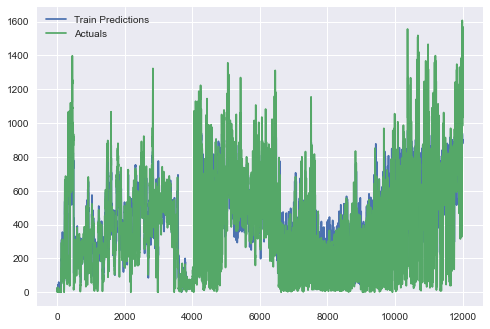

In [19]:
model = load_model('4H_Forecast/4H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(4,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 5 hours forecast

In [20]:
%%time

Trainer(5,6,12)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 5s 8ms/step - loss: 251666.8438 - mean_absolute_error: 411.5941 - val_loss: 363175.8438 - val_mean_absolute_error: 488.4432
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 2s 6ms/step - loss: 242570.8125 - mean_absolute_error: 400.6335 - val_loss: 349102.6875 - val_mean_absolute_error: 474.3175
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 2s 7ms/step - loss: 231559.2500 - mean_absolute_error: 388.0412 - val_loss: 337461.4375 - val_mean_absolute_error: 462.9493
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 2s 7ms/step - loss: 221654.7188 - mean_absolute_error: 377.0485 - val_loss: 325521.9688 - val_mean_absolute_error: 451.8442
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 2s 6ms/step - loss: 213204.7812 - mean_absolute_error: 367.8013 - val_loss: 315592.4375 - val_mean_absolute_error: 442.6345
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 2s 6ms/step - loss: 205126.6250 - mean_absolute_error: 359.0753 - val_loss: 305647.2812 - val_mean_absolute_error: 433.5673
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 2s 6ms/step - loss: 196931.0312 - mean_absolute_error: 350.3156 - val_loss: 295148.3438 - val_mean_absolute_error: 424.0387
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 2s 7ms/step - loss: 188438.6406 - mean_absolute_error: 341.2713 - val_loss: 284742.6250 - val_mean_absolute_error: 414.5577
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 180140.2656 - mean_absolute_error: 332.5386 - val_loss: 274349.9062 - val_mean_absolute_error: 405.0768
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 2s 7ms/step - loss: 171902.3906 - mean_absolute_error: 323.8028 - val_loss: 263953.9375 - val_mean_absolute_error: 395.6169
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 163788.4219 - mean_absolute_error: 315.1921 - val_loss: 253631.5781 - val_mean_absolute_error: 386.0959
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 155826.7656 - mean_absolute_error: 306.6992 - val_loss: 243440.0781 - val_mean_absolute_error: 376.6372
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 2s 7ms/step - loss: 148062.4531 - mean_absolute_error: 298.3148 - val_loss: 233453.0938 - val_mean_absolute_error: 367.3000
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 2s 7ms/step - loss: 140543.9844 - mean_absolute_error: 290.1903 - val_loss: 223660.0938 - val_mean_absolute_error: 358.0520
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 7ms/step - loss: 133324.0469 - mean_absolute_error: 282.2692 - val_loss: 214179.7031 - val_mean_absolute_error: 349.0791
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 126437.4062 - mean_absolute_error: 274.7404 - val_loss: 204988.9375 - val_mean_absolute_error: 340.3055
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 7ms/step - loss: 119884.0469 - mean_absolute_error: 267.5341 - val_loss: 196192.3281 - val_mean_absolute_error: 331.8419
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 2s 7ms/step - loss: 113699.8047 - mean_absolute_error: 260.5202 - val_loss: 187717.3594 - val_mean_absolute_error: 323.7771
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 107886.8672 - mean_absolute_error: 254.1476 - val_loss: 179717.9375 - val_mean_absolute_error: 316.0403
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 2s 7ms/step - loss: 102430.5156 - mean_absolute_error: 247.7436 - val_loss: 172029.4844 - val_mean_absolute_error: 308.5580
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 2s 6ms/step - loss: 97306.3594 - mean_absolute_error: 241.4253 - val_loss: 164661.0156 - val_mean_absolute_error: 301.2094
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 92554.5078 - mean_absolute_error: 235.4995 - val_loss: 157711.0469 - val_mean_absolute_error: 294.3998
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 2s 6ms/step - loss: 88157.5078 - mean_absolute_error: 230.0342 - val_loss: 151044.9375 - val_mean_absolute_error: 287.5344
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 2s 7ms/step - loss: 84081.5938 - mean_absolute_error: 224.1638 - val_loss: 144799.3594 - val_mean_absolute_error: 281.4054
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 80282.6016 - mean_absolute_error: 218.7530 - val_loss: 138728.5000 - val_mean_absolute_error: 275.0982
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 76660.6797 - mean_absolute_error: 213.2075 - val_loss: 132680.7500 - val_mean_absolute_error: 267.9854
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 2s 7ms/step - loss: 73388.8516 - mean_absolute_error: 208.1830 - val_loss: 127160.4922 - val_mean_absolute_error: 262.1863
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 2s 7ms/step - loss: 70380.9297 - mean_absolute_error: 203.3010 - val_loss: 121726.1953 - val_mean_absolute_error: 255.2654
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 2s 7ms/step - loss: 67634.1250 - mean_absolute_error: 198.5716 - val_loss: 116838.0391 - val_mean_absolute_error: 249.8893
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 65291.5859 - mean_absolute_error: 194.9207 - val_loss: 112595.4844 - val_mean_absolute_error: 245.8935
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 2s 7ms/step - loss: 63203.3516 - mean_absolute_error: 191.4270 - val_loss: 108245.1562 - val_mean_absolute_error: 240.0480
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 2s 7ms/step - loss: 61059.9688 - mean_absolute_error: 186.5826 - val_loss: 103716.0234 - val_mean_absolute_error: 233.6325
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 59022.0742 - mean_absolute_error: 182.7777 - val_loss: 99722.1719 - val_mean_absolute_error: 227.3598
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 57235.9766 - mean_absolute_error: 179.0122 - val_loss: 95777.2500 - val_mean_absolute_error: 222.6467
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 7ms/step - loss: 55697.7656 - mean_absolute_error: 175.9047 - val_loss: 92500.9297 - val_mean_absolute_error: 219.0294
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 54472.1211 - mean_absolute_error: 174.2580 - val_loss: 89573.5234 - val_mean_absolute_error: 215.1664
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 53432.7148 - mean_absolute_error: 172.5485 - val_loss: 87260.9141 - val_mean_absolute_error: 212.6740
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 52513.7812 - mean_absolute_error: 171.0778 - val_loss: 84918.6094 - val_mean_absolute_error: 210.1365
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 51587.3516 - mean_absolute_error: 169.1399 - val_loss: 82492.8828 - val_mean_absolute_error: 206.5535
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 50491.0742 - mean_absolute_error: 166.0562 - val_loss: 80691.4688 - val_mean_absolute_error: 203.6107
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 49659.4336 - mean_absolute_error: 164.6131 - val_loss: 78559.2656 - val_mean_absolute_error: 200.7508
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 48771.4648 - mean_absolute_error: 162.9228 - val_loss: 77598.0703 - val_mean_absolute_error: 199.0732
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 7ms/step - loss: 48118.9062 - mean_absolute_error: 162.1015 - val_loss: 75550.1719 - val_mean_absolute_error: 196.9970
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 47527.4766 - mean_absolute_error: 161.1357 - val_loss: 73787.1016 - val_mean_absolute_error: 195.2478
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 47018.7305 - mean_absolute_error: 160.5692 - val_loss: 71635.3438 - val_mean_absolute_error: 192.9627
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 2s 7ms/step - loss: 46676.0039 - mean_absolute_error: 159.8823 - val_loss: 70690.0234 - val_mean_absolute_error: 191.6059
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 46293.3555 - mean_absolute_error: 159.0300 - val_loss: 71882.7109 - val_mean_absolute_error: 192.7216
Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 45899.0391 - mean_absolute_error: 158.5702 - val_loss: 68603.9766 - val_mean_absolute_error: 189.7056
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 7ms/step - loss: 45586.6211 - mean_absolute_error: 158.1956 - val_loss: 68345.2031 - val_mean_absolute_error: 188.4904
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 7ms/step - loss: 45241.6680 - mean_absolute_error: 157.4074 - val_loss: 69415.3516 - val_mean_absolute_error: 189.7768
Epoch 51/100
376/376 [==============================] - 3s 7ms/step - loss: 45020.2305 - mean_absolute_error: 156.9232 - val_loss: 67271.9453 - val_mean_absolute_error: 187.0607
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 44747.3633 - mean_absolute_error: 156.3784 - val_loss: 65338.5547 - val_mean_absolute_error: 185.2836an_absolute_error: 155.8
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 44480.1758 - mean_absolute_error: 155.9889 - val_loss: 65160.3945 - val_mean_absolute_error: 184.5703
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 44258.2461 - mean_absolute_error: 155.7805 - val_loss: 65238.3867 - val_mean_absolute_error: 184.4097
Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 44077.0898 - mean_absolute_error: 155.2309 - val_loss: 64234.9805 - val_mean_absolute_error: 183.5613
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 43818.4531 - mean_absolute_error: 155.0540 - val_loss: 64509.8555 - val_mean_absolute_error: 183.5720
Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 43590.7461 - mean_absolute_error: 154.4609 - val_loss: 65119.6914 - val_mean_absolute_error: 184.0232
Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 43334.4375 - mean_absolute_error: 153.8345 - val_loss: 63124.0234 - val_mean_absolute_error: 181.3096
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 43121.6992 - mean_absolute_error: 153.3275 - val_loss: 63109.5820 - val_mean_absolute_error: 181.1319
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 7ms/step - loss: 42786.0078 - mean_absolute_error: 152.5530 - val_loss: 62453.0977 - val_mean_absolute_error: 180.5618
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 7ms/step - loss: 42665.4453 - mean_absolute_error: 152.5822 - val_loss: 60719.1133 - val_mean_absolute_error: 179.3754
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 2s 7ms/step - loss: 42580.2812 - mean_absolute_error: 152.1376 - val_loss: 61231.3164 - val_mean_absolute_error: 178.6255
Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 42318.8008 - mean_absolute_error: 151.6903 - val_loss: 59795.6523 - val_mean_absolute_error: 177.6127
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 42138.1250 - mean_absolute_error: 151.4560 - val_loss: 61170.1602 - val_mean_absolute_error: 178.3997
Epoch 65/100
376/376 [==============================] - 3s 7ms/step - loss: 41899.7930 - mean_absolute_error: 150.7635 - val_loss: 60146.1289 - val_mean_absolute_error: 177.0693
Epoch 66/100
376/376 [==============================] - 3s 7ms/step - loss: 41820.3906 - mean_absolute_error: 150.6455 - val_loss: 60494.6836 - val_mean_absolute_error: 177.2180
Epoch 67/100
376/376 [==============================] - 3s 7ms/step - loss: 41672.1641 - mean_absolute_error: 150.2966 - val_loss: 60914.4609 - val_mean_absolute_error: 177.7167
Epoch 68/100
376/376 [==============================] - 3s 7ms/step - loss: 41504.7969 - mean_absolute_error: 149.8590 - val_loss: 58382.6523 - val_mean_absolute_error: 175.6549
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 7ms/step - loss: 41247.4453 - mean_absolute_error: 149.2877 - val_loss: 59375.9180 - val_mean_absolute_error: 175.8736
Epoch 70/100
376/376 [==============================] - 3s 7ms/step - loss: 41051.7930 - mean_absolute_error: 148.7099 - val_loss: 58840.7109 - val_mean_absolute_error: 175.5078
Epoch 71/100
376/376 [==============================] - 3s 7ms/step - loss: 41064.6875 - mean_absolute_error: 148.8216 - val_loss: 60335.4375 - val_mean_absolute_error: 176.7568
Epoch 72/100
376/376 [==============================] - 3s 7ms/step - loss: 40855.9336 - mean_absolute_error: 148.5919 - val_loss: 61496.2148 - val_mean_absolute_error: 177.9179
Epoch 73/100
376/376 [==============================] - 3s 7ms/step - loss: 40683.7656 - mean_absolute_error: 148.1546 - val_loss: 57528.7031 - val_mean_absolute_error: 174.3368: 0s - loss: 40833.2031 - mean_absolute_error: 148.
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastM

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 7ms/step - loss: 40676.0273 - mean_absolute_error: 147.8805 - val_loss: 57791.4766 - val_mean_absolute_error: 173.8244
Epoch 75/100
376/376 [==============================] - 3s 7ms/step - loss: 40430.5000 - mean_absolute_error: 147.3523 - val_loss: 57940.8750 - val_mean_absolute_error: 173.5013
Epoch 76/100
376/376 [==============================] - 3s 7ms/step - loss: 40272.0938 - mean_absolute_error: 147.0822 - val_loss: 59893.6719 - val_mean_absolute_error: 175.5331
Epoch 77/100
376/376 [==============================] - 3s 8ms/step - loss: 40002.8945 - mean_absolute_error: 146.3201 - val_loss: 57725.2266 - val_mean_absolute_error: 173.6249
Epoch 78/100
376/376 [==============================] - 3s 7ms/step - loss: 39917.6758 - mean_absolute_error: 146.2220 - val_loss: 57501.7305 - val_mean_absolute_error: 172.9094
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 3s 7ms/step - loss: 39720.1328 - mean_absolute_error: 145.4832 - val_loss: 59570.7891 - val_mean_absolute_error: 174.8358
Epoch 80/100
376/376 [==============================] - 3s 7ms/step - loss: 39658.1914 - mean_absolute_error: 145.4973 - val_loss: 57000.4648 - val_mean_absolute_error: 172.6201
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 7ms/step - loss: 39593.9062 - mean_absolute_error: 145.3277 - val_loss: 57203.2891 - val_mean_absolute_error: 172.5028
Epoch 82/100
376/376 [==============================] - 3s 7ms/step - loss: 39348.3242 - mean_absolute_error: 144.9307 - val_loss: 55135.1641 - val_mean_absolute_error: 171.9489
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 2s 6ms/step - loss: 39575.3789 - mean_absolute_error: 145.1277 - val_loss: 56696.7227 - val_mean_absolute_error: 172.1613
Epoch 84/100
376/376 [==============================] - 2s 6ms/step - loss: 39231.1836 - mean_absolute_error: 144.4357 - val_loss: 57194.3164 - val_mean_absolute_error: 172.7734
Epoch 85/100
376/376 [==============================] - 2s 6ms/step - loss: 39064.1445 - mean_absolute_error: 144.3779 - val_loss: 56471.0430 - val_mean_absolute_error: 172.0915
Epoch 86/100
376/376 [==============================] - 2s 6ms/step - loss: 38792.7852 - mean_absolute_error: 143.5600 - val_loss: 55710.9102 - val_mean_absolute_error: 171.4183
Epoch 87/100
376/376 [==============================] - 3s 7ms/step - loss: 38753.1992 - mean_absolute_error: 143.3703 - val_loss: 56378.0742 - val_mean_absolute_error: 172.1320
Epoch 88/100
376/376 [==============================] - 3s 7ms/step - loss: 38840.3203 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 7ms/step - loss: 37559.8945 - mean_absolute_error: 140.3975 - val_loss: 56759.6250 - val_mean_absolute_error: 171.9601
Epoch 99/100
376/376 [==============================] - 3s 7ms/step - loss: 37546.1094 - mean_absolute_error: 140.6198 - val_loss: 55759.2500 - val_mean_absolute_error: 170.5018
Epoch 100/100
376/376 [==============================] - 3s 7ms/step - loss: 37423.6836 - mean_absolute_error: 140.3515 - val_loss: 57892.8438 - val_mean_absolute_error: 173.2637

-----------------------------------------------------------------------------------------------------------

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 520       
__

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 7ms/step - loss: 248836.0781 - mean_absolute_error: 408.0938 - val_loss: 359871.0312 - val_mean_absolute_error: 485.1476
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 242215.2656 - mean_absolute_error: 400.3310 - val_loss: 352161.8438 - val_mean_absolute_error: 477.4570
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 8ms/step - loss: 235893.3125 - mean_absolute_error: 393.0671 - val_loss: 344369.6875 - val_mean_absolute_error: 469.9037
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 7ms/step - loss: 229978.0625 - mean_absolute_error: 386.3666 - val_loss: 337444.9375 - val_mean_absolute_error: 463.2133
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 7ms/step - loss: 224217.6875 - mean_absolute_error: 379.9140 - val_loss: 330327.9375 - val_mean_absolute_error: 456.4108
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 218117.6094 - mean_absolute_error: 373.1559 - val_loss: 322647.5625 - val_mean_absolute_error: 449.1877
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 211792.4375 - mean_absolute_error: 366.2822 - val_loss: 314766.5312 - val_mean_absolute_error: 441.8740
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 204781.4062 - mean_absolute_error: 358.7142 - val_loss: 305703.6562 - val_mean_absolute_error: 433.6313
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 197581.6250 - mean_absolute_error: 350.9958 - val_loss: 296896.7812 - val_mean_absolute_error: 425.6502
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 190482.2656 - mean_absolute_error: 343.3783 - val_loss: 288055.2188 - val_mean_absolute_error: 417.5964
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 183381.9062 - mean_absolute_error: 335.8387 - val_loss: 279143.1250 - val_mean_absolute_error: 409.4670
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 7ms/step - loss: 176274.4062 - mean_absolute_error: 328.3081 - val_loss: 270188.5000 - val_mean_absolute_error: 401.3243
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 7ms/step - loss: 169176.2969 - mean_absolute_error: 320.6508 - val_loss: 261190.3125 - val_mean_absolute_error: 393.0980
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 162136.8906 - mean_absolute_error: 313.1484 - val_loss: 252238.6406 - val_mean_absolute_error: 384.8574
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 155207.5156 - mean_absolute_error: 305.6514 - val_loss: 243362.6406 - val_mean_absolute_error: 376.6229
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 7ms/step - loss: 148383.3281 - mean_absolute_error: 298.2793 - val_loss: 234559.2344 - val_mean_absolute_error: 368.3822
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 7ms/step - loss: 141724.1406 - mean_absolute_error: 290.9874 - val_loss: 225877.6875 - val_mean_absolute_error: 360.1620
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 7ms/step - loss: 135277.5312 - mean_absolute_error: 284.0221 - val_loss: 217435.0469 - val_mean_absolute_error: 352.2118
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 129083.3594 - mean_absolute_error: 277.2403 - val_loss: 209241.3281 - val_mean_absolute_error: 344.4746
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 123151.8203 - mean_absolute_error: 270.7297 - val_loss: 201312.8906 - val_mean_absolute_error: 336.9514
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 117474.1641 - mean_absolute_error: 264.4194 - val_loss: 193632.4219 - val_mean_absolute_error: 329.6682
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 112080.3906 - mean_absolute_error: 258.4625 - val_loss: 186235.7500 - val_mean_absolute_error: 322.6726
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 106976.0625 - mean_absolute_error: 252.8260 - val_loss: 179090.7500 - val_mean_absolute_error: 315.8344
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 102173.3906 - mean_absolute_error: 247.5551 - val_loss: 172364.7188 - val_mean_absolute_error: 309.4683
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 8ms/step - loss: 97678.9375 - mean_absolute_error: 242.1055 - val_loss: 165861.2656 - val_mean_absolute_error: 303.1222
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 93415.3438 - mean_absolute_error: 236.7847 - val_loss: 159519.8281 - val_mean_absolute_error: 296.6308
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 89361.2422 - mean_absolute_error: 231.4396 - val_loss: 153417.4844 - val_mean_absolute_error: 290.3205
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 7ms/step - loss: 85552.6719 - mean_absolute_error: 226.1057 - val_loss: 147671.2656 - val_mean_absolute_error: 284.6857
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 81960.0234 - mean_absolute_error: 220.8879 - val_loss: 142018.6250 - val_mean_absolute_error: 278.7812
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 8ms/step - loss: 78559.0391 - mean_absolute_error: 215.5319 - val_loss: 136366.7188 - val_mean_absolute_error: 272.2010
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 7ms/step - loss: 75367.0312 - mean_absolute_error: 210.5336 - val_loss: 131161.6250 - val_mean_absolute_error: 266.8432
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 7ms/step - loss: 72503.0625 - mean_absolute_error: 206.1997 - val_loss: 126127.6875 - val_mean_absolute_error: 260.9832
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 69778.1406 - mean_absolute_error: 201.5515 - val_loss: 121401.0859 - val_mean_absolute_error: 255.6109
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 7ms/step - loss: 67262.5469 - mean_absolute_error: 197.1149 - val_loss: 116788.4531 - val_mean_absolute_error: 250.3159
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 65043.7500 - mean_absolute_error: 193.6526 - val_loss: 112560.1641 - val_mean_absolute_error: 245.3275
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 7ms/step - loss: 62957.5000 - mean_absolute_error: 189.9143 - val_loss: 108417.8594 - val_mean_absolute_error: 239.7776
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 61076.8047 - mean_absolute_error: 186.4411 - val_loss: 104668.1484 - val_mean_absolute_error: 235.2421
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 7ms/step - loss: 59512.4688 - mean_absolute_error: 183.8965 - val_loss: 101525.7344 - val_mean_absolute_error: 231.3609
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 58137.2344 - mean_absolute_error: 181.4179 - val_loss: 98251.6719 - val_mean_absolute_error: 227.1849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 7ms/step - loss: 56860.1367 - mean_absolute_error: 178.8840 - val_loss: 95123.8516 - val_mean_absolute_error: 224.3321
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 55663.1875 - mean_absolute_error: 176.6319 - val_loss: 92466.9219 - val_mean_absolute_error: 220.5905
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 54722.0156 - mean_absolute_error: 175.1331 - val_loss: 90113.0859 - val_mean_absolute_error: 217.8978
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 7ms/step - loss: 53819.8203 - mean_absolute_error: 173.4928 - val_loss: 88151.2734 - val_mean_absolute_error: 216.3505
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 53139.0625 - mean_absolute_error: 172.5619 - val_loss: 86037.3984 - val_mean_absolute_error: 213.7286
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 52317.3750 - mean_absolute_error: 170.4530 - val_loss: 84174.1016 - val_mean_absolute_error: 210.8265
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 51607.0195 - mean_absolute_error: 168.7185 - val_loss: 82692.2422 - val_mean_absolute_error: 208.9427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 51005.5977 - mean_absolute_error: 167.7265 - val_loss: 80677.1172 - val_mean_absolute_error: 207.1546
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 50441.9102 - mean_absolute_error: 166.5206 - val_loss: 79188.3516 - val_mean_absolute_error: 204.9279
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 49750.1523 - mean_absolute_error: 165.0121 - val_loss: 78145.0469 - val_mean_absolute_error: 203.6241
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 49272.6133 - mean_absolute_error: 164.6567 - val_loss: 76793.1172 - val_mean_absolute_error: 202.2616
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 48948.8281 - mean_absolute_error: 164.1569 - val_loss: 75676.3750 - val_mean_absolute_error: 201.1455
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 48609.5273 - mean_absolute_error: 163.6096 - val_loss: 74838.2188 - val_mean_absolute_error: 200.8208
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 8ms/step - loss: 48310.6250 - mean_absolute_error: 163.1632 - val_loss: 74176.2344 - val_mean_absolute_error: 199.2463
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 48027.5352 - mean_absolute_error: 162.6365 - val_loss: 72923.0625 - val_mean_absolute_error: 198.1743
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 47751.6133 - mean_absolute_error: 162.0384 - val_loss: 72450.7812 - val_mean_absolute_error: 197.2129
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 47304.1406 - mean_absolute_error: 160.7915 - val_loss: 71192.9766 - val_mean_absolute_error: 195.5569
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 7ms/step - loss: 46867.0664 - mean_absolute_error: 159.5864 - val_loss: 70717.3125 - val_mean_absolute_error: 194.1418
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 46638.1211 - mean_absolute_error: 159.3568 - val_loss: 69828.4453 - val_mean_absolute_error: 193.1855
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 46359.9336 - mean_absolute_error: 158.7174 - val_loss: 69001.2109 - val_mean_absolute_error: 192.2944
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 46200.5859 - mean_absolute_error: 158.4044 - val_loss: 68696.0000 - val_mean_absolute_error: 191.6177
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 45964.8359 - mean_absolute_error: 157.8853 - val_loss: 67997.9531 - val_mean_absolute_error: 190.5323
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 9ms/step - loss: 45769.2656 - mean_absolute_error: 157.6172 - val_loss: 67112.8047 - val_mean_absolute_error: 189.7091
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 45546.1367 - mean_absolute_error: 157.2100 - val_loss: 67397.7422 - val_mean_absolute_error: 189.4554
Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 45293.2148 - mean_absolute_error: 156.3559 - val_loss: 65944.4297 - val_mean_absolute_error: 188.2766
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 45149.2773 - mean_absolute_error: 156.1953 - val_loss: 65600.5234 - val_mean_absolute_error: 187.7523
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 44964.8203 - mean_absolute_error: 156.0276 - val_loss: 65472.9727 - val_mean_absolute_error: 187.3641
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 44855.9453 - mean_absolute_error: 155.7958 - val_loss: 64935.1328 - val_mean_absolute_error: 186.7849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 44706.6836 - mean_absolute_error: 155.4905 - val_loss: 64941.0156 - val_mean_absolute_error: 186.4432
Epoch 70/100
376/376 [==============================] - 4s 9ms/step - loss: 44545.4805 - mean_absolute_error: 155.1496 - val_loss: 64204.0000 - val_mean_absolute_error: 186.3637
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 44448.9180 - mean_absolute_error: 155.1298 - val_loss: 64910.4414 - val_mean_absolute_error: 186.4101
Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 44270.5117 - mean_absolute_error: 154.8411 - val_loss: 63567.6680 - val_mean_absolute_error: 185.3638
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 5s 14ms/step - loss: 44078.9453 - mean_absolute_error: 154.1939 - val_loss: 63436.5820 - val_mean_absolute_error: 185.1133
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 3s 9ms/step - loss: 43824.1680 - mean_absolute_error: 153.9333 - val_loss: 63141.2852 - val_mean_absolute_error: 184.1544
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 43615.4375 - mean_absolute_error: 153.4092 - val_loss: 62782.2109 - val_mean_absolute_error: 184.0261
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 43445.3242 - mean_absolute_error: 153.1398 - val_loss: 62160.3203 - val_mean_absolute_error: 182.5517
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 43210.3828 - mean_absolute_error: 152.5919 - val_loss: 62233.5977 - val_mean_absolute_error: 182.6867
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 43048.2773 - mean_absolute_error: 152.1145 - val_loss: 61629.0781 - val_mean_absolute_error: 181.7061
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 4s 9ms/step - loss: 42846.3047 - mean_absolute_error: 151.7698 - val_loss: 61059.0625 - val_mean_absolute_error: 181.5399
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 42648.2734 - mean_absolute_error: 151.6236 - val_loss: 61235.8750 - val_mean_absolute_error: 181.5359
Epoch 81/100
376/376 [==============================] - 3s 8ms/step - loss: 42491.3984 - mean_absolute_error: 151.1180 - val_loss: 60562.6797 - val_mean_absolute_error: 180.8656
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 4s 12ms/step - loss: 42257.8398 - mean_absolute_error: 150.5865 - val_loss: 60993.7539 - val_mean_absolute_error: 181.0563
Epoch 83/100
376/376 [==============================] - 4s 10ms/step - loss: 42043.8203 - mean_absolute_error: 150.4597 - val_loss: 61014.9453 - val_mean_absolute_error: 180.5457
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 41883.9141 - mean_absolute_error: 150.1549 - val_loss: 60780.9180 - val_mean_absolute_error: 180.5851 loss: 42257.5156 - mean_abs
Epoch 85/100
376/376 [==============================] - 4s 11ms/step - loss: 41668.3320 - mean_absolute_error: 149.7072 - val_loss: 59924.1836 - val_mean_absolute_error: 180.2319
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 3s 8ms/step - loss: 41484.3984 - mean_absolute_error: 149.3214 - val_loss: 60136.8242 - val_mean_absolute_error: 179.6523
Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 41221.3555 - mean_absolute_error: 148.9040 - val_loss: 59788.2305 - val_mean_absolute_error: 178.9813
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 5s 14ms/step - loss: 41075.7852 - mean_absolute_error: 148.5042 - val_loss: 60681.7422 - val_mean_absolute_error: 179.86003.8555 - mean_abso
Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 40867.6797 - mean_absolute_error: 148.0738 - val_loss: 58818.2461 - val_mean_absolute_error: 178.4082
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 3s 8ms/step - loss: 40742.6875 - mean_absolute_error: 147.8652 - val_loss: 59164.8672 - val_mean_absolute_error: 179.0855
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 40558.8398 - mean_absolute_error: 147.6226 - val_loss: 58615.7188 - val_mean_absolute_error: 178.2201
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 9ms/step - loss: 40375.6094 - mean_absolute_error: 147.0931 - val_loss: 58950.2305 - val_mean_absolute_error: 178.5347
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 40243.5977 - mean_absolute_error: 146.5836 - val_loss: 59239.1484 - val_mean_absolute_error: 177.7220
Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 40017.4336 - mean_absolute_error: 146.4031 - val_loss: 58828.0469 - val_mean_absolute_error: 178.1125
Epoch 95/100
376/376 [==============================] - 4s 12ms/step - loss: 39848.8086 - mean_absolute_error: 145.9200 - val_loss: 58537.1953 - val_mean_absolute_error: 177.3490
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 39726.3945 - mean_absolute_error: 145.6062 - val_loss: 58839.0781 - val_mean_absolute_error: 177.3938
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 39552.7852 - mean_absolute_error: 145.2559 - val_loss: 58399.7852 - val_mean_absolute_error: 178.6788
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 39390.4922 - mean_absolute_error: 144.7993 - val_loss: 58433.3398 - val_mean_absolute_error: 177.4077
Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 39306.8398 - mean_absolute_error: 144.8147 - val_loss: 57751.6445 - val_mean_absolute_error: 175.9408
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 9ms/step - loss: 39103.5859 - mean_absolute_error: 144.2457 - val_loss: 57527.0664 - val_mean_absolute_error: 175.3421
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 9s 15ms/step - loss: 249447.2812 - mean_absolute_error: 409.2281 - val_loss: 360467.3750 - val_mean_absolute_error: 485.8914
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 240284.8281 - mean_absolute_error: 398.0451 - val_loss: 346604.8750 - val_mean_absolute_error: 471.8215
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 229183.7344 - mean_absolute_error: 385.4370 - val_loss: 333574.9062 - val_mean_absolute_error: 459.4459
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 7ms/step - loss: 218998.3906 - mean_absolute_error: 374.1377 - val_loss: 322016.7188 - val_mean_absolute_error: 448.5869
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 209955.8906 - mean_absolute_error: 364.1929 - val_loss: 311076.6875 - val_mean_absolute_error: 438.5035
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 200906.3750 - mean_absolute_error: 354.4520 - val_loss: 299839.8750 - val_mean_absolute_error: 428.2956
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 191840.1250 - mean_absolute_error: 344.7189 - val_loss: 288588.1875 - val_mean_absolute_error: 418.0580
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 182414.9844 - mean_absolute_error: 334.6600 - val_loss: 276345.0938 - val_mean_absolute_error: 406.8818
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 172913.3281 - mean_absolute_error: 324.5646 - val_loss: 264748.1875 - val_mean_absolute_error: 396.3519
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 163860.9531 - mean_absolute_error: 314.9354 - val_loss: 253327.0938 - val_mean_absolute_error: 385.8762
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 155047.4844 - mean_absolute_error: 305.4944 - val_loss: 242090.9062 - val_mean_absolute_error: 375.4292
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 10ms/step - loss: 146478.5625 - mean_absolute_error: 296.1468 - val_loss: 231077.7344 - val_mean_absolute_error: 365.0944
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 10ms/step - loss: 138231.9844 - mean_absolute_error: 287.1293 - val_loss: 220408.1406 - val_mean_absolute_error: 355.0736
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 130378.5156 - mean_absolute_error: 278.3611 - val_loss: 210143.0469 - val_mean_absolute_error: 345.3950
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 122941.7578 - mean_absolute_error: 270.1499 - val_loss: 200328.5156 - val_mean_absolute_error: 336.0693
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 115901.0781 - mean_absolute_error: 262.1237 - val_loss: 190745.6250 - val_mean_absolute_error: 327.0274
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 109161.8594 - mean_absolute_error: 254.8217 - val_loss: 181639.7812 - val_mean_absolute_error: 318.3721
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 12ms/step - loss: 102983.0781 - mean_absolute_error: 247.7007 - val_loss: 173116.6875 - val_mean_absolute_error: 310.2618
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 97273.6953 - mean_absolute_error: 240.9467 - val_loss: 164996.8125 - val_mean_absolute_error: 302.0440
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 91948.7031 - mean_absolute_error: 233.8955 - val_loss: 157266.3906 - val_mean_absolute_error: 294.2603
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 86613.4766 - mean_absolute_error: 226.7123 - val_loss: 148824.1250 - val_mean_absolute_error: 285.3308
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 8ms/step - loss: 81724.4688 - mean_absolute_error: 219.6480 - val_loss: 141650.7188 - val_mean_absolute_error: 277.9207
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 8ms/step - loss: 77452.4531 - mean_absolute_error: 213.5330 - val_loss: 134861.5000 - val_mean_absolute_error: 270.3138
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 73303.6953 - mean_absolute_error: 206.6340 - val_loss: 127660.7578 - val_mean_absolute_error: 261.4885
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 8ms/step - loss: 69484.8594 - mean_absolute_error: 200.1858 - val_loss: 121392.1328 - val_mean_absolute_error: 254.0115
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 66103.0312 - mean_absolute_error: 194.4540 - val_loss: 115605.0312 - val_mean_absolute_error: 246.9916
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 63227.8672 - mean_absolute_error: 189.9464 - val_loss: 110501.8125 - val_mean_absolute_error: 241.7937
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 60541.5859 - mean_absolute_error: 185.2261 - val_loss: 105268.9453 - val_mean_absolute_error: 234.4400
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 9ms/step - loss: 58004.4258 - mean_absolute_error: 180.6337 - val_loss: 100106.9922 - val_mean_absolute_error: 227.2566
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 55760.1211 - mean_absolute_error: 176.6820 - val_loss: 95642.5703 - val_mean_absolute_error: 221.9463
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 53911.0820 - mean_absolute_error: 173.4247 - val_loss: 91692.7031 - val_mean_absolute_error: 217.0702
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 52090.3008 - mean_absolute_error: 169.5186 - val_loss: 87759.6406 - val_mean_absolute_error: 211.6800
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 50414.4336 - mean_absolute_error: 166.3503 - val_loss: 85176.7188 - val_mean_absolute_error: 207.6433
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 8ms/step - loss: 48885.9102 - mean_absolute_error: 163.4947 - val_loss: 81433.1328 - val_mean_absolute_error: 203.4945
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 3s 9ms/step - loss: 47633.6016 - mean_absolute_error: 161.0311 - val_loss: 79112.5469 - val_mean_absolute_error: 200.5566
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 9ms/step - loss: 46464.1953 - mean_absolute_error: 158.8033 - val_loss: 77077.4375 - val_mean_absolute_error: 197.3770
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 45400.4453 - mean_absolute_error: 156.7981 - val_loss: 74486.1406 - val_mean_absolute_error: 194.9185
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 13ms/step - loss: 44374.9844 - mean_absolute_error: 154.7783 - val_loss: 72586.6094 - val_mean_absolute_error: 192.7683
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 11ms/step - loss: 43577.2227 - mean_absolute_error: 152.9628 - val_loss: 70868.0703 - val_mean_absolute_error: 190.6944
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 42730.6328 - mean_absolute_error: 151.2269 - val_loss: 69054.7188 - val_mean_absolute_error: 188.2744
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 9ms/step - loss: 42062.2148 - mean_absolute_error: 150.1908 - val_loss: 68067.4375 - val_mean_absolute_error: 186.9254
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 41518.0391 - mean_absolute_error: 148.8421 - val_loss: 67577.0000 - val_mean_absolute_error: 186.0462
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 12ms/step - loss: 40945.6836 - mean_absolute_error: 147.8249 - val_loss: 65460.2500 - val_mean_absolute_error: 185.6497
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 40534.0742 - mean_absolute_error: 147.3053 - val_loss: 65332.3750 - val_mean_absolute_error: 183.7440
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 40120.7383 - mean_absolute_error: 146.1054 - val_loss: 63268.5938 - val_mean_absolute_error: 182.2571
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 39718.6250 - mean_absolute_error: 145.4243 - val_loss: 63213.2539 - val_mean_absolute_error: 182.5705
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 39355.1289 - mean_absolute_error: 144.5020 - val_loss: 61873.7070 - val_mean_absolute_error: 180.6386
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 39022.1797 - mean_absolute_error: 143.8144 - val_loss: 62682.9844 - val_mean_absolute_error: 180.6876
Epoch 49/100
376/376 [==============================] - 4s 9ms/step - loss: 38822.7422 - mean_absolute_error: 143.1916 - val_loss: 60988.8398 - val_mean_absolute_error: 179.8742
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 38427.7656 - mean_absolute_error: 142.2384 - val_loss: 60772.4297 - val_mean_absolute_error: 178.8273
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 38103.2930 - mean_absolute_error: 141.6668 - val_loss: 60670.4297 - val_mean_absolute_error: 178.2460
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 11ms/step - loss: 37919.3828 - mean_absolute_error: 141.1298 - val_loss: 59758.2070 - val_mean_absolute_error: 178.3265
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 37583.0547 - mean_absolute_error: 140.0579 - val_loss: 58555.6523 - val_mean_absolute_error: 175.9727
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 12ms/step - loss: 37361.3711 - mean_absolute_error: 139.4704 - val_loss: 58858.9766 - val_mean_absolute_error: 176.0368
Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 37053.9141 - mean_absolute_error: 138.9131 - val_loss: 59189.7422 - val_mean_absolute_error: 175.3564
Epoch 56/100
376/376 [==============================] - 4s 9ms/step - loss: 36837.5742 - mean_absolute_error: 138.3749 - val_loss: 58156.9688 - val_mean_absolute_error: 175.8823
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 36666.3984 - mean_absolute_error: 137.7870 - val_loss: 57868.8203 - val_mean_absolute_error: 174.4405
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 36528.2031 - mean_absolute_error: 137.6004 - val_loss: 59643.5078 - val_mean_absolute_error: 175.5010
Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 36283.8828 - mean_absolute_error: 136.9224 - val_loss: 58080.3750 - val_mean_absolute_error: 175.7402
Epoch 60/100
376/376 [==============================] - 4s 12ms/step - loss: 36169.2422 - mean_absolute_error: 136.6367 - val_loss: 58123.3203 - val_mean_absolute_error: 175.2896
Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 35950.1758 - mean_absolute_error: 135.8195 - val_loss: 57984.1992 - val_mean_absolute_error: 174.4186
Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 35830.6836 - mean_absolute_error: 135.7506 - val_loss: 58501.1484 - val_mean_absolute_error: 174.4633
Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 35778.4141 - mean_absolute_er

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 35565.1875 - mean_absolute_error: 134.8987 - val_loss: 56215.5312 - val_mean_absolute_error: 173.7373
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 12ms/step - loss: 35480.6445 - mean_absolute_error: 134.7860 - val_loss: 57320.3203 - val_mean_absolute_error: 172.8313
Epoch 66/100
376/376 [==============================] - 4s 10ms/step - loss: 35339.4492 - mean_absolute_error: 134.0745 - val_loss: 56103.7344 - val_mean_absolute_error: 171.7833
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 35101.8828 - mean_absolute_error: 133.8796 - val_loss: 56902.9492 - val_mean_absolute_error: 172.5561
Epoch 68/100
376/376 [==============================] - 4s 12ms/step - loss: 34981.9336 - mean_absolute_error: 133.0282 - val_loss: 57152.4883 - val_mean_absolute_error: 175.0571
Epoch 69/100
376/376 [==============================] - 4s 9ms/step - loss: 34873.8867 - mean_absolute_error: 133.0313 - val_loss: 57714.4336 - val_mean_absolute_error: 173.4805
Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 34719.4922 - mean_absolute_error: 132.3989 - val_loss: 58202.7227 - val_mean_absolute_error: 171.5161
Epoch 71/100
376/376 [==============================] - 3s 8ms/step - loss: 34656.2891 - mean_absolute_error: 132.3384 - val_loss: 55633.7773 - val_mean_absolute_error: 171.9426
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 34618.1016 - mean_absolute_error: 131.9023 - val_loss: 59213.3945 - val_mean_absolute_error: 174.4870
Epoch 73/100
376/376 [==============================] - 3s 9ms/step - loss: 34752.4727 - mean_absolute_error: 132.2720 - val_loss: 57587.8008 - val_mean_absolute_error: 172.3905
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 34561.0312 - mean_absolute_error: 132.0183 - val_loss: 56561.9648 - val_mean_absolute_error: 171.2880l
Epoch 75/100
376/376 [==============================] - 4s 9ms/step - loss: 34386.0273 - mean_absolute_error: 131.4000 - val_loss: 58957.6797 - val_mean_absolute_error: 172.4910
Epoch 76/100
376/376 [==============================] - 7s 18ms/step - loss: 34193.1602 - mean_absolute_error: 130.7625 - val_loss: 57219.5312 - val_mean_absolute_error: 171.0361
Epoch 77/100
376/376 [==============================] - 4s 9ms/step - loss: 34176.2500 - mean_absolute_erro

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 5s 13ms/step - loss: 33539.2773 - mean_absolute_error: 129.3271 - val_loss: 56843.3555 - val_mean_absolute_error: 169.9662
Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 33476.5859 - mean_absolute_error: 129.0092 - val_loss: 55514.8594 - val_mean_absolute_error: 170.8462
Epoch 87/100
376/376 [==============================] - 4s 9ms/step - loss: 33438.3008 - mean_absolute_error: 128.8448 - val_loss: 56570.4883 - val_mean_absolute_error: 174.5500
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 33289.6680 - mean_absolute_error: 128.2777 - val_loss: 55997.8203 - val_mean_absolute_error: 169.9051
Epoch 89/100
376/376 [==============================] - 3s 9ms/step - loss: 33245.8398 - mean_absolute_error: 128.3070 - val_loss: 55381.7734 - val_mean_absolute_error: 172.4975
Epoch 90/100
376/376 [==============================] - 4s 9ms/step - loss: 33136.1797 - mean_absolute_error

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 32978.8281 - mean_absolute_error: 127.5098 - val_loss: 54135.4492 - val_mean_absolute_error: 168.5361
Epoch 94/100
376/376 [==============================] - 4s 10ms/step - loss: 32927.5273 - mean_absolute_error: 127.5886 - val_loss: 54231.1055 - val_mean_absolute_error: 167.2548
Epoch 95/100
376/376 [==============================] - 3s 9ms/step - loss: 32858.8398 - mean_absolute_error: 127.5068 - val_loss: 54904.5977 - val_mean_absolute_error: 168.1381
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 32825.8828 - mean_absolute_error: 127.1864 - val_loss: 54731.9180 - val_mean_absolute_error: 167.2593
Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 32821.6836 - mean_absolute_error: 127.1186 - val_loss: 54995.2422 - val_mean_absolute_error: 167.6169
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 32646.7031 - mean_absolute_error

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 10s 16ms/step - loss: 252741.1719 - mean_absolute_error: 412.9042 - val_loss: 366418.6562 - val_mean_absolute_error: 492.0504
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 12ms/step - loss: 249305.6406 - mean_absolute_error: 408.7048 - val_loss: 360217.6875 - val_mean_absolute_error: 485.6943
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 242667.7656 - mean_absolute_error: 400.7884 - val_loss: 351001.4375 - val_mean_absolute_error: 476.4064
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 235199.9531 - mean_absolute_error: 392.2681 - val_loss: 342815.5000 - val_mean_absolute_error: 468.4085
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 228503.4531 - mean_absolute_error: 384.7002 - val_loss: 334875.0000 - val_mean_absolute_error: 460.7680
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 221878.5469 - mean_absolute_error: 377.2886 - val_loss: 326506.7500 - val_mean_absolute_error: 452.7874
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 214741.7031 - mean_absolute_error: 369.4502 - val_loss: 317537.6562 - val_mean_absolute_error: 444.4244
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 11ms/step - loss: 207319.6719 - mean_absolute_error: 361.4321 - val_loss: 308477.5312 - val_mean_absolute_error: 436.1378
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 9ms/step - loss: 199886.7812 - mean_absolute_error: 353.4087 - val_loss: 299233.0938 - val_mean_absolute_error: 427.7418
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 9ms/step - loss: 192323.6562 - mean_absolute_error: 345.2486 - val_loss: 289789.0938 - val_mean_absolute_error: 419.1484
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 184665.8906 - mean_absolute_error: 337.0669 - val_loss: 280191.8438 - val_mean_absolute_error: 410.3933
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 176978.9062 - mean_absolute_error: 328.8084 - val_loss: 270529.8438 - val_mean_absolute_error: 401.5990
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 169299.3750 - mean_absolute_error: 320.6312 - val_loss: 260810.2500 - val_mean_absolute_error: 392.7189
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 10ms/step - loss: 161673.1406 - mean_absolute_error: 312.4323 - val_loss: 251102.8438 - val_mean_absolute_error: 383.7646
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 154138.6094 - mean_absolute_error: 304.2307 - val_loss: 241514.9375 - val_mean_absolute_error: 374.9083
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 146672.4844 - mean_absolute_error: 295.8526 - val_loss: 231757.9688 - val_mean_absolute_error: 365.7777
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 9ms/step - loss: 139218.6875 - mean_absolute_error: 287.5120 - val_loss: 222212.8281 - val_mean_absolute_error: 356.7601
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 132121.2031 - mean_absolute_error: 279.5021 - val_loss: 212966.8750 - val_mean_absolute_error: 347.9744
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 125250.3438 - mean_absolute_error: 271.7339 - val_loss: 203409.4375 - val_mean_absolute_error: 338.9914
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 9ms/step - loss: 118197.3359 - mean_absolute_error: 263.5704 - val_loss: 194442.9062 - val_mean_absolute_error: 330.4849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 111874.4297 - mean_absolute_error: 256.3339 - val_loss: 186064.2656 - val_mean_absolute_error: 322.5511
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 106029.3984 - mean_absolute_error: 249.6465 - val_loss: 178071.1719 - val_mean_absolute_error: 314.7958
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 100542.0469 - mean_absolute_error: 243.1228 - val_loss: 170275.5156 - val_mean_absolute_error: 306.8987
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 95063.1953 - mean_absolute_error: 236.1713 - val_loss: 162315.8438 - val_mean_absolute_error: 298.6699
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 89916.6719 - mean_absolute_error: 229.2738 - val_loss: 154787.1875 - val_mean_absolute_error: 290.8591
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 85139.8828 - mean_absolute_error: 222.9463 - val_loss: 147911.6250 - val_mean_absolute_error: 284.0919
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 80727.8438 - mean_absolute_error: 216.6535 - val_loss: 141329.3125 - val_mean_absolute_error: 277.0721
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 13ms/step - loss: 76602.5000 - mean_absolute_error: 210.4505 - val_loss: 134826.7188 - val_mean_absolute_error: 269.6678
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 72757.5078 - mean_absolute_error: 204.7263 - val_loss: 128616.7734 - val_mean_absolute_error: 262.4542
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 11ms/step - loss: 69093.6328 - mean_absolute_error: 199.0385 - val_loss: 122603.9609 - val_mean_absolute_error: 254.8961
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 9ms/step - loss: 65615.3906 - mean_absolute_error: 193.0046 - val_loss: 117052.0469 - val_mean_absolute_error: 248.5841
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 62491.2031 - mean_absolute_error: 187.9262 - val_loss: 111821.2422 - val_mean_absolute_error: 241.7657 loss: 63184.9844 - mean_abso
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 9ms/step - loss: 59531.8359 - mean_absolute_error: 182.7767 - val_loss: 106666.0000 - val_mean_absolute_error: 235.3097
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 9ms/step - loss: 56949.3164 - mean_absolute_error: 178.4682 - val_loss: 101726.7031 - val_mean_absolute_error: 228.6724
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 15ms/step - loss: 54659.8555 - mean_absolute_error: 174.4877 - val_loss: 97586.9688 - val_mean_absolute_error: 223.2443
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 52513.9727 - mean_absolute_error: 170.4608 - val_loss: 93345.3750 - val_mean_absolute_error: 217.9242
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 50718.3672 - mean_absolute_error: 167.0766 - val_loss: 91017.8984 - val_mean_absolute_error: 213.7274
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 49116.8242 - mean_absolute_error: 164.5718 - val_loss: 86524.0703 - val_mean_absolute_error: 209.3787
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 12ms/step - loss: 47569.9180 - mean_absolute_error: 160.8736 - val_loss: 83658.1016 - val_mean_absolute_error: 205.2697
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 46212.2578 - mean_absolute_error: 158.0879 - val_loss: 79675.2500 - val_mean_absolute_error: 199.6791
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 44997.1289 - mean_absolute_error: 155.6155 - val_loss: 77910.7656 - val_mean_absolute_error: 197.9003
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 43859.7773 - mean_absolute_error: 153.5738 - val_loss: 75080.1406 - val_mean_absolute_error: 194.9587
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 42908.5898 - mean_absolute_error: 151.7433 - val_loss: 73788.9297 - val_mean_absolute_error: 192.6012
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 41899.2617 - mean_absolute_error: 149.4011 - val_loss: 71400.1953 - val_mean_absolute_error: 189.8675
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 41042.4883 - mean_absolute_error: 147.5365 - val_loss: 69592.5859 - val_mean_absolute_error: 187.8578
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 11ms/step - loss: 40317.9414 - mean_absolute_error: 145.7271 - val_loss: 67481.0625 - val_mean_absolute_error: 185.1980
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 39708.6602 - mean_absolute_error: 144.3616 - val_loss: 67636.3906 - val_mean_absolute_error: 184.5572
Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 39117.4102 - mean_absolute_error: 143.1056 - val_loss: 66009.0469 - val_mean_absolute_error: 182.9979
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 12ms/step - loss: 38626.7773 - mean_absolute_error: 141.9818 - val_loss: 64463.1953 - val_mean_absolute_error: 181.2378
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 38165.8242 - mean_absolute_error: 140.9520 - val_loss: 64175.7148 - val_mean_absolute_error: 180.6047
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 37949.5391 - mean_absolute_error: 140.6157 - val_loss: 63781.6133 - val_mean_absolute_error: 179.9594
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 37548.1523 - mean_absolute_error: 139.4115 - val_loss: 63469.0938 - val_mean_absolute_error: 178.6114
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 37234.6641 - mean_absolute_error: 138.5302 - val_loss: 63909.7617 - val_mean_absolute_error: 178.7087
Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 36983.3945 - mean_absolute_error: 137.9566 - val_loss: 60409.2695 - val_mean_absolute_error: 176.1822
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 9ms/step - loss: 36730.2227 - mean_absolute_error: 137.3636 - val_loss: 60656.3594 - val_mean_absolute_error: 175.5243
Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 36531.9258 - mean_absolute_error: 136.7504 - val_loss: 60326.6992 - val_mean_absolute_error: 174.9162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 36283.6641 - mean_absolute_error: 136.3139 - val_loss: 58383.9219 - val_mean_absolute_error: 173.6951
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 36091.5391 - mean_absolute_error: 135.7838 - val_loss: 58039.4531 - val_mean_absolute_error: 172.7798
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 35962.2695 - mean_absolute_error: 135.2518 - val_loss: 57746.1758 - val_mean_absolute_error: 172.2642
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 35682.7969 - mean_absolute_error: 134.6603 - val_loss: 57920.6836 - val_mean_absolute_error: 173.2699
Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 35519.5039 - mean_absolute_error: 134.5113 - val_loss: 56822.2656 - val_mean_absolute_error: 172.1451
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 11ms/step - loss: 35384.7812 - mean_absolute_error: 134.0940 - val_loss: 57143.8008 - val_mean_absolute_error: 171.5088
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 35245.4688 - mean_absolute_error: 133.6382 - val_loss: 56930.1445 - val_mean_absolute_error: 172.9942
Epoch 64/100
376/376 [==============================] - 3s 9ms/step - loss: 34845.0742 - mean_absolute_error: 132.9343 - val_loss: 56646.7695 - val_mean_absolute_error: 170.0108
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 34666.8242 - mean_absolute_error: 132.2160 - val_loss: 56540.6133 - val_mean_absolute_error: 170.9035
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 34530.7461 - mean_absolute_error: 132.2832 - val_loss: 56907.5977 - val_mean_absolute_error: 171.0220
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 34409.1602 - mean_absolute_error: 131.8476 - val_loss: 54752.7305 - val_mean_absolute_error: 170.0673
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 34354.8672 - mean_absolute_error: 131.5102 - val_loss: 56273.3320 - val_mean_absolute_error: 172.3068
Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 34183.9609 - mean_absolute_error: 131.4400 - val_loss: 55286.8867 - val_mean_absolute_error: 169.7321
Epoch 70/100
376/376 [==============================] - 5s 12ms/step - loss: 34094.3281 - mean_absolute_error: 130.9398 - val_loss: 54913.9375 - val_mean_absolute_error: 169.8210
Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 34015.6758 - mean_absolute_error: 130.7303 - val_loss: 55255.3672 - val_mean_absolute_error: 169.0007: 0s - loss: 34363.1875 - mean_absolute_error: 
Epoch 72/100
376/376 [==============================] - 3s 9ms/step - loss: 33858.0742 - mean_absolute_error: 130.3369 - val_loss: 55074.1914 - val_mean_absolute_error: 168.9963
Epoch 73/100
376/376 [==============================] - 3s 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 33585.7773 - mean_absolute_error: 129.5598 - val_loss: 53792.5703 - val_mean_absolute_error: 165.8126
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 33393.5039 - mean_absolute_error: 128.9974 - val_loss: 53713.8945 - val_mean_absolute_error: 167.6279
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 33372.2539 - mean_absolute_error: 128.9764 - val_loss: 54455.9258 - val_mean_absolute_error: 167.4735
Epoch 79/100
376/376 [==============================] - 3s 9ms/step - loss: 33352.0430 - mean_absolute_error: 128.9334 - val_loss: 53602.2617 - val_mean_absolute_error: 167.1541
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 33381.7812 - mean_absolute_error: 128.8826 - val_loss: 53401.7617 - val_mean_absolute_error: 167.0724
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 33056.7734 - mean_absolute_error: 127.9206 - val_loss: 55015.8555 - val_mean_absolute_error: 167.6980
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 33134.8047 - mean_absolute_error: 128.2365 - val_loss: 53988.9922 - val_mean_absolute_error: 165.7802
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 32969.1758 - mean_absolute_error: 127.5432 - val_loss: 52476.0469 - val_mean_absolute_error: 165.1352
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 4s 12ms/step - loss: 32931.4883 - mean_absolute_error: 127.5919 - val_loss: 53916.3516 - val_mean_absolute_error: 166.0868
Epoch 85/100
376/376 [==============================] - 4s 10ms/step - loss: 32986.1484 - mean_absolute_error: 127.8683 - val_loss: 53571.5000 - val_mean_absolute_error: 168.3755
Epoch 86/100
376/376 [==============================] - 5s 12ms/step - loss: 32732.2969 - mean_absolute_error: 126.9761 - val_loss: 53701.9766 - val_mean_absolute_error: 166.2304
Epoch 87/100
376/376 [==============================] - 4s 9ms/step - loss: 32700.6250 - mean_absolute_error: 127.0180 - val_loss: 52839.4609 - val_mean_absolute_error: 166.8634
Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 32635.7617 - mean_absolute_error: 126.7951 - val_loss: 53220.7656 - val_mean_absolute_error: 169.0536
Epoch 89/100
376/376 [==============================] - 4s 9ms/step - loss: 32719.0039 - mean_absolute_err

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 32522.2422 - mean_absolute_error: 126.3198 - val_loss: 53285.1562 - val_mean_absolute_error: 169.1144
Epoch 93/100
376/376 [==============================] - 4s 10ms/step - loss: 32377.3418 - mean_absolute_error: 126.0641 - val_loss: 51729.0430 - val_mean_absolute_error: 164.0816
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 32320.5898 - mean_absolute_error: 125.7634 - val_loss: 51920.7148 - val_mean_absolute_error: 163.9244
Epoch 95/100
376/376 [==============================] - 4s 11ms/step - loss: 32374.5273 - mean_absolute_error: 126.1103 - val_loss: 54023.4688 - val_mean_absolute_error: 167.1681
Epoch 96/100
376/376 [==============================] - 4s 11ms/step - loss: 32233.2148 - mean_absolute_error: 125.4893 - val_loss: 52247.9727 - val_mean_absolute_error: 164.4633
Epoch 97/100
376/376 [==============================] - 4s 11ms/step - loss: 32144.1172 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 7s 11ms/step - loss: 250715.5781 - mean_absolute_error: 410.4608 - val_loss: 361303.7500 - val_mean_absolute_error: 486.8008
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 240504.7969 - mean_absolute_error: 398.1102 - val_loss: 343554.5625 - val_mean_absolute_error: 468.7410
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 223992.2188 - mean_absolute_error: 379.4561 - val_loss: 323903.8125 - val_mean_absolute_error: 450.0912
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 209762.8125 - mean_absolute_error: 363.9200 - val_loss: 308780.1250 - val_mean_absolute_error: 436.3870
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 198412.9844 - mean_absolute_error: 351.6050 - val_loss: 295167.8438 - val_mean_absolute_error: 423.9958
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 187475.7344 - mean_absolute_error: 339.8969 - val_loss: 281714.1562 - val_mean_absolute_error: 411.7048
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 176699.4531 - mean_absolute_error: 328.3018 - val_loss: 268378.8125 - val_mean_absolute_error: 399.5445
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 12ms/step - loss: 166119.3906 - mean_absolute_error: 316.8713 - val_loss: 255119.7031 - val_mean_absolute_error: 387.3559
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 11ms/step - loss: 155808.9219 - mean_absolute_error: 305.6677 - val_loss: 242132.8906 - val_mean_absolute_error: 375.2909
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 12ms/step - loss: 145529.3438 - mean_absolute_error: 294.4834 - val_loss: 228849.6094 - val_mean_absolute_error: 362.7734
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 135817.5625 - mean_absolute_error: 283.5767 - val_loss: 216544.8125 - val_mean_absolute_error: 351.1824
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 12ms/step - loss: 126706.9297 - mean_absolute_error: 273.2732 - val_loss: 204780.3125 - val_mean_absolute_error: 339.9646
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 11ms/step - loss: 118259.8672 - mean_absolute_error: 263.4153 - val_loss: 193697.9688 - val_mean_absolute_error: 329.3572
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 110406.6094 - mean_absolute_error: 254.2978 - val_loss: 183263.3906 - val_mean_absolute_error: 319.4384
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 13ms/step - loss: 103273.6953 - mean_absolute_error: 246.1173 - val_loss: 173562.4688 - val_mean_absolute_error: 310.3291
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 96536.9141 - mean_absolute_error: 237.8204 - val_loss: 164208.7812 - val_mean_absolute_error: 301.3692
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 10ms/step - loss: 90342.5000 - mean_absolute_error: 229.7285 - val_loss: 155473.5156 - val_mean_absolute_error: 292.64831 - me
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 11ms/step - loss: 84664.9297 - mean_absolute_error: 222.0713 - val_loss: 147417.0156 - val_mean_absolute_error: 284.6303
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 12ms/step - loss: 79156.9531 - mean_absolute_error: 213.7763 - val_loss: 138786.7969 - val_mean_absolute_error: 274.8327
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 73934.2500 - mean_absolute_error: 206.1224 - val_loss: 131191.0781 - val_mean_absolute_error: 265.8615
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 69388.9922 - mean_absolute_error: 199.1193 - val_loss: 124006.3984 - val_mean_absolute_error: 258.0437
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 65352.7812 - mean_absolute_error: 192.1281 - val_loss: 117711.5078 - val_mean_absolute_error: 250.9134
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 61861.9883 - mean_absolute_error: 186.1544 - val_loss: 111671.3594 - val_mean_absolute_error: 243.7140
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 58857.5508 - mean_absolute_error: 181.0479 - val_loss: 105784.3594 - val_mean_absolute_error: 235.4531
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 9s 24ms/step - loss: 56232.5469 - mean_absolute_error: 176.0993 - val_loss: 100491.2812 - val_mean_absolute_error: 229.3398
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 53813.9727 - mean_absolute_error: 171.7952 - val_loss: 95658.8281 - val_mean_absolute_error: 223.2368
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 11ms/step - loss: 51726.6445 - mean_absolute_error: 168.1275 - val_loss: 91278.8438 - val_mean_absolute_error: 217.5537
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 11ms/step - loss: 49996.6562 - mean_absolute_error: 164.7653 - val_loss: 87463.9219 - val_mean_absolute_error: 212.8583
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 48514.4141 - mean_absolute_error: 162.2906 - val_loss: 84471.7500 - val_mean_absolute_error: 209.2671
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 47169.7109 - mean_absolute_error: 159.8816 - val_loss: 81292.0938 - val_mean_absolute_error: 205.4201
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 45987.2852 - mean_absolute_error: 157.6369 - val_loss: 78814.9375 - val_mean_absolute_error: 202.4090
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 44980.3906 - mean_absolute_error: 155.9414 - val_loss: 75718.0625 - val_mean_absolute_error: 199.3643
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 43761.3711 - mean_absolute_error: 153.6120 - val_loss: 74718.5625 - val_mean_absolute_error: 197.3851
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 11ms/step - loss: 42683.6992 - mean_absolute_error: 151.3421 - val_loss: 71844.5703 - val_mean_absolute_error: 193.6882
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 41864.2266 - mean_absolute_error: 149.6542 - val_loss: 71085.1406 - val_mean_absolute_error: 192.5210
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 12ms/step - loss: 41071.5156 - mean_absolute_error: 148.1313 - val_loss: 68658.8594 - val_mean_absolute_error: 189.1711te_error:
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 9ms/step - loss: 40338.1445 - mean_absolute_error: 146.4070 - val_loss: 68214.7422 - val_mean_absolute_error: 188.1155
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 39682.5078 - mean_absolute_error: 145.3164 - val_loss: 65221.1484 - val_mean_absolute_error: 184.6232
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 12ms/step - loss: 39255.6992 - mean_absolute_error: 144.4730 - val_loss: 64217.4648 - val_mean_absolute_error: 183.2444
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 38727.6328 - mean_absolute_error: 143.1518 - val_loss: 63856.5039 - val_mean_absolute_error: 182.6066
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 38237.0625 - mean_absolute_error: 141.8835 - val_loss: 62449.1953 - val_mean_absolute_error: 181.2177
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 37890.6016 - mean_absolute_error: 141.2770 - val_loss: 61475.6523 - val_mean_absolute_error: 179.2588
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 37510.0586 - mean_absolute_error: 140.1747 - val_loss: 60985.5508 - val_mean_absolute_error: 178.6208693
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 10ms/step - loss: 37193.6484 - mean_absolute_error: 139.2854 - val_loss: 60355.5625 - val_mean_absolute_error: 177.3897
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 11ms/step - loss: 36955.0703 - mean_absolute_error: 138.7177 - val_loss: 58686.4297 - val_mean_absolute_error: 175.8752
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 36515.8203 - mean_absolute_error: 137.0475 - val_loss: 59200.1953 - val_mean_absolute_error: 175.6902
Epoch 47/100
376/376 [==============================] - 6s 15ms/step - loss: 36267.3555 - mean_absolute_error: 136.6156 - val_loss: 59241.0078 - val_mean_absolute_error: 174.8355
Epoch 48/100
376/376 [==============================] - 5s 12ms/step - loss: 35931.2812 - mean_absolute_error: 135.8051 - val_loss: 58795.2656 - val_mean_absolute_error: 174.7341
Epoch 49/100
376/376 [==============================] - 4s 11ms/step - loss: 36045.0156 - mean_absolute_error: 135.7372 - val_loss: 58221.2109 - val_mean_absolute_error: 173.5079
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 5s 12ms/step - loss: 35625.1992 - mean_absolute_error: 134.7721 - val_loss: 56496.0000 - val_mean_absolute_error: 172.6522
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 35533.6094 - mean_absolute_error: 134.7961 - val_loss: 58290.7031 - val_mean_absolute_error: 173.5035
Epoch 52/100
376/376 [==============================] - 4s 11ms/step - loss: 35390.9648 - mean_absolute_error: 134.4262 - val_loss: 56778.5273 - val_mean_absolute_error: 171.5908
Epoch 53/100
376/376 [==============================] - 6s 16ms/step - loss: 35182.6562 - mean_absolute_error: 133.6855 - val_loss: 58518.5898 - val_mean_absolute_error: 173.6111: 1s - loss: 35015.5352 - mea
Epoch 54/100
376/376 [==============================] - 5s 13ms/step - loss: 35074.2109 - mean_absolute_error: 133.5058 - val_loss: 56127.4219 - val_mean_absolute_error: 170.1279
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 11ms/step - loss: 34960.7266 - mean_absolute_error: 132.8281 - val_loss: 55393.9258 - val_mean_absolute_error: 169.1267
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 34842.3672 - mean_absolute_error: 132.6013 - val_loss: 55694.6602 - val_mean_absolute_error: 170.2821
Epoch 57/100
376/376 [==============================] - 4s 10ms/step - loss: 34614.7734 - mean_absolute_error: 132.3951 - val_loss: 55095.4297 - val_mean_absolute_error: 169.5714
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 34544.3281 - mean_absolute_error: 132.0356 - val_loss: 56047.7734 - val_mean_absolute_error: 169.7043
Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 34336.4453 - mean_absolute_error: 131.4353 - val_loss: 55120.6172 - val_mean_absolute_error: 170.1328
Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 34360.7812 - mean_absolute_error: 131.6339 - val_loss: 55444.9648 - val_mean_absolute_error: 170.1085
Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 34107.7227 - mean_absolute_error: 131.0600 - val_loss: 54795.6055 - val_mean_absolute_error: 169.1291
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 12ms/step - loss: 33981.8867 - mean_absolute_error: 130.6091 - val_loss: 54856.9766 - val_mean_absolute_error: 168.7372
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 34007.6914 - mean_absolute_error: 130.5168 - val_loss: 54741.4531 - val_mean_absolute_error: 167.3529
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 33879.4141 - mean_absolute_error: 130.3039 - val_loss: 54039.0391 - val_mean_absolute_error: 167.7563
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 10ms/step - loss: 33773.5859 - mean_absolute_error: 129.9080 - val_loss: 54138.9570 - val_mean_absolute_error: 169.4752
Epoch 66/100
376/376 [==============================] - 4s 9ms/step - loss: 33690.0352 - mean_absolute_error: 129.8449 - val_loss: 54114.4961 - val_mean_absolute_error: 167.3337
Epoch 67/100
376/376 [==============================] - 4s 10ms/step - loss: 33689.5898 - mean_absolute_error: 129.8919 - val_loss: 55001.8125 - val_mean_absolute_error: 168.3928
Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 33468.4062 - mean_absolute_error: 129.1866 - val_loss: 55030.7305 - val_mean_absolute_error: 169.2415
Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 33337.6875 - mean_absolute_error: 128.7211 - val_loss: 55550.2930 - val_mean_absolute_error: 168.8291
Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 33147.8789 - mean_absolute_er

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 33178.1484 - mean_absolute_error: 128.4280 - val_loss: 55101.4258 - val_mean_absolute_error: 167.8438
Epoch 72/100
376/376 [==============================] - 4s 9ms/step - loss: 33074.3672 - mean_absolute_error: 128.0755 - val_loss: 53697.7773 - val_mean_absolute_error: 166.3459
Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 32996.0039 - mean_absolute_error: 127.9327 - val_loss: 53258.0586 - val_mean_absolute_error: 167.0457
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 9ms/step - loss: 32769.0469 - mean_absolute_error: 127.3298 - val_loss: 53238.0547 - val_mean_absolute_error: 167.5146
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 9ms/step - loss: 32840.8711 - mean_absolute_error: 127.4364 - val_loss: 54026.9531 - val_mean_absolute_error: 166.9131
Epoch 76/100
376/376 [==============================] - 4s 9ms/step - loss: 32751.1465 - mean_absolute_error: 127.6827 - val_loss: 52833.3789 - val_mean_absolute_error: 165.9543
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 9ms/step - loss: 32476.6895 - mean_absolute_error: 126.8219 - val_loss: 52961.8164 - val_mean_absolute_error: 165.1764
Epoch 78/100
376/376 [==============================] - 4s 11ms/step - loss: 32458.2109 - mean_absolute_error: 126.8443 - val_loss: 53049.8633 - val_mean_absolute_error: 165.0415
Epoch 79/100
376/376 [==============================] - 5s 14ms/step - loss: 32498.4941 - mean_absolute_error: 126.5358 - val_loss: 54872.1094 - val_mean_absolute_error: 166.1282
Epoch 80/100
376/376 [==============================] - 4s 12ms/step - loss: 32605.2949 - mean_absolute_error: 126.7450 - val_loss: 53823.3125 - val_mean_absolute_error: 166.1078
Epoch 81/100
376/376 [==============================] - 5s 13ms/step - loss: 32458.4688 - mean_absolute_error: 126.3072 - val_loss: 53778.9219 - val_mean_absolute_error: 166.3372
Epoch 82/100
376/376 [==============================] - 5s 13ms/step - loss: 32170.7070 - mean_absolute_er

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_66 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 8s 14ms/step - loss: 251296.7812 - mean_absolute_error: 411.2266 - val_loss: 362993.9062 - val_mean_absolute_error: 488.6899
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 10ms/step - loss: 246068.5156 - mean_absolute_error: 404.8769 - val_loss: 356084.9688 - val_mean_absolute_error: 481.4233
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 239457.4062 - mean_absolute_error: 397.1490 - val_loss: 347809.5938 - val_mean_absolute_error: 473.3255
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 10ms/step - loss: 232816.0000 - mean_absolute_error: 389.5579 - val_loss: 339916.1875 - val_mean_absolute_error: 465.6231
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 10ms/step - loss: 226414.5312 - mean_absolute_error: 382.3472 - val_loss: 332211.3438 - val_mean_absolute_error: 458.1862
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 12ms/step - loss: 219819.4844 - mean_absolute_error: 374.9617 - val_loss: 323738.4062 - val_mean_absolute_error: 450.1385
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 13ms/step - loss: 212685.8594 - mean_absolute_error: 367.1618 - val_loss: 315219.4062 - val_mean_absolute_error: 442.2190
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 205560.7344 - mean_absolute_error: 359.4036 - val_loss: 306219.9062 - val_mean_absolute_error: 433.9774
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 15ms/step - loss: 198022.0000 - mean_absolute_error: 351.2414 - val_loss: 296979.1875 - val_mean_absolute_error: 425.5722
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 11ms/step - loss: 190489.9531 - mean_absolute_error: 343.1747 - val_loss: 287637.6250 - val_mean_absolute_error: 417.0401
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 11ms/step - loss: 182905.7812 - mean_absolute_error: 334.9790 - val_loss: 278186.2500 - val_mean_absolute_error: 408.3924
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 11ms/step - loss: 175320.7344 - mean_absolute_error: 326.7921 - val_loss: 268694.4375 - val_mean_absolute_error: 399.7339
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 12ms/step - loss: 167752.5312 - mean_absolute_error: 318.5731 - val_loss: 259177.7344 - val_mean_absolute_error: 390.9908
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 160236.7344 - mean_absolute_error: 310.4243 - val_loss: 249696.7031 - val_mean_absolute_error: 382.2295
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 11ms/step - loss: 152821.3750 - mean_absolute_error: 302.2738 - val_loss: 240249.3438 - val_mean_absolute_error: 373.3989
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 11ms/step - loss: 145546.5000 - mean_absolute_error: 294.1285 - val_loss: 230981.3125 - val_mean_absolute_error: 364.6855
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 12ms/step - loss: 138444.8906 - mean_absolute_error: 286.0353 - val_loss: 221879.8281 - val_mean_absolute_error: 356.1128
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 11ms/step - loss: 131583.0781 - mean_absolute_error: 278.1565 - val_loss: 212772.1406 - val_mean_absolute_error: 347.4478
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 12ms/step - loss: 124819.9688 - mean_absolute_error: 270.4973 - val_loss: 204024.6875 - val_mean_absolute_error: 339.1248
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 13ms/step - loss: 118481.4688 - mean_absolute_error: 263.1595 - val_loss: 195536.0781 - val_mean_absolute_error: 331.0227
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 11ms/step - loss: 112464.6719 - mean_absolute_error: 256.1920 - val_loss: 187445.3281 - val_mean_absolute_error: 323.4974
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 11ms/step - loss: 106683.0781 - mean_absolute_error: 249.5537 - val_loss: 179291.8125 - val_mean_absolute_error: 315.8220
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 101079.8438 - mean_absolute_error: 242.7769 - val_loss: 171713.7188 - val_mean_absolute_error: 308.4889
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 95904.6562 - mean_absolute_error: 236.3184 - val_loss: 164642.1094 - val_mean_absolute_error: 301.7517
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 90959.6250 - mean_absolute_error: 229.8744 - val_loss: 157795.4688 - val_mean_absolute_error: 294.9372
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 11ms/step - loss: 86367.8828 - mean_absolute_error: 223.8049 - val_loss: 151286.5625 - val_mean_absolute_error: 288.4018
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 11ms/step - loss: 82079.0938 - mean_absolute_error: 217.9651 - val_loss: 144915.3125 - val_mean_absolute_error: 281.8902
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 78009.7266 - mean_absolute_error: 212.0316 - val_loss: 138932.5312 - val_mean_absolute_error: 275.3077
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 10ms/step - loss: 74008.4141 - mean_absolute_error: 205.8665 - val_loss: 133020.3750 - val_mean_absolute_error: 268.5559
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 10ms/step - loss: 70358.1328 - mean_absolute_error: 200.1584 - val_loss: 127215.8750 - val_mean_absolute_error: 262.3284
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 67078.9062 - mean_absolute_error: 195.0951 - val_loss: 122024.7266 - val_mean_absolute_error: 256.8997
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 64013.4219 - mean_absolute_error: 189.9983 - val_loss: 116183.4141 - val_mean_absolute_error: 249.1438
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 10ms/step - loss: 60924.8477 - mean_absolute_error: 184.4620 - val_loss: 111812.2969 - val_mean_absolute_error: 244.1940
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 58308.1094 - mean_absolute_error: 180.0375 - val_loss: 106428.6094 - val_mean_absolute_error: 236.2511816.875
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 55851.4023 - mean_absolute_error: 175.7368 - val_loss: 101746.9531 - val_mean_absolute_error: 230.2073
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 11ms/step - loss: 53596.7227 - mean_absolute_error: 171.6817 - val_loss: 97919.8672 - val_mean_absolute_error: 224.9208
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 51713.0430 - mean_absolute_error: 168.1469 - val_loss: 93895.0625 - val_mean_absolute_error: 219.2472
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 49886.9688 - mean_absolute_error: 164.4652 - val_loss: 90048.3359 - val_mean_absolute_error: 214.5406
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 48120.9414 - mean_absolute_error: 161.1287 - val_loss: 86150.5469 - val_mean_absolute_error: 208.9312
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 46631.6953 - mean_absolute_error: 158.2360 - val_loss: 82884.4453 - val_mean_absolute_error: 204.0440
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 45276.9102 - mean_absolute_error: 155.5205 - val_loss: 80731.3672 - val_mean_absolute_error: 200.6987
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 44023.0156 - mean_absolute_error: 152.8802 - val_loss: 77230.4062 - val_mean_absolute_error: 196.1705
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 11ms/step - loss: 42833.6914 - mean_absolute_error: 150.4158 - val_loss: 73850.2188 - val_mean_absolute_error: 191.8957
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 41826.8945 - mean_absolute_error: 148.0458 - val_loss: 71052.5312 - val_mean_absolute_error: 188.8936
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 40924.0352 - mean_absolute_error: 146.1659 - val_loss: 69454.8750 - val_mean_absolute_error: 186.5509
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 40145.4219 - mean_absolute_error: 144.3478 - val_loss: 68018.9844 - val_mean_absolute_error: 185.9366
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 39293.0391 - mean_absolute_error: 142.8227 - val_loss: 68041.5391 - val_mean_absolute_error: 183.7986
Epoch 48/100
376/376 [==============================] - 4s 11ms/step - loss: 38810.3867 - mean_absolute_error: 141.3225 - val_loss: 65603.3906 - val_mean_absolute_error: 181.6656
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 10ms/step - loss: 38260.9023 - mean_absolute_error: 139.6393 - val_loss: 64562.7930 - val_mean_absolute_error: 180.2645
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 37715.5000 - mean_absolute_error: 138.4964 - val_loss: 65869.8984 - val_mean_absolute_error: 180.9636
Epoch 51/100
376/376 [==============================] - 4s 10ms/step - loss: 37111.2617 - mean_absolute_error: 137.4535 - val_loss: 64208.2305 - val_mean_absolute_error: 182.7465
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 36617.6172 - mean_absolute_error: 136.6363 - val_loss: 65467.9414 - val_mean_absolute_error: 181.1058
Epoch 53/100
376/376 [==============================] - 4s 10ms/step - loss: 36270.3633 - mean_absolute_error: 135.6318 - val_loss: 62566.0078 - val_mean_absolute_error: 179.7093
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 35917.7031 - mean_absolute_error: 135.0579 - val_loss: 62482.5508 - val_mean_absolute_error: 176.8495
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 35452.0352 - mean_absolute_error: 133.7354 - val_loss: 61831.7188 - val_mean_absolute_error: 175.9713
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 35125.9258 - mean_absolute_error: 133.0317 - val_loss: 60040.5547 - val_mean_absolute_error: 174.7961
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 11s 30ms/step - loss: 34798.9609 - mean_absolute_error: 132.1713 - val_loss: 61391.5117 - val_mean_absolute_error: 175.4492
Epoch 58/100
376/376 [==============================] - 5s 13ms/step - loss: 34630.6211 - mean_absolute_error: 131.6570 - val_loss: 59285.7891 - val_mean_absolute_error: 173.6501
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 34425.1055 - mean_absolute_error: 131.0104 - val_loss: 59361.9023 - val_mean_absolute_error: 177.1126
Epoch 60/100
376/376 [==============================] - 4s 12ms/step - loss: 34198.2578 - mean_absolute_error: 130.7009 - val_loss: 60532.8438 - val_mean_absolute_error: 173.6411
Epoch 61/100
376/376 [==============================] - 4s 12ms/step - loss: 33970.5820 - mean_absolute_error: 130.0524 - val_loss: 61262.6875 - val_mean_absolute_error: 173.6254
Epoch 62/100
376/376 [==============================] - 4s 12ms/step - loss: 33800.0625 - mean_absolute_error: 129.4142 - val_loss: 59039.8633 - val_mean_absolute_error: 172.4050
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 33502.8203 - mean_absolute_error: 128.9045 - val_loss: 57775.2812 - val_mean_absolute_error: 171.1112
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 33303.4492 - mean_absolute_error: 128.2890 - val_loss: 59606.5898 - val_mean_absolute_error: 170.9627
Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 33286.0234 - mean_absolute_error: 128.0085 - val_loss: 57119.4219 - val_mean_absolute_error: 169.5401
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 5s 14ms/step - loss: 33133.6445 - mean_absolute_error: 127.6512 - val_loss: 56863.0000 - val_mean_absolute_error: 169.3688
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 32846.5156 - mean_absolute_error: 126.8619 - val_loss: 58806.7305 - val_mean_absolute_error: 169.8439
Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 32710.5430 - mean_absolute_error: 126.6945 - val_loss: 57640.7578 - val_mean_absolute_error: 170.1402
Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 32670.2754 - mean_absolute_error: 126.3079 - val_loss: 58819.5352 - val_mean_absolute_error: 169.5722
Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 32686.0000 - mean_absolute_error: 126.2716 - val_loss: 55890.0430 - val_mean_absolute_error: 170.9023
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 15ms/step - loss: 32405.8145 - mean_absolute_error: 125.3890 - val_loss: 54420.9180 - val_mean_absolute_error: 166.1355
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 32509.0410 - mean_absolute_error: 125.6186 - val_loss: 56877.9414 - val_mean_absolute_error: 171.5752
Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 32151.6426 - mean_absolute_error: 125.0042 - val_loss: 56643.0781 - val_mean_absolute_error: 168.8584
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 32106.1641 - mean_absolute_error: 124.7470 - val_loss: 56940.6133 - val_mean_absolute_error: 172.0484
Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 31986.3398 - mean_absolute_error: 124.5390 - val_loss: 56347.3164 - val_mean_absolute_error: 165.8666
Epoch 76/100
376/376 [==============================] - 4s 11ms/step - loss: 31992.5234 - mean_absolute_error: 124.5523 - val_loss: 57566.0586 - val_mean_absolute_error: 166.4084
Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 31939.4512 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 5s 13ms/step - loss: 30980.1055 - mean_absolute_error: 121.5204 - val_loss: 53556.1562 - val_mean_absolute_error: 163.0934
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 5s 14ms/step - loss: 30863.0957 - mean_absolute_error: 121.3109 - val_loss: 55632.8555 - val_mean_absolute_error: 171.2524
Epoch 87/100
376/376 [==============================] - 5s 14ms/step - loss: 30941.5059 - mean_absolute_error: 121.6147 - val_loss: 53910.9727 - val_mean_absolute_error: 164.7360
Epoch 88/100
376/376 [==============================] - 5s 13ms/step - loss: 30813.1816 - mean_absolute_error: 121.3235 - val_loss: 56406.6094 - val_mean_absolute_error: 164.8629
Epoch 89/100
376/376 [==============================] - 4s 11ms/step - loss: 30821.9434 - mean_absolute_error: 121.3897 - val_loss: 55906.1055 - val_mean_absolute_error: 164.5364
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 30576.7715 - mean_absolute_error: 120.8150 - val_loss: 56058.3945 - val_mean_absolute_error: 163.6521
Epoch 91/100
376/376 [==============================] - 4s 11ms/step - loss: 30667.0918 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 4s 11ms/step - loss: 30277.0781 - mean_absolute_error: 119.9164 - val_loss: 55056.5820 - val_mean_absolute_error: 165.5280
Epoch 98/100
376/376 [==============================] - 4s 11ms/step - loss: 30074.6934 - mean_absolute_error: 119.4693 - val_loss: 57419.2148 - val_mean_absolute_error: 172.6649
Epoch 99/100
376/376 [==============================] - 4s 12ms/step - loss: 30030.4980 - mean_absolute_error: 119.1464 - val_loss: 55253.7109 - val_mean_absolute_error: 167.1821
Epoch 100/100
376/376 [==============================] - 4s 11ms/step - loss: 29955.7148 - mean_absolute_error: 119.4015 - val_loss: 55048.4531 - val_mean_absolute_error: 168.5164

-----------------------------------------------------------------------------------------------------------

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)    

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 243324.7656 - mean_absolute_error: 401.2677 - val_loss: 348737.2188 - val_mean_absolute_error: 473.6165
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 12ms/step - loss: 231305.7656 - mean_absolute_error: 387.7522 - val_loss: 336470.6562 - val_mean_absolute_error: 462.1654
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 222462.0312 - mean_absolute_error: 377.9330 - val_loss: 325923.8125 - val_mean_absolute_error: 452.1149
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 11ms/step - loss: 213763.6250 - mean_absolute_error: 368.2875 - val_loss: 315973.8125 - val_mean_absolute_error: 442.8109
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 205415.5312 - mean_absolute_error: 359.2582 - val_loss: 305641.4375 - val_mean_absolute_error: 433.3379
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 196907.7656 - mean_absolute_error: 350.0952 - val_loss: 295089.1562 - val_mean_absolute_error: 423.7029
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 11ms/step - loss: 187992.6250 - mean_absolute_error: 340.4524 - val_loss: 284082.6250 - val_mean_absolute_error: 413.6438
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 11ms/step - loss: 179359.2500 - mean_absolute_error: 331.0927 - val_loss: 273477.9062 - val_mean_absolute_error: 403.9322
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 12ms/step - loss: 170860.8594 - mean_absolute_error: 321.8606 - val_loss: 262902.0000 - val_mean_absolute_error: 394.2474
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 12ms/step - loss: 162486.0625 - mean_absolute_error: 312.7383 - val_loss: 252414.7812 - val_mean_absolute_error: 384.5416
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 11ms/step - loss: 154282.0469 - mean_absolute_error: 303.7360 - val_loss: 242052.7812 - val_mean_absolute_error: 374.8580
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 12ms/step - loss: 146239.6406 - mean_absolute_error: 294.6199 - val_loss: 231903.1875 - val_mean_absolute_error: 365.2551
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 138491.8125 - mean_absolute_error: 285.8279 - val_loss: 221975.0469 - val_mean_absolute_error: 355.8616
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 11ms/step - loss: 131020.1484 - mean_absolute_error: 277.3530 - val_loss: 212320.1250 - val_mean_absolute_error: 346.7331
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 11ms/step - loss: 123915.5234 - mean_absolute_error: 269.1568 - val_loss: 203019.0312 - val_mean_absolute_error: 337.7850
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 117151.3281 - mean_absolute_error: 261.3600 - val_loss: 194126.0312 - val_mean_absolute_error: 329.2968
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 12ms/step - loss: 110750.1875 - mean_absolute_error: 253.8393 - val_loss: 185633.1562 - val_mean_absolute_error: 321.2215
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 12ms/step - loss: 104665.5781 - mean_absolute_error: 246.5571 - val_loss: 177449.5312 - val_mean_absolute_error: 313.3549
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 11ms/step - loss: 98788.5859 - mean_absolute_error: 239.2491 - val_loss: 168961.1875 - val_mean_absolute_error: 304.8407
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 11ms/step - loss: 92858.4766 - mean_absolute_error: 231.6937 - val_loss: 161190.8594 - val_mean_absolute_error: 297.0098
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 11ms/step - loss: 87669.1406 - mean_absolute_error: 225.0212 - val_loss: 153795.4688 - val_mean_absolute_error: 289.6411
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 82789.3281 - mean_absolute_error: 218.1922 - val_loss: 146753.2500 - val_mean_absolute_error: 282.0594
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 11ms/step - loss: 78200.2344 - mean_absolute_error: 211.5381 - val_loss: 140086.1406 - val_mean_absolute_error: 274.9507
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 11ms/step - loss: 73992.7891 - mean_absolute_error: 205.4754 - val_loss: 134037.4219 - val_mean_absolute_error: 268.4910
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 11ms/step - loss: 70225.9062 - mean_absolute_error: 199.9686 - val_loss: 128124.9062 - val_mean_absolute_error: 262.3741
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 14ms/step - loss: 66741.0234 - mean_absolute_error: 194.5147 - val_loss: 121914.3203 - val_mean_absolute_error: 255.0967
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 11ms/step - loss: 63602.9375 - mean_absolute_error: 189.2940 - val_loss: 116714.9766 - val_mean_absolute_error: 249.4926
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 12ms/step - loss: 60747.2930 - mean_absolute_error: 184.5915 - val_loss: 111413.6094 - val_mean_absolute_error: 242.2633
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 13ms/step - loss: 58232.1797 - mean_absolute_error: 180.0585 - val_loss: 106777.7188 - val_mean_absolute_error: 236.8977
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 55837.2383 - mean_absolute_error: 175.5343 - val_loss: 103394.1094 - val_mean_absolute_error: 232.7598
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 11ms/step - loss: 53825.9102 - mean_absolute_error: 171.6722 - val_loss: 98577.7969 - val_mean_absolute_error: 226.9107
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 12ms/step - loss: 52099.2109 - mean_absolute_error: 168.3760 - val_loss: 94083.8359 - val_mean_absolute_error: 220.9310
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 12ms/step - loss: 50503.6094 - mean_absolute_error: 165.2037 - val_loss: 90697.5625 - val_mean_absolute_error: 216.9303
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 12ms/step - loss: 49116.9648 - mean_absolute_error: 162.8728 - val_loss: 87470.5625 - val_mean_absolute_error: 212.9768
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 12ms/step - loss: 47849.6445 - mean_absolute_error: 160.6243 - val_loss: 84433.1406 - val_mean_absolute_error: 208.3480
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 13ms/step - loss: 46576.9336 - mean_absolute_error: 158.1849 - val_loss: 81699.2656 - val_mean_absolute_error: 205.3945
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 12ms/step - loss: 45531.4961 - mean_absolute_error: 156.2853 - val_loss: 79747.7109 - val_mean_absolute_error: 202.9941
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 15ms/step - loss: 44646.1055 - mean_absolute_error: 154.3969 - val_loss: 76708.6094 - val_mean_absolute_error: 199.7518
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 43667.6055 - mean_absolute_error: 152.3573 - val_loss: 74821.0938 - val_mean_absolute_error: 197.2186
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 13ms/step - loss: 42977.5664 - mean_absolute_error: 151.0648 - val_loss: 73761.3438 - val_mean_absolute_error: 195.2810
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 15ms/step - loss: 42328.9961 - mean_absolute_error: 149.8369 - val_loss: 72656.2031 - val_mean_absolute_error: 194.3919n_absolute_error
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 12ms/step - loss: 41620.5391 - mean_absolute_error: 148.3750 - val_loss: 71213.7422 - val_mean_absolute_error: 192.3693
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 41105.4062 - mean_absolute_error: 147.5241 - val_loss: 68149.4297 - val_mean_absolute_error: 188.5117
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 12ms/step - loss: 40595.0312 - mean_absolute_error: 146.2669 - val_loss: 67282.5391 - val_mean_absolute_error: 187.2825
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 11ms/step - loss: 40105.8164 - mean_absolute_error: 145.2096 - val_loss: 67824.7891 - val_mean_absolute_error: 187.6190
Epoch 47/100
376/376 [==============================] - 4s 11ms/step - loss: 39664.0312 - mean_absolute_error: 144.0589 - val_loss: 65562.9844 - val_mean_absolute_error: 184.4547
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 12ms/step - loss: 39094.0156 - mean_absolute_error: 142.4357 - val_loss: 63992.8867 - val_mean_absolute_error: 182.8825
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 12ms/step - loss: 38739.6641 - mean_absolute_error: 141.5903 - val_loss: 62352.3320 - val_mean_absolute_error: 180.2910
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 38404.8633 - mean_absolute_error: 140.8605 - val_loss: 62168.5039 - val_mean_absolute_error: 180.0655
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 11ms/step - loss: 38144.7227 - mean_absolute_error: 140.4181 - val_loss: 61251.2148 - val_mean_absolute_error: 179.1117
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 11ms/step - loss: 37822.0781 - mean_absolute_error: 139.6925 - val_loss: 60809.1914 - val_mean_absolute_error: 178.7786
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 11ms/step - loss: 37636.9805 - mean_absolute_error: 139.1875 - val_loss: 60668.1055 - val_mean_absolute_error: 178.1051
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 12ms/step - loss: 37367.4414 - mean_absolute_error: 138.7955 - val_loss: 59148.5195 - val_mean_absolute_error: 176.7586
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 11ms/step - loss: 37223.7930 - mean_absolute_error: 138.2204 - val_loss: 59736.0430 - val_mean_absolute_error: 176.5416
Epoch 56/100
376/376 [==============================] - 4s 12ms/step - loss: 37108.4023 - mean_absolute_error: 138.0150 - val_loss: 58903.0078 - val_mean_absolute_error: 176.6731
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 36717.6211 - mean_absolute_error: 137.5748 - val_loss: 59626.5547 - val_mean_absolute_error: 176.3256
Epoch 58/100
376/376 [==============================] - 4s 11ms/step - loss: 36390.2578 - mean_absolute_error: 136.6659 - val_loss: 59492.8242 - val_mean_absolute_error: 176.6772
Epoch 59/100
376/376 [==============================] - 4s 11ms/step - loss: 36140.8633 - mean_absolute_error: 136.2431 - val_loss: 59063.0391 - val_mean_absolute_error: 175.5815
Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 35959.4180 - mean_absolute_error: 135.8066 - val_loss: 57964.9102 - val_mean_absolute_error: 174.5882
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 12ms/step - loss: 35811.8789 - mean_absolute_error: 135.2161 - val_loss: 57913.2422 - val_mean_absolute_error: 174.8656
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 12ms/step - loss: 35677.9141 - mean_absolute_error: 135.1976 - val_loss: 57363.2773 - val_mean_absolute_error: 173.5452
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 12ms/step - loss: 35477.4102 - mean_absolute_error: 134.8618 - val_loss: 56780.1484 - val_mean_absolute_error: 174.2018
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 35330.1484 - mean_absolute_error: 134.2653 - val_loss: 56912.5078 - val_mean_absolute_error: 172.9965
Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 35155.1602 - mean_absolute_error: 133.7263 - val_loss: 57846.0273 - val_mean_absolute_error: 174.3321
Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 34928.7266 - mean_absolute_error: 133.2278 - val_loss: 57090.6758 - val_mean_absolute_error: 172.8602
Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 34664.3555 - mean_absolute_error: 132.6129 - val_loss: 57010.1758 - val_mean_absolute_error: 172.6977
Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 34588.0508 - mean_absolute_error: 132.5985 - val_loss: 56591.2578 - val_mean_absolute_error: 172.0451
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 5s 13ms/step - loss: 34493.3711 - mean_absolute_error: 132.0632 - val_loss: 55249.4922 - val_mean_absolute_error: 169.8038
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 34230.2852 - mean_absolute_error: 131.4479 - val_loss: 58377.7773 - val_mean_absolute_error: 173.4642
Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 34205.5625 - mean_absolute_error: 131.4488 - val_loss: 57768.8477 - val_mean_absolute_error: 174.2743
Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 33969.9531 - mean_absolute_error: 130.8465 - val_loss: 56688.5508 - val_mean_absolute_error: 172.7657
Epoch 73/100
376/376 [==============================] - 5s 12ms/step - loss: 34018.8945 - mean_absolute_error: 130.9210 - val_loss: 55187.4453 - val_mean_absolute_error: 170.4855
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 5s 13ms/step - loss: 33734.3516 - mean_absolute_error: 130.3829 - val_loss: 55457.0508 - val_mean_absolute_error: 170.2873
Epoch 75/100
376/376 [==============================] - 5s 13ms/step - loss: 33493.5195 - mean_absolute_error: 129.7957 - val_loss: 55790.9258 - val_mean_absolute_error: 170.5307
Epoch 76/100
376/376 [==============================] - 4s 11ms/step - loss: 33506.5781 - mean_absolute_error: 129.7126 - val_loss: 55137.7734 - val_mean_absolute_error: 170.1762
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 5s 12ms/step - loss: 33413.7734 - mean_absolute_error: 129.0567 - val_loss: 55773.9805 - val_mean_absolute_error: 169.6971
Epoch 78/100
376/376 [==============================] - 4s 12ms/step - loss: 33281.0703 - mean_absolute_error: 128.9888 - val_loss: 55881.2422 - val_mean_absolute_error: 170.0530
Epoch 79/100
376/376 [==============================] - 5s 12ms/step - loss: 33118.1406 - mean_absolute_error: 128.6811 - val_loss: 55670.5391 - val_mean_absolute_error: 170.8326
Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 33066.1797 - mean_absolute_error: 128.1644 - val_loss: 56815.6016 - val_mean_absolute_error: 171.4563
Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 33100.5547 - mean_absolute_error: 128.3391 - val_loss: 55278.1055 - val_mean_absolute_error: 169.0201
Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 32877.8242 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 4s 12ms/step - loss: 32844.5195 - mean_absolute_error: 127.5955 - val_loss: 54091.7109 - val_mean_absolute_error: 167.7776
Epoch 84/100
376/376 [==============================] - 5s 13ms/step - loss: 32489.9648 - mean_absolute_error: 126.6575 - val_loss: 55024.2461 - val_mean_absolute_error: 167.3082
Epoch 85/100
376/376 [==============================] - 5s 12ms/step - loss: 32473.8262 - mean_absolute_error: 126.7205 - val_loss: 54247.2539 - val_mean_absolute_error: 166.6695
Epoch 86/100
376/376 [==============================] - 5s 12ms/step - loss: 32368.8105 - mean_absolute_error: 126.4000 - val_loss: 53115.4766 - val_mean_absolute_error: 165.2976
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 32305.1250 - mean_absolute_error: 126.1960 - val_loss: 54318.3242 - val_mean_absolute_error: 168.1390
Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 32496.2559 - mean_absolute_error: 126.6068 - val_loss: 54917.6172 - val_mean_absolute_error: 167.0214
Epoch 89/100
376/376 [==============================] - 5s 12ms/step - loss: 32238.4570 - mean_absolute_error: 125.9257 - val_loss: 54207.5000 - val_mean_absolute_error: 166.0344
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 32189.1680 - mean_absolute_error: 125.9215 - val_loss: 54363.8086 - val_mean_absolute_error: 166.6863
Epoch 91/100
376/376 [==============================] - 4s 12ms/step - loss: 32166.7285 - mean_absolute_error: 125.6627 - val_loss: 53572.2383 - val_mean_absolute_error: 166.3911
Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 31860.4043 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 5s 12ms/step - loss: 32000.0742 - mean_absolute_error: 125.2026 - val_loss: 54104.2227 - val_mean_absolute_error: 166.3411
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 31753.3516 - mean_absolute_error: 124.5432 - val_loss: 53233.4805 - val_mean_absolute_error: 167.8053
Epoch 95/100
376/376 [==============================] - 4s 12ms/step - loss: 31744.6934 - mean_absolute_error: 124.7153 - val_loss: 53941.9805 - val_mean_absolute_error: 167.2901
Epoch 96/100
376/376 [==============================] - 4s 11ms/step - loss: 31715.2578 - mean_absolute_error: 124.5630 - val_loss: 56669.6680 - val_mean_absolute_error: 169.4436
Epoch 97/100
376/376 [==============================] - 5s 14ms/step - loss: 31538.1035 - mean_absolute_error: 124.3591 - val_loss: 53390.4922 - val_mean_absolute_error: 166.7618
Epoch 98/100
376/376 [==============================] - 5s 13ms/step - loss: 31568.7578 - mean_absolute_e

In [21]:
%%time

modelsEvaluator(5,6,12)

(12008, 6, 5) (12008,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 47964.9062 - mean_absolute_error: 164.0706
(12007, 7, 5) (12007,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 52682.4922 - mean_absolute_error: 179.1337
(12006, 8, 5) (12006,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 38027.8555 - mean_absolute_error: 142.0021
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4003, 9, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 35667.8203 - mean_absolute_error: 138.4520
(12006, 10, 5) (12006,) (4002, 10, 5) (4002,) (4002, 10, 5) (4002,)
Loading: 5H_Forecast/5H_ForecastModel_10

126/126 [==============================] - 2s 5ms/step - loss: 35709.6719 - mean_absolute_error: 136.5820


,Test Predictions,Actuals
0,208.532852,452.508000
1,436.314209,354.636000
2,206.773041,308.158333
3,225.977310,252.036667
4,218.804138,234.740000
5,231.955765,188.511667
6,187.700073,136.190000
7,174.085403,150.125000
8,136.604233,151.265000
9,124.768280,179.690000


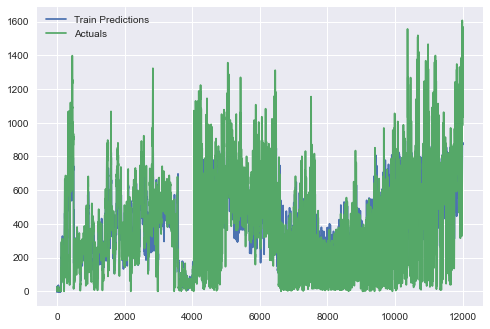

In [22]:
model = load_model('5H_Forecast/5H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(5,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 6 hours forecast

In [23]:
%%time

Trainer(6,6,12)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 9ms/step - loss: 251172.9219 - mean_absolute_error: 411.0609 - val_loss: 363482.4688 - val_mean_absolute_error: 488.8877
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 244148.2500 - mean_absolute_error: 402.4057 - val_loss: 351318.6875 - val_mean_absolute_error: 476.4218
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 7ms/step - loss: 232898.9531 - mean_absolute_error: 389.5817 - val_loss: 338343.5312 - val_mean_absolute_error: 464.0102
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 10ms/step - loss: 222880.2031 - mean_absolute_error: 378.4234 - val_loss: 326712.9688 - val_mean_absolute_error: 453.0277
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 213819.9062 - mean_absolute_error: 368.4792 - val_loss: 315306.5000 - val_mean_absolute_error: 442.4180
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 10ms/step - loss: 204066.8438 - mean_absolute_error: 357.9397 - val_loss: 303149.3438 - val_mean_absolute_error: 431.3601
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 8ms/step - loss: 194450.4531 - mean_absolute_error: 347.7178 - val_loss: 291457.8125 - val_mean_absolute_error: 420.7389
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 7ms/step - loss: 185070.8125 - mean_absolute_error: 337.7357 - val_loss: 279731.5938 - val_mean_absolute_error: 410.0479
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 7ms/step - loss: 175758.6875 - mean_absolute_error: 327.9021 - val_loss: 268016.9062 - val_mean_absolute_error: 399.3803
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 7ms/step - loss: 166572.2344 - mean_absolute_error: 318.1553 - val_loss: 256387.7500 - val_mean_absolute_error: 388.6968
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 7ms/step - loss: 157581.4219 - mean_absolute_error: 308.6423 - val_loss: 244891.1094 - val_mean_absolute_error: 378.0373
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 7ms/step - loss: 148831.1875 - mean_absolute_error: 299.2659 - val_loss: 233622.3125 - val_mean_absolute_error: 367.4714
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 8ms/step - loss: 140407.4219 - mean_absolute_error: 290.1913 - val_loss: 222678.5469 - val_mean_absolute_error: 357.1664
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 8ms/step - loss: 132350.3438 - mean_absolute_error: 281.3809 - val_loss: 212116.8281 - val_mean_absolute_error: 347.1854
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 124749.3438 - mean_absolute_error: 273.1549 - val_loss: 201996.9688 - val_mean_absolute_error: 337.5470
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 7ms/step - loss: 117625.3594 - mean_absolute_error: 265.4486 - val_loss: 192386.5781 - val_mean_absolute_error: 328.4865
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 2s 7ms/step - loss: 111019.2031 - mean_absolute_error: 258.3854 - val_loss: 183444.4531 - val_mean_absolute_error: 320.2826
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 8ms/step - loss: 104998.3359 - mean_absolute_error: 252.0071 - val_loss: 175031.0469 - val_mean_absolute_error: 312.5105
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 8ms/step - loss: 99549.9531 - mean_absolute_error: 246.3398 - val_loss: 167281.5312 - val_mean_absolute_error: 305.5482
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 7ms/step - loss: 94711.1172 - mean_absolute_error: 241.2474 - val_loss: 160114.1250 - val_mean_absolute_error: 299.1267
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 7ms/step - loss: 90421.2344 - mean_absolute_error: 236.6115 - val_loss: 153611.2344 - val_mean_absolute_error: 293.2302
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 7ms/step - loss: 86398.0547 - mean_absolute_error: 231.3136 - val_loss: 147186.0156 - val_mean_absolute_error: 286.7319
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 7ms/step - loss: 82745.0781 - mean_absolute_error: 226.4144 - val_loss: 141372.2344 - val_mean_absolute_error: 281.5017
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 7ms/step - loss: 79608.2578 - mean_absolute_error: 222.4533 - val_loss: 135816.7188 - val_mean_absolute_error: 275.9471
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 7ms/step - loss: 76655.7969 - mean_absolute_error: 218.2543 - val_loss: 130429.9531 - val_mean_absolute_error: 269.6983
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 7ms/step - loss: 73838.7812 - mean_absolute_error: 213.2901 - val_loss: 125395.6797 - val_mean_absolute_error: 264.2050
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 7ms/step - loss: 71042.3125 - mean_absolute_error: 207.7617 - val_loss: 120442.2969 - val_mean_absolute_error: 258.7425
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 7ms/step - loss: 68715.7422 - mean_absolute_error: 203.9029 - val_loss: 115576.9297 - val_mean_absolute_error: 252.7377
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 66797.4375 - mean_absolute_error: 200.9464 - val_loss: 111377.3047 - val_mean_absolute_error: 247.6269
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 7ms/step - loss: 65122.6562 - mean_absolute_error: 197.8750 - val_loss: 107661.9688 - val_mean_absolute_error: 243.5713
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 3s 7ms/step - loss: 63307.7305 - mean_absolute_error: 194.2072 - val_loss: 103190.4844 - val_mean_absolute_error: 236.8002
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 8ms/step - loss: 61714.1641 - mean_absolute_error: 191.2299 - val_loss: 99589.0625 - val_mean_absolute_error: 231.6009
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 8ms/step - loss: 60570.9062 - mean_absolute_error: 189.5045 - val_loss: 97266.1094 - val_mean_absolute_error: 229.2261
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 7ms/step - loss: 59414.4688 - mean_absolute_error: 187.2370 - val_loss: 94276.1016 - val_mean_absolute_error: 225.6967
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 2s 7ms/step - loss: 58357.0352 - mean_absolute_error: 185.4458 - val_loss: 92125.4062 - val_mean_absolute_error: 222.4172
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 3s 7ms/step - loss: 57509.4336 - mean_absolute_error: 183.9754 - val_loss: 90035.2656 - val_mean_absolute_error: 220.2219
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 8ms/step - loss: 56514.8555 - mean_absolute_error: 182.2325 - val_loss: 88102.3203 - val_mean_absolute_error: 217.4882
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 7ms/step - loss: 55401.9023 - mean_absolute_error: 179.7262 - val_loss: 85747.2109 - val_mean_absolute_error: 214.1849
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 2s 7ms/step - loss: 54534.1172 - mean_absolute_error: 178.2771 - val_loss: 83059.2812 - val_mean_absolute_error: 211.0079
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 2s 7ms/step - loss: 53816.8398 - mean_absolute_error: 176.9766 - val_loss: 82126.4375 - val_mean_absolute_error: 209.2487
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 52994.1445 - mean_absolute_error: 175.6906 - val_loss: 80782.3281 - val_mean_absolute_error: 207.1607
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 52449.2500 - mean_absolute_error: 174.7133 - val_loss: 79650.7188 - val_mean_absolute_error: 205.8178
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 9ms/step - loss: 51891.9922 - mean_absolute_error: 173.7364 - val_loss: 79551.6797 - val_mean_absolute_error: 205.8778
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 51497.1602 - mean_absolute_error: 173.6333 - val_loss: 77800.9375 - val_mean_absolute_error: 203.8808
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 51020.7891 - mean_absolute_error: 172.6351 - val_loss: 77297.5000 - val_mean_absolute_error: 202.7883
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 50684.4141 - mean_absolute_error: 171.5855 - val_loss: 75094.7422 - val_mean_absolute_error: 200.5792
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 7ms/step - loss: 50356.6367 - mean_absolute_error: 171.2806 - val_loss: 75495.7734 - val_mean_absolute_error: 200.9725
Epoch 48/100
376/376 [==============================] - 3s 7ms/step - loss: 49935.7344 - mean_absolute_error: 170.0130 - val_loss: 75100.7500 - val_mean_absolute_error: 200.0258
Epoch 49/100
376/376 [==============================] - 2s 7ms/step - loss: 49538.2227 - mean_absolute_error: 169.6339 - val_loss: 74685.4453 - val_mean_absolute_error: 199.3227
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 2s 7ms/step - loss: 49215.2656 - mean_absolute_error: 168.6011 - val_loss: 73581.7344 - val_mean_absolute_error: 197.5567
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 2s 7ms/step - loss: 48698.6523 - mean_absolute_error: 167.5153 - val_loss: 73686.4062 - val_mean_absolute_error: 197.3616
Epoch 52/100
376/376 [==============================] - 3s 7ms/step - loss: 48423.0742 - mean_absolute_error: 166.9423 - val_loss: 69973.0547 - val_mean_absolute_error: 193.5277
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 7ms/step - loss: 48086.2070 - mean_absolute_error: 166.1416 - val_loss: 72205.7734 - val_mean_absolute_error: 195.5742
Epoch 54/100
376/376 [==============================] - 3s 7ms/step - loss: 47711.0547 - mean_absolute_error: 165.6853 - val_loss: 72102.7891 - val_mean_absolute_error: 195.2140
Epoch 55/100
376/376 [==============================] - 3s 7ms/step - loss: 47418.4141 - mean_absolute_error: 164.7023 - val_loss: 70419.6172 - val_mean_absolute_error: 193.0860
Epoch 56/100
376/376 [==============================] - 3s 7ms/step - loss: 47106.1641 - mean_absolute_error: 164.3232 - val_loss: 70311.7578 - val_mean_absolute_error: 192.8397
Epoch 57/100
376/376 [==============================] - 3s 7ms/step - loss: 46842.0508 - mean_absolute_error: 163.6939 - val_loss: 68963.6484 - val_mean_absolute_error: 191.7439
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 2s 7ms/step - loss: 46629.8555 - mean_absolute_error: 162.9346 - val_loss: 68766.8203 - val_mean_absolute_error: 191.5889
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 7ms/step - loss: 46236.4062 - mean_absolute_error: 162.2982 - val_loss: 70383.0547 - val_mean_absolute_error: 192.5960
Epoch 60/100
376/376 [==============================] - 2s 7ms/step - loss: 45718.4258 - mean_absolute_error: 160.8934 - val_loss: 68866.4766 - val_mean_absolute_error: 190.4515
Epoch 61/100
376/376 [==============================] - 2s 7ms/step - loss: 45575.1953 - mean_absolute_error: 160.5900 - val_loss: 68066.8984 - val_mean_absolute_error: 189.6370
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 3s 7ms/step - loss: 45099.8984 - mean_absolute_error: 159.5170 - val_loss: 67053.1328 - val_mean_absolute_error: 188.8827
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 3s 7ms/step - loss: 44822.0938 - mean_absolute_error: 158.7791 - val_loss: 68626.1328 - val_mean_absolute_error: 191.8333
Epoch 64/100
376/376 [==============================] - 3s 7ms/step - loss: 44540.2812 - mean_absolute_error: 158.2105 - val_loss: 66968.5078 - val_mean_absolute_error: 189.0199
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 12ms/step - loss: 44400.6367 - mean_absolute_error: 157.6325 - val_loss: 67460.2500 - val_mean_absolute_error: 188.6449
Epoch 66/100
376/376 [==============================] - 7s 18ms/step - loss: 44049.6094 - mean_absolute_error: 156.9508 - val_loss: 67782.8047 - val_mean_absolute_error: 188.7333
Epoch 67/100
376/376 [==============================] - 6s 17ms/step - loss: 43858.0312 - mean_absolute_error: 156.3845 - val_loss: 65409.2031 - val_mean_absolute_error: 187.6684
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 10ms/step - loss: 43645.8164 - mean_absolute_error: 155.7803 - val_loss: 66745.2344 - val_mean_absolute_error: 188.2001
Epoch 69/100
376/376 [==============================] - 5s 13ms/step - loss: 43345.3906 - mean_absolute_error: 155.0376 - val_loss: 66637.5391 - val_mean_absolute_error: 188.7880
Epoch 70/100
376/376 [==============================] - 5s 14ms/step - loss: 43145.8945 - mean_absolute_error: 154.5412 - val_loss: 67908.2188 - val_mean_absolute_error: 191.1024
Epoch 71/100
376/376 [==============================] - 5s 13ms/step - loss: 42905.5273 - mean_absolute_error: 154.0121 - val_loss: 65887.2578 - val_mean_absolute_error: 187.2037
Epoch 72/100
376/376 [==============================] - 6s 15ms/step - loss: 42711.6992 - mean_absolute_error: 153.6368 - val_loss: 65027.5000 - val_mean_absolute_error: 186.7735.0391 - mean_absolute_error: 153.6
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeW

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 5s 12ms/step - loss: 42507.7656 - mean_absolute_error: 152.8624 - val_loss: 66971.7109 - val_mean_absolute_error: 188.1088
Epoch 74/100
376/376 [==============================] - 4s 12ms/step - loss: 42289.7266 - mean_absolute_error: 152.3463 - val_loss: 64571.4297 - val_mean_absolute_error: 185.6117
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 5s 12ms/step - loss: 42182.7070 - mean_absolute_error: 152.0375 - val_loss: 63903.1094 - val_mean_absolute_error: 186.2675
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 5s 12ms/step - loss: 41964.2266 - mean_absolute_error: 151.5315 - val_loss: 65679.9297 - val_mean_absolute_error: 186.9180
Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 41917.9648 - mean_absolute_error: 151.3657 - val_loss: 64332.6953 - val_mean_absolute_error: 185.4347
Epoch 78/100
376/376 [==============================] - 5s 14ms/step - loss: 41772.8633 - mean_absolute_error: 150.6765 - val_loss: 66976.4062 - val_mean_absolute_error: 187.7805
Epoch 79/100
376/376 [==============================] - 5s 12ms/step - loss: 42028.9297 - mean_absolute_error: 151.4668 - val_loss: 65993.4766 - val_mean_absolute_error: 187.4112
Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 41565.4961 - mean_absolute_error: 150.3377 - val_loss: 67203.9844 - val_mean_absolute_error: 187.9254
Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 41513.5234 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 4s 12ms/step - loss: 40799.7070 - mean_absolute_error: 148.3751 - val_loss: 67414.9844 - val_mean_absolute_error: 189.7471
Epoch 89/100
376/376 [==============================] - 4s 10ms/step - loss: 40581.0117 - mean_absolute_error: 147.7474 - val_loss: 63715.5508 - val_mean_absolute_error: 184.8984
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 40530.1875 - mean_absolute_error: 147.6144 - val_loss: 65559.1484 - val_mean_absolute_error: 186.2865
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 40466.6250 - mean_absolute_error: 147.3839 - val_loss: 65203.8984 - val_mean_absolute_error: 186.8641
Epoch 92/100
376/376 [==============================] - 4s 10ms/step - loss: 40527.5195 - mean_absolute_error: 147.2780 - val_loss: 63237.5625 - val_mean_absolute_error: 183.8038
Epoch 93/100
376/376 [==============================] - 5s 12ms/step - loss: 40355.5938 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 11ms/step - loss: 40057.4297 - mean_absolute_error: 146.3801 - val_loss: 63168.7188 - val_mean_absolute_error: 185.0876
Epoch 96/100
376/376 [==============================] - 4s 10ms/step - loss: 40047.3945 - mean_absolute_error: 146.3525 - val_loss: 62778.7852 - val_mean_absolute_error: 183.9525
Epoch 97/100
376/376 [==============================] - 4s 10ms/step - loss: 40150.3906 - mean_absolute_error: 146.2279 - val_loss: 64637.3438 - val_mean_absolute_error: 187.3944_error: 
Epoch 98/100
376/376 [==============================] - 5s 14ms/step - loss: 40142.4180 - mean_absolute_error: 146.5231 - val_loss: 64786.8906 - val_mean_absolute_error: 186.5322
Epoch 99/100
376/376 [==============================] - 4s 11ms/step - loss: 39917.8711 - mean_absolute_error: 145.5459 - val_loss: 64931.7930 - val_mean_absolute_error: 185.7119
Epoch 100/100
376/376 [==============================] - 4s 11ms/step - loss: 39784.9102 - mean_a

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_72 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 9s 13ms/step - loss: 252332.8438 - mean_absolute_error: 412.5282 - val_loss: 365730.1562 - val_mean_absolute_error: 491.3511
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 8ms/step - loss: 248095.8594 - mean_absolute_error: 407.3721 - val_loss: 359529.6250 - val_mean_absolute_error: 484.9602
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 242506.0938 - mean_absolute_error: 400.7260 - val_loss: 352496.6250 - val_mean_absolute_error: 477.9919
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 10ms/step - loss: 236858.6406 - mean_absolute_error: 394.1911 - val_loss: 345216.2188 - val_mean_absolute_error: 470.7386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 9ms/step - loss: 230384.1406 - mean_absolute_error: 386.8278 - val_loss: 337515.6562 - val_mean_absolute_error: 463.2984
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 8ms/step - loss: 223894.3906 - mean_absolute_error: 379.5897 - val_loss: 329427.6562 - val_mean_absolute_error: 455.5961
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 7ms/step - loss: 217264.8438 - mean_absolute_error: 372.2546 - val_loss: 321228.4375 - val_mean_absolute_error: 447.9035
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 8ms/step - loss: 210433.4688 - mean_absolute_error: 364.7739 - val_loss: 312707.9062 - val_mean_absolute_error: 440.0593
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 3s 8ms/step - loss: 203387.2188 - mean_absolute_error: 357.2163 - val_loss: 303907.6875 - val_mean_absolute_error: 432.0534
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 8ms/step - loss: 196040.9844 - mean_absolute_error: 349.3160 - val_loss: 294355.2188 - val_mean_absolute_error: 423.3681
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 8ms/step - loss: 188284.2500 - mean_absolute_error: 341.0454 - val_loss: 284905.3438 - val_mean_absolute_error: 414.7701
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 9ms/step - loss: 180727.8594 - mean_absolute_error: 332.9957 - val_loss: 275399.2500 - val_mean_absolute_error: 406.0994
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 173187.0781 - mean_absolute_error: 325.0365 - val_loss: 265885.7188 - val_mean_absolute_error: 397.4535
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 165691.6250 - mean_absolute_error: 317.0623 - val_loss: 256335.3750 - val_mean_absolute_error: 388.6555
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 8ms/step - loss: 158277.2344 - mean_absolute_error: 309.1568 - val_loss: 246845.8281 - val_mean_absolute_error: 379.8733
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 150991.5938 - mean_absolute_error: 301.4098 - val_loss: 237478.1250 - val_mean_absolute_error: 371.1254
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 17ms/step - loss: 143898.7031 - mean_absolute_error: 293.7234 - val_loss: 228222.2031 - val_mean_absolute_error: 362.3800
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 16ms/step - loss: 137024.1562 - mean_absolute_error: 286.2468 - val_loss: 219229.9688 - val_mean_absolute_error: 353.8845
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 130348.5859 - mean_absolute_error: 278.8374 - val_loss: 210467.4688 - val_mean_absolute_error: 345.6101
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 12ms/step - loss: 123966.1953 - mean_absolute_error: 271.8130 - val_loss: 201979.2812 - val_mean_absolute_error: 337.4944
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 13ms/step - loss: 117884.8047 - mean_absolute_error: 265.1530 - val_loss: 193988.8750 - val_mean_absolute_error: 329.8895
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 14ms/step - loss: 112188.5234 - mean_absolute_error: 259.0036 - val_loss: 186020.1406 - val_mean_absolute_error: 322.4142- loss: 113941.3281 - mean_absolute_err - ETA: 1s - loss: 1
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 106867.0703 - mean_absolute_error: 253.3071 - val_loss: 178598.0625 - val_mean_absolute_error: 315.2915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 3s 9ms/step - loss: 101928.3438 - mean_absolute_error: 248.0383 - val_loss: 171599.2500 - val_mean_absolute_error: 308.9016
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 97366.8906 - mean_absolute_error: 243.0465 - val_loss: 164905.0156 - val_mean_absolute_error: 302.6807
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 12ms/step - loss: 93085.3281 - mean_absolute_error: 238.2982 - val_loss: 158693.0938 - val_mean_absolute_error: 296.9886
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 12ms/step - loss: 89099.6562 - mean_absolute_error: 233.3471 - val_loss: 152591.1406 - val_mean_absolute_error: 291.0543
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 85429.7578 - mean_absolute_error: 228.6478 - val_loss: 146831.2344 - val_mean_absolute_error: 285.6556
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 82083.3281 - mean_absolute_error: 224.2017 - val_loss: 141444.9062 - val_mean_absolute_error: 279.9824 1s - loss: 80929.0078
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 12ms/step - loss: 78995.0234 - mean_absolute_error: 220.2760 - val_loss: 136398.5781 - val_mean_absolute_error: 275.1745
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 76196.7422 - mean_absolute_error: 216.4169 - val_loss: 131277.4062 - val_mean_absolute_error: 269.8321
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 9ms/step - loss: 73495.4141 - mean_absolute_error: 212.1330 - val_loss: 126306.3750 - val_mean_absolute_error: 264.5008
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 71077.7734 - mean_absolute_error: 208.2942 - val_loss: 121829.2891 - val_mean_absolute_error: 258.6348
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 17ms/step - loss: 68787.1875 - mean_absolute_error: 204.2952 - val_loss: 117573.6719 - val_mean_absolute_error: 253.8784
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 66578.6484 - mean_absolute_error: 200.1642 - val_loss: 112975.9688 - val_mean_absolute_error: 248.3502
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 64826.3125 - mean_absolute_error: 197.8019 - val_loss: 109911.5391 - val_mean_absolute_error: 245.2431
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 3s 9ms/step - loss: 63308.4961 - mean_absolute_error: 195.1422 - val_loss: 105667.4453 - val_mean_absolute_error: 239.2114
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 8ms/step - loss: 61836.3984 - mean_absolute_error: 192.7080 - val_loss: 102455.4297 - val_mean_absolute_error: 235.4777
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 3s 8ms/step - loss: 60409.8555 - mean_absolute_error: 189.7772 - val_loss: 100060.2891 - val_mean_absolute_error: 232.3311
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 7ms/step - loss: 59429.8438 - mean_absolute_error: 188.4188 - val_loss: 97314.4531 - val_mean_absolute_error: 228.9413
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 3s 8ms/step - loss: 58580.4336 - mean_absolute_error: 187.1508 - val_loss: 96785.7891 - val_mean_absolute_error: 228.8126
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 7ms/step - loss: 57853.2070 - mean_absolute_error: 185.8244 - val_loss: 92643.0547 - val_mean_absolute_error: 224.2287
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 57169.4883 - mean_absolute_error: 184.5766 - val_loss: 91767.5469 - val_mean_absolute_error: 222.6412
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 56201.2383 - mean_absolute_error: 182.5444 - val_loss: 89936.6328 - val_mean_absolute_error: 219.8951
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 7ms/step - loss: 55489.8008 - mean_absolute_error: 181.2396 - val_loss: 87874.8281 - val_mean_absolute_error: 217.2670
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 54734.5781 - mean_absolute_error: 179.6791 - val_loss: 86072.3281 - val_mean_absolute_error: 214.6594
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 9ms/step - loss: 54127.9922 - mean_absolute_error: 178.4165 - val_loss: 84190.3203 - val_mean_absolute_error: 212.9473
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 53360.3047 - mean_absolute_error: 176.7165 - val_loss: 83066.8203 - val_mean_absolute_error: 210.5131
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 52665.9492 - mean_absolute_error: 175.4473 - val_loss: 81311.3906 - val_mean_absolute_error: 208.2190
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 52003.8789 - mean_absolute_error: 174.3376 - val_loss: 80923.3828 - val_mean_absolute_error: 207.5580
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 51556.8242 - mean_absolute_error: 173.5486 - val_loss: 79360.0469 - val_mean_absolute_error: 205.5691
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 51103.6484 - mean_absolute_error: 172.7142 - val_loss: 78089.0312 - val_mean_absolute_error: 203.6466
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 9ms/step - loss: 50461.0039 - mean_absolute_error: 171.0807 - val_loss: 76599.4453 - val_mean_absolute_error: 201.7424
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 50021.3320 - mean_absolute_error: 170.1753 - val_loss: 78039.7969 - val_mean_absolute_error: 203.1736
Epoch 55/100
376/376 [==============================] - 3s 9ms/step - loss: 49581.4922 - mean_absolute_error: 169.2974 - val_loss: 77198.1250 - val_mean_absolute_error: 202.1402
Epoch 56/100
376/376 [==============================] - 3s 8ms/step - loss: 49067.7344 - mean_absolute_error: 168.0174 - val_loss: 74403.3984 - val_mean_absolute_error: 198.5397
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 48594.0820 - mean_absolute_error: 167.0611 - val_loss: 73839.9844 - val_mean_absolute_error: 197.7082
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 8ms/step - loss: 48340.6133 - mean_absolute_error: 166.5114 - val_loss: 73539.7969 - val_mean_absolute_error: 197.4197
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 3s 8ms/step - loss: 47982.4727 - mean_absolute_error: 165.9716 - val_loss: 73268.2969 - val_mean_absolute_error: 196.6586
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 8ms/step - loss: 47460.6523 - mean_absolute_error: 164.7511 - val_loss: 72124.3594 - val_mean_absolute_error: 195.0086
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 3s 8ms/step - loss: 46901.4766 - mean_absolute_error: 163.7682 - val_loss: 72168.8438 - val_mean_absolute_error: 195.1755
Epoch 62/100
376/376 [==============================] - 3s 8ms/step - loss: 46620.7422 - mean_absolute_error: 163.1482 - val_loss: 73314.7578 - val_mean_absolute_error: 196.4807
Epoch 63/100
376/376 [==============================] - 3s 8ms/step - loss: 46388.2344 - mean_absolute_error: 162.5613 - val_loss: 70119.7734 - val_mean_absolute_error: 192.3246
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 3s 8ms/step - loss: 45954.6016 - mean_absolute_error: 161.9112 - val_loss: 69281.3125 - val_mean_absolute_error: 191.4182
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 8ms/step - loss: 45691.6445 - mean_absolute_error: 161.1052 - val_loss: 68012.3906 - val_mean_absolute_error: 190.0709
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 45302.4375 - mean_absolute_error: 160.4818 - val_loss: 67254.1094 - val_mean_absolute_error: 188.9999
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 45119.8945 - mean_absolute_error: 160.0588 - val_loss: 68679.2188 - val_mean_absolute_error: 190.3260
Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 44754.8594 - mean_absolute_error: 159.1934 - val_loss: 67219.1172 - val_mean_absolute_error: 188.3075
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 16ms/step - loss: 44543.0820 - mean_absolute_error: 158.6189 - val_loss: 67698.7578 - val_mean_absolute_error: 189.0863
Epoch 70/100
376/376 [==============================] - 5s 13ms/step - loss: 44253.4297 - mean_absolute_error: 158.1030 - val_loss: 67414.8438 - val_mean_absolute_error: 188.4382
Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 44061.5391 - mean_absolute_error: 157.4073 - val_loss: 65085.2617 - val_mean_absolute_error: 186.5194
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 12ms/step - loss: 43792.2578 - mean_absolute_error: 156.8412 - val_loss: 66431.7188 - val_mean_absolute_error: 187.5320
Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 43624.1562 - mean_absolute_error: 156.1551 - val_loss: 67852.2734 - val_mean_absolute_error: 188.8637
Epoch 74/100
376/376 [==============================] - 3s 8ms/step - loss: 43318.9922 - mean_absolute_error: 155.3872 - val_loss: 64068.7578 - val_mean_absolute_error: 184.2669
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 9ms/step - loss: 43125.4961 - mean_absolute_error: 154.8420 - val_loss: 64456.8477 - val_mean_absolute_error: 184.7331
Epoch 76/100
376/376 [==============================] - 3s 9ms/step - loss: 42845.6523 - mean_absolute_error: 154.1020 - val_loss: 65320.8828 - val_mean_absolute_error: 185.3944
Epoch 77/100
376/376 [==============================] - 3s 9ms/step - loss: 42760.4531 - mean_absolute_error: 153.4281 - val_loss: 63131.5898 - val_mean_absolute_error: 183.6290
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 3s 9ms/step - loss: 42406.7734 - mean_absolute_error: 153.0535 - val_loss: 63699.5000 - val_mean_absolute_error: 184.1378
Epoch 79/100
376/376 [==============================] - 3s 8ms/step - loss: 42299.0664 - mean_absolute_error: 152.7593 - val_loss: 64471.5781 - val_mean_absolute_error: 183.9452
Epoch 80/100
376/376 [==============================] - 3s 8ms/step - loss: 42173.4023 - mean_absolute_error: 152.3236 - val_loss: 63025.9453 - val_mean_absolute_error: 183.3515
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 3s 9ms/step - loss: 42000.4180 - mean_absolute_error: 151.9767 - val_loss: 63552.7930 - val_mean_absolute_error: 183.4281
Epoch 82/100
376/376 [==============================] - 3s 8ms/step - loss: 41809.4492 - mean_absolute_error: 151.4521 - val_loss: 63041.9648 - val_mean_absolute_error: 183.0004
Epoch 83/100
376/376 [==============================] - 3s 8ms/step - loss: 41620.3867 - mean_absolute_error: 150.9765 - val_loss: 63801.0586 - val_mean_absolute_error: 183.6497
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 41626.5430 - mean_absolute_error: 150.9378 - val_loss: 63819.0859 - val_mean_absolute_error: 183.4200
Epoch 85/100
376/376 [==============================] - 3s 8ms/step - loss: 41376.3164 - mean_absolute_error: 150.1938 - val_loss: 62614.0625 - val_mean_absolute_error: 182.6736
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 9ms/step - loss: 41232.2188 - mean_absolute_error: 149.7515 - val_loss: 61771.7891 - val_mean_absolute_error: 181.9052
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 9ms/step - loss: 41170.8984 - mean_absolute_error: 149.7136 - val_loss: 62280.3555 - val_mean_absolute_error: 181.4350
Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 40871.1680 - mean_absolute_error: 148.9114 - val_loss: 63781.3398 - val_mean_absolute_error: 184.2082
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 40818.5117 - mean_absolute_error: 148.8476 - val_loss: 62618.7266 - val_mean_absolute_error: 181.5424
Epoch 90/100
376/376 [==============================] - 4s 10ms/step - loss: 40560.9570 - mean_absolute_error: 147.8483 - val_loss: 62906.1875 - val_mean_absolute_error: 182.1825
Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 40418.8594 - mean_absolute_error: 147.7204 - val_loss: 62404.0977 - val_mean_absolute_error: 182.3426
Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 40343.6484 - mean_absolute_error:

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 40003.9297 - mean_absolute_error: 146.6481 - val_loss: 62545.7539 - val_mean_absolute_error: 181.9619
Epoch 96/100
376/376 [==============================] - 3s 9ms/step - loss: 39786.3594 - mean_absolute_error: 145.9878 - val_loss: 62172.2539 - val_mean_absolute_error: 180.8851
Epoch 97/100
376/376 [==============================] - 3s 9ms/step - loss: 39686.6289 - mean_absolute_error: 145.6649 - val_loss: 64245.6992 - val_mean_absolute_error: 184.6843
Epoch 98/100
376/376 [==============================] - 3s 9ms/step - loss: 39506.6719 - mean_absolute_error: 145.4168 - val_loss: 61520.2188 - val_mean_absolute_error: 183.0263
Epoch 99/100
376/376 [==============================] - 3s 8ms/step - loss: 39572.7266 - mean_absolute_error: 145.4406 - val_loss: 60861.4336 - val_mean_absolute_error: 180.5015
Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 39200.9453 - mean_absolute_error

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 251894.0000 - mean_absolute_error: 411.9585 - val_loss: 365538.6250 - val_mean_absolute_error: 491.2614
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 249447.8594 - mean_absolute_error: 409.0177 - val_loss: 362240.3438 - val_mean_absolute_error: 487.9339
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 246544.1250 - mean_absolute_error: 405.5298 - val_loss: 358639.4688 - val_mean_absolute_error: 484.2854
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 8ms/step - loss: 243546.0625 - mean_absolute_error: 401.9843 - val_loss: 354891.4375 - val_mean_absolute_error: 480.4978
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 240237.7500 - mean_absolute_error: 398.1034 - val_loss: 350749.0938 - val_mean_absolute_error: 476.3372
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 236722.2969 - mean_absolute_error: 394.0166 - val_loss: 346441.1562 - val_mean_absolute_error: 472.0528
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 3s 9ms/step - loss: 233036.0312 - mean_absolute_error: 389.8151 - val_loss: 341864.1250 - val_mean_absolute_error: 467.5642
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 229132.7656 - mean_absolute_error: 385.4030 - val_loss: 337029.0312 - val_mean_absolute_error: 462.8926
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 224968.8125 - mean_absolute_error: 380.7143 - val_loss: 331728.8750 - val_mean_absolute_error: 457.8142
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 3s 9ms/step - loss: 220471.1875 - mean_absolute_error: 375.7145 - val_loss: 326113.6562 - val_mean_absolute_error: 452.4995
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 215799.9844 - mean_absolute_error: 370.5981 - val_loss: 320398.1875 - val_mean_absolute_error: 447.1563
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 211036.2188 - mean_absolute_error: 365.3757 - val_loss: 314425.2500 - val_mean_absolute_error: 441.6214
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 12ms/step - loss: 205944.4062 - mean_absolute_error: 359.8908 - val_loss: 308090.0000 - val_mean_absolute_error: 435.8710
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 12ms/step - loss: 200861.8281 - mean_absolute_error: 354.3742 - val_loss: 301789.7812 - val_mean_absolute_error: 430.1472
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 195715.7969 - mean_absolute_error: 348.8582 - val_loss: 295370.6562 - val_mean_absolute_error: 424.3169
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 190502.2344 - mean_absolute_error: 343.2701 - val_loss: 288851.0625 - val_mean_absolute_error: 418.3709
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 9ms/step - loss: 185231.2812 - mean_absolute_error: 337.6821 - val_loss: 282241.3438 - val_mean_absolute_error: 412.3502
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 11ms/step - loss: 179913.5469 - mean_absolute_error: 332.0424 - val_loss: 275538.6875 - val_mean_absolute_error: 406.2365
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 174570.2969 - mean_absolute_error: 326.3319 - val_loss: 268785.7500 - val_mean_absolute_error: 400.0950
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 169216.2969 - mean_absolute_error: 320.5871 - val_loss: 261998.9688 - val_mean_absolute_error: 393.8962
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 163868.1094 - mean_absolute_error: 314.8681 - val_loss: 255184.2812 - val_mean_absolute_error: 387.6193
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 13ms/step - loss: 158555.7344 - mean_absolute_error: 309.1405 - val_loss: 248384.0312 - val_mean_absolute_error: 381.3386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 12ms/step - loss: 153298.5469 - mean_absolute_error: 303.4499 - val_loss: 241631.0312 - val_mean_absolute_error: 375.0789
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 3s 9ms/step - loss: 148095.2812 - mean_absolute_error: 297.7839 - val_loss: 234897.9688 - val_mean_absolute_error: 368.7682
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 142955.0781 - mean_absolute_error: 292.0858 - val_loss: 228231.0781 - val_mean_absolute_error: 362.4862
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 137901.6719 - mean_absolute_error: 286.4595 - val_loss: 221613.6875 - val_mean_absolute_error: 356.2421
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 3s 9ms/step - loss: 132949.8281 - mean_absolute_error: 280.9735 - val_loss: 215122.9844 - val_mean_absolute_error: 350.1528
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 3s 8ms/step - loss: 128078.1172 - mean_absolute_error: 275.4706 - val_loss: 208558.0312 - val_mean_absolute_error: 343.9473
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 3s 8ms/step - loss: 123284.2969 - mean_absolute_error: 270.1700 - val_loss: 202238.3594 - val_mean_absolute_error: 338.0204
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 118698.8047 - mean_absolute_error: 264.9349 - val_loss: 196047.9844 - val_mean_absolute_error: 332.0966
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 9ms/step - loss: 114262.9844 - mean_absolute_error: 260.0464 - val_loss: 189954.0938 - val_mean_absolute_error: 326.3964
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 109976.9922 - mean_absolute_error: 255.3418 - val_loss: 184133.3594 - val_mean_absolute_error: 320.9890
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 3s 9ms/step - loss: 105953.0391 - mean_absolute_error: 250.8790 - val_loss: 178543.6406 - val_mean_absolute_error: 315.7490
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 102177.6719 - mean_absolute_error: 246.8475 - val_loss: 173213.1094 - val_mean_absolute_error: 310.8749
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 98635.5781 - mean_absolute_error: 243.0686 - val_loss: 168163.0312 - val_mean_absolute_error: 306.3489
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 95325.7031 - mean_absolute_error: 239.5108 - val_loss: 163439.9375 - val_mean_absolute_error: 302.2966
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 3s 9ms/step - loss: 92282.0703 - mean_absolute_error: 236.2343 - val_loss: 158909.3906 - val_mean_absolute_error: 298.3635
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 89473.2344 - mean_absolute_error: 233.2176 - val_loss: 154635.4062 - val_mean_absolute_error: 294.7063
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 3s 9ms/step - loss: 86890.0078 - mean_absolute_error: 230.2685 - val_loss: 150553.7969 - val_mean_absolute_error: 290.9644
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 12ms/step - loss: 84360.9219 - mean_absolute_error: 227.0134 - val_loss: 146607.0781 - val_mean_absolute_error: 287.3997
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 3s 8ms/step - loss: 81799.8516 - mean_absolute_error: 223.1830 - val_loss: 142341.1250 - val_mean_absolute_error: 282.8383
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 3s 8ms/step - loss: 79361.1953 - mean_absolute_error: 219.4722 - val_loss: 138092.9219 - val_mean_absolute_error: 277.8785
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 8ms/step - loss: 76787.9609 - mean_absolute_error: 215.1226 - val_loss: 133969.6875 - val_mean_absolute_error: 273.3534
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 8ms/step - loss: 74562.8203 - mean_absolute_error: 211.7396 - val_loss: 130057.9531 - val_mean_absolute_error: 269.0529
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 3s 8ms/step - loss: 72306.7500 - mean_absolute_error: 208.0429 - val_loss: 125757.2891 - val_mean_absolute_error: 263.4216
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 3s 8ms/step - loss: 70304.3750 - mean_absolute_error: 204.7358 - val_loss: 122327.4688 - val_mean_absolute_error: 260.0699
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 3s 8ms/step - loss: 68219.5938 - mean_absolute_error: 200.8039 - val_loss: 118479.3125 - val_mean_absolute_error: 255.2735
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 8ms/step - loss: 66369.9297 - mean_absolute_error: 197.5753 - val_loss: 114943.0625 - val_mean_absolute_error: 251.0655
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 8ms/step - loss: 64631.7656 - mean_absolute_error: 195.0410 - val_loss: 111408.0078 - val_mean_absolute_error: 246.4916
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 3s 8ms/step - loss: 62957.5391 - mean_absolute_error: 192.0364 - val_loss: 108310.8047 - val_mean_absolute_error: 242.6922
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 8ms/step - loss: 61260.5156 - mean_absolute_error: 188.9947 - val_loss: 104800.4141 - val_mean_absolute_error: 237.2366
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 3s 8ms/step - loss: 59816.4961 - mean_absolute_error: 186.5574 - val_loss: 101699.5859 - val_mean_absolute_error: 232.9634
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 3s 9ms/step - loss: 58457.6875 - mean_absolute_error: 184.3233 - val_loss: 99256.6172 - val_mean_absolute_error: 230.7179
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 3s 8ms/step - loss: 57135.8750 - mean_absolute_error: 181.6070 - val_loss: 96418.0938 - val_mean_absolute_error: 226.2379
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 3s 9ms/step - loss: 56044.8633 - mean_absolute_error: 179.9147 - val_loss: 94422.7031 - val_mean_absolute_error: 223.6790
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 8ms/step - loss: 54908.3867 - mean_absolute_error: 177.3133 - val_loss: 91862.2891 - val_mean_absolute_error: 220.7332
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 3s 9ms/step - loss: 53484.4531 - mean_absolute_error: 174.4440 - val_loss: 88735.7266 - val_mean_absolute_error: 216.1562
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 52441.2305 - mean_absolute_error: 172.4553 - val_loss: 87332.8984 - val_mean_absolute_error: 213.3476
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 6s 15ms/step - loss: 51583.7773 - mean_absolute_error: 171.0180 - val_loss: 85175.1328 - val_mean_absolute_error: 210.6922
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 10ms/step - loss: 50785.4648 - mean_absolute_error: 169.4975 - val_loss: 83992.0391 - val_mean_absolute_error: 209.4398
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 50140.1445 - mean_absolute_error: 168.4627 - val_loss: 82357.0703 - val_mean_absolute_error: 207.3876
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 49431.3789 - mean_absolute_error: 167.0467 - val_loss: 81334.4219 - val_mean_absolute_error: 205.9154
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 48692.4375 - mean_absolute_error: 165.4110 - val_loss: 80300.8203 - val_mean_absolute_error: 205.3659
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 3s 9ms/step - loss: 48063.1641 - mean_absolute_error: 163.9324 - val_loss: 78322.7578 - val_mean_absolute_error: 203.0340
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 47268.7500 - mean_absolute_error: 162.0544 - val_loss: 76694.8203 - val_mean_absolute_error: 201.2912
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 8ms/step - loss: 46711.7734 - mean_absolute_error: 160.7593 - val_loss: 75433.5547 - val_mean_absolute_error: 199.1885
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 3s 9ms/step - loss: 46263.0820 - mean_absolute_error: 159.9494 - val_loss: 74874.5000 - val_mean_absolute_error: 198.1033
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 3s 9ms/step - loss: 45712.8242 - mean_absolute_error: 158.6578 - val_loss: 75608.1562 - val_mean_absolute_error: 198.419989.4336 - mean_absolute_error
Epoch 70/100
376/376 [==============================] - 3s 9ms/step - loss: 45310.1094 - mean_absolute_error: 157.7761 - val_loss: 72933.3984 - val_mean_absolute_error: 196.0017
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 3s 9ms/step - loss: 44904.9453 - mean_absolute_error: 156.7427 - val_loss: 72494.7656 - val_mean_absolute_error: 195.2999
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 3s 8ms/step - loss: 44582.4141 - mean_absolute_error: 156.1340 - val_loss: 72153.2734 - val_mean_absolute_error: 194.2376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 3s 8ms/step - loss: 44272.3164 - mean_absolute_error: 155.3294 - val_loss: 71484.6094 - val_mean_absolute_error: 193.6644
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 43895.7188 - mean_absolute_error: 154.4516 - val_loss: 71419.1797 - val_mean_absolute_error: 193.7533
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 3s 8ms/step - loss: 43649.8086 - mean_absolute_error: 154.0347 - val_loss: 70967.6875 - val_mean_absolute_error: 192.8628
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 3s 8ms/step - loss: 43276.5781 - mean_absolute_error: 152.8693 - val_loss: 70334.5156 - val_mean_absolute_error: 192.1391
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 42955.0469 - mean_absolute_error: 152.1113 - val_loss: 69363.8047 - val_mean_absolute_error: 191.0160
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 9ms/step - loss: 42633.4492 - mean_absolute_error: 151.5448 - val_loss: 69119.6250 - val_mean_absolute_error: 190.5299
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 4s 9ms/step - loss: 42482.8320 - mean_absolute_error: 150.9708 - val_loss: 68683.3438 - val_mean_absolute_error: 189.9872
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 42105.5586 - mean_absolute_error: 150.0883 - val_loss: 66769.2812 - val_mean_absolute_error: 188.3425
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 41967.8516 - mean_absolute_error: 150.0386 - val_loss: 67185.5156 - val_mean_absolute_error: 188.3443
Epoch 82/100
376/376 [==============================] - 3s 9ms/step - loss: 41757.0430 - mean_absolute_error: 149.4488 - val_loss: 68124.8438 - val_mean_absolute_error: 189.2573
Epoch 83/100
376/376 [==============================] - 3s 9ms/step - loss: 41501.1367 - mean_absolute_error: 148.7356 - val_loss: 67413.4297 - val_mean_absolute_error: 189.8954
Epoch 84/100
376/376 [==============================] - 3s 9ms/step - loss: 41263.6836 - mean_absolute_error: 148.2388 - val_loss: 66437.2969 - val_mean_absolute_error: 190.5330
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 3s 9ms/step - loss: 41137.6992 - mean_absolute_error: 147.8255 - val_loss: 67096.5156 - val_mean_absolute_error: 188.1772
Epoch 86/100
376/376 [==============================] - 4s 10ms/step - loss: 40940.1055 - mean_absolute_error: 147.4499 - val_loss: 66011.7578 - val_mean_absolute_error: 188.0405
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 3s 8ms/step - loss: 40684.3867 - mean_absolute_error: 146.9440 - val_loss: 65930.6172 - val_mean_absolute_error: 188.1939
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 3s 8ms/step - loss: 40581.1367 - mean_absolute_error: 146.6938 - val_loss: 66068.2734 - val_mean_absolute_error: 187.5364
Epoch 89/100
376/376 [==============================] - 3s 8ms/step - loss: 40496.6914 - mean_absolute_error: 146.2511 - val_loss: 67170.5703 - val_mean_absolute_error: 188.3689
Epoch 90/100
376/376 [==============================] - 3s 9ms/step - loss: 40348.4805 - mean_absolute_error: 145.9070 - val_loss: 65469.2656 - val_mean_absolute_error: 186.9408
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 3s 8ms/step - loss: 40273.3672 - mean_absolute_error: 145.8932 - val_loss: 65459.1289 - val_mean_absolute_error: 187.3263
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 3s 8ms/step - loss: 40005.1484 - mean_absolute_error: 145.1981 - val_loss: 66523.4688 - val_mean_absolute_error: 188.5788
Epoch 93/100
376/376 [==============================] - 3s 8ms/step - loss: 39793.8398 - mean_absolute_error: 144.8051 - val_loss: 66785.6406 - val_mean_absolute_error: 189.0674
Epoch 94/100
376/376 [==============================] - 3s 8ms/step - loss: 39582.0391 - mean_absolute_error: 144.3869 - val_loss: 65930.8047 - val_mean_absolute_error: 188.0162
Epoch 95/100
376/376 [==============================] - 3s 8ms/step - loss: 39559.9453 - mean_absolute_error: 144.1292 - val_loss: 65793.4141 - val_mean_absolute_error: 185.5231
Epoch 96/100
376/376 [==============================] - 3s 8ms/step - loss: 39355.8164 - mean_absolute_error: 143.7383 - val_loss: 64610.7031 - val_mean_absolute_error: 186.5965
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 3s 8ms/step - loss: 39184.5508 - mean_absolute_error: 143.3524 - val_loss: 66153.9141 - val_mean_absolute_error: 189.8506
Epoch 98/100
376/376 [==============================] - 3s 8ms/step - loss: 39241.4336 - mean_absolute_error: 143.3377 - val_loss: 66210.7969 - val_mean_absolute_error: 188.7090
Epoch 99/100
376/376 [==============================] - 3s 9ms/step - loss: 38992.1328 - mean_absolute_error: 142.8090 - val_loss: 63303.6016 - val_mean_absolute_error: 182.5434
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 3s 8ms/step - loss: 38990.5195 - mean_absolute_error: 142.8125 - val_loss: 63859.3281 - val_mean_absolute_error: 183.6417

-----------------------------------------------------------------------------------------------------------

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_76 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 6s 10ms/step - loss: 252707.6719 - 

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 248507.3906 - mean_absolute_error: 407.6658 - val_loss: 358695.3125 - val_mean_absolute_error: 484.0633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 9ms/step - loss: 241845.7188 - mean_absolute_error: 399.9014 - val_loss: 351090.1250 - val_mean_absolute_error: 476.6268
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 236054.8594 - mean_absolute_error: 393.2323 - val_loss: 344071.7812 - val_mean_absolute_error: 469.6556
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 230104.8906 - mean_absolute_error: 386.4844 - val_loss: 337069.4375 - val_mean_absolute_error: 462.9251
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 224498.7656 - mean_absolute_error: 380.2239 - val_loss: 330216.0625 - val_mean_absolute_error: 456.3546
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 218738.4219 - mean_absolute_error: 373.7949 - val_loss: 323103.9688 - val_mean_absolute_error: 449.6445
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 212775.3125 - mean_absolute_error: 367.2406 - val_loss: 315684.0312 - val_mean_absolute_error: 442.7444
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 206223.8906 - mean_absolute_error: 360.1504 - val_loss: 307425.0625 - val_mean_absolute_error: 435.2112
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 3s 9ms/step - loss: 199724.8438 - mean_absolute_error: 353.1454 - val_loss: 299399.1875 - val_mean_absolute_error: 427.9216
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 193178.7812 - mean_absolute_error: 346.0986 - val_loss: 291247.1875 - val_mean_absolute_error: 420.5052
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 3s 9ms/step - loss: 186541.4531 - mean_absolute_error: 338.9957 - val_loss: 282916.7188 - val_mean_absolute_error: 412.9196
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 179853.3438 - mean_absolute_error: 331.8441 - val_loss: 274525.9375 - val_mean_absolute_error: 405.2674
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 3s 9ms/step - loss: 173158.2344 - mean_absolute_error: 324.6493 - val_loss: 266056.2500 - val_mean_absolute_error: 397.5442
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 3s 9ms/step - loss: 166179.3594 - mean_absolute_error: 317.0560 - val_loss: 256626.2656 - val_mean_absolute_error: 388.8978
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 158879.9375 - mean_absolute_error: 309.1034 - val_loss: 247746.0781 - val_mean_absolute_error: 380.7010
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 3s 9ms/step - loss: 152059.8438 - mean_absolute_error: 301.5637 - val_loss: 239096.7969 - val_mean_absolute_error: 372.6647
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 3s 9ms/step - loss: 145421.5625 - mean_absolute_error: 294.1059 - val_loss: 230604.9375 - val_mean_absolute_error: 364.7006
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 3s 9ms/step - loss: 138954.5938 - mean_absolute_error: 286.8414 - val_loss: 222231.2812 - val_mean_absolute_error: 356.7899
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 3s 8ms/step - loss: 132493.9375 - mean_absolute_error: 279.5537 - val_loss: 213708.3750 - val_mean_absolute_error: 348.7574
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 126338.5781 - mean_absolute_error: 272.6145 - val_loss: 205669.3438 - val_mean_absolute_error: 341.1700
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 3s 9ms/step - loss: 120473.6016 - mean_absolute_error: 265.8678 - val_loss: 197882.2500 - val_mean_absolute_error: 333.6448
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 3s 9ms/step - loss: 114812.0859 - mean_absolute_error: 259.5526 - val_loss: 190206.3125 - val_mean_absolute_error: 326.4636
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 109468.6719 - mean_absolute_error: 253.4960 - val_loss: 182982.1719 - val_mean_absolute_error: 319.6592
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 104554.9531 - mean_absolute_error: 248.1826 - val_loss: 176200.0781 - val_mean_absolute_error: 313.3212
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 100029.8438 - mean_absolute_error: 243.4319 - val_loss: 169855.1719 - val_mean_absolute_error: 307.5517
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 95875.3594 - mean_absolute_error: 239.0223 - val_loss: 163885.4062 - val_mean_absolute_error: 302.2920
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 9ms/step - loss: 92096.2656 - mean_absolute_error: 234.8956 - val_loss: 158363.1562 - val_mean_absolute_error: 297.5284
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 11ms/step - loss: 88520.0000 - mean_absolute_error: 230.5239 - val_loss: 152903.9844 - val_mean_absolute_error: 292.0034
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 9ms/step - loss: 84998.1797 - mean_absolute_error: 225.5867 - val_loss: 147695.2500 - val_mean_absolute_error: 287.4048
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 10ms/step - loss: 81543.5625 - mean_absolute_error: 220.4476 - val_loss: 142158.8906 - val_mean_absolute_error: 281.1553
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 10ms/step - loss: 78288.5859 - mean_absolute_error: 216.0060 - val_loss: 137249.4219 - val_mean_absolute_error: 276.3557
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 75373.7344 - mean_absolute_error: 211.9189 - val_loss: 132210.4844 - val_mean_absolute_error: 270.6936
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 12ms/step - loss: 72562.2344 - mean_absolute_error: 207.2779 - val_loss: 127633.3906 - val_mean_absolute_error: 266.3571
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 18ms/step - loss: 69910.4062 - mean_absolute_error: 202.9610 - val_loss: 122877.4062 - val_mean_absolute_error: 260.8627loss: 68981.4922 - mean_abs - ETA: 1s - loss: 70066.5391 - mean_absolute_error: 20 - ETA: 1s - loss: 70287.8438 - mean_absolute_
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 67520.9453 - mean_absolute_error: 199.2720 - val_loss: 118457.8984 - val_mean_absolute_error: 255.3596
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 15ms/step - loss: 65320.0742 - mean_absolute_error: 195.6697 - val_loss: 114819.1719 - val_mean_absolute_error: 251.4978
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 63231.7812 - mean_absolute_error: 191.5651 - val_loss: 111130.2422 - val_mean_absolute_error: 247.1474
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 61325.8711 - mean_absolute_error: 188.2492 - val_loss: 106998.1328 - val_mean_absolute_error: 240.8523
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 59605.9883 - mean_absolute_error: 185.2365 - val_loss: 103581.9609 - val_mean_absolute_error: 237.2413
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 58091.0664 - mean_absolute_error: 182.3556 - val_loss: 100203.9531 - val_mean_absolute_error: 232.0632
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 10ms/step - loss: 56570.6836 - mean_absolute_error: 178.8644 - val_loss: 97252.6719 - val_mean_absolute_error: 228.22801.4648 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 55245.9219 - mean_absolute_error: 176.5861 - val_loss: 94234.8750 - val_mean_absolute_error: 224.0498
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 54079.1992 - mean_absolute_error: 174.6570 - val_loss: 91498.7812 - val_mean_absolute_error: 220.3089
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 52936.2344 - mean_absolute_error: 172.4960 - val_loss: 88789.7578 - val_mean_absolute_error: 217.3364
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 9ms/step - loss: 51729.4297 - mean_absolute_error: 170.1115 - val_loss: 86369.8828 - val_mean_absolute_error: 213.8812
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 50690.2031 - mean_absolute_error: 168.2848 - val_loss: 84318.7344 - val_mean_absolute_error: 211.4856
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 49624.2383 - mean_absolute_error: 166.3275 - val_loss: 82233.4141 - val_mean_absolute_error: 208.2256
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 3s 9ms/step - loss: 48650.9531 - mean_absolute_error: 164.5264 - val_loss: 80483.6172 - val_mean_absolute_error: 205.6027
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 10ms/step - loss: 47948.4141 - mean_absolute_error: 163.1208 - val_loss: 78332.6797 - val_mean_absolute_error: 203.1823
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 9ms/step - loss: 47298.0156 - mean_absolute_error: 161.9488 - val_loss: 77006.4297 - val_mean_absolute_error: 201.5912
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 46592.8750 - mean_absolute_error: 160.2868 - val_loss: 76226.0391 - val_mean_absolute_error: 200.4626
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 11ms/step - loss: 46077.6289 - mean_absolute_error: 159.3051 - val_loss: 74526.2578 - val_mean_absolute_error: 198.3094
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 45597.6445 - mean_absolute_error: 158.3398 - val_loss: 72901.6484 - val_mean_absolute_error: 196.4535
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 11ms/step - loss: 45166.3711 - mean_absolute_error: 157.6066 - val_loss: 72160.2656 - val_mean_absolute_error: 195.8969
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 11ms/step - loss: 44849.5977 - mean_absolute_error: 157.0187 - val_loss: 71328.2422 - val_mean_absolute_error: 194.5198
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 44402.0195 - mean_absolute_error: 155.8294 - val_loss: 71422.9219 - val_mean_absolute_error: 194.2318
Epoch 58/100
376/376 [==============================] - 5s 12ms/step - loss: 43983.7109 - mean_absolute_error: 154.8322 - val_loss: 71246.3984 - val_mean_absolute_error: 193.8595
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 11ms/step - loss: 43680.4219 - mean_absolute_error: 154.1870 - val_loss: 68352.1172 - val_mean_absolute_error: 190.5442
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 43468.5820 - mean_absolute_error: 153.6312 - val_loss: 68408.2812 - val_mean_absolute_error: 190.4720
Epoch 61/100
376/376 [==============================] - 3s 9ms/step - loss: 43173.6992 - mean_absolute_error: 152.9195 - val_loss: 67835.8984 - val_mean_absolute_error: 189.8536
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 9ms/step - loss: 42893.8984 - mean_absolute_error: 152.3961 - val_loss: 66646.8984 - val_mean_absolute_error: 188.7837
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 10ms/step - loss: 42710.7461 - mean_absolute_error: 151.8147 - val_loss: 66177.0859 - val_mean_absolute_error: 188.2249
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 10ms/step - loss: 42565.4648 - mean_absolute_error: 151.1320 - val_loss: 66763.0859 - val_mean_absolute_error: 188.0379
Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 42322.2383 - mean_absolute_error: 150.9169 - val_loss: 65571.0859 - val_mean_absolute_error: 186.5483
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 3s 9ms/step - loss: 41952.4297 - mean_absolute_error: 149.7443 - val_loss: 65241.6680 - val_mean_absolute_error: 186.4344
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 3s 9ms/step - loss: 41734.6484 - mean_absolute_error: 149.0309 - val_loss: 63972.8594 - val_mean_absolute_error: 184.3127
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 41534.5117 - mean_absolute_error: 148.5494 - val_loss: 64271.2656 - val_mean_absolute_error: 184.9119
Epoch 69/100
376/376 [==============================] - 4s 10ms/step - loss: 41386.2070 - mean_absolute_error: 148.2948 - val_loss: 63803.9805 - val_mean_absolute_error: 184.7967
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 14ms/step - loss: 41183.2266 - mean_absolute_error: 147.8997 - val_loss: 63487.7539 - val_mean_absolute_error: 183.8287
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 10ms/step - loss: 41121.1719 - mean_absolute_error: 147.6808 - val_loss: 62522.7500 - val_mean_absolute_error: 182.9090
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 5s 13ms/step - loss: 40818.8359 - mean_absolute_error: 147.0497 - val_loss: 63761.9805 - val_mean_absolute_error: 183.5940
Epoch 73/100
376/376 [==============================] - 6s 15ms/step - loss: 40654.1406 - mean_absolute_error: 146.6551 - val_loss: 63183.2383 - val_mean_absolute_error: 184.2812
Epoch 74/100
376/376 [==============================] - 4s 11ms/step - loss: 40394.6758 - mean_absolute_error: 146.1077 - val_loss: 62451.7578 - val_mean_absolute_error: 182.1096
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 10ms/step - loss: 40181.8164 - mean_absolute_error: 145.6368 - val_loss: 62711.1016 - val_mean_absolute_error: 183.0007
Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 40037.6406 - mean_absolute_error: 145.2725 - val_loss: 61548.8320 - val_mean_absolute_error: 180.7993
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 10ms/step - loss: 39933.0352 - mean_absolute_error: 145.2211 - val_loss: 63901.3867 - val_mean_absolute_error: 184.8071
Epoch 78/100
376/376 [==============================] - 4s 10ms/step - loss: 39699.8711 - mean_absolute_error: 144.5155 - val_loss: 64438.5703 - val_mean_absolute_error: 184.1101
Epoch 79/100
376/376 [==============================] - 4s 11ms/step - loss: 39448.2773 - mean_absolute_error: 143.6755 - val_loss: 62952.2461 - val_mean_absolute_error: 182.4059
Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 39268.4766 - mean_absolute_error: 143.6715 - val_loss: 62283.2773 - val_mean_absolute_error: 181.5527
Epoch 81/100
376/376 [==============================] - 4s 10ms/step - loss: 39237.1797 - mean_absolute_error: 143.4394 - val_loss: 63571.6406 - val_mean_absolute_error: 184.2876
Epoch 82/100
376/376 [==============================] - 4s 10ms/step - loss: 39032.5039 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 6s 16ms/step - loss: 38025.0742 - mean_absolute_error: 140.4187 - val_loss: 61600.4062 - val_mean_absolute_error: 182.3004
Epoch 90/100
376/376 [==============================] - 5s 14ms/step - loss: 38092.4961 - mean_absolute_error: 140.6715 - val_loss: 61919.3516 - val_mean_absolute_error: 182.6988
Epoch 91/100
376/376 [==============================] - 6s 15ms/step - loss: 37857.3281 - mean_absolute_error: 139.7511 - val_loss: 62352.8477 - val_mean_absolute_error: 181.8646
Epoch 92/100
376/376 [==============================] - 6s 15ms/step - loss: 37639.5469 - mean_absolute_error: 139.1148 - val_loss: 61609.1172 - val_mean_absolute_error: 180.2930
Epoch 93/100
376/376 [==============================] - 5s 14ms/step - loss: 37570.1875 - mean_absolute_error: 139.3551 - val_loss: 61067.2812 - val_mean_absolute_error: 182.0930
Epoch 94/100
376/376 [==============================] - 5s 14ms/step - loss: 37531.5781 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 6s 16ms/step - loss: 37211.3320 - mean_absolute_error: 138.0602 - val_loss: 63369.9219 - val_mean_absolute_error: 181.6990
Epoch 98/100
376/376 [==============================] - 5s 13ms/step - loss: 37175.1602 - mean_absolute_error: 137.9252 - val_loss: 61996.8633 - val_mean_absolute_error: 180.7632
Epoch 99/100
376/376 [==============================] - 4s 10ms/step - loss: 37075.3672 - mean_absolute_error: 137.6575 - val_loss: 60750.4453 - val_mean_absolute_error: 181.2865
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 6s 15ms/step - loss: 37054.5234 - mean_absolute_error: 137.5977 - val_loss: 61685.7344 - val_mean_absolute_error: 179.6358

-----------------------------------------------------------------------------------------------------------

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_78 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 12s 22ms/step - loss: 251629.6250 

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 242673.2188 - mean_absolute_error: 400.5404 - val_loss: 348342.2188 - val_mean_absolute_error: 473.4113
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 10ms/step - loss: 231000.8438 - mean_absolute_error: 387.3474 - val_loss: 335415.1250 - val_mean_absolute_error: 461.1774
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 3s 9ms/step - loss: 219760.0625 - mean_absolute_error: 374.9149 - val_loss: 321088.9062 - val_mean_absolute_error: 447.6701
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 209091.9688 - mean_absolute_error: 363.3020 - val_loss: 309090.1250 - val_mean_absolute_error: 436.6469
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 199392.5938 - mean_absolute_error: 352.8623 - val_loss: 297215.1875 - val_mean_absolute_error: 425.8361
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 10ms/step - loss: 189754.4688 - mean_absolute_error: 342.5490 - val_loss: 285272.2500 - val_mean_absolute_error: 414.9392
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 10ms/step - loss: 180168.1719 - mean_absolute_error: 332.3385 - val_loss: 273337.6875 - val_mean_absolute_error: 404.0374
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 10ms/step - loss: 170659.3750 - mean_absolute_error: 322.2507 - val_loss: 261390.7500 - val_mean_absolute_error: 393.1272
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 10ms/step - loss: 161293.9219 - mean_absolute_error: 312.1652 - val_loss: 249547.4375 - val_mean_absolute_error: 382.1812
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 10ms/step - loss: 152166.9219 - mean_absolute_error: 302.3684 - val_loss: 237945.9531 - val_mean_absolute_error: 371.4001
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 10ms/step - loss: 143326.9375 - mean_absolute_error: 292.6706 - val_loss: 226584.3594 - val_mean_absolute_error: 360.6295
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 3s 9ms/step - loss: 134832.2500 - mean_absolute_error: 283.1325 - val_loss: 215662.8906 - val_mean_absolute_error: 350.4145
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 9ms/step - loss: 126746.6328 - mean_absolute_error: 273.9669 - val_loss: 205192.0781 - val_mean_absolute_error: 340.5326
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 10ms/step - loss: 119126.5703 - mean_absolute_error: 265.2157 - val_loss: 195202.5469 - val_mean_absolute_error: 331.0414
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 3s 9ms/step - loss: 111994.4375 - mean_absolute_error: 256.9610 - val_loss: 185653.7500 - val_mean_absolute_error: 321.9814
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 105436.2188 - mean_absolute_error: 249.5262 - val_loss: 176791.3438 - val_mean_absolute_error: 313.7309
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 10ms/step - loss: 99332.2109 - mean_absolute_error: 242.3449 - val_loss: 168423.7188 - val_mean_absolute_error: 305.8095
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 10ms/step - loss: 93721.7188 - mean_absolute_error: 235.6027 - val_loss: 160607.6719 - val_mean_absolute_error: 298.4870
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 88479.3516 - mean_absolute_error: 228.8330 - val_loss: 153125.1250 - val_mean_absolute_error: 291.1840
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 3s 9ms/step - loss: 83599.4688 - mean_absolute_error: 222.1098 - val_loss: 146053.9219 - val_mean_absolute_error: 284.1996
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 10ms/step - loss: 79075.1016 - mean_absolute_error: 215.8818 - val_loss: 139301.5781 - val_mean_absolute_error: 277.2076
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 74857.0469 - mean_absolute_error: 209.5487 - val_loss: 132912.8281 - val_mean_absolute_error: 270.3390
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 10ms/step - loss: 71026.1797 - mean_absolute_error: 203.6793 - val_loss: 126712.2812 - val_mean_absolute_error: 263.5614
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 67596.3516 - mean_absolute_error: 198.2823 - val_loss: 120920.2891 - val_mean_absolute_error: 257.1523
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 3s 9ms/step - loss: 64570.7227 - mean_absolute_error: 193.5688 - val_loss: 115600.7578 - val_mean_absolute_error: 250.6250
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 61929.5469 - mean_absolute_error: 189.1545 - val_loss: 110726.6953 - val_mean_absolute_error: 244.9615
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 59475.4102 - mean_absolute_error: 184.6735 - val_loss: 105731.5469 - val_mean_absolute_error: 237.8050
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 11ms/step - loss: 57437.4883 - mean_absolute_error: 181.0427 - val_loss: 102032.7734 - val_mean_absolute_error: 233.3216
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 9ms/step - loss: 55673.8438 - mean_absolute_error: 177.9302 - val_loss: 97991.2344 - val_mean_absolute_error: 229.0092
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 9ms/step - loss: 54076.9492 - mean_absolute_error: 175.2346 - val_loss: 94156.6484 - val_mean_absolute_error: 223.4275
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 3s 9ms/step - loss: 52553.6797 - mean_absolute_error: 172.6491 - val_loss: 91639.9609 - val_mean_absolute_error: 220.4616
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 3s 9ms/step - loss: 51313.6328 - mean_absolute_error: 170.2190 - val_loss: 88458.1328 - val_mean_absolute_error: 216.1875
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 10ms/step - loss: 50082.1016 - mean_absolute_error: 167.6052 - val_loss: 85550.4375 - val_mean_absolute_error: 212.8086
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 10ms/step - loss: 48939.8203 - mean_absolute_error: 165.4359 - val_loss: 83132.9688 - val_mean_absolute_error: 209.4351
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 48019.0000 - mean_absolute_error: 163.7375 - val_loss: 81696.5000 - val_mean_absolute_error: 207.6740
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 10ms/step - loss: 47238.9609 - mean_absolute_error: 161.8935 - val_loss: 79391.9922 - val_mean_absolute_error: 204.9442
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 46448.3867 - mean_absolute_error: 160.1799 - val_loss: 78768.3906 - val_mean_absolute_error: 203.4850
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 45567.2109 - mean_absolute_error: 158.4718 - val_loss: 76259.0547 - val_mean_absolute_error: 200.8756
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 44915.4336 - mean_absolute_error: 156.8017 - val_loss: 74617.2344 - val_mean_absolute_error: 199.0083
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 44374.0859 - mean_absolute_error: 155.6394 - val_loss: 74773.7812 - val_mean_absolute_error: 198.7720
Epoch 42/100
376/376 [==============================] - 3s 9ms/step - loss: 43893.3281 - mean_absolute_error: 154.8672 - val_loss: 71978.2031 - val_mean_absolute_error: 195.9711
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 43491.7305 - mean_absolute_error: 153.8572 - val_loss: 72074.4062 - val_mean_absolute_error: 195.5388
Epoch 44/100
376/376 [==============================] - 4s 9ms/step - loss: 43046.2148 - mean_absolute_error: 152.9731 - val_loss: 71759.1094 - val_mean_absolute_error: 194.7876
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 3s 9ms/step - loss: 42751.3594 - mean_absolute_error: 152.1509 - val_loss: 71219.8672 - val_mean_absolute_error: 193.9704
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 42378.4922 - mean_absolute_error: 151.3121 - val_loss: 69113.8047 - val_mean_absolute_error: 191.6062
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 42171.8008 - mean_absolute_error: 151.4494 - val_loss: 70811.5469 - val_mean_absolute_error: 192.8767
Epoch 48/100
376/376 [==============================] - 3s 9ms/step - loss: 41594.1289 - mean_absolute_error: 149.5454 - val_loss: 69145.6172 - val_mean_absolute_error: 191.0708
Epoch 49/100
376/376 [==============================] - 6s 15ms/step - loss: 41237.4219 - mean_absolute_error: 148.4946 - val_loss: 66686.6875 - val_mean_absolute_error: 188.8987
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 40946.4648 - mean_absolute_error: 147.9044 - val_loss: 66571.1719 - val_mean_absolute_error: 187.8710
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 14ms/step - loss: 40701.8008 - mean_absolute_error: 147.1330 - val_loss: 66343.4844 - val_mean_absolute_error: 187.4407
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 5s 13ms/step - loss: 40498.0156 - mean_absolute_error: 146.8539 - val_loss: 65689.5234 - val_mean_absolute_error: 186.5335
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 14ms/step - loss: 40185.7812 - mean_absolute_error: 146.1149 - val_loss: 66502.2031 - val_mean_absolute_error: 186.5985
Epoch 54/100
376/376 [==============================] - 6s 15ms/step - loss: 39863.8359 - mean_absolute_error: 145.1142 - val_loss: 63708.5938 - val_mean_absolute_error: 184.2856
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 16ms/step - loss: 39624.0625 - mean_absolute_error: 144.5441 - val_loss: 63332.7734 - val_mean_absolute_error: 185.7626
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 8s 20ms/step - loss: 39415.9375 - mean_absolute_error: 144.0546 - val_loss: 64139.3164 - val_mean_absolute_error: 185.1136
Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 39174.8047 - mean_absolute_error: 143.5192 - val_loss: 65668.0469 - val_mean_absolute_error: 186.3075
Epoch 58/100
376/376 [==============================] - 6s 15ms/step - loss: 38884.8711 - mean_absolute_error: 142.7222 - val_loss: 66039.0938 - val_mean_absolute_error: 185.9638
Epoch 59/100
376/376 [==============================] - 5s 14ms/step - loss: 38653.1289 - mean_absolute_error: 142.0724 - val_loss: 64587.4648 - val_mean_absolute_error: 184.8566
Epoch 60/100
376/376 [==============================] - 7s 17ms/step - loss: 38427.0195 - mean_absolute_error: 141.2585 - val_loss: 62189.9688 - val_mean_absolute_error: 181.7508s - loss: 38665.6562 - mean_absolute_err
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_1

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 38126.3359 - mean_absolute_error: 140.6530 - val_loss: 61879.4883 - val_mean_absolute_error: 181.1091
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 4s 11ms/step - loss: 37970.0430 - mean_absolute_error: 139.9353 - val_loss: 61915.2852 - val_mean_absolute_error: 181.8347
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 37810.2227 - mean_absolute_error: 139.7062 - val_loss: 64334.5430 - val_mean_absolute_error: 183.1102
Epoch 64/100
376/376 [==============================] - 5s 12ms/step - loss: 37702.0352 - mean_absolute_error: 139.3678 - val_loss: 61874.9727 - val_mean_absolute_error: 181.0879
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 14ms/step - loss: 37390.7578 - mean_absolute_error: 138.6945 - val_loss: 61123.1953 - val_mean_absolute_error: 179.4795
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 37194.1016 - mean_absolute_error: 138.0139 - val_loss: 63688.9023 - val_mean_absolute_error: 180.9212
Epoch 67/100
376/376 [==============================] - 5s 14ms/step - loss: 37020.9688 - mean_absolute_error: 137.9184 - val_loss: 61244.2422 - val_mean_absolute_error: 179.9322
Epoch 68/100
376/376 [==============================] - 5s 13ms/step - loss: 37000.8242 - mean_absolute_error: 137.3956 - val_loss: 64098.3008 - val_mean_absolute_error: 181.1061
Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 36776.9453 - mean_absolute_error: 136.9137 - val_loss: 61038.2969 - val_mean_absolute_error: 178.8435
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 36629.7500 - mean_absolute_error: 136.3480 - val_loss: 61522.4453 - val_mean_absolute_error: 179.1503
Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 36572.4883 - mean_absolute_error: 136.3478 - val_loss: 63268.2344 - val_mean_absolute_error: 180.8261
Epoch 72/100
376/376 [==============================] - 5s 14ms/step - loss: 36378.7852 - mean_absolute_error: 135.7587 - val_loss: 61932.2578 - val_mean_absolute_error: 179.0051
Epoch 73/100
376/376 [==============================] - 5s 12ms/step - loss: 36318.6875 - mean_absolute_error: 135.5770 - val_loss: 61033.0273 - val_mean_absolute_error: 178.8368
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 11ms/step - loss: 36147.2344 - mean_absolute_error: 135.2078 - val_loss: 61075.1875 - val_mean_absolute_error: 181.8595
Epoch 75/100
376/376 [==============================] - 4s 11ms/step - loss: 36137.8750 - mean_absolute_error: 134.9203 - val_loss: 62841.2891 - val_mean_absolute_error: 181.3050
Epoch 76/100
376/376 [==============================] - 4s 10ms/step - loss: 36101.2305 - mean_absolute_error: 134.7435 - val_loss: 60780.1172 - val_mean_absolute_error: 177.5117
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 12ms/step - loss: 35839.3828 - mean_absolute_error: 134.1736 - val_loss: 61456.9961 - val_mean_absolute_error: 177.9922
Epoch 78/100
376/376 [==============================] - 5s 12ms/step - loss: 35709.0586 - mean_absolute_error: 133.9686 - val_loss: 64238.2969 - val_mean_absolute_error: 186.4116
Epoch 79/100
376/376 [==============================] - 4s 12ms/step - loss: 35657.2031 - mean_absolute_error: 133.7563 - val_loss: 62159.3672 - val_mean_absolute_error: 181.2868
Epoch 80/100
376/376 [==============================] - 5s 12ms/step - loss: 35480.3789 - mean_absolute_error: 133.1724 - val_loss: 61913.7930 - val_mean_absolute_error: 179.0703
Epoch 81/100
376/376 [==============================] - 4s 12ms/step - loss: 35493.2109 - mean_absolute_error: 133.0604 - val_loss: 60133.2070 - val_mean_absolute_error: 177.6327
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 5s 14ms/step - loss: 35394.2461 - mean_absolute_error: 132.8085 - val_loss: 59993.9375 - val_mean_absolute_error: 176.4116
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 5s 12ms/step - loss: 35509.7930 - mean_absolute_error: 133.0479 - val_loss: 59892.2773 - val_mean_absolute_error: 177.0389
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 4s 11ms/step - loss: 35136.4414 - mean_absolute_error: 132.1085 - val_loss: 61195.0859 - val_mean_absolute_error: 176.9743
Epoch 85/100
376/376 [==============================] - 4s 12ms/step - loss: 35108.5547 - mean_absolute_error: 131.8378 - val_loss: 59964.6719 - val_mean_absolute_error: 176.2629
Epoch 86/100
376/376 [==============================] - 4s 11ms/step - loss: 35054.7266 - mean_absolute_error: 131.5943 - val_loss: 60537.5703 - val_mean_absolute_error: 175.9570
Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 34979.6133 - mean_absolute_error: 131.4826 - val_loss: 61502.5859 - val_mean_absolute_error: 180.8204
Epoch 88/100
376/376 [==============================] - 4s 11ms/step - loss: 35081.2344 - mean_absolute_error: 131.3895 - val_loss: 60073.6016 - val_mean_absolute_error: 176.9467
Epoch 89/100
376/376 [==============================] - 4s 12ms/step - loss: 34969.8398 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 34551.0391 - mean_absolute_error: 129.8535 - val_loss: 59516.8359 - val_mean_absolute_error: 178.1640
Epoch 95/100
376/376 [==============================] - 5s 12ms/step - loss: 34495.8516 - mean_absolute_error: 129.7853 - val_loss: 60643.0156 - val_mean_absolute_error: 176.1908
Epoch 96/100
376/376 [==============================] - 6s 15ms/step - loss: 34277.1836 - mean_absolute_error: 129.0565 - val_loss: 62426.7734 - val_mean_absolute_error: 180.0807
Epoch 97/100
376/376 [==============================] - 4s 11ms/step - loss: 34314.2461 - mean_absolute_error: 129.2614 - val_loss: 58130.4258 - val_mean_absolute_error: 173.3266
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 5s 14ms/step - loss: 34313.5195 - mean_absolute_error: 128.9008 - val_loss: 61354.5508 - val_mean_absolute_error: 180.5919
Epoch 99/100
376/376 [==============================] - 8s 20ms/step - loss: 34373.0547 - mean_absolute_error: 129.2514 - val_loss: 57906.5117 - val_mean_absolute_error: 172.2121
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 4s 10ms/step - loss: 34560.0859 - mean_absolute_error: 129.6985 - val_loss: 60762.8281 - val_mean_absolute_error: 177.8057

-----------------------------------------------------------------------------------------------------------

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 9s 17ms/step - loss: 251685.7969 -

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 16ms/step - loss: 245787.9844 - mean_absolute_error: 404.4387 - val_loss: 354991.0625 - val_mean_absolute_error: 480.2866
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 238662.6094 - mean_absolute_error: 396.2073 - val_loss: 346797.4688 - val_mean_absolute_error: 472.3114
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 232330.6406 - mean_absolute_error: 388.9769 - val_loss: 338985.9688 - val_mean_absolute_error: 464.6354
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 11ms/step - loss: 225420.0938 - mean_absolute_error: 381.2228 - val_loss: 330774.2188 - val_mean_absolute_error: 456.7760
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 11ms/step - loss: 218734.4062 - mean_absolute_error: 373.7842 - val_loss: 322991.8125 - val_mean_absolute_error: 449.4154
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 212393.9844 - mean_absolute_error: 366.8651 - val_loss: 315300.6562 - val_mean_absolute_error: 442.2702
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 11ms/step - loss: 206012.5938 - mean_absolute_error: 359.9524 - val_loss: 307463.8750 - val_mean_absolute_error: 435.0942
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 12ms/step - loss: 199543.0000 - mean_absolute_error: 352.9460 - val_loss: 299472.2188 - val_mean_absolute_error: 427.8167
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 12ms/step - loss: 192977.0625 - mean_absolute_error: 345.8421 - val_loss: 291350.6250 - val_mean_absolute_error: 420.4214
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 186350.4688 - mean_absolute_error: 338.6578 - val_loss: 283114.3125 - val_mean_absolute_error: 412.9040
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 14ms/step - loss: 179693.2500 - mean_absolute_error: 331.4709 - val_loss: 274812.2812 - val_mean_absolute_error: 405.3178
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 12ms/step - loss: 173016.9531 - mean_absolute_error: 324.1690 - val_loss: 266419.0938 - val_mean_absolute_error: 397.6555
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 11ms/step - loss: 166116.5625 - mean_absolute_error: 316.6523 - val_loss: 257499.0156 - val_mean_absolute_error: 389.4376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 11ms/step - loss: 159259.5781 - mean_absolute_error: 309.1132 - val_loss: 248995.7812 - val_mean_absolute_error: 381.6138
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 10ms/step - loss: 152611.5625 - mean_absolute_error: 301.6977 - val_loss: 240543.9531 - val_mean_absolute_error: 373.7207
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 145961.7656 - mean_absolute_error: 294.0681 - val_loss: 231751.0156 - val_mean_absolute_error: 365.4447
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 12ms/step - loss: 139312.9062 - mean_absolute_error: 286.4792 - val_loss: 223167.4219 - val_mean_absolute_error: 357.2835
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 15ms/step - loss: 132699.6719 - mean_absolute_error: 278.8799 - val_loss: 214626.5000 - val_mean_absolute_error: 349.2256
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 17ms/step - loss: 126563.6328 - mean_absolute_error: 271.9355 - val_loss: 206607.0781 - val_mean_absolute_error: 341.6118
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 13ms/step - loss: 120724.4531 - mean_absolute_error: 265.2344 - val_loss: 198875.7031 - val_mean_absolute_error: 334.1924
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 14ms/step - loss: 115213.3047 - mean_absolute_error: 259.0470 - val_loss: 191494.1094 - val_mean_absolute_error: 327.2815
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 109963.2891 - mean_absolute_error: 253.0247 - val_loss: 184404.7812 - val_mean_absolute_error: 320.5757
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 105019.3047 - mean_absolute_error: 247.5330 - val_loss: 177613.6719 - val_mean_absolute_error: 314.2237
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 17ms/step - loss: 100352.0078 - mean_absolute_error: 242.1312 - val_loss: 170938.4531 - val_mean_absolute_error: 308.1514
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 14ms/step - loss: 95860.6562 - mean_absolute_error: 236.6049 - val_loss: 164591.9219 - val_mean_absolute_error: 302.0375
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 11ms/step - loss: 91565.1016 - mean_absolute_error: 231.2002 - val_loss: 158544.8281 - val_mean_absolute_error: 296.3167
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 12ms/step - loss: 87414.6484 - mean_absolute_error: 225.8266 - val_loss: 152695.4219 - val_mean_absolute_error: 290.5793
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 15ms/step - loss: 83460.5312 - mean_absolute_error: 220.2848 - val_loss: 147004.4844 - val_mean_absolute_error: 284.9630
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 11ms/step - loss: 79760.3594 - mean_absolute_error: 215.3615 - val_loss: 141745.1094 - val_mean_absolute_error: 279.6266
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 14ms/step - loss: 76324.5234 - mean_absolute_error: 210.3771 - val_loss: 136836.6875 - val_mean_absolute_error: 274.5386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 11ms/step - loss: 73080.2656 - mean_absolute_error: 205.2875 - val_loss: 131886.1875 - val_mean_absolute_error: 269.1438
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 12ms/step - loss: 70056.8750 - mean_absolute_error: 200.6301 - val_loss: 127237.5703 - val_mean_absolute_error: 264.3108
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 12ms/step - loss: 67286.6562 - mean_absolute_error: 196.2507 - val_loss: 122511.6328 - val_mean_absolute_error: 258.6906
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 64803.3867 - mean_absolute_error: 192.2480 - val_loss: 118220.1250 - val_mean_absolute_error: 253.8727
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 10ms/step - loss: 62545.6758 - mean_absolute_error: 188.5084 - val_loss: 113962.5625 - val_mean_absolute_error: 248.5166
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 11ms/step - loss: 60463.7266 - mean_absolute_error: 184.8898 - val_loss: 110014.9922 - val_mean_absolute_error: 243.3444
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 10ms/step - loss: 58647.9766 - mean_absolute_error: 181.6488 - val_loss: 105978.1484 - val_mean_absolute_error: 238.1925
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 10ms/step - loss: 57048.8008 - mean_absolute_error: 178.6819 - val_loss: 102586.8281 - val_mean_absolute_error: 233.9973
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 55500.0352 - mean_absolute_error: 175.6458 - val_loss: 99525.5547 - val_mean_absolute_error: 229.9402
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 54167.2344 - mean_absolute_error: 173.2239 - val_loss: 96058.7812 - val_mean_absolute_error: 224.9353
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 11ms/step - loss: 52802.7617 - mean_absolute_error: 170.8637 - val_loss: 93188.5156 - val_mean_absolute_error: 221.3123
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 51546.5898 - mean_absolute_error: 168.2533 - val_loss: 90980.9688 - val_mean_absolute_error: 218.0637
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 50227.8750 - mean_absolute_error: 165.7708 - val_loss: 87537.6484 - val_mean_absolute_error: 213.6359A: 2s - 
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 14ms/step - loss: 49129.4375 - mean_absolute_error: 163.6888 - val_loss: 84518.2500 - val_mean_absolute_error: 209.3185
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 48138.3867 - mean_absolute_error: 161.6462 - val_loss: 82447.3438 - val_mean_absolute_error: 206.3600
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 10ms/step - loss: 47183.7852 - mean_absolute_error: 159.8002 - val_loss: 80655.1953 - val_mean_absolute_error: 204.2537
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 10ms/step - loss: 46317.3945 - mean_absolute_error: 158.1277 - val_loss: 79354.5000 - val_mean_absolute_error: 202.4807
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 12ms/step - loss: 45643.9805 - mean_absolute_error: 156.9015 - val_loss: 78019.0078 - val_mean_absolute_error: 201.0233
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 5s 13ms/step - loss: 44975.9844 - mean_absolute_error: 155.6549 - val_loss: 76942.6719 - val_mean_absolute_error: 199.7027
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 44343.6562 - mean_absolute_error: 154.6377 - val_loss: 76278.4062 - val_mean_absolute_error: 198.4815
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 12ms/step - loss: 43803.3047 - mean_absolute_error: 153.4986 - val_loss: 73978.3750 - val_mean_absolute_error: 195.8460
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 11ms/step - loss: 43318.4336 - mean_absolute_error: 152.2736 - val_loss: 73122.9844 - val_mean_absolute_error: 195.3669
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 11ms/step - loss: 42790.3438 - mean_absolute_error: 150.9825 - val_loss: 71534.5078 - val_mean_absolute_error: 193.0487
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 17ms/step - loss: 42371.9336 - mean_absolute_error: 150.1620 - val_loss: 70498.8125 - val_mean_absolute_error: 191.4717
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 6s 15ms/step - loss: 42102.0039 - mean_absolute_error: 149.7166 - val_loss: 69128.1094 - val_mean_absolute_error: 190.5718
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 41671.4570 - mean_absolute_error: 148.6314 - val_loss: 70450.6562 - val_mean_absolute_error: 190.9819
Epoch 58/100
376/376 [==============================] - 4s 11ms/step - loss: 41412.6758 - mean_absolute_error: 148.0895 - val_loss: 68403.3594 - val_mean_absolute_error: 188.7332
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 4s 10ms/step - loss: 41097.9531 - mean_absolute_error: 147.4103 - val_loss: 68212.6016 - val_mean_absolute_error: 188.6888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 10ms/step - loss: 40918.3594 - mean_absolute_error: 147.0147 - val_loss: 67404.8984 - val_mean_absolute_error: 188.0506
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 11ms/step - loss: 40651.2344 - mean_absolute_error: 146.3728 - val_loss: 68197.3672 - val_mean_absolute_error: 188.1415
Epoch 62/100
376/376 [==============================] - 4s 10ms/step - loss: 40451.8555 - mean_absolute_error: 145.9852 - val_loss: 66630.2500 - val_mean_absolute_error: 186.4415
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 5s 12ms/step - loss: 40280.4844 - mean_absolute_error: 145.6803 - val_loss: 66029.0781 - val_mean_absolute_error: 186.7173
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 40072.8281 - mean_absolute_error: 145.0903 - val_loss: 65798.9062 - val_mean_absolute_error: 185.7796
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 39837.3086 - mean_absolute_error: 144.6698 - val_loss: 65776.1875 - val_mean_absolute_error: 185.2888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 7s 17ms/step - loss: 39838.6797 - mean_absolute_error: 144.5062 - val_loss: 66208.1484 - val_mean_absolute_error: 186.3337
Epoch 67/100
376/376 [==============================] - 5s 14ms/step - loss: 39633.5273 - mean_absolute_error: 144.0153 - val_loss: 66726.3281 - val_mean_absolute_error: 185.9293
Epoch 68/100
376/376 [==============================] - 6s 15ms/step - loss: 39377.8750 - mean_absolute_error: 143.6167 - val_loss: 64178.1367 - val_mean_absolute_error: 183.6098
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 5s 12ms/step - loss: 39239.8008 - mean_absolute_error: 143.1441 - val_loss: 65431.3594 - val_mean_absolute_error: 184.4203
Epoch 70/100
376/376 [==============================] - 4s 10ms/step - loss: 39160.0352 - mean_absolute_error: 143.0349 - val_loss: 63545.8711 - val_mean_absolute_error: 183.0278
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 39015.7422 - mean_absolute_error: 142.6366 - val_loss: 63510.3047 - val_mean_absolute_error: 182.4089
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 4s 11ms/step - loss: 38911.8008 - mean_absolute_error: 142.4475 - val_loss: 62619.1172 - val_mean_absolute_error: 182.2581
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 38738.6367 - mean_absolute_error: 141.9787 - val_loss: 63139.4023 - val_mean_absolute_error: 182.4760
Epoch 74/100
376/376 [==============================] - 4s 11ms/step - loss: 38798.8867 - mean_absolute_error: 141.9801 - val_loss: 63628.9766 - val_mean_absolute_error: 182.4329
Epoch 75/100
376/376 [==============================] - 6s 15ms/step - loss: 38616.7578 - mean_absolute_error: 141.6742 - val_loss: 63201.3438 - val_mean_absolute_error: 181.8711oss: 38329.1562 - mean - ETA: 0s - loss: 38435.9375 - mean_absolute_error:
Epoch 76/100
376/376 [==============================] - 4s 12ms/step - loss: 38456.5508 - mean_absolute_error: 141.2743 - val_loss: 62505.0625 - val_mean_absolute_error: 181.3004
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 7s 18ms/step - loss: 38347.6875 - mean_absolute_error: 140.9034 - val_loss: 63236.7344 - val_mean_absolute_error: 182.6277
Epoch 78/100
376/376 [==============================] - 7s 18ms/step - loss: 38229.5273 - mean_absolute_error: 140.7051 - val_loss: 63370.1133 - val_mean_absolute_error: 182.6337
Epoch 79/100
376/376 [==============================] - 6s 17ms/step - loss: 38173.6953 - mean_absolute_error: 140.8080 - val_loss: 62930.4766 - val_mean_absolute_error: 181.7019
Epoch 80/100
376/376 [==============================] - 6s 15ms/step - loss: 38028.4922 - mean_absolute_error: 140.3420 - val_loss: 62427.4570 - val_mean_absolute_error: 182.0439: 5s - loss: 36793.8203 - mean_absolute_error: 136 - ETA: 
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 38029.3867 - mean_absolute_error: 140.2942 - val_loss: 62331.2773 - val_mean_absolute_error: 181.9767
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 37835.3203 - mean_absolute_error: 139.9231 - val_loss: 63238.4766 - val_mean_absolute_error: 183.5206
Epoch 83/100
376/376 [==============================] - 4s 11ms/step - loss: 37842.4727 - mean_absolute_error: 139.9244 - val_loss: 60867.2930 - val_mean_absolute_error: 180.0168
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 8s 20ms/step - loss: 37728.4258 - mean_absolute_error: 139.7001 - val_loss: 61199.3164 - val_mean_absolute_error: 181.0119
Epoch 85/100
376/376 [==============================] - 6s 17ms/step - loss: 37553.5234 - mean_absolute_error: 139.4346 - val_loss: 62064.0469 - val_mean_absolute_error: 180.2753
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 37574.2773 - mean_absolute_error: 139.0032 - val_loss: 62392.9766 - val_mean_absolute_error: 179.9407
Epoch 87/100
376/376 [==============================] - 4s 12ms/step - loss: 37360.5078 - mean_absolute_error: 138.5538 - val_loss: 62046.2969 - val_mean_absolute_error: 180.4210
Epoch 88/100
376/376 [==============================] - 6s 15ms/step - loss: 37234.1133 - mean_absolute_error: 138.2191 - val_loss: 62459.9688 - val_mean_absolute_error: 180.4797
Epoch 89/100
376/376 [==============================] - 4s 12ms/step - loss: 37083.7383 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 5s 12ms/step - loss: 36932.1406 - mean_absolute_error: 137.6913 - val_loss: 61802.1953 - val_mean_absolute_error: 180.2627
Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 36875.2188 - mean_absolute_error: 137.5293 - val_loss: 62083.3008 - val_mean_absolute_error: 178.9116
Epoch 93/100
376/376 [==============================] - 5s 13ms/step - loss: 36781.3398 - mean_absolute_error: 137.3479 - val_loss: 62509.9727 - val_mean_absolute_error: 179.8254
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 36786.3359 - mean_absolute_error: 137.5583 - val_loss: 62495.3867 - val_mean_absolute_error: 179.8323
Epoch 95/100
376/376 [==============================] - 4s 11ms/step - loss: 36672.1133 - mean_absolute_error: 136.9466 - val_loss: 62714.3984 - val_mean_absolute_error: 179.1848
Epoch 96/100
376/376 [==============================] - 5s 12ms/step - loss: 36725.7461 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 12ms/step - loss: 248861.5781 - mean_absolute_error: 408.2427 - val_loss: 359889.4375 - val_mean_absolute_error: 485.4981
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 12ms/step - loss: 243865.0781 - mean_absolute_error: 402.3669 - val_loss: 353997.2500 - val_mean_absolute_error: 479.5764
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 12ms/step - loss: 239068.0000 - mean_absolute_error: 396.7474 - val_loss: 348357.8750 - val_mean_absolute_error: 473.9502
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 234375.0312 - mean_absolute_error: 391.3430 - val_loss: 342651.9375 - val_mean_absolute_error: 468.3116
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 229471.0781 - mean_absolute_error: 385.7974 - val_loss: 336579.1875 - val_mean_absolute_error: 462.4233
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 224290.3125 - mean_absolute_error: 379.9489 - val_loss: 330158.6875 - val_mean_absolute_error: 456.2652
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 12ms/step - loss: 218832.4531 - mean_absolute_error: 373.8898 - val_loss: 323394.0938 - val_mean_absolute_error: 449.8767
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 12ms/step - loss: 213149.2031 - mean_absolute_error: 367.5929 - val_loss: 316344.7500 - val_mean_absolute_error: 443.3252
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 12ms/step - loss: 207262.0469 - mean_absolute_error: 361.1991 - val_loss: 309041.3125 - val_mean_absolute_error: 436.6399
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 12ms/step - loss: 201204.5938 - mean_absolute_error: 354.5967 - val_loss: 301512.9375 - val_mean_absolute_error: 429.7898
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 12ms/step - loss: 195005.3750 - mean_absolute_error: 347.8024 - val_loss: 293797.2812 - val_mean_absolute_error: 422.7719
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 12ms/step - loss: 188702.3438 - mean_absolute_error: 341.0290 - val_loss: 285921.3438 - val_mean_absolute_error: 415.5854
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 181987.8281 - mean_absolute_error: 333.7101 - val_loss: 277384.8750 - val_mean_absolute_error: 407.7859
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 12ms/step - loss: 175389.9375 - mean_absolute_error: 326.5374 - val_loss: 269162.9688 - val_mean_absolute_error: 400.2981
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 168751.1406 - mean_absolute_error: 319.3068 - val_loss: 260585.6250 - val_mean_absolute_error: 392.4495
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 161907.7500 - mean_absolute_error: 311.8139 - val_loss: 252063.0156 - val_mean_absolute_error: 384.5746
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 12ms/step - loss: 155349.0312 - mean_absolute_error: 304.4680 - val_loss: 243732.3125 - val_mean_absolute_error: 376.8326
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 11ms/step - loss: 148897.7500 - mean_absolute_error: 297.3816 - val_loss: 235497.2812 - val_mean_absolute_error: 369.1207
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 10ms/step - loss: 142615.3750 - mean_absolute_error: 290.3304 - val_loss: 227422.9531 - val_mean_absolute_error: 361.4790
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 10ms/step - loss: 136465.6875 - mean_absolute_error: 283.4071 - val_loss: 219480.7656 - val_mean_absolute_error: 353.9919
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 12ms/step - loss: 130502.6406 - mean_absolute_error: 276.5517 - val_loss: 211657.5938 - val_mean_absolute_error: 346.5277
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 124746.9453 - mean_absolute_error: 269.9508 - val_loss: 204082.5312 - val_mean_absolute_error: 339.3232
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 12ms/step - loss: 119229.3594 - mean_absolute_error: 263.5750 - val_loss: 197551.2344 - val_mean_absolute_error: 332.6570
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 10ms/step - loss: 113924.9062 - mean_absolute_error: 257.5638 - val_loss: 189483.9688 - val_mean_absolute_error: 325.4825
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 12ms/step - loss: 108833.8438 - mean_absolute_error: 251.8165 - val_loss: 182659.3438 - val_mean_absolute_error: 319.1498
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 4s 10ms/step - loss: 104007.2891 - mean_absolute_error: 246.1882 - val_loss: 176138.5625 - val_mean_absolute_error: 313.0685
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 11ms/step - loss: 99366.2188 - mean_absolute_error: 240.4514 - val_loss: 169684.6875 - val_mean_absolute_error: 306.7919
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 4s 11ms/step - loss: 94851.2344 - mean_absolute_error: 234.9575 - val_loss: 163305.1406 - val_mean_absolute_error: 300.7247
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 13ms/step - loss: 90441.5000 - mean_absolute_error: 229.1166 - val_loss: 157082.2812 - val_mean_absolute_error: 294.5340
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 13ms/step - loss: 86223.3047 - mean_absolute_error: 223.5159 - val_loss: 151221.9219 - val_mean_absolute_error: 288.6771
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 13ms/step - loss: 82258.1641 - mean_absolute_error: 218.1371 - val_loss: 145492.2344 - val_mean_absolute_error: 282.8149
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 78483.4297 - mean_absolute_error: 212.8792 - val_loss: 139999.2500 - val_mean_absolute_error: 276.9816
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 11ms/step - loss: 74907.8672 - mean_absolute_error: 207.7066 - val_loss: 134337.5781 - val_mean_absolute_error: 271.0309
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 71490.2422 - mean_absolute_error: 202.5450 - val_loss: 129255.0859 - val_mean_absolute_error: 264.9853
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 68217.9766 - mean_absolute_error: 197.4071 - val_loss: 123940.1719 - val_mean_absolute_error: 258.8784
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 12ms/step - loss: 65370.4219 - mean_absolute_error: 192.8601 - val_loss: 119266.5391 - val_mean_absolute_error: 253.5261
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 14ms/step - loss: 62817.6602 - mean_absolute_error: 188.6449 - val_loss: 114433.0938 - val_mean_absolute_error: 247.5849
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 13ms/step - loss: 60528.5430 - mean_absolute_error: 184.8600 - val_loss: 110043.5156 - val_mean_absolute_error: 242.1988
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 58464.6328 - mean_absolute_error: 181.1644 - val_loss: 105917.3359 - val_mean_absolute_error: 236.5834
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 15ms/step - loss: 56577.0625 - mean_absolute_error: 177.9554 - val_loss: 102156.3281 - val_mean_absolute_error: 231.8569
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 13ms/step - loss: 54874.0898 - mean_absolute_error: 174.8224 - val_loss: 98392.1953 - val_mean_absolute_error: 226.5738
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 53421.7070 - mean_absolute_error: 172.2366 - val_loss: 96697.1406 - val_mean_absolute_error: 224.0340
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 12ms/step - loss: 52157.4531 - mean_absolute_error: 169.9906 - val_loss: 92450.4766 - val_mean_absolute_error: 218.8119
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 12ms/step - loss: 50962.6211 - mean_absolute_error: 167.8029 - val_loss: 90844.5156 - val_mean_absolute_error: 216.1943
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 5s 13ms/step - loss: 50036.6758 - mean_absolute_error: 166.5440 - val_loss: 89827.2891 - val_mean_absolute_error: 215.0242
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 12ms/step - loss: 48888.9414 - mean_absolute_error: 163.6324 - val_loss: 85582.1641 - val_mean_absolute_error: 209.7888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 5s 12ms/step - loss: 47931.4609 - mean_absolute_error: 161.6648 - val_loss: 82776.9844 - val_mean_absolute_error: 206.1361
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 12ms/step - loss: 47237.6641 - mean_absolute_error: 160.1544 - val_loss: 81847.9375 - val_mean_absolute_error: 205.1983
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 12ms/step - loss: 46359.8359 - mean_absolute_error: 158.0494 - val_loss: 81541.0469 - val_mean_absolute_error: 204.1391
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 14ms/step - loss: 45613.7578 - mean_absolute_error: 156.6095 - val_loss: 78824.6406 - val_mean_absolute_error: 200.5584
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 12ms/step - loss: 44984.5039 - mean_absolute_error: 154.7725 - val_loss: 78975.8672 - val_mean_absolute_error: 201.0456
Epoch 53/100
376/376 [==============================] - 4s 11ms/step - loss: 44387.0312 - mean_absolute_error: 153.7351 - val_loss: 76439.7812 - val_mean_absolute_error: 197.9564
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 6s 15ms/step - loss: 43911.6484 - mean_absolute_error: 152.7517 - val_loss: 76459.2734 - val_mean_absolute_error: 198.0024
Epoch 55/100
376/376 [==============================] - 6s 16ms/step - loss: 43407.0000 - mean_absolute_error: 151.4183 - val_loss: 72928.8828 - val_mean_absolute_error: 194.1255
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 43121.1211 - mean_absolute_error: 150.7742 - val_loss: 72819.4688 - val_mean_absolute_error: 193.8169
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 12ms/step - loss: 42669.2305 - mean_absolute_error: 149.8167 - val_loss: 72992.6094 - val_mean_absolute_error: 193.2983
Epoch 58/100
376/376 [==============================] - 4s 12ms/step - loss: 42347.4922 - mean_absolute_error: 148.9554 - val_loss: 71789.0312 - val_mean_absolute_error: 192.3522
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 14ms/step - loss: 42129.9141 - mean_absolute_error: 148.4513 - val_loss: 70774.5078 - val_mean_absolute_error: 191.8828
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 41817.4727 - mean_absolute_error: 147.6783 - val_loss: 70192.7500 - val_mean_absolute_error: 190.5426ss: 42142.546
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 41466.1680 - mean_absolute_error: 146.8920 - val_loss: 71019.1562 - val_mean_absolute_error: 190.8190
Epoch 62/100
376/376 [==============================] - 5s 13ms/step - loss: 41185.6289 - mean_absolute_error: 146.4355 - val_loss: 69466.5703 - val_mean_absolute_error: 189.4090
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 12ms/step - loss: 40846.0898 - mean_absolute_error: 145.3019 - val_loss: 68744.1797 - val_mean_absolute_error: 188.1041
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 40479.7852 - mean_absolute_error: 144.6392 - val_loss: 68301.7969 - val_mean_absolute_error: 189.0770
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 12ms/step - loss: 40240.5117 - mean_absolute_error: 144.0738 - val_loss: 68667.3047 - val_mean_absolute_error: 188.9168
Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 40052.4727 - mean_absolute_error: 143.6839 - val_loss: 69798.7578 - val_mean_absolute_error: 188.7130
Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 39815.5781 - mean_absolute_error: 143.1369 - val_loss: 70000.5156 - val_mean_absolute_error: 188.8806
Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 39511.2031 - mean_absolute_error: 142.6048 - val_loss: 68026.2422 - val_mean_absolute_error: 187.1802
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 39281.3945 - mean_absolute_error: 142.2068 - val_loss: 69723.4531 - val_mean_absolute_error: 189.0965
Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 39109.0078 - mean_absolute_error: 141.6852 - val_loss: 67569.2969 - val_mean_absolute_error: 186.7166
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 6s 15ms/step - loss: 38751.3438 - mean_absolute_error: 141.0708 - val_loss: 68946.6328 - val_mean_absolute_error: 186.8642
Epoch 72/100
376/376 [==============================] - 5s 13ms/step - loss: 38568.5898 - mean_absolute_error: 140.5602 - val_loss: 66900.8672 - val_mean_absolute_error: 185.4219
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 12ms/step - loss: 38429.7031 - mean_absolute_error: 139.9895 - val_loss: 65239.8164 - val_mean_absolute_error: 183.9464
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 4s 11ms/step - loss: 38136.4961 - mean_absolute_error: 139.7705 - val_loss: 65122.9570 - val_mean_absolute_error: 185.6122
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 5s 12ms/step - loss: 37846.2930 - mean_absolute_error: 138.7591 - val_loss: 65012.3047 - val_mean_absolute_error: 185.9043
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 4s 11ms/step - loss: 37654.1445 - mean_absolute_error: 138.5631 - val_loss: 65155.6641 - val_mean_absolute_error: 184.1728
Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 37497.6211 - mean_absolute_error: 137.9500 - val_loss: 63498.0742 - val_mean_absolute_error: 181.8348
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 5s 12ms/step - loss: 37264.7383 - mean_absolute_error: 137.5794 - val_loss: 64978.8125 - val_mean_absolute_error: 185.7767
Epoch 79/100
376/376 [==============================] - 4s 11ms/step - loss: 37296.0469 - mean_absolute_error: 137.6518 - val_loss: 64332.2500 - val_mean_absolute_error: 182.8786
Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 36933.1016 - mean_absolute_error: 136.7671 - val_loss: 63526.2461 - val_mean_absolute_error: 180.9700
Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 36753.0234 - mean_absolute_error: 136.0875 - val_loss: 63353.1172 - val_mean_absolute_error: 180.1211
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 36675.9414 - mean_absolute_error: 136.0944 - val_loss: 64040.7578 - val_mean_absolute_error: 182.9302
Epoch 83/100
376/376 [==============================] - 4s 12ms/step - loss: 36613.9023 - mean_absolute_error: 135.8586 - val_loss: 64091.7422 - val_mean_absolute_error: 180.5214
Epoch 84/100
376/376 [==============================] - 4s 11ms/step - loss: 36562.9062 - mean_absolute_error: 135.7379 - val_loss: 63989.8086 - val_mean_absolute_error: 182.1016
Epoch 85/100
376/376 [==============================] - 4s 11ms/step - loss: 36402.2773 - mean_absolute_error: 135.1069 - val_loss: 65247.6953 - val_mean_absolute_error: 181.6282
Epoch 86/100
376/376 [==============================] - 4s 11ms/step - loss: 36170.6992 - mean_absolute_error: 134.7836 - val_loss: 64796.6875 - val_mean_absolute_error: 183.5984
Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 36123.9766 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 4s 12ms/step - loss: 35663.9766 - mean_absolute_error: 133.4261 - val_loss: 64349.0898 - val_mean_absolute_error: 183.7478
Epoch 92/100
376/376 [==============================] - 4s 12ms/step - loss: 35609.7148 - mean_absolute_error: 133.3713 - val_loss: 61875.3047 - val_mean_absolute_error: 176.7426
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 4s 12ms/step - loss: 35480.6406 - mean_absolute_error: 132.8551 - val_loss: 62537.5430 - val_mean_absolute_error: 176.9971
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 35394.7227 - mean_absolute_error: 132.7414 - val_loss: 62868.8047 - val_mean_absolute_error: 181.0698
Epoch 95/100
376/376 [==============================] - 4s 11ms/step - loss: 35304.7070 - mean_absolute_error: 132.3709 - val_loss: 61814.8164 - val_mean_absolute_error: 176.5474
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 4s 11ms/step - loss: 35206.4102 - mean_absolute_error: 131.9097 - val_loss: 61981.3828 - val_mean_absolute_error: 176.2066
Epoch 97/100
376/376 [==============================] - 4s 12ms/step - loss: 35081.8828 - mean_absolute_error: 131.6507 - val_loss: 62200.0898 - val_mean_absolute_error: 176.1042
Epoch 98/100
376/376 [==============================] - 5s 13ms/step - loss: 35090.1992 - mean_absolute_error: 131.8816 - val_loss: 63442.3750 - val_mean_absolute_error: 177.1870
Epoch 99/100
376/376 [==============================] - 5s 13ms/step - loss: 34976.1719 - mean_absolute_error: 131.6793 - val_loss: 61655.8477 - val_mean_absolute_error: 177.8517
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 4s 12ms/step - loss: 34890.9727 - mean_absolute_error: 131.0688 - val_loss: 61304.0391 - val_mean_absolute_error: 175.1376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 4h 22min 14s
Wall time: 2h 17min 59s


In [24]:
%%time

modelsEvaluator(6,6,12)

(12007, 6, 5) (12007,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 49520.3398 - mean_absolute_error: 169.2361
(12006, 7, 5) (12006,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 47269.3867 - mean_absolute_error: 166.5321
(12006, 8, 5) (12006,) (4002, 8, 5) (4002,) (4003, 8, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 42225.0820 - mean_absolute_error: 159.5389
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4002, 9, 5) (4002,)
Loading: 6H_Forecast/6H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 38697.4336 - mean_absolute_error: 147.1441
(12005, 10, 5) (12005,) (4002, 10, 5) (4002,) (4002, 10, 5) (4002,)
Loading: 6H_Forecast/6H_ForecastModel_10

126/126 [==============================] - 2s 6ms/step - loss: 37668.2734 - mean_absolute_error: 139.2739


,Test Predictions,Actuals
0,179.988907,452.508000
1,128.763031,354.636000
2,304.774323,308.158333
3,209.945648,252.036667
4,201.351379,234.740000
5,209.056854,188.511667
6,225.860825,136.190000
7,191.708282,150.125000
8,166.841431,151.265000
9,147.084717,179.690000


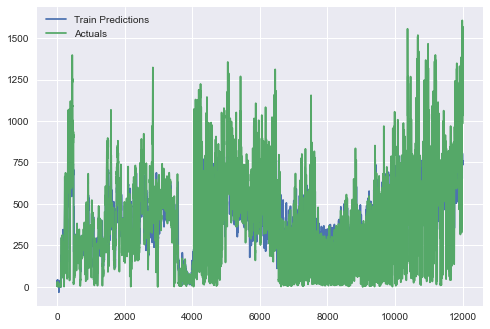

In [25]:
model = load_model('6H_Forecast/6H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(6,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)